### DEPENDENCY

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

## 1. Convert JSON to CSV for games.json => steam 1

In [6]:
json_path = "data/games.json"

In [7]:
df = pd.read_json(json_path)
df = df.T
df.head()

name  release_date required_age  price dlc_count  \
20200         Galactic Bowling  Oct 21, 2008            0  19.99         0   
655370            Train Bandit  Oct 12, 2017            0   0.99         0   
1732930           Jolt Project  Nov 17, 2021            0   4.99         0   
1355720               Henosis™  Jul 23, 2020            0   5.99         0   
1139950  Two Weeks in Painland   Feb 3, 2020            0    0.0         0   

                                      detailed_description  \
20200    Galactic Bowling is an exaggerated and stylize...   
655370   THE LAW!! Looks to be a showdown atop a train....   
1732930  Jolt Project: The army now has a new robotics ...   
1355720  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
1139950  ABOUT THE GAME Play as a hacker who has arrang...   

                                            about_the_game  \
20200    Galactic Bowling is an exaggerated and stylize...   
655370   THE LAW!! Looks to be a showdown atop a train....   
1732930  Jolt Project: The army now has a new robotics ...   
1355720  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
1139950  ABOUT THE GAME Play as a hacker who has arrang...   

                                         short_description reviews  \
20200    Galactic Bowling is an exaggerated and stylize...           
655370   THE LAW!! Looks to be a showdown atop a train....           
1732930  Shoot vehicles, blow enemies with a special at...           
1355720  HENOSIS™ is a mysterious 2D Platform Puzzler w...           
1139950  Two Weeks in Painland is a story-driven game a...           

                                              header_image  ... positive  \
20200    https://cdn.akamai.steamstatic.com/steam/apps/...  ...        6   
655370   https://cdn.akamai.steamstatic.com/steam/apps/...  ...       53   
1732930  https://cdn.akamai.steamstatic.com/steam/apps/...  ...        0   
1355720  https://cdn.akamai.steamstatic.com/steam/apps/...  ...        3   
1139950  https://cdn.akamai.steamstatic.com/steam/apps/...  ...       50   

        negative estimated_owners average_playtime_forever  \
20200         11        0 - 20000                        0   
655370         5        0 - 20000                        0   
1732930        0        0 - 20000                        0   
1355720        0        0 - 20000                        0   
1139950        8        0 - 20000                        0   

        average_playtime_2weeks median_playtime_forever  \
20200                         0                       0   
655370                        0                       0   
1732930                       0                       0   
1355720                       0                       0   
1139950                       0                       0   

        median_playtime_2weeks peak_ccu  \
20200                        0        0   
655370                       0        0   
1732930                      0        0   
1355720                      0        0   
1139950                      0        0   

                                                      tags discount  
20200    {'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...      NaN  
655370   {'Indie': 109, 'Action': 103, 'Pixel Graphics'...      NaN  
1732930                                                 []      NaN  
1355720  {'2D Platformer': 161, 'Atmospheric': 154, 'Su...      NaN  
1139950  {'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...      NaN  

[5 rows x 42 columns]

app_id read as index, let's fix the column name

In [8]:
column_name_dict = {
"name": "Name",
"release_date": "Release date",
"required_age": "Required age",
"price": "Price",
"dlc_count": "DLC count",
"detailed_description": "Detailed description",
"about_the_game": "About the game",
"short_description": "Short description",
"reviews": "Reviews",
"header_image": "Header image",
"website": "Website",
"support_url": "Support url",
"support_email": "Support email",
"windows": "Windows",
"mac": "Mac",
"linux": "Linux",
"metacritic_score": "Metacritic score",
"metacritic_url": "Metacritic url",
"achievements": "Achievements",
"recommendations": "Recommendations",
"notes": "Notes",
"supported_languages": "Supported languages",
"full_audio_languages": "Full audio languages",
"packages": "Packages",
"developers": "Developers",
"publishers": "Publishers",
"categories": "Categories",
"genres": "Genres",
"screenshots": "Screenshots",
"movies": "Movies",
"user_score": "User score",
"score_rank": "Score rank",
"positive": "Positive",
"negative": "Negative",
"estimated_owners": "Estimated owners",
"average_playtime_forever": "Average playtime forever",
"average_playtime_2weeks": "Average playtime two weeks",
"median_playtime_forever": "Median playtime forever",
"median_playtime_2weeks": "Median playtime two weeks",
"peak_ccu": "Peak CCU",
"tags": "Tags"
}

In [9]:
def convert_dict_to_string(dict_object):
    if len(dict_object) == 0:
        return np.NaN
    key_list = list(dict_object.keys())
    keys_string = ",".join(key_list)
    return keys_string

def read_convert_json_dataset():
    _df = pd.read_json(json_path)
    _df = _df.T
    _df['app_id'] = _df.index
    _df.rename(columns=column_name_dict, inplace=True)

    for col in _df.columns.values:
        if isinstance(_df.loc[546560][col], dict):
            _df[col] = _df[col].apply(lambda entries: convert_dict_to_string(entries))
        if isinstance(_df.loc[546560][col], list):
            if isinstance(_df.loc[546560][col][0], str):
                _df[col] = _df[col].apply(lambda entries: ",".join(entries))
    _df = _df.reset_index().set_index("app_id")
    return _df

df = read_convert_json_dataset()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111452 entries, 20200 to 3183790
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   index                       111452 non-null  int64 
 1   Name                        111452 non-null  object
 2   Release date                111452 non-null  object
 3   Required age                111452 non-null  object
 4   Price                       111452 non-null  object
 5   DLC count                   111452 non-null  object
 6   Detailed description        111452 non-null  object
 7   About the game              111452 non-null  object
 8   Short description           111452 non-null  object
 9   Reviews                     111452 non-null  object
 10  Header image                111452 non-null  object
 11  Website                     111452 non-null  object
 12  Support url                 111452 non-null  object
 13  Support email               1

In [11]:
df.head()

index                   Name  Release date Required age  Price  \
app_id                                                                      
20200      20200       Galactic Bowling  Oct 21, 2008            0  19.99   
655370    655370           Train Bandit  Oct 12, 2017            0   0.99   
1732930  1732930           Jolt Project  Nov 17, 2021            0   4.99   
1355720  1355720               Henosis™  Jul 23, 2020            0   5.99   
1139950  1139950  Two Weeks in Painland   Feb 3, 2020            0    0.0   

        DLC count                               Detailed description  \
app_id                                                                 
20200           0  Galactic Bowling is an exaggerated and stylize...   
655370          0  THE LAW!! Looks to be a showdown atop a train....   
1732930         0  Jolt Project: The army now has a new robotics ...   
1355720         0  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
1139950         0  ABOUT THE GAME Play as a hacker who has arrang...   

                                            About the game  \
app_id                                                       
20200    Galactic Bowling is an exaggerated and stylize...   
655370   THE LAW!! Looks to be a showdown atop a train....   
1732930  Jolt Project: The army now has a new robotics ...   
1355720  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
1139950  ABOUT THE GAME Play as a hacker who has arrang...   

                                         Short description Reviews  ...  \
app_id                                                              ...   
20200    Galactic Bowling is an exaggerated and stylize...          ...   
655370   THE LAW!! Looks to be a showdown atop a train....          ...   
1732930  Shoot vehicles, blow enemies with a special at...          ...   
1355720  HENOSIS™ is a mysterious 2D Platform Puzzler w...          ...   
1139950  Two Weeks in Painland is a story-driven game a...          ...   

        Positive Negative Estimated owners Average playtime forever  \
app_id                                                                
20200          6       11        0 - 20000                        0   
655370        53        5        0 - 20000                        0   
1732930        0        0        0 - 20000                        0   
1355720        3        0        0 - 20000                        0   
1139950       50        8        0 - 20000                        0   

        Average playtime two weeks Median playtime forever  \
app_id                                                       
20200                            0                       0   
655370                           0                       0   
1732930                          0                       0   
1355720                          0                       0   
1139950                          0                       0   

        Median playtime two weeks Peak CCU  \
app_id                                       
20200                           0        0   
655370                          0        0   
1732930                         0        0   
1355720                         0        0   
1139950                         0        0   

                                                      Tags discount  
app_id                                                               
20200                          Indie,Casual,Sports,Bowling      NaN  
655370   Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...      NaN  
1732930                                                NaN      NaN  
1355720  2D Platformer,Atmospheric,Surreal,Mystery,Puzz...      NaN  
1139950  Indie,Adventure,Nudity,Violent,Sexual Content,...      NaN  

[5 rows x 43 columns]

In [12]:
df.drop(columns=['index'], inplace=True)

In [13]:
df.to_csv("data/converted_big.csv") # Saving the converted dataframe
converted = pd.read_csv("data/converted_big.csv") # Reading it back
converted.head()

app_id                   Name  Release date  Required age  Price  \
0    20200       Galactic Bowling  Oct 21, 2008             0  19.99   
1   655370           Train Bandit  Oct 12, 2017             0   0.99   
2  1732930           Jolt Project  Nov 17, 2021             0   4.99   
3  1355720               Henosis™  Jul 23, 2020             0   5.99   
4  1139950  Two Weeks in Painland   Feb 3, 2020             0   0.00   

   DLC count                               Detailed description  \
0          0  Galactic Bowling is an exaggerated and stylize...   
1          0  THE LAW!! Looks to be a showdown atop a train....   
2          0  Jolt Project: The army now has a new robotics ...   
3          0  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4          0  ABOUT THE GAME Play as a hacker who has arrang...   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a hacker who has arrang...   

                                   Short description Reviews  ... Positive  \
0  Galactic Bowling is an exaggerated and stylize...     NaN  ...        6   
1  THE LAW!! Looks to be a showdown atop a train....     NaN  ...       53   
2  Shoot vehicles, blow enemies with a special at...     NaN  ...        0   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...     NaN  ...        3   
4  Two Weeks in Painland is a story-driven game a...     NaN  ...       50   

  Negative Estimated owners Average playtime forever  \
0       11        0 - 20000                        0   
1        5        0 - 20000                        0   
2        0        0 - 20000                        0   
3        0        0 - 20000                        0   
4        8        0 - 20000                        0   

   Average playtime two weeks  Median playtime forever  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   

   Median playtime two weeks  Peak CCU  \
0                          0         0   
1                          0         0   
2                          0         0   
3                          0         0   
4                          0         0   

                                                Tags  discount  
0                        Indie,Casual,Sports,Bowling       NaN  
1  Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...       NaN  
2                                                NaN       NaN  
3  2D Platformer,Atmospheric,Surreal,Mystery,Puzz...       NaN  
4  Indie,Adventure,Nudity,Violent,Sexual Content,...       NaN  

[5 rows x 43 columns]

## 2a. EDA Steam1

### READ DATA

In [14]:
# read converted big
df = pd.read_csv("data/converted_big.csv")
df.head(2)

app_id              Name  Release date  Required age  Price  DLC count  \
0   20200  Galactic Bowling  Oct 21, 2008             0  19.99          0   
1  655370      Train Bandit  Oct 12, 2017             0   0.99          0   

                                Detailed description  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   

                                   Short description Reviews  ... Positive  \
0  Galactic Bowling is an exaggerated and stylize...     NaN  ...        6   
1  THE LAW!! Looks to be a showdown atop a train....     NaN  ...       53   

  Negative Estimated owners Average playtime forever  \
0       11        0 - 20000                        0   
1        5        0 - 20000                        0   

   Average playtime two weeks  Median playtime forever  \
0                           0                        0   
1                           0                        0   

   Median playtime two weeks  Peak CCU  \
0                          0         0   
1                          0         0   

                                                Tags  discount  
0                        Indie,Casual,Sports,Bowling       NaN  
1  Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...       NaN  

[2 rows x 43 columns]

### BASIC INFO

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   app_id                      111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Required age                111452 non-null  int64  
 4   Price                       111452 non-null  float64
 5   DLC count                   111452 non-null  int64  
 6   Detailed description        104995 non-null  object 
 7   About the game              104969 non-null  object 
 8   Short description           105076 non-null  object 
 9   Reviews                     10624 non-null   object 
 10  Header image                111452 non-null  object 
 11  Website                     46458 non-null   object 
 12  Support url                 50759 non-null   object 
 13  Support email 

In [16]:
df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

In [17]:
df.shape

(111452, 43)

### MISSING VALUE IDENTIFICATION

In [18]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

Missing Values  Percentage
Score rank                    111408   99.960521
Metacritic url                107447   96.406525
Reviews                       100828   90.467645
discount                       97410   87.400854
Notes                          93003   83.446686
Full audio languages           65823   59.059505
Website                        64994   58.315687
Support url                    60693   54.456627
Tags                           37423   33.577684
Support email                  19025   17.070129
Movies                          9620    8.631519
Categories                      7566    6.788573
Publishers                      6778    6.081542
About the game                  6483    5.816854
Developers                      6475    5.809676
Detailed description            6457    5.793525
Genres                          6440    5.778272
Supported languages             6434    5.772889
Short description               6376    5.720848
Screenshots                     4192    3.761260
Name                               6    0.005383

- Beberapa game di steam ada yang dibuat untuk testing jadi bisa aja gapunya score rank
- No metacritic url bisa jadi karena emang ga diprovide linknya, tapi metacritic scorenya ada semua kok dan ini yang lebih penting
- No review bisa jadi karena gamenya untuk testing atau datanya rusak ketika diambil dari source
- discount: game dijual tanpa diskon, make sense aja apalagi kalo gamenya juga yang gratisan, ini diliar dlu lagi aja, drop belakangan soalnya bisa dipake buat cari insight diskon-price-estimated owners
- Notes: gaada notes tambahan terkait gamenya, normal aja
- Full audio langauges: game tanpa dialog, normal aja
- Website: gamenya dirilis lgsg ke steam tanpa link webnya, normal aja
- Support url: gaada url utk help/customer support dari gamenya
- Tags: tag dikasih sama user ke game, kalo gamenya baru rilis atau sepi/gaada pemain ya gaada tagnya
- Movies: game dirilis tanpa ada film, bisa aja berguna karena kadang ada yang download/tau game dari filmnya gitu
- Support email: yaudah gaada, jarang pengaruh jg rasanya
- Kategori: game tanpa kategori, ini bikin susah sih mungkin akan didrop row yg kategorinya kosong
- Publishers: ini dapat berpengaruh
- About the game: gaada deskripsi, gpp sih
- Developers: ini juga bisa pengaruh ke gamenya
- Detail desc: ya gt
- Genres: penting sih, bakalan di drop row yang null genrenya
- Supported languages: bisa berpengaruh
- Short desc: ya gt
- Screenshots: berupa link url ss nya
- Name: game tanpa nama, gamungkin gasi?

In [19]:
# Explore some columns
df['Website']

0              http://www.galacticbowling.net
1                      http://trainbandit.com
2                                         NaN
3                    https://henosisgame.com/
4         https://www.unusual-games.com/home/
                         ...                 
111447                                    NaN
111448         https://www.hentaipanda.games/
111449                                    NaN
111450                   https://accubow.com/
111451               https://www.ledxfun.com/
Name: Website, Length: 111452, dtype: object

In [20]:
df['Header image']

0         https://cdn.akamai.steamstatic.com/steam/apps/...
1         https://cdn.akamai.steamstatic.com/steam/apps/...
2         https://cdn.akamai.steamstatic.com/steam/apps/...
3         https://cdn.akamai.steamstatic.com/steam/apps/...
4         https://cdn.akamai.steamstatic.com/steam/apps/...
                                ...                        
111447    https://shared.akamai.steamstatic.com/store_it...
111448    https://shared.akamai.steamstatic.com/store_it...
111449    https://shared.akamai.steamstatic.com/store_it...
111450    https://shared.akamai.steamstatic.com/store_it...
111451    https://shared.akamai.steamstatic.com/store_it...
Name: Header image, Length: 111452, dtype: object

In [21]:
# Drop column that is an image or url
df.drop(columns=['Header image', 'Website', 'Support url', 'Support email', 'Metacritic url'], inplace=True)

In [22]:
df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

I think its enough since we have other dataset that needs exploration

In [23]:
# put new dataframe into steam1 variable
steam1 = df.copy()

## 2b. EDA Steam 2

In [24]:
steam2 = pd.read_csv('data/games_small.csv')
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


Here we found other columns: rating, positive_ratio, user_reviews, price_original, price_final. Lets explore this new features

In [25]:
steam2.head()

app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0       0.0        True  
1       0.0        True  
2       0.0        True  
3       0.0        True  
4       0.0        True

app_id, title, date_release, win, mac, linux, and discount is similar as before, so we can drop these columns for further analysis

### Check whether the same app_id between steam1 and steam2 refer to the same game

In [26]:
steam1[steam1['app_id'] == 13500]

app_id                               Name  Release date  Required age  \
31285   13500  Prince of Persia: Warrior Within™  Nov 21, 2008            17   

       Price  DLC count                               Detailed description  \
31285   9.99          0  Enter the dark underworld of Prince of Persia ...   

                                          About the game  \
31285  Enter the dark underworld of Prince of Persia ...   

                                       Short description Reviews  ...  \
31285  Enter the dark underworld of Prince of Persia ...     NaN  ...   

       Positive  Negative  Estimated owners  Average playtime forever  \
31285      1807       307   200000 - 500000                        61   

       Average playtime two weeks  Median playtime forever  \
31285                          10                       77   

      Median playtime two weeks Peak CCU  \
31285                        10       18   

                                                    Tags discount  
31285  Action,Adventure,Parkour,Third Person,Great So...      NaN  

[1 rows x 38 columns]

In [27]:
steam2[steam2['app_id'] == 13500]

app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   

   discount  steam_deck  
0       0.0        True

- We can conclude that steam1 and steam1 are intersecting, we can combine them using the app_id.
- The date_release in steam2 already in proper date format, we will use this column rather than the Release date in steam1
- Its better to use discount from the steam2 since its seems connected to the price_final and price_original
- We will remove Price from steam1 since it is not clear stating the final price or original price

In [28]:
# Drop release date, Price, and discount from steam1
steam1.drop(columns=['Release date', 'Price', 'discount'], inplace=True)
steam1.columns

Index(['app_id', 'Name', 'Required age', 'DLC count', 'Detailed description',
       'About the game', 'Short description', 'Reviews', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'Achievements', 'Recommendations', 'Notes',
       'Supported languages', 'Full audio languages', 'Packages', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Screenshots', 'Movies',
       'User score', 'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags'],
      dtype='object')

In [29]:
# Drop title, win, mac, linux from steam2
steam2.drop(columns=['title', 'win', 'mac', 'linux'], inplace=True)
steam2.columns

Index(['app_id', 'date_release', 'rating', 'positive_ratio', 'user_reviews',
       'price_final', 'price_original', 'discount', 'steam_deck'],
      dtype='object')

## 3. MERGE steam1 and steam2

In [30]:
steam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   app_id                      111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Required age                111452 non-null  int64  
 3   DLC count                   111452 non-null  int64  
 4   Detailed description        104995 non-null  object 
 5   About the game              104969 non-null  object 
 6   Short description           105076 non-null  object 
 7   Reviews                     10624 non-null   object 
 8   Windows                     111452 non-null  bool   
 9   Mac                         111452 non-null  bool   
 10  Linux                       111452 non-null  bool   
 11  Metacritic score            111452 non-null  int64  
 12  Achievements                111452 non-null  int64  
 13  Recommendation

In [31]:
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   date_release    50872 non-null  object 
 2   rating          50872 non-null  object 
 3   positive_ratio  50872 non-null  int64  
 4   user_reviews    50872 non-null  int64  
 5   price_final     50872 non-null  float64
 6   price_original  50872 non-null  float64
 7   discount        50872 non-null  float64
 8   steam_deck      50872 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(2)
memory usage: 3.2+ MB


In [32]:
# Merge on app_id
merged_df = pd.merge(steam1, steam2, on='app_id', how='inner')
merged_df

app_id                   Name  Required age  DLC count  \
0        20200       Galactic Bowling             0          0   
1       655370           Train Bandit             0          0   
2      1139950  Two Weeks in Painland             0          0   
3      1469160         Wartune Reborn             0          0   
4      1659180              TD Worlds             0          1   
...        ...                    ...           ...        ...   
41165  1272080               PAYDAY 3            17          0   
41166  2342950         God Of Weapons             0          0   
41167  1692240          Fortune's Run             0          1   
41168  1580180              Gunbrella             0          2   
41169  2285150              The Front             0          0   

                                    Detailed description  \
0      Galactic Bowling is an exaggerated and stylize...   
1      THE LAW!! Looks to be a showdown atop a train....   
2      ABOUT THE GAME Play as a hacker who has arrang...   
3      Feel tired of auto-fight? Feel tired of boring...   
4      TD Worlds is a dynamic, highly strategical gam...   
...                                                  ...   
41165  Step out of retirement back into the life of c...   
41166  ⚔️CHECK THIS OUT!⚔️ / About the Game The world...   
41167  Discover the quiet dystopia of Fortune's Run, ...   
41168  Gunbrella is a gritty noir-punk action-adventu...   
41169  JOIN THE COMMUNITY About the Game The Front ta...   

                                          About the game  \
0      Galactic Bowling is an exaggerated and stylize...   
1      THE LAW!! Looks to be a showdown atop a train....   
2      ABOUT THE GAME Play as a hacker who has arrang...   
3      Feel tired of auto-fight? Feel tired of boring...   
4      TD Worlds is a dynamic, highly strategical gam...   
...                                                  ...   
41165  Step out of retirement back into the life of c...   
41166  The world was once a bright and beautiful plac...   
41167  Discover the quiet dystopia of Fortune's Run, ...   
41168  Gunbrella is a gritty noir-punk action-adventu...   
41169  The Front takes place in a post-apocalyptic sa...   

                                       Short description  \
0      Galactic Bowling is an exaggerated and stylize...   
1      THE LAW!! Looks to be a showdown atop a train....   
2      Two Weeks in Painland is a story-driven game a...   
3      'Wartune Reborn' epic magic TBS game was devel...   
4      TD Worlds is a dynamic, highly strategical gam...   
...                                                  ...   
41165  PAYDAY 3 is the much anticipated sequel to one...   
41166  Embark on a thrilling journey in God of Weapon...   
41167  Explore a decaying industrial world left behin...   
41168  Uncover the dark secrets of a gritty, tangled ...   
41169  The Front is a survival open-world crafting sh...   

                                                 Reviews  Windows    Mac  ...  \
0                                                    NaN     True  False  ...   
1                                                    NaN     True   True  ...   
2                                                    NaN     True   True  ...   
3                                                    NaN     True  False  ...   
4                                                    NaN     True  False  ...   
...                                                  ...      ...    ...  ...   
41165                                                NaN     True  False  ...   
41166                                                NaN     True  False  ...   
41167                                                NaN     True  False  ...   
41168  “Gunbrella’s crunchy combat and excellent move...     True  False  ...   
41169                                                NaN     True  False  ...   

       Peak CCU                                               Tags  \
0        

In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_id                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [34]:
# Rename columns so it in same name format
merged_df.rename(columns={
    'app_id': 'App ID',
    'date_release': 'Release date',
    'positive_ratio': 'Positive ratio',
    'price_final': 'Price final',
    'price_original': 'Price original',
    'discount': 'Discount',
    'steam_deck': 'Steam Deck',
}, inplace=True)

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [36]:
# show 10 first row of sorted id merged_df
merged_df = merged_df.sort_values(by='App ID', ascending=True)
merged_df.head(10)

App ID                            Name  Required age  DLC count  \
22902      10                  Counter-Strike             0          0   
11359      20           Team Fortress Classic             0          0   
2120       30                   Day of Defeat             0          0   
19935      40              Deathmatch Classic             0          0   
22696      50       Half-Life: Opposing Force             0          0   
20171      60                        Ricochet             0          0   
28761      70                       Half-Life             0          1   
5803       80  Counter-Strike: Condition Zero             0          0   
29269     130           Half-Life: Blue Shift             0          0   
21380     220                     Half-Life 2             0          1   

                                    Detailed description  \
22902  Play the world's number 1 online action game. ...   
11359  One of the most popular online action games of...   
2120   Enlist in an intense brand of Axis vs. Allied ...   
19935  Enjoy fast-paced multiplayer gaming with Death...   
22696  Return to the Black Mesa Research Facility as ...   
20171  A futuristic action game that challenges your ...   
28761  Named Game of the Year by over 50 publications...   
5803   With its extensive Tour of Duty campaign, a ne...   
29269  Made by Gearbox Software and originally releas...   
21380  1998. HALF-LIFE sends a shock through the game...   

                                          About the game  \
22902  Play the world's number 1 online action game. ...   
11359  One of the most popular online action games of...   
2120   Enlist in an intense brand of Axis vs. Allied ...   
19935  Enjoy fast-paced multiplayer gaming with Death...   
22696  Return to the Black Mesa Research Facility as ...   
20171  A futuristic action game that challenges your ...   
28761  Named Game of the Year by over 50 publications...   
5803   With its extensive Tour of Duty campaign, a ne...   
29269  Made by Gearbox Software and originally releas...   
21380  1998. HALF-LIFE sends a shock through the game...   

                                       Short description Reviews  Windows  \
22902  Play the world's number 1 online action game. ...     NaN     True   
11359  One of the most popular online action games of...     NaN     True   
2120   Enlist in an intense brand of Axis vs. Allied ...     NaN     True   
19935  Enjoy fast-paced multiplayer gaming with Death...     NaN     True   
22696  Return to the Black Mesa Research Facility as ...     NaN     True   
20171  A futuristic action game that challenges your ...     NaN     True   
28761  Named Game of the Year by over 50 publications...     NaN     True   
5803   With its extensive Tour of Duty campaign, a ne...     NaN     True   
29269  Made by Gearbox Software and originally releas...     NaN     True   
21380  1998. HALF-LIFE sends a shock through the game...     NaN     True   

        Mac  ...  Peak CCU                                               Tags  \
22902  True  ...     13230  Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...   
11359  True  ...       110  Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...   
2120   True  ...       106  FPS,World War II,Multiplayer,Shooter,Action,Wa...   
19935  True  ...         2  Action,FPS,Classic,Multiplayer,Shooter,First-P...   
22696  True  ...       120  FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...   
20171  True  ...        10  Action,FPS,Multiplayer,Classic,First-Person,Sc...   
28761  True  ...       752  FPS,Singleplayer,Sci-fi,Multiplayer,1990's,Act...   
5803   True  ...       425  Action,FPS,Shooter,Multiplayer,First-Person,Si...   
29269  True  ...        78  FPS,Action,Sci-fi,Singleplayer,Shooter,Aliens,...   
21380  True  ...      1015  FPS,Action,Sci-fi,Classic,Singleplayer,Story R...   

       Release date                   rating Positive ratio user_reviews  \
22902    2000-11-01  Overwhelmingly Positive          

In [37]:
# Save result
merged_df.to_csv("data/merged_steam_data.csv", index=False)

In [38]:
# Read the saved merged dataframe
merged_df = pd.read_csv("data/merged_steam_data.csv")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 4. EDA Merged steam data

### DEPENDENCY

In [40]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

### READ MERGED DATA

In [41]:
df = pd.read_csv("data/merged_steam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

### BASIC INFORMATION

In [42]:
# check if there any duplicate and print it
df.duplicated().sum()

0

### TIME SERIES EDA

In [43]:
# Convert 'Release date' to datetime
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

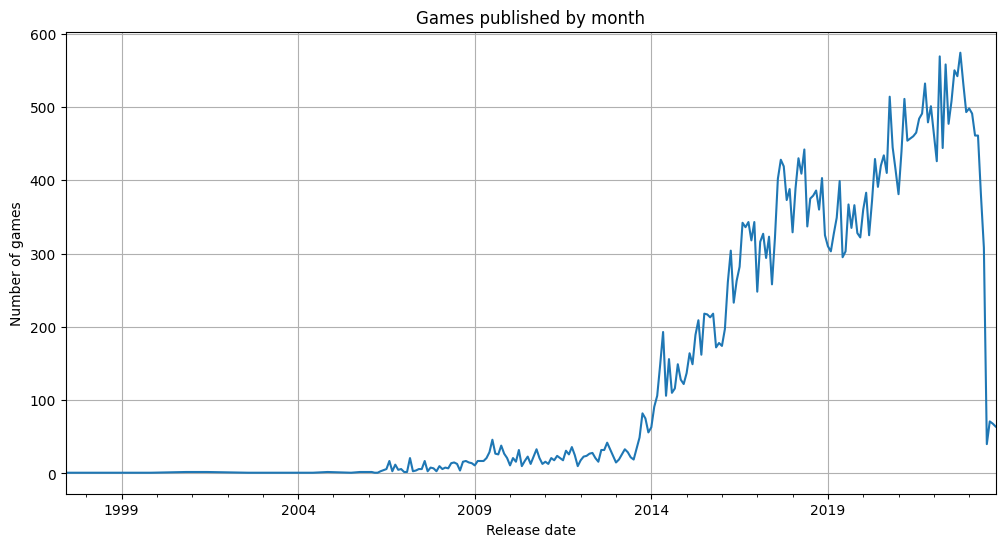

In [44]:
# Number of games published by month
plt.figure(figsize=(12, 6))
df.groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Games published by month')
plt.ylabel('Number of games')
plt.grid(True)
plt.show()

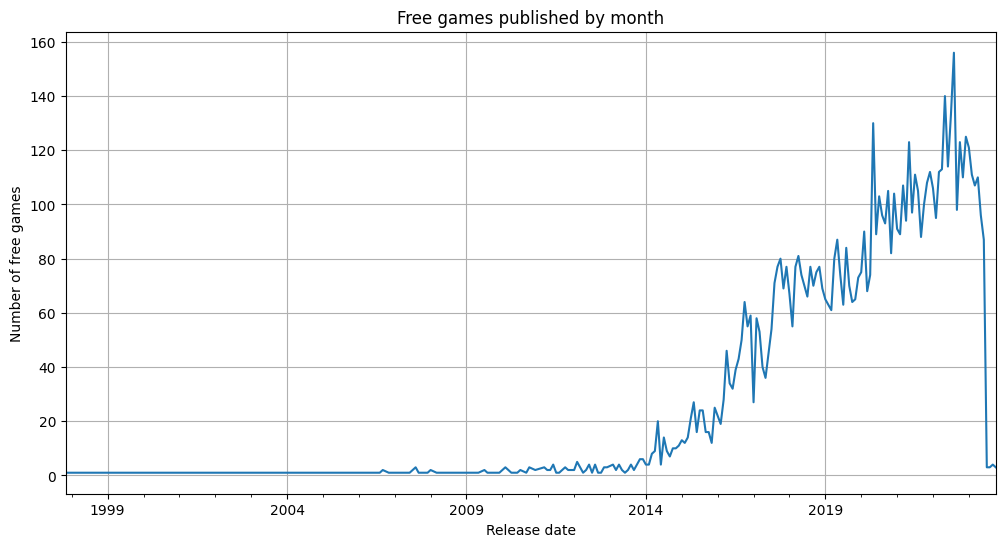

In [45]:
# Number of free games published by month
plt.figure(figsize=(12, 6))
df[df['Price final'] == 0].groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Free games published by month')
plt.ylabel('Number of free games')
plt.grid(True)
plt.show()

### Price Final and Price Original EDA

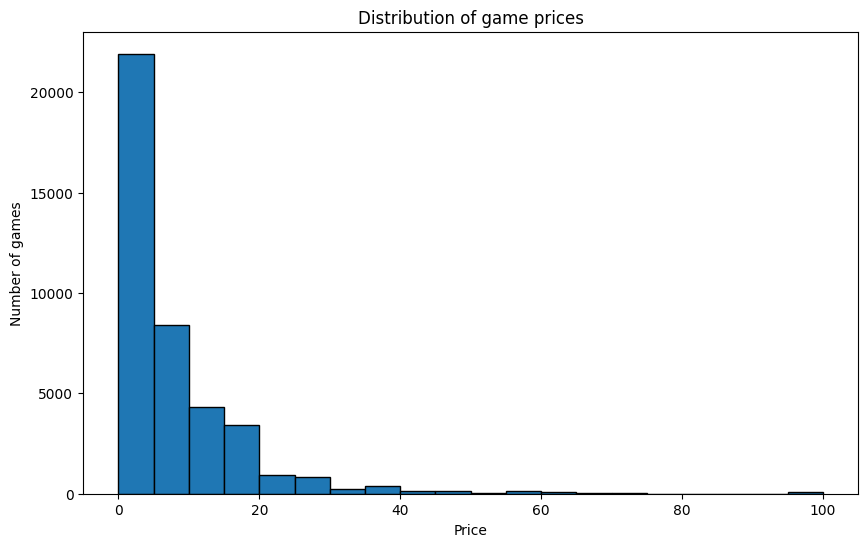

In [46]:
# Prices
bins = range(0, 105, 5)
plt.figure(figsize=(10, 6))
plt.hist(df['Price final'], bins=bins, edgecolor='black')
plt.title('Distribution of game prices')
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

In [47]:
print("Free games: ", df[df['Price final'] == 0].shape[0])
print("Paid games: ", df[df['Price final'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price final'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price final'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  7748
Paid games:  33422
Percentage of free games:  19.0
Percentage of paid games:  81.0


In [48]:
print("Free games: ", df[df['Price original'] == 0].shape[0])
print("Paid games: ", df[df['Price original'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price original'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price original'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  8554
Paid games:  32616
Percentage of free games:  21.0
Percentage of paid games:  79.0


This data seems suspicious since price original have more free games than price final

In [49]:
# maximum price
print(df['Price original'].max())
df[df['Price original'] == df['Price original'].max()]

299.9


App ID                   Name  Required age  DLC count  \
2078  253670  Aartform Curvy 3D 3.0             0          0   

                                   Detailed description  \
2078  Curvy 3D 4 Curvy 3D 4 is out now! \\\ Aartform...   

                                         About the game  \
2078  Curvy 3D 3.0 is an innovative sculpting progra...   

                                      Short description Reviews  Windows  \
2078  Curvy 3D 3.0 is an innovative sculpting progra...     NaN     True   

        Mac  ...  Peak CCU                  Tags  Release date  rating  \
2078  False  ...         0  Animation & Modeling    2013-11-12   Mixed   

     Positive ratio user_reviews Price final Price original Discount  \
2078             69           39       299.9          299.9      0.0   

     Steam Deck  
2078       True  

[1 rows x 43 columns]

### DLC Count

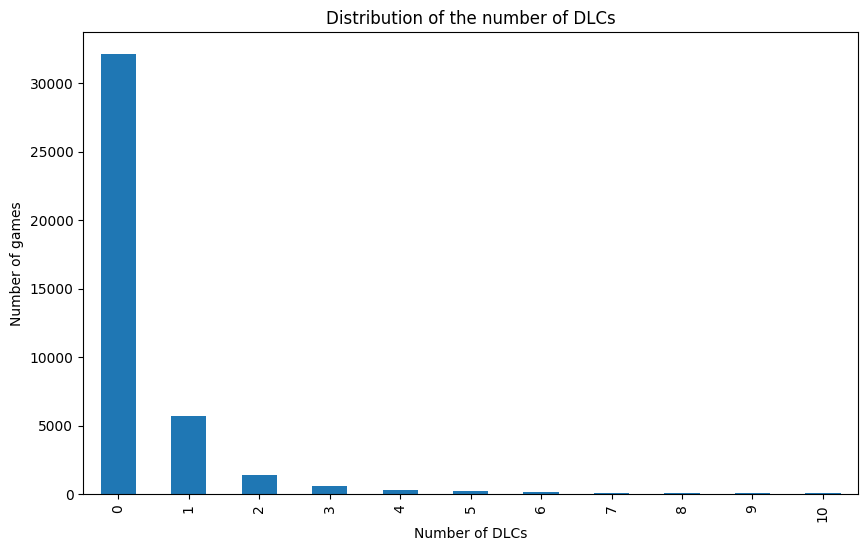

In [50]:
# Number of DLCs (up to 10)
dlc_counts = df['DLC count'].value_counts().sort_index()
dlc_counts = dlc_counts[dlc_counts.index <= 10]
plt.figure(figsize=(10, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

In [51]:
# games with the most DLCs
df[df['DLC count'] == df['DLC count'].max()].head(10)

App ID                   Name  Required age  DLC count  \
24933  1196310  Fantasy Grounds Unity             0       2366   

                                    Detailed description  \
24933  Featured DLC / D&amp;D Essentials D&amp;D Adve...   

                                          About the game  \
24933  Prep Less. Play Better. Fantasy Grounds is kno...   

                                       Short description Reviews  Windows  \
24933  Prep Less. Play Better. Exciting upgrades awai...     NaN     True   

        Mac  ...  Peak CCU                                               Tags  \
24933  True  ...       145  RPG,Dungeons & Dragons,Strategy,Indie,Software...   

       Release date         rating Positive ratio user_reviews Price final  \
24933    2020-11-05  Very Positive             83          527        30.0   

      Price original Discount Steam Deck  
24933            0.0      0.0       True  

[1 rows x 43 columns]

## EDA by Nathania

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [7]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements'
]

df = df[selected_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25508 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          25508 non-null  object 
 1   Price original        25508 non-null  float64
 2   DLC count             25508 non-null  int64  
 3   Required age          25508 non-null  int64  
 4   Windows               25508 non-null  bool   
 5   Mac                   25508 non-null  bool   
 6   Linux                 25508 non-null  bool   
 7   Steam Deck            25508 non-null  bool   
 8   Supported languages   25508 non-null  object 
 9   Full audio languages  11949 non-null  object 
 10  Developers            25508 non-null  object 
 11  Publishers            25508 non-null  object 
 12  Movies                24178 non-null  object 
 13  rating                25508 non-null  object 
 14  Positive ratio        25508 non-null  int64  
 15  Genres             

In [8]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Full audio languages    13559
Tags                     1808
Movies                   1330
Categories                282
Genres                     23
Developers                  0
Positive ratio              0
rating                      0
Publishers                  0
Release date                0
Price original              0
Supported languages         0
Steam Deck                  0
Linux                       0
Mac                         0
Windows                     0
Required age                0
DLC count                   0
Achievements                0
dtype: int64


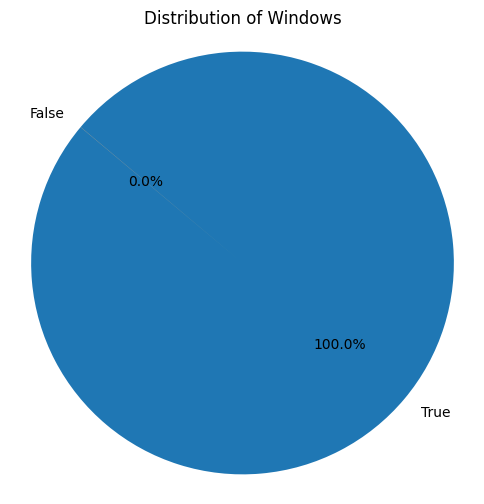

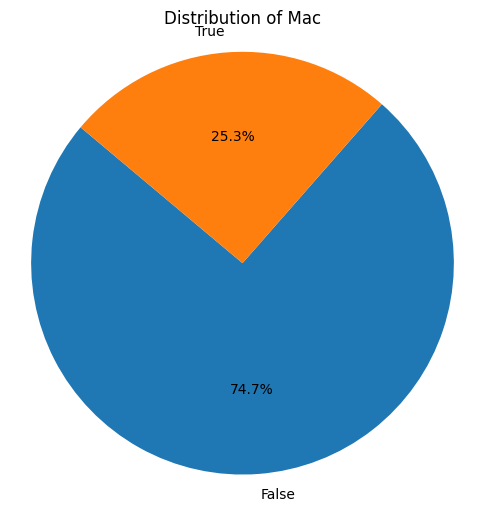

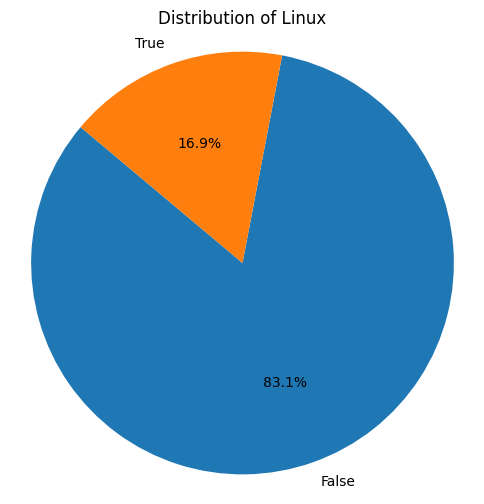

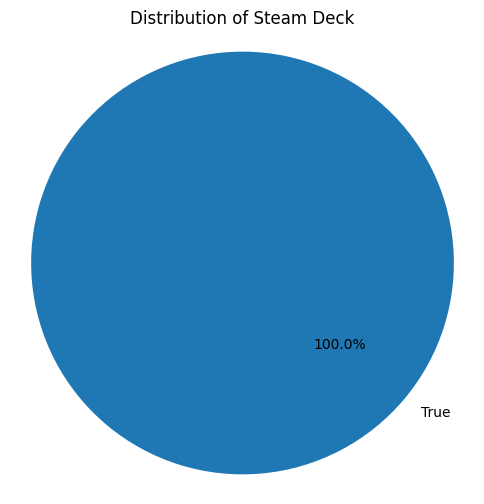

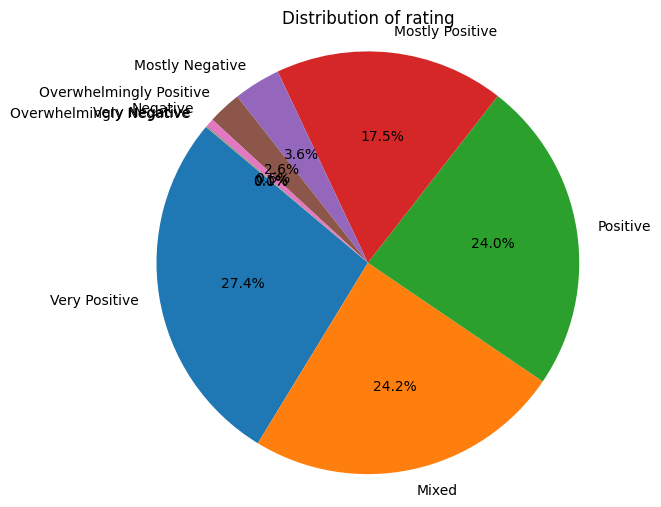

In [ ]:
for col in df.columns:
    if df[col].nunique() <= 10:
        value_counts = df[col].value_counts().head(10)
        plt.figure(figsize=(6, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Distribution of {col}")
        plt.axis('equal')
        plt.show()

Correlation Matrix:
                 Price original  DLC count  Required age       Mac     Linux  \
Price original         1.000000   0.032879      0.084851  0.007602  0.013049   
DLC count              0.032879   1.000000      0.018977  0.016092  0.010677   
Required age           0.084851   0.018977      1.000000 -0.031069 -0.019101   
Mac                    0.007602   0.016092     -0.031069  1.000000  0.601494   
Linux                  0.013049   0.010677     -0.019101  0.601494  1.000000   
Positive ratio         0.017958   0.007654     -0.012899  0.085269  0.077515   
Achievements          -0.005196   0.017734      0.000099 -0.005712  0.004868   
Recommendations       -0.008132   0.023154      0.088757  0.021818  0.025961   

                 Positive ratio  Achievements  Recommendations  
Price original         0.017958     -0.005196        -0.008132  
DLC count              0.007654      0.017734         0.023154  
Required age          -0.012899      0.000099         0.088757  

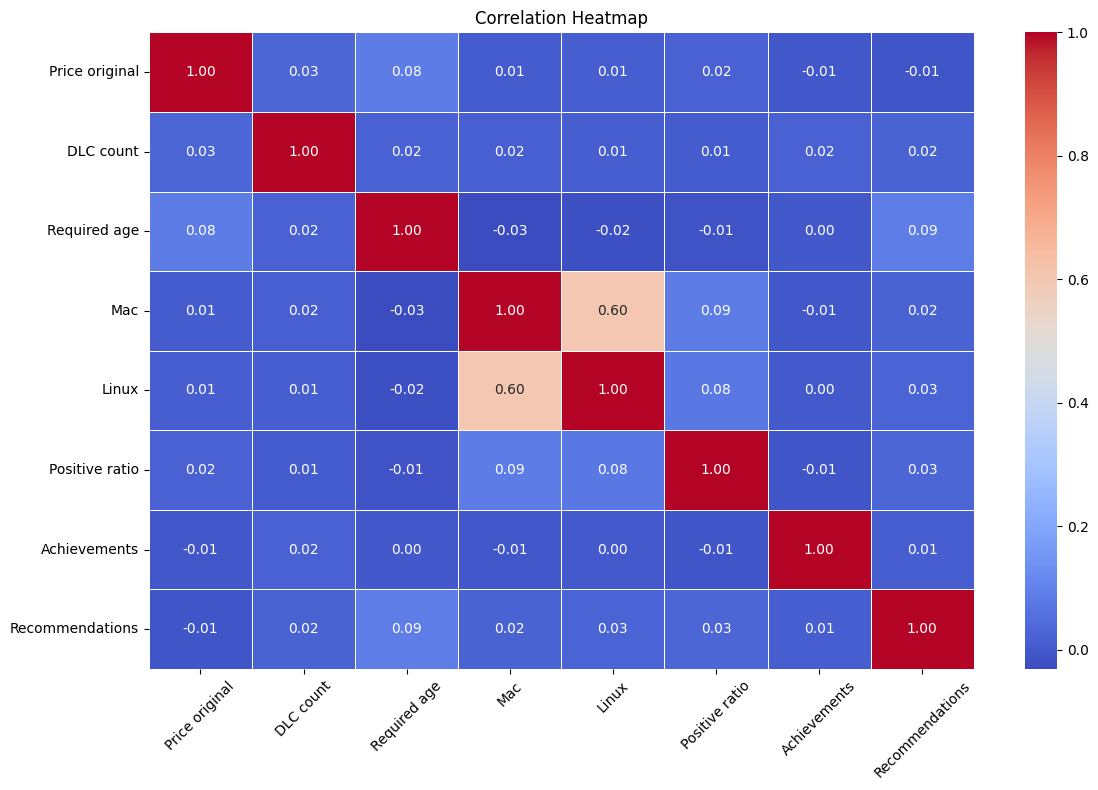

In [ ]:
correlation = df.corr(numeric_only=True).drop(index=['Windows', 'Steam Deck'], columns=['Windows', 'Steam Deck'], errors='ignore')

print("Correlation Matrix:")
print(correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


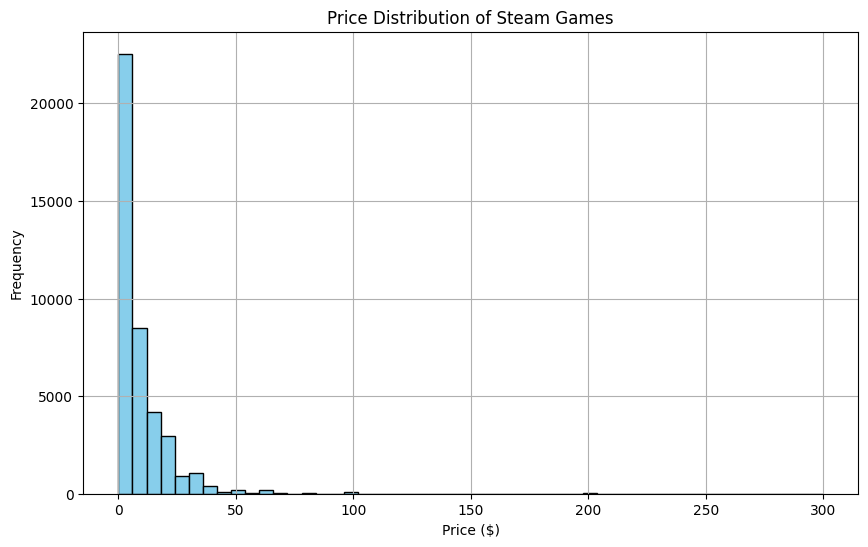

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Price original'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Steam Games')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\nkeis\AppData\Local\Temp\ipykernel_10200\2133605267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_counts, x='Price Type', y='Count', palette='Set2')


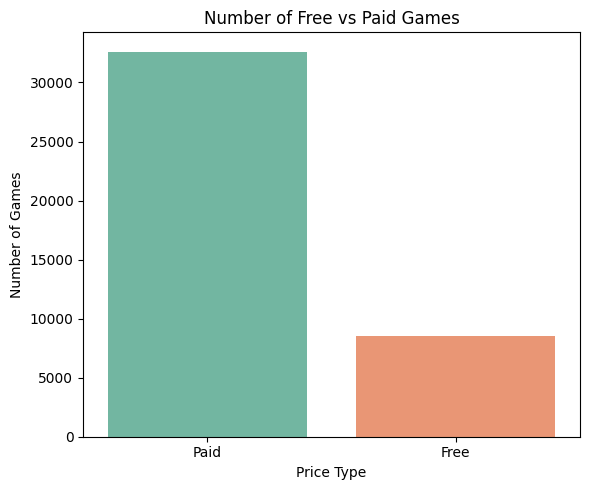

In [ ]:
df['Price Type'] = df['Price original'].apply(lambda x: 'Free' if x == 0.0 else 'Paid')

price_counts = df['Price Type'].value_counts().reset_index()
price_counts.columns = ['Price Type', 'Count']

# plot
plt.figure(figsize=(6, 5))
sns.barplot(data=price_counts, x='Price Type', y='Count', palette='Set2')
plt.title('Number of Free vs Paid Games')
plt.ylabel('Number of Games')
plt.xlabel('Price Type')
plt.tight_layout()
plt.show()


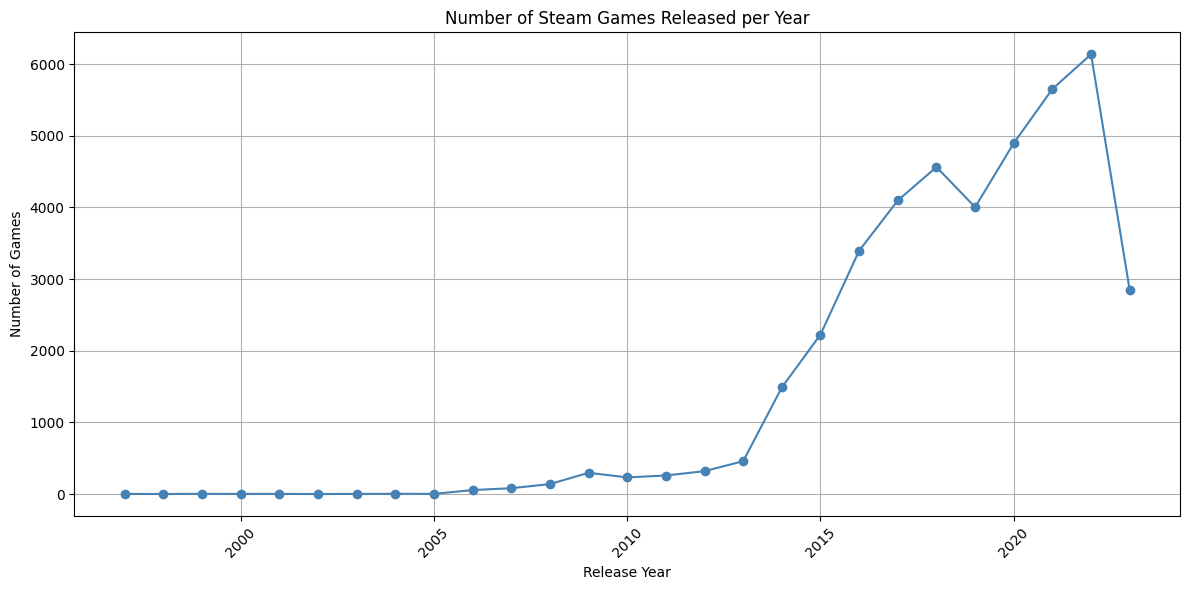

In [ ]:
df['Release Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

release_counts = df['Release Year'].value_counts().sort_index(ascending=True)

# LINEPLOT
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o', color='steelblue')
plt.title("Number of Steam Games Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nkeis\AppData\Local\Temp\ipykernel_10200\1683197613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_games['Release Month'] = free_games['Release date'].dt.to_period('M')


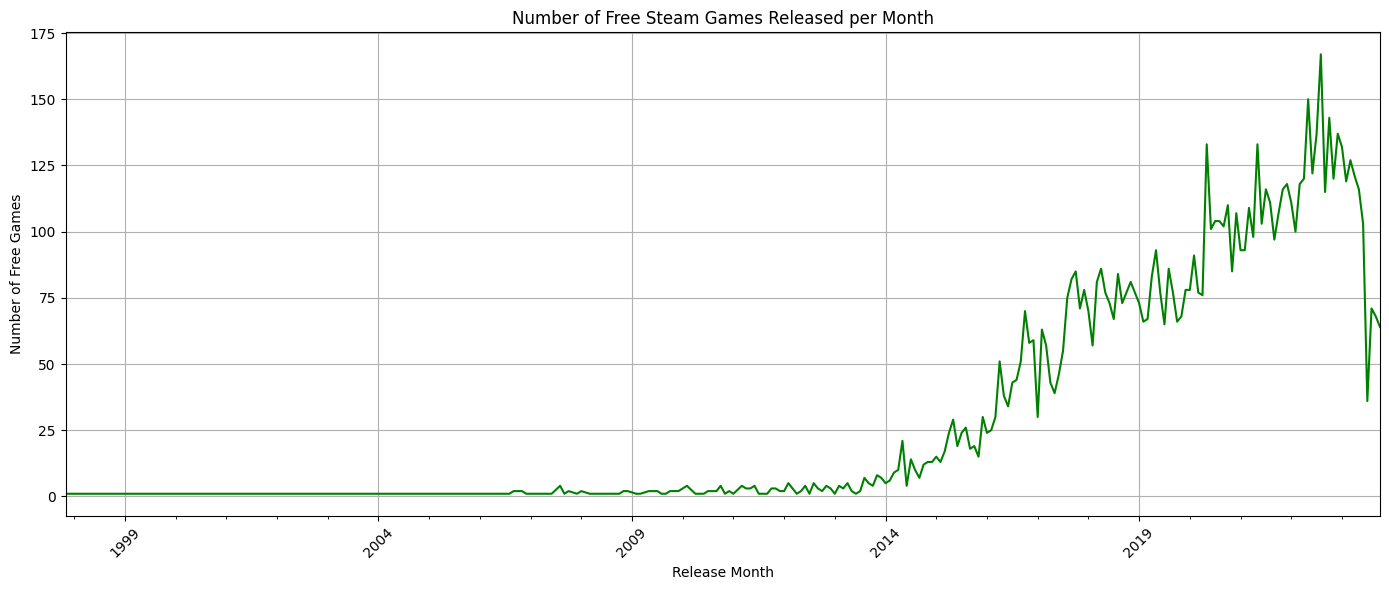

In [ ]:
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

free_games = df[df['Price original'] == 0]

free_games['Release Month'] = free_games['Release date'].dt.to_period('M')

monthly_free_counts = free_games['Release Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
monthly_free_counts.plot(kind='line', color='green')
plt.title("Number of Free Steam Games Released per Month")
plt.xlabel("Release Month")
plt.ylabel("Number of Free Games")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\nkeis\AppData\Local\Temp\ipykernel_10200\504554771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')


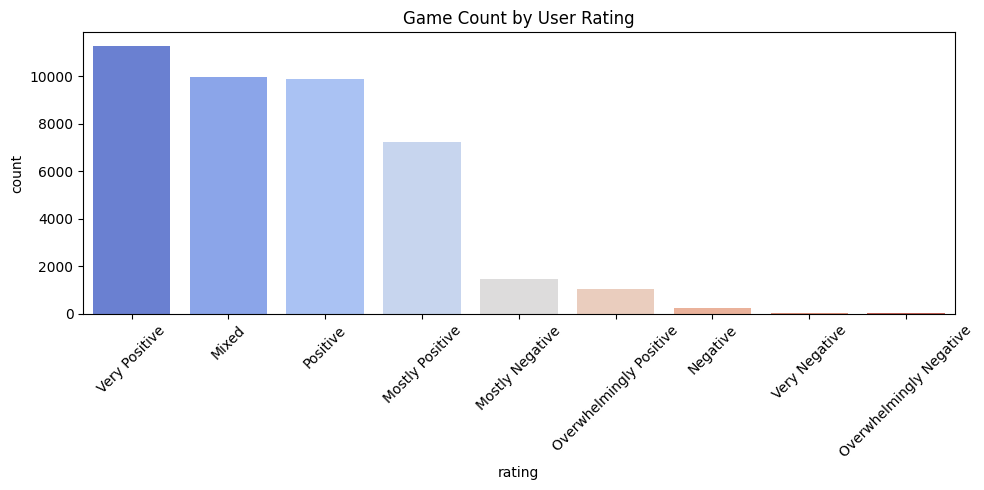

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Game Count by User Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Top 10 Developers'}, xlabel='Games Count', ylabel='Developer'>

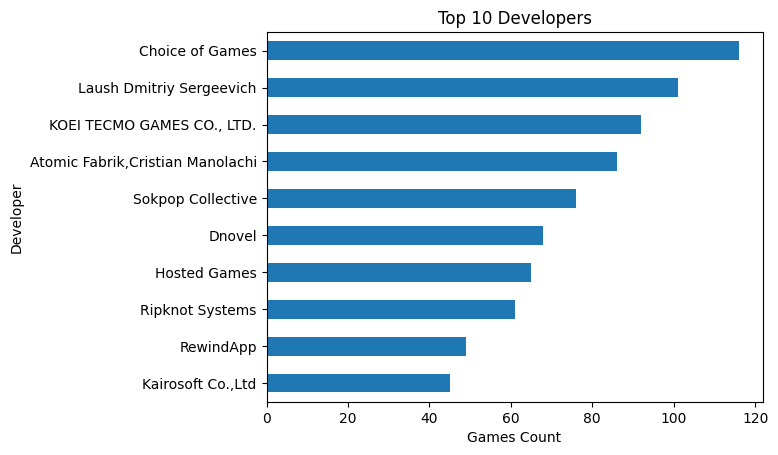

In [ ]:
df['Developers'].value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh', 
    title='Top 10 Developers', 
    xlabel='Games Count', 
    ylabel='Developer'
)

<Axes: title={'center': 'Top 10 Publishers'}, xlabel='Games Count', ylabel='Publisher'>

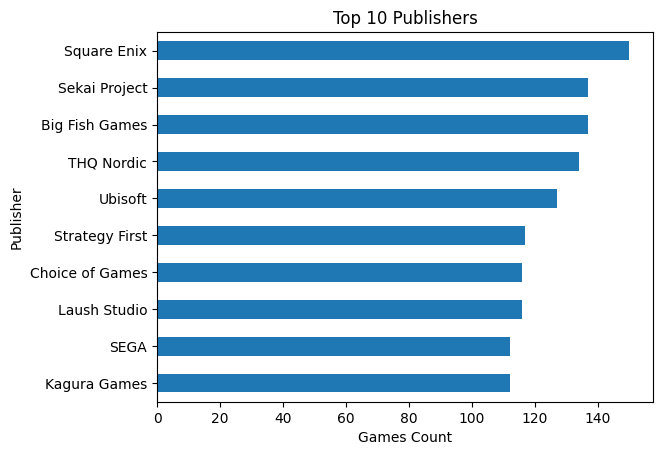

In [ ]:
df['Publishers'].value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh', 
    title='Top 10 Publishers', 
    xlabel='Games Count', 
    ylabel='Publisher'
)

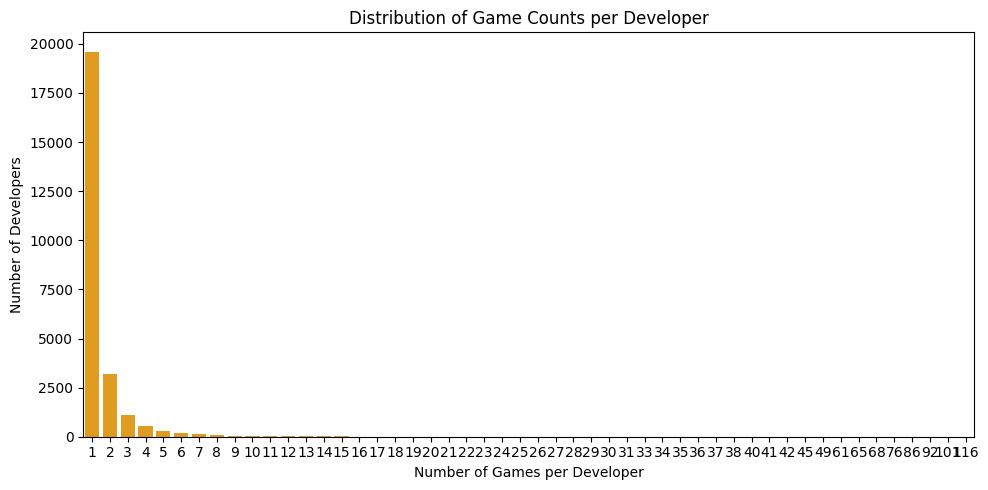

In [ ]:
dev_counts = df['Developers'].value_counts()

game_count_distribution = dev_counts.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=game_count_distribution.index, y=game_count_distribution.values, color='orange')
plt.xlabel('Number of Games per Developer')
plt.ylabel('Number of Developers')
plt.title('Distribution of Game Counts per Developer')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


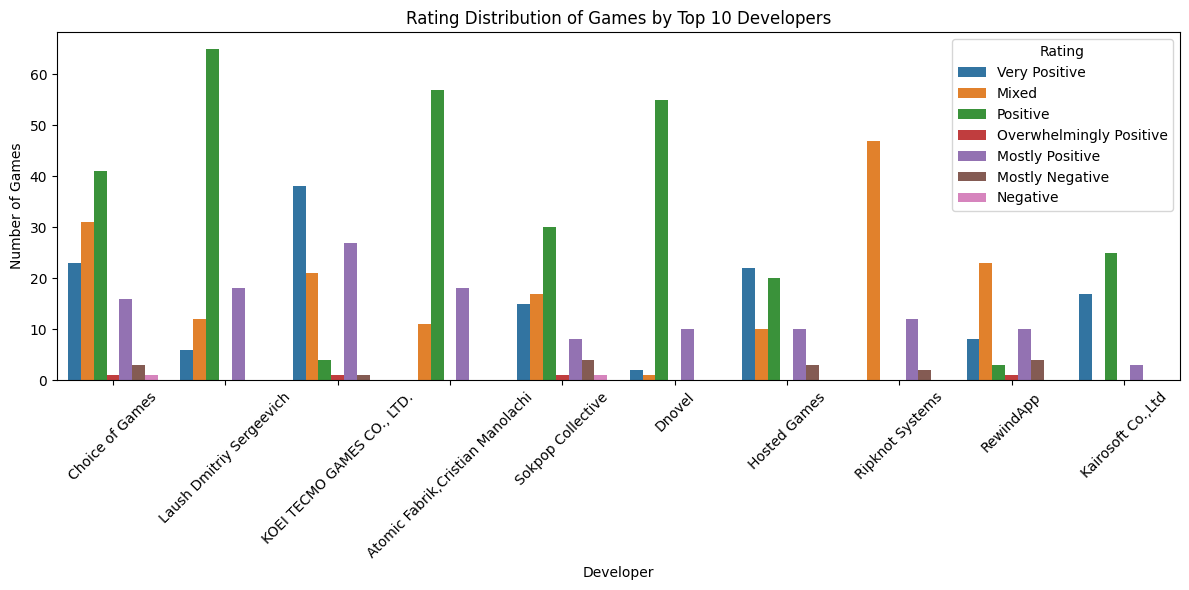

In [ ]:
df_rating = df[df['rating'].notnull()]


top_developers = df_rating['Developers'].value_counts().head(10).index

top_devs_df = df_rating[df_rating['Developers'].isin(top_developers)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_devs_df, x='Developers', hue='rating', order=top_developers)
plt.xticks(rotation=45)
plt.title('Rating Distribution of Games by Top 10 Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


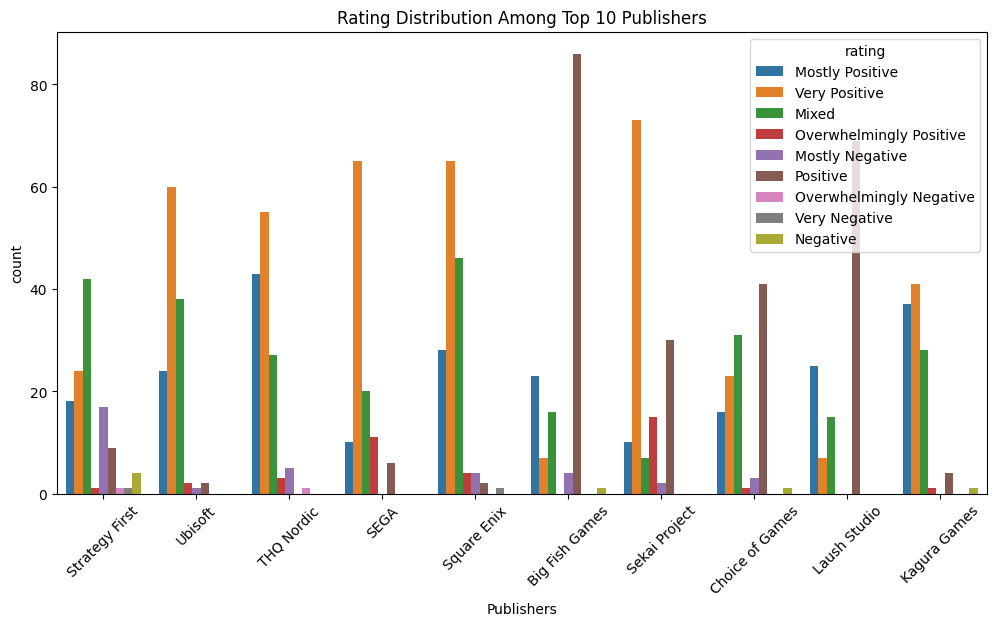

In [ ]:
top_publishers = df['Publishers'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Publishers'].isin(top_publishers)], x='Publishers', hue='rating')
plt.title('Rating Distribution Among Top 10 Publishers')
plt.xticks(rotation=45)
plt.show()


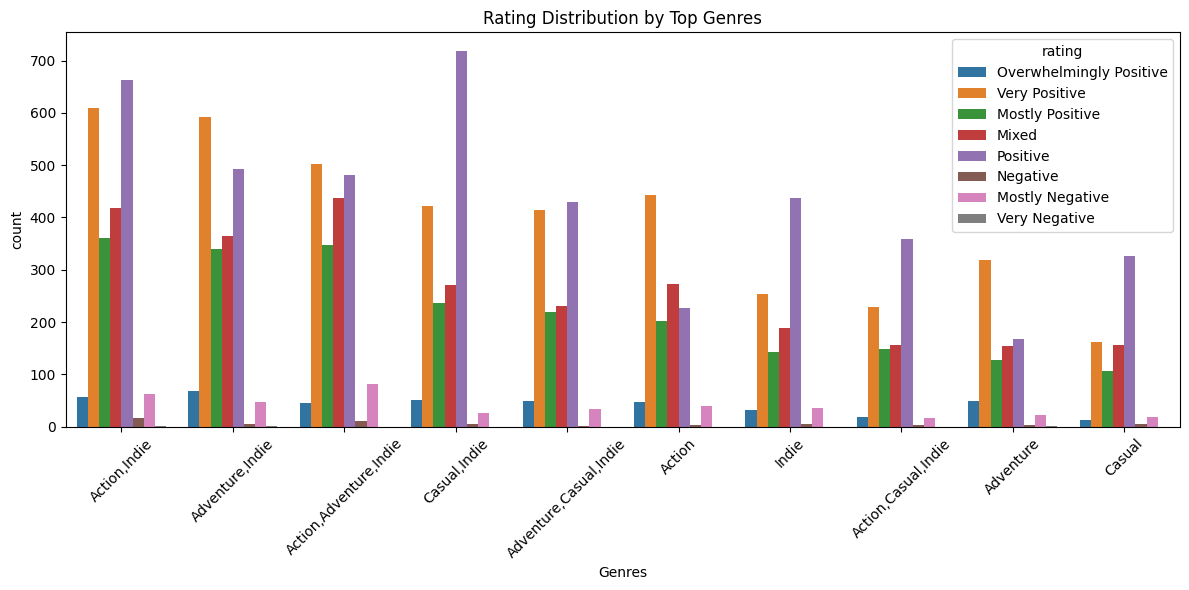

In [ ]:
top_genres = df['Genres'].value_counts().head(10).index.tolist()
filtered_df = df[df['Genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Genres', hue='rating', order=top_genres)
plt.title('Rating Distribution by Top Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


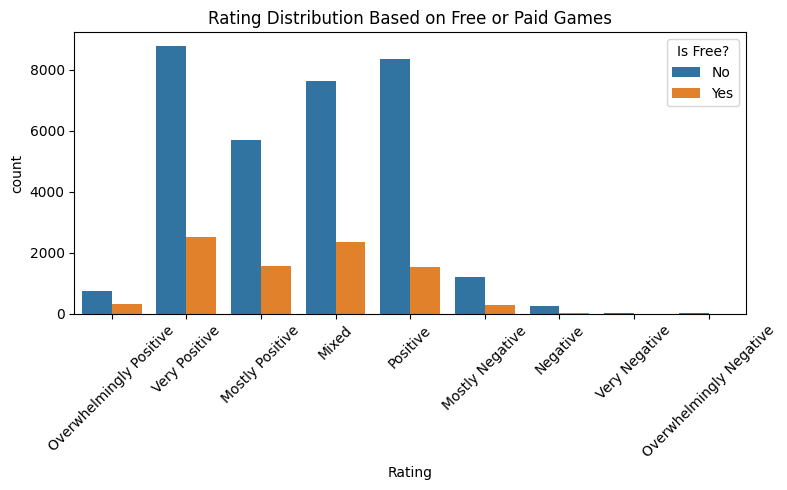

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', hue=(df['Price original'] == 0))
plt.title('Rating Distribution Based on Free or Paid Games')
plt.xlabel('Rating')
plt.legend(title='Is Free?', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# Get top 10k developers by count, break ties with mean positive_ratio
dev_counts = df.groupby('Developers').agg(
    count=('Developers', 'count')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count'], ascending=[False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

# Filter df to only include top 10k developers
df = df[df['Developers'].isin(top_10k_developers)]

# Repeat the same for publishers
pub_counts = df.groupby('Publishers').agg(
    count=('Publishers', 'count')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count'], ascending=[False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()

# Filter df to only include top 10k publishers
df = df[df['Publishers'].isin(top_10k_publishers)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25508 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          25508 non-null  object 
 1   Price original        25508 non-null  float64
 2   DLC count             25508 non-null  int64  
 3   Required age          25508 non-null  int64  
 4   Windows               25508 non-null  bool   
 5   Mac                   25508 non-null  bool   
 6   Linux                 25508 non-null  bool   
 7   Steam Deck            25508 non-null  bool   
 8   Supported languages   25508 non-null  object 
 9   Full audio languages  11949 non-null  object 
 10  Developers            25508 non-null  object 
 11  Publishers            25508 non-null  object 
 12  Movies                24178 non-null  object 
 13  rating                25508 non-null  object 
 14  Positive ratio        25508 non-null  int64  
 15  Genres             

In [10]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Full audio languages    13559
Tags                     1808
Movies                   1330
Categories                282
Genres                     23
Developers                  0
Positive ratio              0
rating                      0
Publishers                  0
Release date                0
Price original              0
Supported languages         0
Steam Deck                  0
Linux                       0
Mac                         0
Windows                     0
Required age                0
DLC count                   0
Achievements                0
dtype: int64


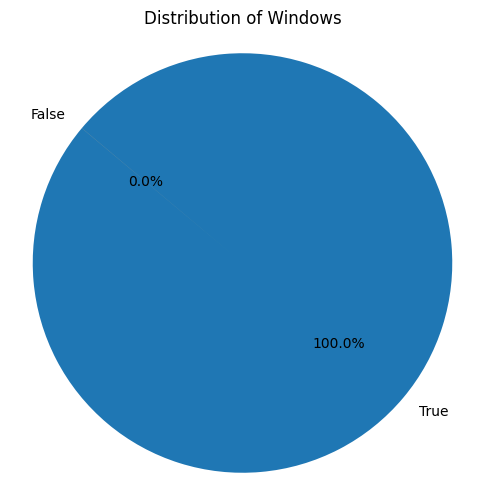

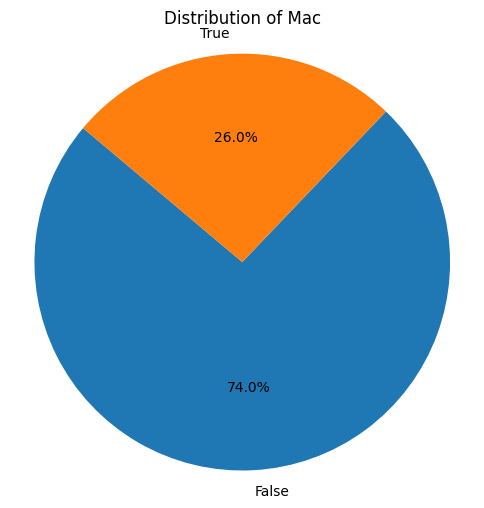

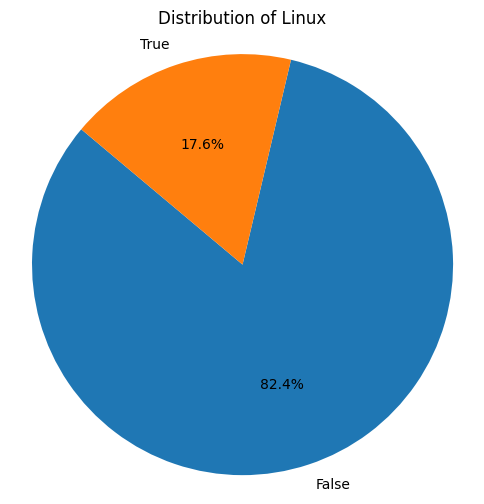

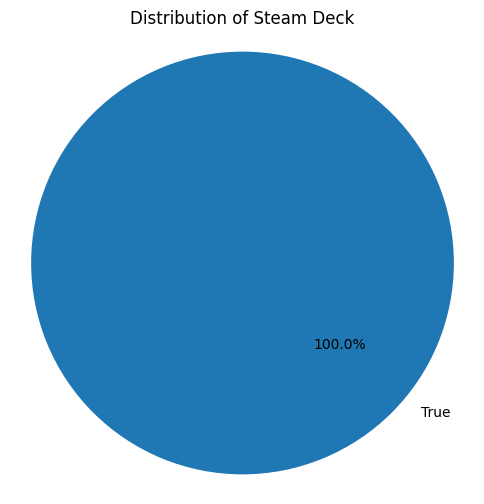

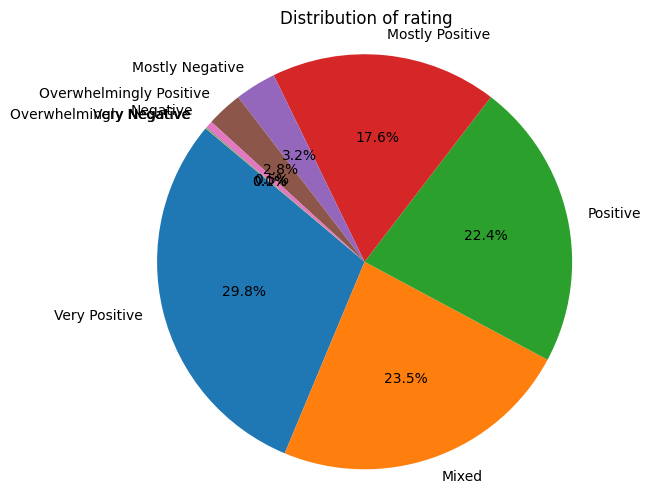

In [11]:
for col in df.columns:
    if df[col].nunique() <= 10:
        value_counts = df[col].value_counts().head(10)
        plt.figure(figsize=(6, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Distribution of {col}")
        plt.axis('equal')
        plt.show()

Correlation Matrix:
                Price original  DLC count  Required age       Mac     Linux  \
Price original        1.000000   0.031624      0.086309  0.005144  0.016416   
DLC count             0.031624   1.000000      0.016538  0.016976  0.010214   
Required age          0.086309   0.016538      1.000000 -0.037124 -0.019521   
Mac                   0.005144   0.016976     -0.037124  1.000000  0.625715   
Linux                 0.016416   0.010214     -0.019521  0.625715  1.000000   
Positive ratio        0.003977   0.007616     -0.006246  0.082765  0.070642   
Achievements         -0.014954   0.012246     -0.004327 -0.013605 -0.000498   

                Positive ratio  Achievements  
Price original        0.003977     -0.014954  
DLC count             0.007616      0.012246  
Required age         -0.006246     -0.004327  
Mac                   0.082765     -0.013605  
Linux                 0.070642     -0.000498  
Positive ratio        1.000000     -0.017828  
Achievements      

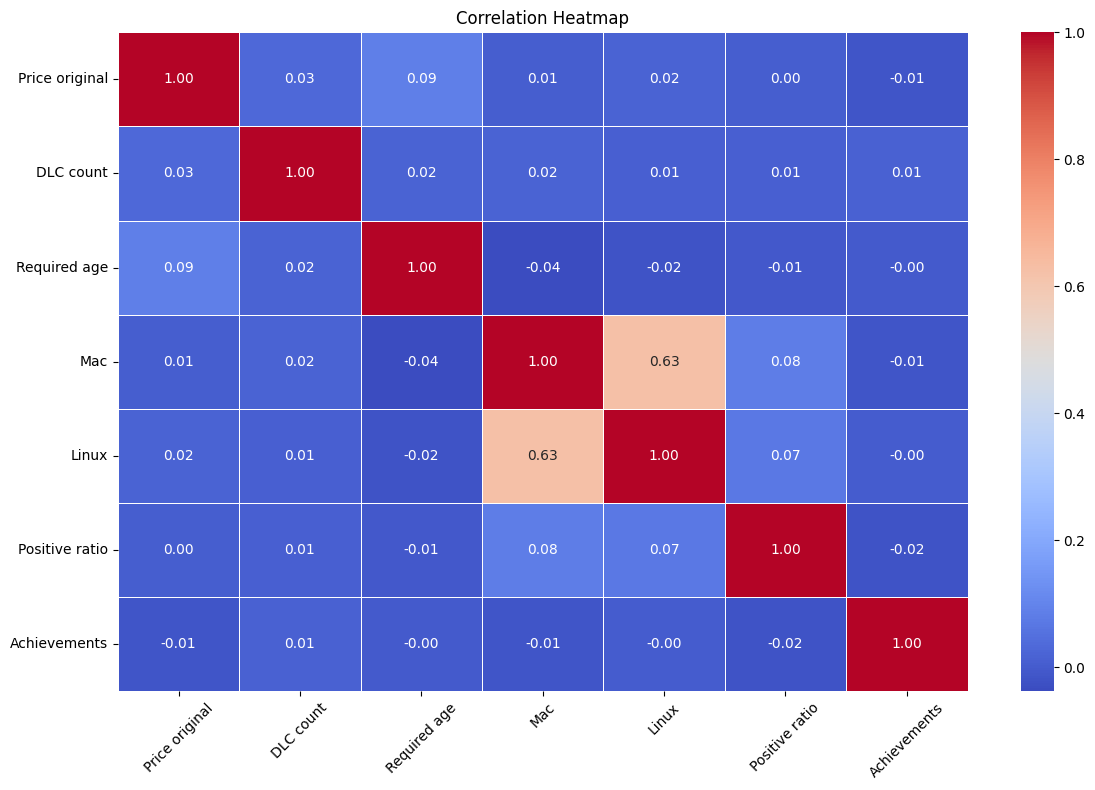

In [15]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number', 'bool'])
correlation = numeric_df.corr().drop(index=['Windows', 'Steam Deck'], columns=['Windows', 'Steam Deck'], errors='ignore')

print("Correlation Matrix:")
print(correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


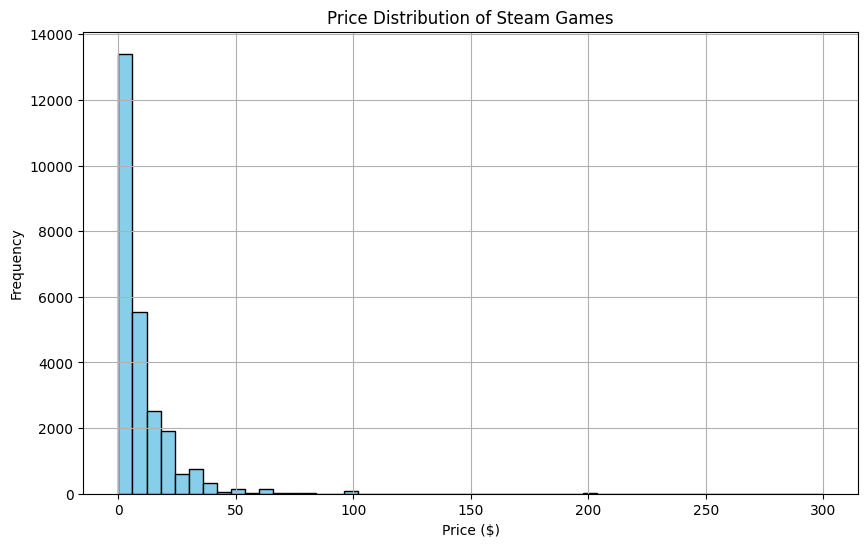

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df['Price original'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Steam Games')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

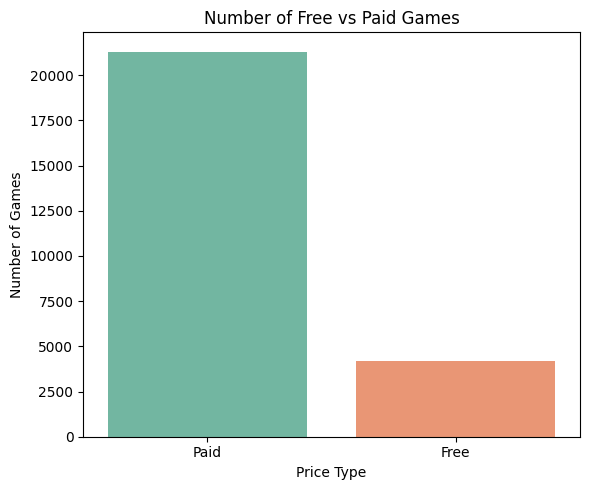

In [17]:
df['Price Type'] = df['Price original'].apply(lambda x: 'Free' if x == 0.0 else 'Paid')

price_counts = df['Price Type'].value_counts().reset_index()
price_counts.columns = ['Price Type', 'Count']

# plot
plt.figure(figsize=(6, 5))
sns.barplot(data=price_counts, x='Price Type', y='Count', palette='Set2')
plt.title('Number of Free vs Paid Games')
plt.ylabel('Number of Games')
plt.xlabel('Price Type')
plt.tight_layout()
plt.show()


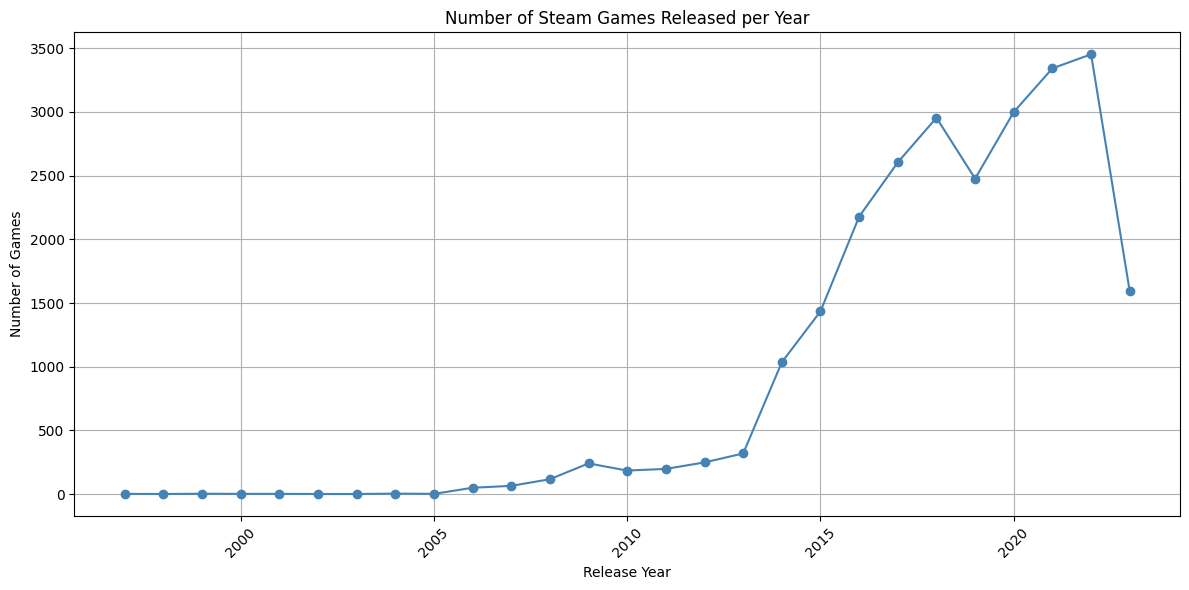

In [18]:
df['Release Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

release_counts = df['Release Year'].value_counts().sort_index(ascending=True)

plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o', color='steelblue')
plt.title("Number of Steam Games Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\WilliamVlr\AppData\Local\Temp\ipykernel_18840\1683197613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_games['Release Month'] = free_games['Release date'].dt.to_period('M')


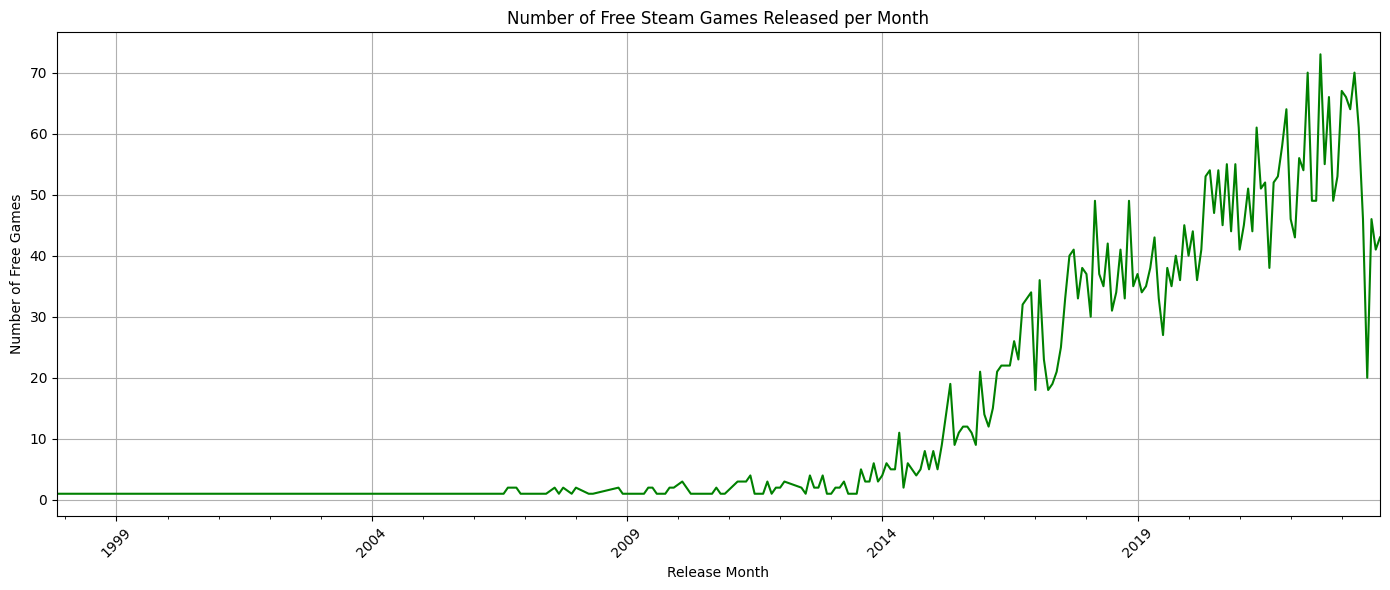

In [19]:
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

free_games = df[df['Price original'] == 0]

free_games['Release Month'] = free_games['Release date'].dt.to_period('M')

monthly_free_counts = free_games['Release Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
monthly_free_counts.plot(kind='line', color='green')
plt.title("Number of Free Steam Games Released per Month")
plt.xlabel("Release Month")
plt.ylabel("Number of Free Games")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


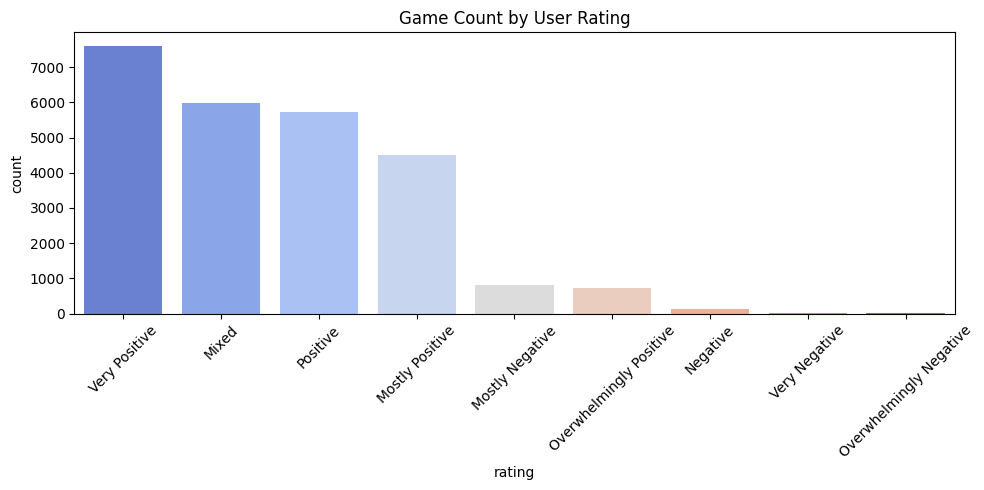

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Game Count by User Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<AxesSubplot:title={'center':'Top 10 Developers'}, ylabel='Games Count'>

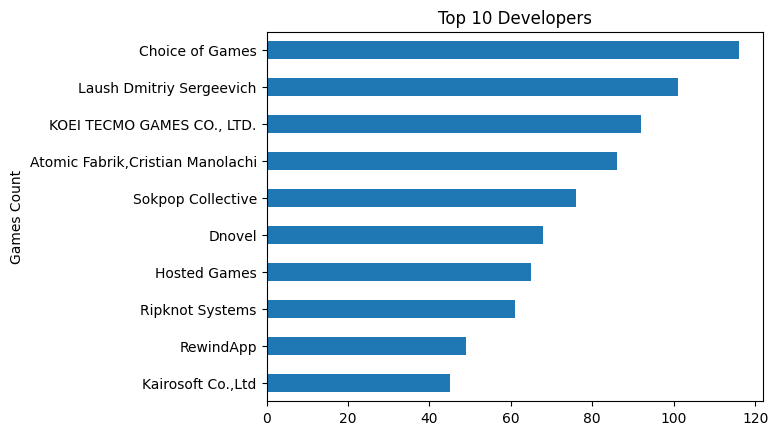

In [21]:
df['Developers'].value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh', 
    title='Top 10 Developers', 
    xlabel='Games Count', 
    ylabel='Developer'
)

<AxesSubplot:title={'center':'Top 10 Publishers'}, ylabel='Games Count'>

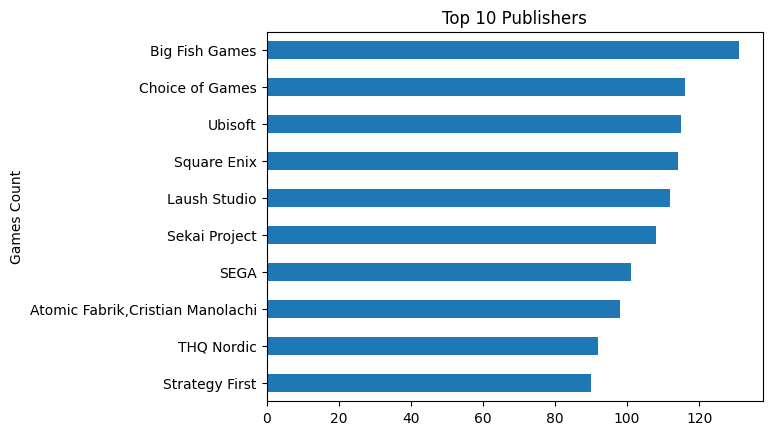

In [22]:
df['Publishers'].value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh', 
    title='Top 10 Publishers', 
    xlabel='Games Count', 
    ylabel='Publisher'
)

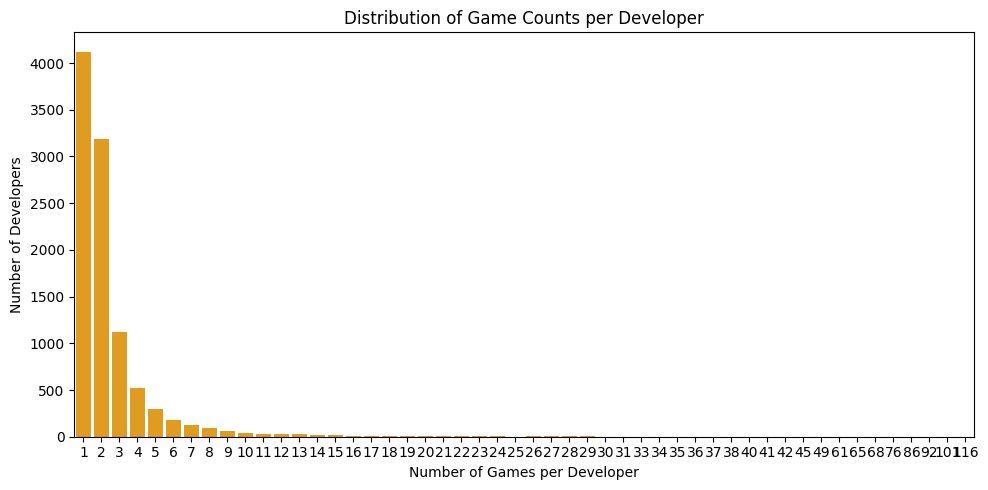

In [23]:
dev_counts = df['Developers'].value_counts()

game_count_distribution = dev_counts.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=game_count_distribution.index, y=game_count_distribution.values, color='orange')
plt.xlabel('Number of Games per Developer')
plt.ylabel('Number of Developers')
plt.title('Distribution of Game Counts per Developer')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


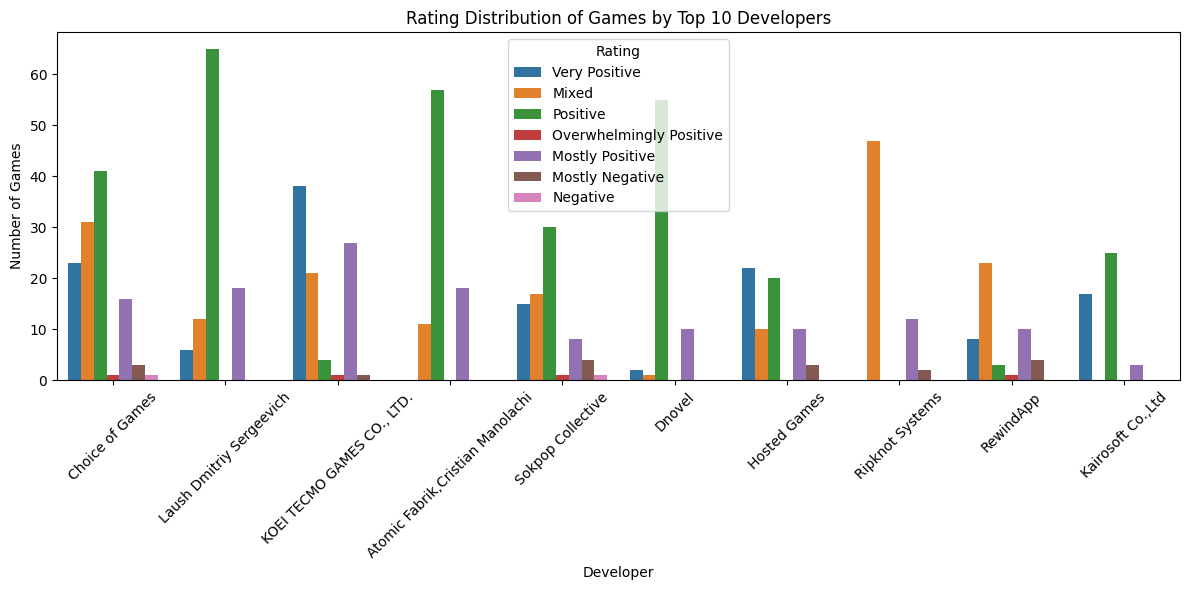

In [24]:
df_rating = df[df['rating'].notnull()]


top_developers = df_rating['Developers'].value_counts().head(10).index

top_devs_df = df_rating[df_rating['Developers'].isin(top_developers)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_devs_df, x='Developers', hue='rating', order=top_developers)
plt.xticks(rotation=45)
plt.title('Rating Distribution of Games by Top 10 Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


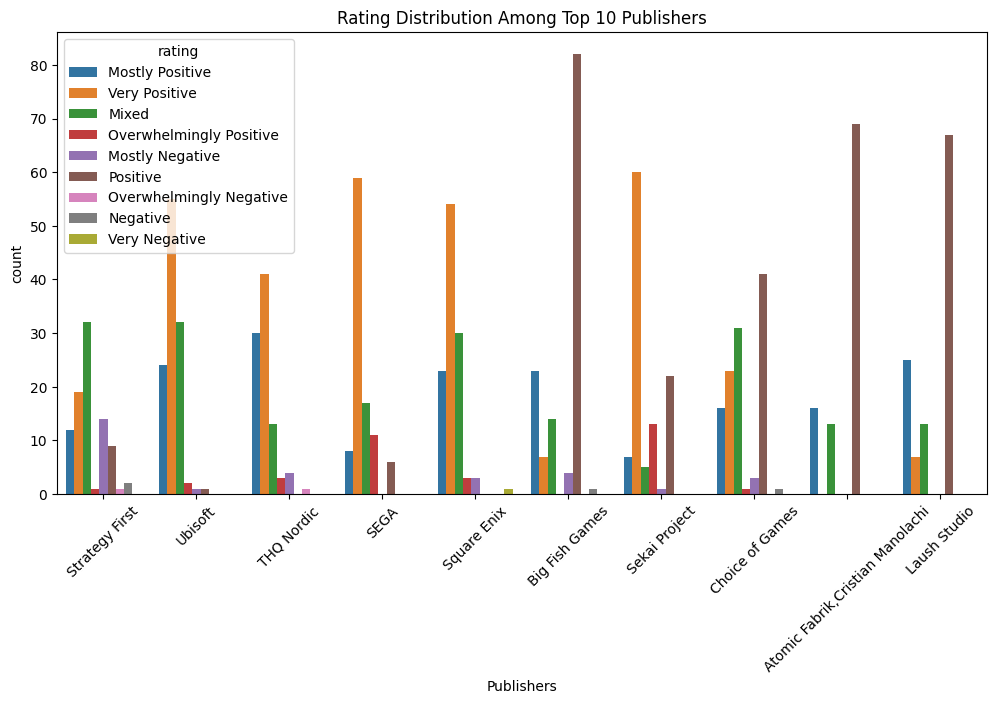

In [25]:
top_publishers = df['Publishers'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Publishers'].isin(top_publishers)], x='Publishers', hue='rating')
plt.title('Rating Distribution Among Top 10 Publishers')
plt.xticks(rotation=45)
plt.show()


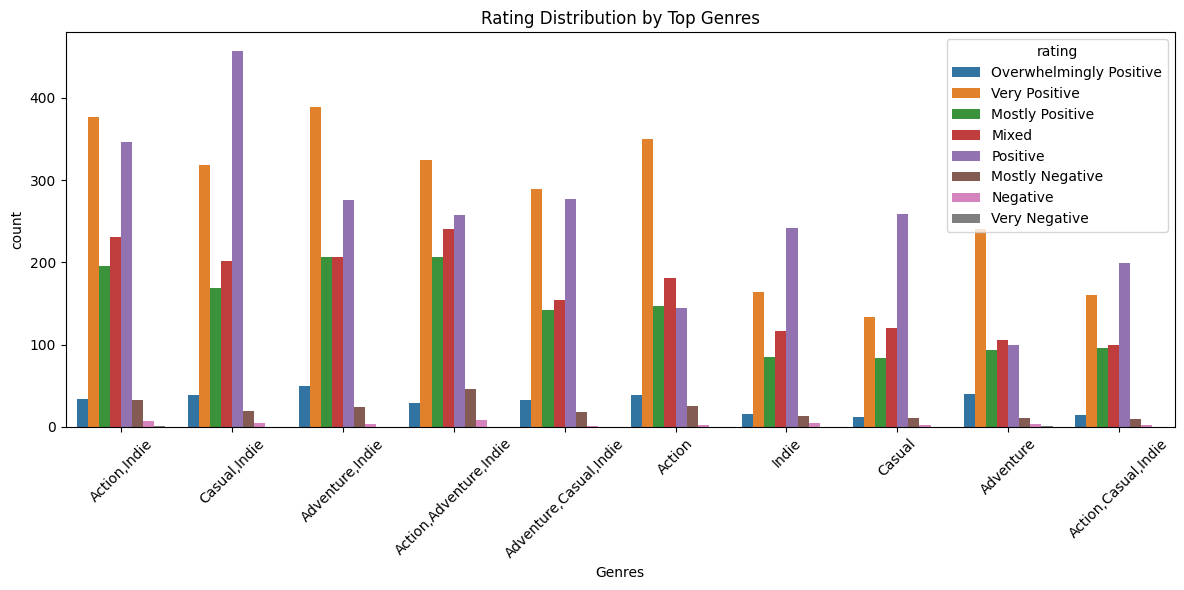

In [26]:
top_genres = df['Genres'].value_counts().head(10).index.tolist()
filtered_df = df[df['Genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Genres', hue='rating', order=top_genres)
plt.title('Rating Distribution by Top Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


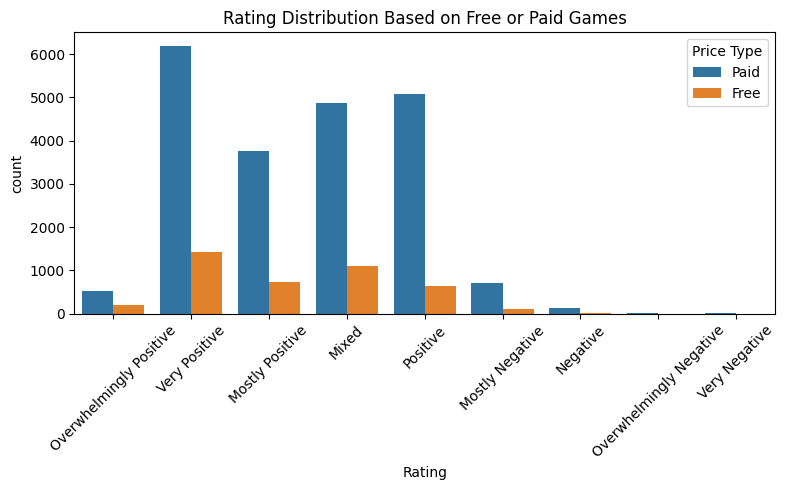

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', hue='Price Type')
plt.title('Rating Distribution Based on Free or Paid Games')
plt.xlabel('Rating')
plt.legend(title='Price Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ATTEMPT 1

## 1. READ DATA

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/merged_steam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 2. FEATURE SELECTION

In [53]:
# Select Relevant Features to be Explored more
selected_tabular = [
    'Release date', 'Required age', 'Price original', 'DLC count', 'Windows',
    'Mac', 'Linux', 'Steam Deck', 'Supported languages', 'Full audio languages',
    'Developers', 'Publishers',
    'Movies', 'rating'
]

selected_text = [
    'Short description', 'Genres', 'Categories', 'Tags', 'Detailed description'
]

selected_atr = selected_tabular + selected_text
selected_atr

['Release date',
 'Required age',
 'Price original',
 'DLC count',
 'Windows',
 'Mac',
 'Linux',
 'Steam Deck',
 'Supported languages',
 'Full audio languages',
 'Developers',
 'Publishers',
 'Movies',
 'rating',
 'Short description',
 'Genres',
 'Categories',
 'Tags',
 'Detailed description']

In [54]:
df = df[selected_atr]
df.head()

Release date  Required age  Price original  DLC count  Windows   Mac  Linux  \
0   2000-11-01             0            9.99          0     True  True   True   
1   1999-04-01             0            4.99          0     True  True   True   
2   2003-05-01             0            4.99          0     True  True   True   
3   2001-06-01             0            4.99          0     True  True   True   
4   1999-11-01             0            4.99          0     True  True   True   

   Steam Deck                                Supported languages  \
0        True  English,French,German,Italian,Spanish - Spain,...   
1        True  English,French,German,Italian,Spanish - Spain,...   
2        True      English,French,German,Italian,Spanish - Spain   
3        True  English,French,German,Italian,Spanish - Spain,...   
4        True                       English,French,German,Korean   

                                Full audio languages        Developers  \
0  English,French,German,Italian,Spanish - Spain,...             Valve   
1                                                NaN             Valve   
2                                                NaN             Valve   
3                                                NaN             Valve   
4                                                NaN  Gearbox Software   

  Publishers Movies                   rating  \
0      Valve    NaN  Overwhelmingly Positive   
1      Valve    NaN            Very Positive   
2      Valve    NaN            Very Positive   
3      Valve    NaN          Mostly Positive   
4      Valve    NaN  Overwhelmingly Positive   

                                   Short description  Genres  \
0  Play the world's number 1 online action game. ...  Action   
1  One of the most popular online action games of...  Action   
2  Enlist in an intense brand of Axis vs. Allied ...  Action   
3  Enjoy fast-paced multiplayer gaming with Death...  Action   
4  Return to the Black Mesa Research Facility as ...  Action   

                                          Categories  \
0  Multi-player,PvP,Online PvP,Shared/Split Scree...   
1  Multi-player,PvP,Online PvP,Shared/Split Scree...   
2              Multi-player,Valve Anti-Cheat enabled   
3  Multi-player,PvP,Online PvP,Shared/Split Scree...   
4  Single-player,Multi-player,Valve Anti-Cheat en...   

                                                Tags  \
0  Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...   
1  Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...   
2  FPS,World War II,Multiplayer,Shooter,Action,Wa...   
3  Action,FPS,Classic,Multiplayer,Shooter,First-P...   
4  FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...   

                                Detailed description  
0  Play the world's number 1 online action game. ...  
1  One of the most popular online action games of...  
2  Enlist in an intense brand of Axis vs. Allied ...  
3  Enjoy fast-paced multiplayer gaming with Death...  
4  Return to the Black Mesa Research Facility as ...

In [55]:
df.rename(columns={
    'Price original': 'Price'
}, inplace=True)

## 3. EDA

### 3a. Missing Values Identification

In [56]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

Missing Values  Percentage
Full audio languages           21882   53.150352
Tags                            3690    8.962837
Movies                          1804    4.381831
Categories                       527    1.280058
Publishers                       221    0.536799
Developers                        74    0.179743
Detailed description              47    0.114161
Genres                            44    0.106874
Short description                 14    0.034005
Supported languages               13    0.031576

#### Exploring Full Audio Languages

In [57]:
df[df['Full audio languages'].notnull()]['Full audio languages']

0        English,French,German,Italian,Spanish - Spain,...
6        English,French,German,Italian,Spanish - Spain,...
9        English,French,German,Italian,Korean,Spanish -...
16       English,French,German,Italian,Korean,Spanish -...
17       English,French,German,Russian,Spanish - Spain,...
                               ...                        
41158                                              English
41163                                             Japanese
41167                                              English
41168                                              English
41169                                              English
Name: Full audio languages, Length: 19288, dtype: object

Full audio languages may influence rating of a game since it aligns with people's preferences in playing games. To handle the missing value here, we will make a new column 'Has Full Audio' with value yes/no or 1/0.

#### Explore < 10% Missing value columns

In [58]:
df[df['Tags'].notnull()]['Tags']

0        Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...
1        Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...
2        FPS,World War II,Multiplayer,Shooter,Action,Wa...
3        Action,FPS,Classic,Multiplayer,Shooter,First-P...
4        FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...
                               ...                        
41165    Early Access,CRPG,Dungeon Crawler,Exploration,...
41166    Old School,Time Management,Education,Open Worl...
41167    Hunting,Horror,Dark Humor,Nature,Exploration,A...
41168    3D Platformer,Action-Adventure,Comedy,Action,A...
41169    Simulation,Hidden Object,Horror,Puzzle,Realist...
Name: Tags, Length: 37480, dtype: object

Tags' missing values can just be removed/dropped, but this approach can't be mixed with dropping rows in other columns that has missing values < 10% too. So lets just see the others result and decide in the last part of this section.

In [59]:
df[df['Genres'].notnull()]['Genres']

0                                       Action
1                                       Action
2                                       Action
3                                       Action
4                                       Action
                         ...                  
41165                  Action,RPG,Early Access
41166    Action,Adventure,Indie,RPG,Simulation
41167                                   Action
41168                         Action,Adventure
41169                               Simulation
Name: Genres, Length: 41126, dtype: object

Same like Tags, but more valuable

In [60]:
df[df['Movies'].notnull()]['Movies']

9        http://cdn.akamai.steamstatic.com/steam/apps/9...
16       http://cdn.akamai.steamstatic.com/steam/apps/9...
17       http://cdn.akamai.steamstatic.com/steam/apps/9...
19       http://cdn.akamai.steamstatic.com/steam/apps/2...
20       http://cdn.akamai.steamstatic.com/steam/apps/5...
                               ...                        
41165    http://cdn.akamai.steamstatic.com/steam/apps/2...
41166    http://cdn.akamai.steamstatic.com/steam/apps/2...
41167    http://cdn.akamai.steamstatic.com/steam/apps/2...
41168    http://cdn.akamai.steamstatic.com/steam/apps/2...
41169    http://cdn.akamai.steamstatic.com/steam/apps/2...
Name: Movies, Length: 39366, dtype: object

- We can assume that a movie of a game can influence the game's rating. Someone may give bad rating if the game is not the same as presented in the movie.
- Others assumption is that game who has movie reflects the seriousness of the developer and publisher in developing and selling it which may increase the rating

In [61]:
df[df['Categories'].notnull()]['Categories']

0        Multi-player,PvP,Online PvP,Shared/Split Scree...
1        Multi-player,PvP,Online PvP,Shared/Split Scree...
2                    Multi-player,Valve Anti-Cheat enabled
3        Multi-player,PvP,Online PvP,Shared/Split Scree...
4        Single-player,Multi-player,Valve Anti-Cheat en...
                               ...                        
41165    Single-player,Partial Controller Support,Steam...
41166    Single-player,Multi-player,PvP,Shared/Split Sc...
41167    Single-player,Steam Achievements,Full controll...
41168    Single-player,Steam Achievements,Full controll...
41169                     Single-player,Steam Achievements
Name: Categories, Length: 40643, dtype: object

The same as Tags and genres

In [62]:
df[df['Supported languages'].notnull()]['Supported languages']

0        English,French,German,Italian,Spanish - Spain,...
1        English,French,German,Italian,Spanish - Spain,...
2            English,French,German,Italian,Spanish - Spain
3        English,French,German,Italian,Spanish - Spain,...
4                             English,French,German,Korean
                               ...                        
41165                                              English
41166                                              English
41167                                              English
41168                                              English
41169                                              English
Name: Supported languages, Length: 41157, dtype: object

We can just drop it since imputation would be hard for this column

#### CONCLUSION

Drop missing rows of:
- Supported languages
- Tags
- Categories
- Detail description
- Genres
- Short description

Convert into binary columns:
- Full audio languages => Has/Not has
- Movies => Has/Not has

Impute with Unknown:
- Publishers
- Developers

### 3b. Noise Identification

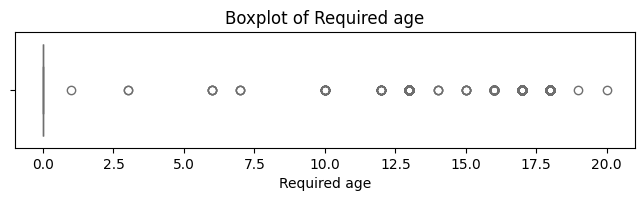

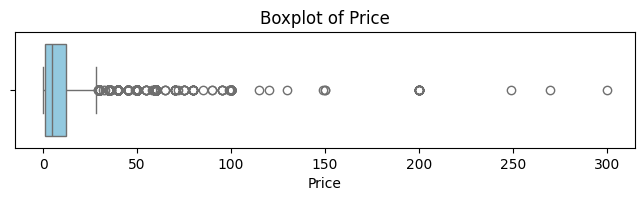

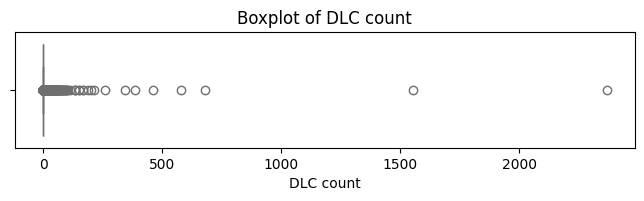

In [63]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [64]:
# Use IQR
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / df.shape[0]:.2f}%)")

Required age: 1145 outliers (2.78%)
Price: 2046 outliers (4.97%)
DLC count: 9061 outliers (22.01%)


#### Exploring Required Age

In [65]:
# Required age unique values
df['Required age'].unique()

array([ 0, 17, 13, 18, 16, 15,  6, 12, 10, 14,  1,  7,  3, 20, 19],
      dtype=int64)

In [66]:
# Count based on required age
df['Required age'].value_counts()

Required age
0     40025
17      732
18      155
13      153
16       54
10       17
12       14
15        5
6         4
14        3
7         3
3         2
1         1
20        1
19        1
Name: count, dtype: int64

It can just be dropped or categorized (discretization) to < 17 and > 17 or based on the game age requirement chart. 

#### Exploring Price (Original)

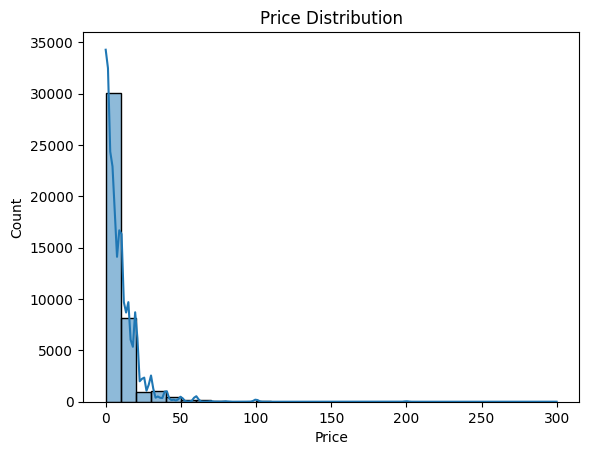

In [67]:
# Price distribution with density plot
sns.histplot(df['Price'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

it is right skewed

In [68]:
print(df['Price'].describe())

count    41170.000000
mean         8.722289
std         11.496071
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.900000
Name: Price, dtype: float64


In [69]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df[(df['Price'] < lower) | (df['Price'] > upper)]

Release date  Required age   Price  DLC count  Windows    Mac  Linux  \
77      2013-11-15             0   29.99          7     True   True   True   
128     2006-10-25             0   29.99          0     True   True  False   
136     2006-11-24             0   39.99          0     True  False  False   
197     2008-04-16             0   29.99          0     True  False  False   
232     2007-07-24             0   29.99          0     True   True  False   
...            ...           ...     ...        ...      ...    ...    ...   
41078   2023-05-23             0  199.99          0     True   True   True   
41079   2023-05-23             0  199.99          0     True   True   True   
41086   2023-06-21             0   29.99          0     True  False  False   
41141   2023-06-09             0   39.99          0     True  False  False   
41142   2023-06-24             0   29.99          0     True  False  False   

       Steam Deck                                Supported languages  \
77           True  English,German,Italian,Russian,Simplified Chin...   
128          True      English,French,German,Italian,Spanish - Spain   
136          True      English,French,German,Italian,Spanish - Spain   
197          True  English,French,German,Italian,Spanish - Spain,...   
232          True      English,French,German,Italian,Spanish - Spain   
...           ...                                                ...   
41078        True  English,French,Italian,German,Spanish - Spain,...   
41079        True  English,French,Italian,German,Spanish - Spain,...   
41086        True    Japanese,Simplified Chinese,Traditional Chinese   
41141        True                                    English,Russian   
41142        True                                    English,Russian   

               Full audio languages         Developers         Publishers  \
77     English,German,French,Korean            Egosoft            Egosoft   
128                             NaN      Firaxis Games                 2K   
136                             NaN             SimBin             SimBin   
197                             NaN              Nadeo            Ubisoft   
232                             NaN      Firaxis Games                 2K   
...                             ...                ...                ...   
41078                           NaN       PUZZLE Games               Hede   
41079                           NaN       PUZZLE Games               Hede   
41086  Japanese,Traditional Chinese           NanaWind       HIKARI FIELD   
41141                           NaN  Neki4 Electronics  Neki4 Electronics   
41142                           NaN  Neki4 Electronics  Neki4 Electronics   

                                                  Movies  \
77     http://cdn.akamai.steamstatic.com/steam/apps/2...   
128                                                  NaN   
136                                                  NaN   
197                                                  NaN   
232                                                  NaN   
...                                                  ...   
41078  http://cdn.akamai.steamstatic.com/steam/apps/2...   
41079  http://cdn.akamai.steamstatic.com/steam/apps/2...   
41086  http://cdn.akamai.steamstatic.com/steam/apps/2...   
41141  http://cdn.akamai.steamstatic.com/steam/apps/2...   
41142  http://cdn.akamai.steamstatic.com/steam/apps/2...   

                        rating  \
77                       Mixed   
128              Very Positive   
136              Very Positive   
197              Very Positive   
232    Overwhelmingly Positive   
...                        ...   
41078                 Positive   
41079                 Positive   
41086                 Positive   
41141                 Positive   
41142                 Positive   

                                       Short description  \
77     In the distant future, the X universe faces a ...   
128    With over 6 million un

In [70]:
df['Price'].sort_values(ascending=True)

41169      0.00
31968      0.00
31967      0.00
23636      0.00
31964      0.00
          ...  
37539    199.99
7475     199.99
38421    249.00
9157     269.99
2078     299.90
Name: Price, Length: 41170, dtype: float64

In [71]:
# see > 75% prices
Q3 = df['Price'].quantile(0.75)
df[df['Price'] > Q3].sort_values(by='Price', ascending=False).head(5)

Release date  Required age   Price  DLC count  Windows    Mac  Linux  \
2078    2013-11-12             0  299.90          0     True  False  False   
9157    2018-10-10             0  269.99          0     True   True  False   
38421   2022-11-01             0  249.00          0     True  False  False   
37539   2022-05-21             0  199.99          0     True  False  False   
33727   2021-09-09             0  199.99          0     True  False  False   

       Steam Deck                    Supported languages Full audio languages  \
2078         True                                English                  NaN   
9157         True                                English                  NaN   
38421        True  English,French,German,Spanish - Spain                  NaN   
37539        True                                English                  NaN   
33727        True  English,French,German,Spanish - Spain                  NaN   

                             Developers                        Publishers  \
2078                           Aartform                          Aartform   
9157                             SideFX                            SideFX   
38421               MAGIX Software GmbH               MAGIX Software GmbH   
37539  Cristian Manolachi,Atomic Fabrik  Cristian Manolachi,Atomic Fabrik   
33727               MAGIX Software GmbH               MAGIX Software GmbH   

                                                  Movies           rating  \
2078   http://cdn.akamai.steamstatic.com/steam/apps/2...            Mixed   
9157   http://cdn.akamai.steamstatic.com/steam/apps/2...    Very Positive   
38421  http://cdn.akamai.steamstatic.com/steam/apps/2...            Mixed   
37539  http://cdn.akamai.steamstatic.com/steam/apps/2...            Mixed   
33727  http://cdn.akamai.steamstatic.com/steam/apps/2...  Mostly Positive   

                                       Short description  \
2078   Curvy 3D 3.0 is an innovative sculpting progra...   
9157   Houdini Indie's procedural node-based workflow...   
38421  VEGAS Edit 20 Steam Edition. Fast, easy editin...   
37539  The School Bus Driver Simulator game offers yo...   
33727  VEGAS Edit 19 – Steam Edition comes with the e...   

                                                  Genres  \
2078                                Animation & Modeling   
9157   Animation & Modeling,Design & Illustration,Vid...   
38421                                   Video Production   
37539                     Casual,Indie,Racing,Simulation   
33727                                   Video Production   

                                   Categories  \
2078                            Single-player   
9157   Partial Controller Support,Steam Cloud   
38421                                     NaN   
37539                           Single-player   
33727                                     NaN   

                                                    Tags  \
2078                                Animation & Modeling   
9157   Animation & Modeling,Game Development,3D,Desig...   
38421                          Video Production,Software   
37539  Casual,Simulation,Racing,Automobile Sim,Explor...   
33727              Video Production,Psychological Horror   

                                    Detailed description  
2078   Curvy 3D 4 Curvy 3D 4 is out now! \\\ Aartform...  
9157   As an indie game dev you are faced with the ch...  
38421  VEGAS Edit 20 Steam Edition is everything you ...  
37539  Such a simple job, but with a very big respons...  
33727  Record multiple video and audio sources and br...

After exploring the Price feature, it turns out that the "games" with high prices are mostly actually software for editing/producing—things like game development tools, animation, 3D illustration, web publishing, etc.—which aren’t relevant to our context, as we want to build a model to predict Steam game ratings, not Steam applications.
So, to handle extreme values in the price, we’d suggest sticking with one of these two options:
1. Remove all entries that are not actual games
2. Drop all rows where the price is an outlier, since price outliers aren’t that many—less than 10%

#### Explore DLC Count

In [72]:
df['DLC count'].describe()

count    41170.000000
mean         0.823731
std         15.609517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2366.000000
Name: DLC count, dtype: float64

In [73]:
df['DLC count'].value_counts()

DLC count
0      32109
1       5687
2       1428
3        567
4        322
       ...  
75         1
153        1
168        1
71         1
90         1
Name: count, Length: 91, dtype: int64

We can't dropped it since the noise are quite a lot and it can remove any valuable information. So we'll just make a new column 'Has DLC' that contains yes/no or 1/0

### 3c. Duplicates : No duplicates

In [74]:
# Check for duplicates
df.duplicated().sum()

0

### 3d. Univariate Analysis

In [75]:
# Count unique values per column
unique_counts = df.nunique()

# Columns with more than 5 unique values
less_than_5 = unique_counts[unique_counts < 5]

# Columns with more than 10 unique values
between_5_10 = unique_counts[(unique_counts >= 5) & (unique_counts <= 10)]

# Columns with more than 10 unique values
more_than_10 = unique_counts[unique_counts > 10]

# Display results
print("Columns with less than 5 unique values:")
print(less_than_5)

print("\nColumns between 5 and 10 unique values:")
print(between_5_10)

print("\nColumns with more than 10 unique values:")
print(more_than_10)

Columns with less than 5 unique values:
Windows       2
Mac           2
Linux         2
Steam Deck    1
dtype: int64

Columns between 5 and 10 unique values:
rating    9
dtype: int64

Columns with more than 10 unique values:
Release date             4151
Required age               15
Price                     160
DLC count                  91
Supported languages      8325
Full audio languages     1657
Developers              25493
Publishers              20687
Movies                  39362
Short description       40911
Genres                   1823
Categories               4513
Tags                    35052
Detailed description    41060
dtype: int64


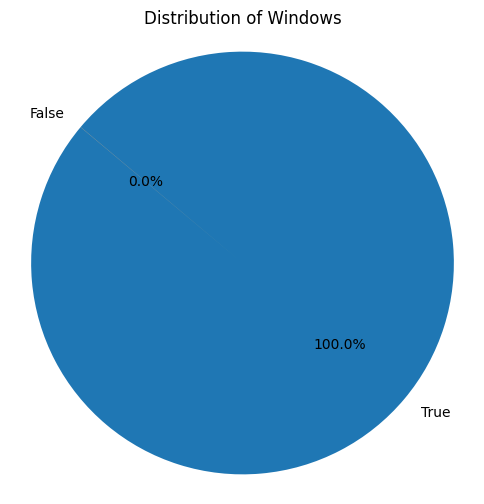

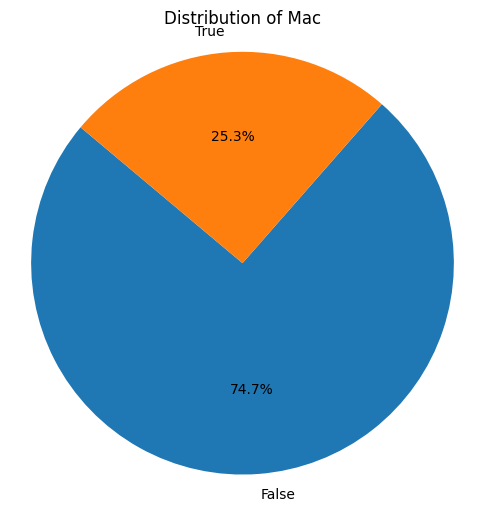

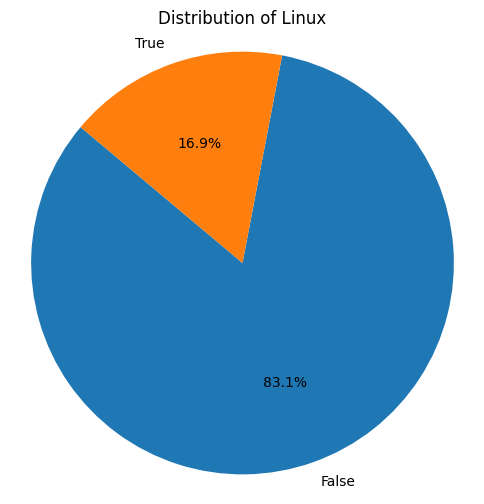

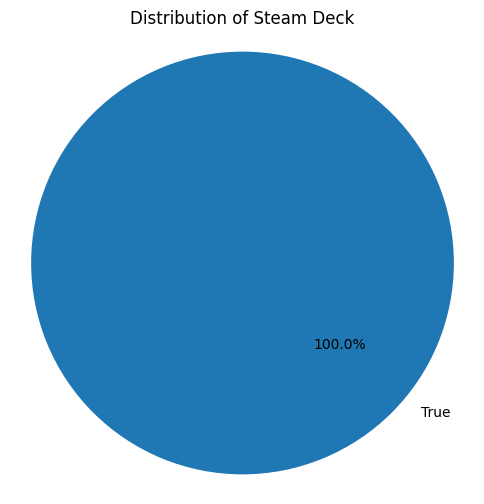

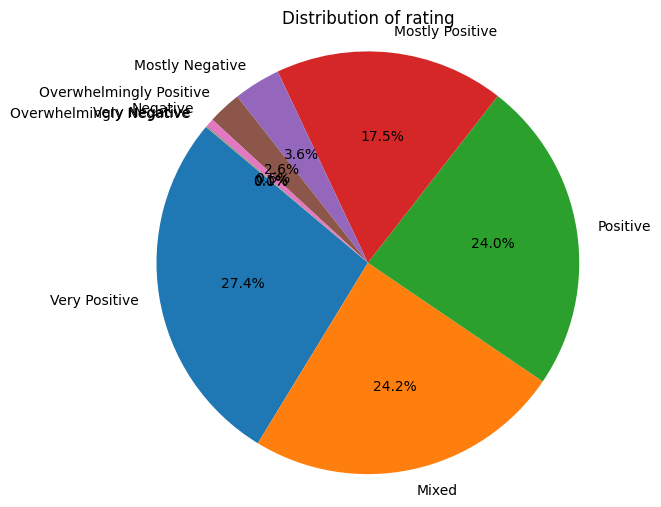

In [76]:
# Loop through and create pie chart for each
for col in df.columns:
    # Only proceed if unique values are not too many (for readability)
    if df[col].nunique() <= 10:
        value_counts = df[col].value_counts().head(10)
        plt.figure(figsize=(6, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Distribution of {col}")
        plt.axis('equal')
        plt.show()

Windows and steam deck are 100%, they should be dropped because they have no predictive power

In [77]:
# Count of free and paid games
free_paid_counts = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid').value_counts()

print(free_paid_counts)

Price
Paid    32616
Free     8554
Name: count, dtype: int64


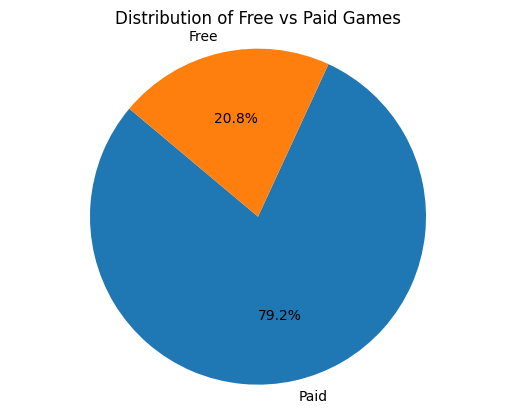

In [78]:
free_paid_counts.plot(kind='pie', autopct='%1.1f%%', labels=free_paid_counts.index, startangle=140)
plt.title('Distribution of Free vs Paid Games')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [79]:
df['Supported languages'].value_counts()

Supported languages
English                                                                                                                                                                                                18892
English,Russian                                                                                                                                                                                         1355
Simplified Chinese                                                                                                                                                                                       926
English,Simplified Chinese                                                                                                                                                                               687
English,Japanese                                                                                                                                                

In [81]:
# Show top 10 most frequent developers and the rest as "Other" in pie chart
top_developers = df['Developers'].value_counts().head(10)
other_count = df['Developers'].value_counts().sum() - top_developers.sum()
top_developers = top_developers.append(pd.Series({'Other': other_count}))
top_developers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Developers and Others')
plt.ylabel('')
plt.axis('equal')
plt.show()

AttributeError: 'Series' object has no attribute 'append'

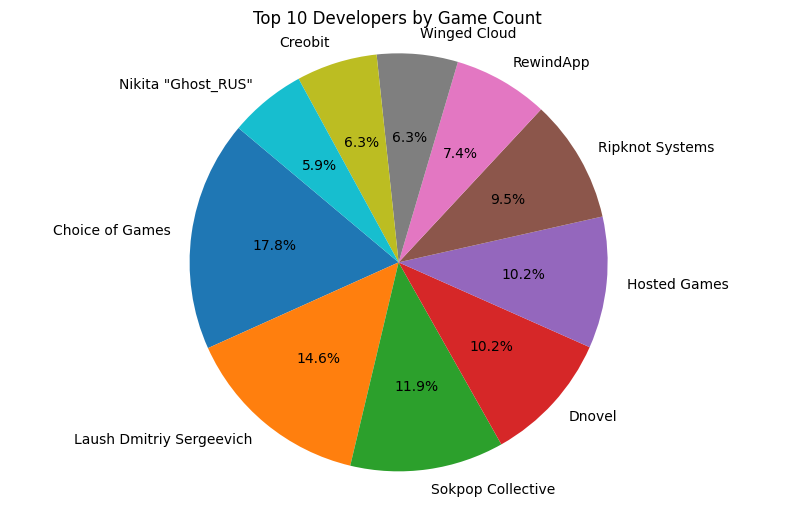

In [ ]:
# Show top 10 most frequent developers as pie chart
top_developers = df['Developers'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_developers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Developers by Game Count')
plt.ylabel('')
plt.axis('equal')
plt.show()

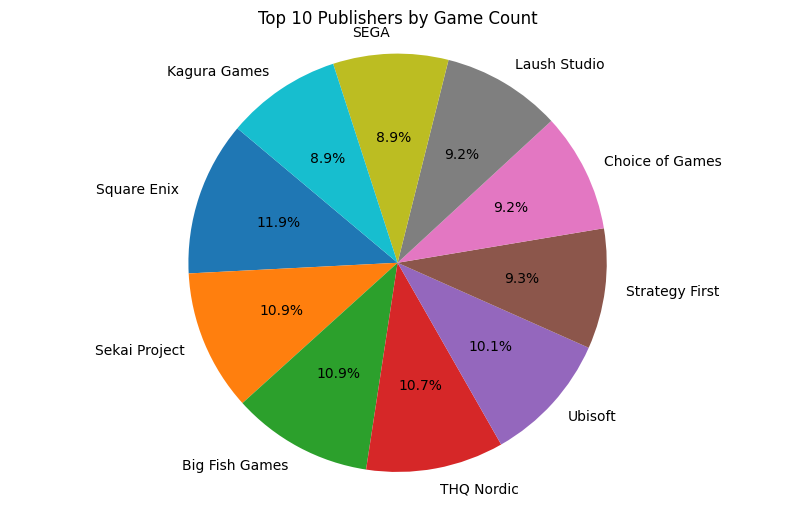

In [ ]:
# Show top 10 most frequent publishers using pie chart
top_publishers = df['Publishers'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Publishers by Game Count')
plt.ylabel('')
plt.axis('equal')
plt.show()

## 4. PREPROCESSING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

### 4a. Data Cleaning

#### Missing Values Handling

In [ ]:
# Drop rows
critical_cols = ['Tags', 'Supported languages', 'Categories', 'Detailed description', 'Genres', 'Short description']
df.dropna(subset=critical_cols, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          36944 non-null  object 
 1   Required age          36944 non-null  int64  
 2   Price                 36944 non-null  float64
 3   DLC count             36944 non-null  int64  
 4   Windows               36944 non-null  bool   
 5   Mac                   36944 non-null  bool   
 6   Linux                 36944 non-null  bool   
 7   Steam Deck            36944 non-null  bool   
 8   Supported languages   36944 non-null  object 
 9   Full audio languages  17449 non-null  object 
 10  Developers            36944 non-null  object 
 11  Publishers            36779 non-null  object 
 12  Movies                35268 non-null  object 
 13  rating                36944 non-null  object 
 14  Short description     36944 non-null  object 
 15  Genres             

In [ ]:
# Fill Publishers and Developers with unknown
df['Publishers'] = df['Publishers'].fillna('Unknown')
df['Developers'] = df['Developers'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          36944 non-null  object 
 1   Required age          36944 non-null  int64  
 2   Price                 36944 non-null  float64
 3   DLC count             36944 non-null  int64  
 4   Windows               36944 non-null  bool   
 5   Mac                   36944 non-null  bool   
 6   Linux                 36944 non-null  bool   
 7   Steam Deck            36944 non-null  bool   
 8   Supported languages   36944 non-null  object 
 9   Full audio languages  17449 non-null  object 
 10  Developers            36944 non-null  object 
 11  Publishers            36944 non-null  object 
 12  Movies                35268 non-null  object 
 13  rating                36944 non-null  object 
 14  Short description     36944 non-null  object 
 15  Genres             

#### Noise Handling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          36944 non-null  object 
 1   Required age          36944 non-null  int64  
 2   Price                 36944 non-null  float64
 3   DLC count             36944 non-null  int64  
 4   Windows               36944 non-null  bool   
 5   Mac                   36944 non-null  bool   
 6   Linux                 36944 non-null  bool   
 7   Steam Deck            36944 non-null  bool   
 8   Supported languages   36944 non-null  object 
 9   Full audio languages  17449 non-null  object 
 10  Developers            36944 non-null  object 
 11  Publishers            36944 non-null  object 
 12  Movies                35268 non-null  object 
 13  rating                36944 non-null  object 
 14  Short description     36944 non-null  object 
 15  Genres             

##### Bin required age into 3 categories

In [ ]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

df['Required age category'] = df['Required age'].apply(age_category)
df.drop(columns=['Required age'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           36944 non-null  object 
 1   Price                  36944 non-null  float64
 2   DLC count              36944 non-null  int64  
 3   Windows                36944 non-null  bool   
 4   Mac                    36944 non-null  bool   
 5   Linux                  36944 non-null  bool   
 6   Steam Deck             36944 non-null  bool   
 7   Supported languages    36944 non-null  object 
 8   Full audio languages   17449 non-null  object 
 9   Developers             36944 non-null  object 
 10  Publishers             36944 non-null  object 
 11  Movies                 35268 non-null  object 
 12  rating                 36944 non-null  object 
 13  Short description      36944 non-null  object 
 14  Genres                 36944 non-null  object 
 15  Ca

In [ ]:
df['Required age category'].value_counts()

Everyone    35877
Teen          919
Adult         148
Name: Required age category, dtype: int64

##### Remove outliers in price using IQR

In [ ]:
q1 = df['Price'].quantile(.25)
q3 = df['Price'].quantile(.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df['Price'] < lower) | (df['Price'] > upper)]
print(outliers.shape)
df = df[(df['Price'] >= lower) & (df['Price'] <= upper)]
print(df.info())

(1801, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   DLC count              35143 non-null  int64  
 3   Windows                35143 non-null  bool   
 4   Mac                    35143 non-null  bool   
 5   Linux                  35143 non-null  bool   
 6   Steam Deck             35143 non-null  bool   
 7   Supported languages    35143 non-null  object 
 8   Full audio languages   16215 non-null  object 
 9   Developers             35143 non-null  object 
 10  Publishers             35143 non-null  object 
 11  Movies                 33502 non-null  object 
 12  rating                 35143 non-null  object 
 13  Short description      35143 non-null  object 
 14  Genres                 35143 non-null  obje

### 4b. Feature Engineering

##### Binning DLC Count into Has DLC

In [ ]:
# Binning DLC count into Has DLC
df['Has DLC'] = np.where(df['DLC count'] > 0, 1, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   DLC count              35143 non-null  int64  
 3   Windows                35143 non-null  bool   
 4   Mac                    35143 non-null  bool   
 5   Linux                  35143 non-null  bool   
 6   Steam Deck             35143 non-null  bool   
 7   Supported languages    35143 non-null  object 
 8   Full audio languages   16215 non-null  object 
 9   Developers             35143 non-null  object 
 10  Publishers             35143 non-null  object 
 11  Movies                 33502 non-null  object 
 12  rating                 35143 non-null  object 
 13  Short description      35143 non-null  object 
 14  Genres                 35143 non-null  object 
 15  Ca

In [ ]:
df['Has DLC'].value_counts()

0    27428
1     7715
Name: Has DLC, dtype: int64

In [ ]:
# drop DLC Count
df.drop(columns=['DLC count'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   Windows                35143 non-null  bool   
 3   Mac                    35143 non-null  bool   
 4   Linux                  35143 non-null  bool   
 5   Steam Deck             35143 non-null  bool   
 6   Supported languages    35143 non-null  object 
 7   Full audio languages   16215 non-null  object 
 8   Developers             35143 non-null  object 
 9   Publishers             35143 non-null  object 
 10  Movies                 33502 non-null  object 
 11  rating                 35143 non-null  object 
 12  Short description      35143 non-null  object 
 13  Genres                 35143 non-null  object 
 14  Categories             35143 non-null  object 
 15  Ta

#### Make Has Full Audio and Has Movie feature

In [ ]:
# Convert Full audio languages and Movies into binary columns
df['Has full audio'] = df['Full audio languages'].notnull().map({True: 1, False: 0})
df['Has movie'] = df['Movies'].notnull().map({True: 1, False: 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   Windows                35143 non-null  bool   
 3   Mac                    35143 non-null  bool   
 4   Linux                  35143 non-null  bool   
 5   Steam Deck             35143 non-null  bool   
 6   Supported languages    35143 non-null  object 
 7   Full audio languages   16215 non-null  object 
 8   Developers             35143 non-null  object 
 9   Publishers             35143 non-null  object 
 10  Movies                 33502 non-null  object 
 11  rating                 35143 non-null  object 
 12  Short description      35143 non-null  object 
 13  Genres                 35143 non-null  object 
 14  Categories             35143 non-null  object 
 15  Ta

In [ ]:
# Drop columns: Movies, Full Audio support
df.drop(columns=['Movies', 'Full audio languages'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   Windows                35143 non-null  bool   
 3   Mac                    35143 non-null  bool   
 4   Linux                  35143 non-null  bool   
 5   Steam Deck             35143 non-null  bool   
 6   Supported languages    35143 non-null  object 
 7   Developers             35143 non-null  object 
 8   Publishers             35143 non-null  object 
 9   rating                 35143 non-null  object 
 10  Short description      35143 non-null  object 
 11  Genres                 35143 non-null  object 
 12  Categories             35143 non-null  object 
 13  Tags                   35143 non-null  object 
 14  Detailed description   35143 non-null  object 
 15  Re

#### Make Release Year and Game Age from Release date

In [ ]:
# Make Release Year and Game Age from Release date
from datetime import datetime

# Convert to datetime (handle errors gracefully)
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

# Drop rows where date conversion failed (optional or handle as missing)
df = df.dropna(subset=['Release date'])

# Extract release year and game age
df['Release Year'] = df['Release date'].dt.year
df['Game Age'] = datetime.now().year - df['Release Year']

# Drop original release date column
df = df.drop(columns=['Release date'])

#### Make Is Free feature from Price

In [ ]:
df['IsFree'] = df['Price'].apply(lambda x: 1 if x == 0 else 0)

#### Convert Developers and Publishers into top 10 and others

In [ ]:
# Map others to 'small_devs'
df['Developers'] = df['Developers'].apply(
    lambda x: x if x in top_developers else 'small_devs'
)

In [ ]:
# Map others to 'small_publishers'
df['Publishers'] = df['Publishers'].apply(
    lambda x: x if x in top_publishers else 'small_publishers'
)

### 4c. Encoding

#### Encode binary to 1 or 0

In [ ]:
# Convert Windows, Mac, Linux, Steam Deck to binary
df['Windows'] = df['Windows'].apply(lambda x: 1 if x else 0)
df['Mac'] = df['Mac'].apply(lambda x: 1 if x else 0)
df['Linux'] = df['Linux'].apply(lambda x: 1 if x else 0)
df['Steam Deck'] = df['Steam Deck'].apply(lambda x: 1 if x else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  35143 non-null  float64
 1   Windows                35143 non-null  int64  
 2   Mac                    35143 non-null  int64  
 3   Linux                  35143 non-null  int64  
 4   Steam Deck             35143 non-null  int64  
 5   Supported languages    35143 non-null  object 
 6   Developers             35143 non-null  object 
 7   Publishers             35143 non-null  object 
 8   rating                 35143 non-null  object 
 9   Short description      35143 non-null  object 
 10  Genres                 35143 non-null  object 
 11  Categories             35143 non-null  object 
 12  Tags                   35143 non-null  object 
 13  Detailed description   35143 non-null  object 
 14  Required age category  35143 non-null  object 
 15  Ha

#### Encode Developers and Publishers

In [ ]:
le_dev = LabelEncoder()
le_pub = LabelEncoder()

df['Developers'] = le_dev.fit_transform(df['Developers'])
df['Publishers'] = le_pub.fit_transform(df['Publishers'])

#### Encode Target label: rating

In [ ]:
le_rating = LabelEncoder()
df['rating'] = le_rating.fit_transform(df['rating'])

### 4d. Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  35143 non-null  float64
 1   Windows                35143 non-null  int64  
 2   Mac                    35143 non-null  int64  
 3   Linux                  35143 non-null  int64  
 4   Steam Deck             35143 non-null  int64  
 5   Supported languages    35143 non-null  object 
 6   Developers             35143 non-null  int32  
 7   Publishers             35143 non-null  int32  
 8   rating                 35143 non-null  int32  
 9   Short description      35143 non-null  object 
 10  Genres                 35143 non-null  object 
 11  Categories             35143 non-null  object 
 12  Tags                   35143 non-null  object 
 13  Detailed description   35143 non-null  object 
 14  Required age category  35143 non-null  object 
 15  Ha

In [ ]:
drop_cols = [
    'Windows', 'Steam Deck','Required age category',  
    'Supported languages',
    'Short description', 'Genres', 'Categories', 'Tags', 'Detailed description'
]
df = df.drop(columns=drop_cols)

## 5. MODELING

### 5a. Split data

In [ ]:
X = df.drop(columns=['rating'])
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
X_train

Price  Mac  Linux  Developers  Publishers  Has DLC  Has full audio  \
11793   1.99    0      0          10          10        0               1   
5563    9.99    0      0          10          10        1               0   
36018   0.99    0      0          10          10        0               0   
26876   9.99    0      0          10          10        0               1   
11046   4.99    0      0          10          10        0               0   
...      ...  ...    ...         ...         ...      ...             ...   
28608  11.99    0      0          10          10        0               0   
14526  12.99    1      0          10          10        0               1   
23713   2.99    1      0           8          10        0               0   
21144   5.99    0      0          10          10        0               1   
27143  19.99    0      0          10          10        0               0   

       Has movie  Release Year  Game Age  IsFree  
11793          1          2017         8       0  
5563           1          2015        10       0  
36018          1          2022         3       0  
26876          1          2023         2       0  
11046          1          2017         8       0  
...          ...           ...       ...     ...  
28608          1          2021         4       0  
14526          1          2020         5       0  
23713          1          2020         5       0  
21144          1          2019         6       0  
27143          1          2022         3       0  

[28114 rows x 11 columns]

### 5b. Model: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import time

# Simulate training progress bar
print("Training Logistic Regression...")
for _ in tqdm(range(1), desc="Fitting Logistic Regression"):
    logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
    logreg_model.fit(X_train, y_train)
    time.sleep(0.2)  # Optional: simulate time delay for better visual feedback

Training Logistic Regression...


Fitting Logistic Regression:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Fitting Logistic Regression: 100%|██████████| 1/1 [00:13<00:00, 13.34s/it]


In [ ]:
from sklearn.metrics import classification_report

# Predict and evaluate
y_pred_logreg = logreg_model.predict(X_test)
print("\n📊 Classification Report: Logistic Regression")
print(classification_report(y_test, y_pred_logreg, target_names=le_rating.classes_))


📊 Classification Report: Logistic Regression
                         precision    recall  f1-score   support

                  Mixed       0.36      0.43      0.39      1716
        Mostly Negative       0.00      0.00      0.00       260
        Mostly Positive       0.00      0.00      0.00      1247
               Negative       0.00      0.00      0.00        47
Overwhelmingly Negative       0.00      0.00      0.00         1
Overwhelmingly Positive       0.00      0.00      0.00       180
               Positive       0.39      0.57      0.46      1651
          Very Negative       0.00      0.00      0.00         6
          Very Positive       0.36      0.48      0.41      1921

               accuracy                           0.37      7029
              macro avg       0.12      0.16      0.14      7029
           weighted avg       0.28      0.37      0.32      7029



c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

### 5c. Model: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Simulate training progress bar
print("Training Decision Tree...")
for _ in tqdm(range(1), desc="Fitting Decision Tree"):
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train, y_train)
    time.sleep(0.2)


Training Decision Tree...


Fitting Decision Tree: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


In [ ]:
# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print("\n📊 Classification Report: Decision Tree")
print(classification_report(y_test, y_pred_tree, target_names=le_rating.classes_))



📊 Classification Report: Decision Tree
                         precision    recall  f1-score   support

                  Mixed       0.33      0.51      0.40      1716
        Mostly Negative       0.12      0.02      0.04       260
        Mostly Positive       0.20      0.07      0.11      1247
               Negative       0.00      0.00      0.00        47
Overwhelmingly Negative       0.00      0.00      0.00         1
Overwhelmingly Positive       0.00      0.00      0.00       180
               Positive       0.42      0.49      0.45      1651
          Very Negative       0.00      0.00      0.00         6
          Very Positive       0.39      0.39      0.39      1921

               accuracy                           0.36      7029
              macro avg       0.16      0.16      0.15      7029
           weighted avg       0.33      0.36      0.33      7029



c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

# ATTEMPT 2

### INSTALL DEPENDENCIES

In [82]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## 1. READ DATA

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [84]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 2. SELECT RELEVANT FEATURES

In [85]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements', 'Recommendations'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Steam Deck            41170 non-null  bool   
 8   Supported languages   41157 non-null  object 
 9   Full audio languages  19288 non-null  object 
 10  Developers            41096 non-null  object 
 11  Publishers            40949 non-null  object 
 12  Movies                39366 non-null  object 
 13  rating                41170 non-null  object 
 14  Positive ratio        41170 non-null  int64  
 15  Genres             

### 3. SPLIT DATA

In [86]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df_filtered.drop(columns=['Positive ratio'])
y = df_filtered['Positive ratio']

# Split the data into training and testing sets 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concat X_train and y_train for visualization
train = pd.concat([X_train, y_train], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32936 non-null  object 
 1   Price original        32936 non-null  float64
 2   DLC count             32936 non-null  int64  
 3   Required age          32936 non-null  int64  
 4   Windows               32936 non-null  bool   
 5   Mac                   32936 non-null  bool   
 6   Linux                 32936 non-null  bool   
 7   Steam Deck            32936 non-null  bool   
 8   Supported languages   32925 non-null  object 
 9   Full audio languages  15437 non-null  object 
 10  Developers            32870 non-null  object 
 11  Publishers            32747 non-null  object 
 12  Movies                31502 non-null  object 
 13  rating                32936 non-null  object 
 14  Genres                32901 non-null  object 
 15  Tags                

In [87]:
# Concat X_test and y_test for visualization
test = pd.concat([X_test, y_test], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8234 entries, 34621 to 3315
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          8234 non-null   object 
 1   Price original        8234 non-null   float64
 2   DLC count             8234 non-null   int64  
 3   Required age          8234 non-null   int64  
 4   Windows               8234 non-null   bool   
 5   Mac                   8234 non-null   bool   
 6   Linux                 8234 non-null   bool   
 7   Steam Deck            8234 non-null   bool   
 8   Supported languages   8232 non-null   object 
 9   Full audio languages  3851 non-null   object 
 10  Developers            8226 non-null   object 
 11  Publishers            8202 non-null   object 
 12  Movies                7864 non-null   object 
 13  rating                8234 non-null   object 
 14  Genres                8225 non-null   object 
 15  Tags                  

## 4. EDA

### 4a. Missing Value Detection

In [88]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / train.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

Missing Values  Percentage
Full audio languages           17499   53.130313
Tags                            3003    9.117683
Movies                          1434    4.353898
Categories                       427    1.296454
Publishers                       189    0.573840
Developers                        66    0.200389
Genres                            35    0.106267
Supported languages               11    0.033398

### 4b. Noise Detection

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32936 non-null  object 
 1   Price original        32936 non-null  float64
 2   DLC count             32936 non-null  int64  
 3   Required age          32936 non-null  int64  
 4   Windows               32936 non-null  bool   
 5   Mac                   32936 non-null  bool   
 6   Linux                 32936 non-null  bool   
 7   Steam Deck            32936 non-null  bool   
 8   Supported languages   32925 non-null  object 
 9   Full audio languages  15437 non-null  object 
 10  Developers            32870 non-null  object 
 11  Publishers            32747 non-null  object 
 12  Movies                31502 non-null  object 
 13  rating                32936 non-null  object 
 14  Genres                32901 non-null  object 
 15  Tags                

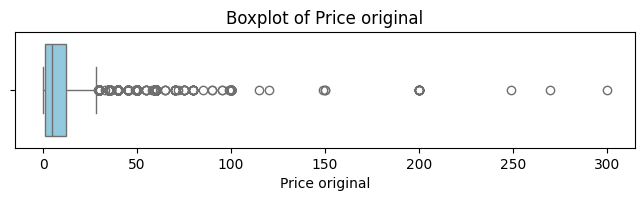

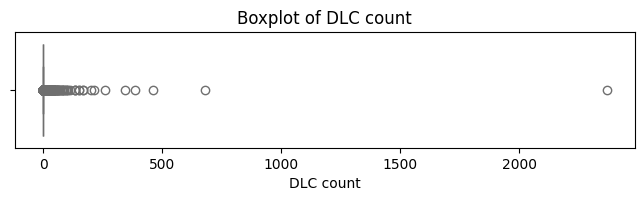

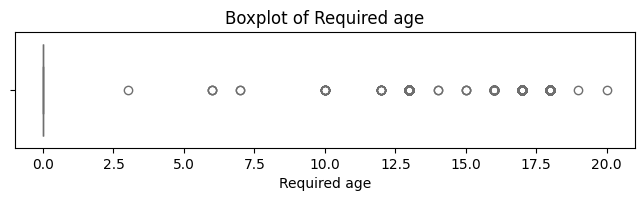

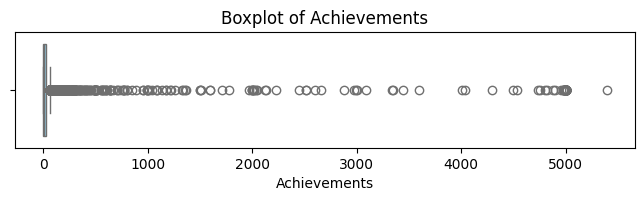

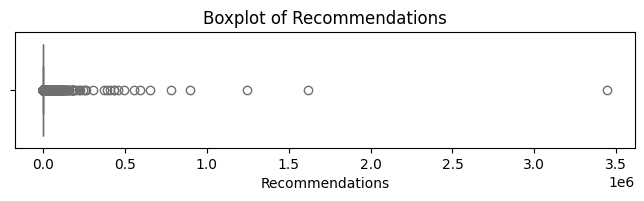

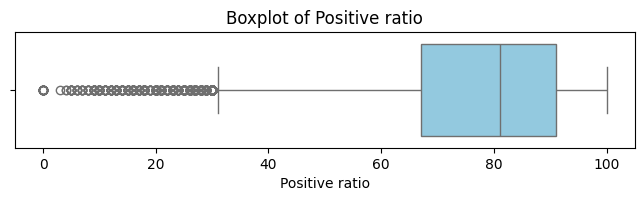

In [90]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=train[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [91]:
# Use IQR
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / train.shape[0]:.2f}%)")

Price original: 1604 outliers (4.87%)
DLC count: 7212 outliers (21.90%)
Required age: 881 outliers (2.67%)
Achievements: 1788 outliers (5.43%)
Recommendations: 5178 outliers (15.72%)
Positive ratio: 761 outliers (2.31%)


#### Required age analysis

In [92]:
train['Required age'].sort_values(ascending=True).unique()

array([ 0,  3,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

In [93]:
train['Required age'].value_counts()

Required age
0     32055
17      570
18      121
13      115
16       42
10       11
12        9
6         3
15        3
14        2
7         2
19        1
20        1
3         1
Name: count, dtype: int64

#### Price original analysis

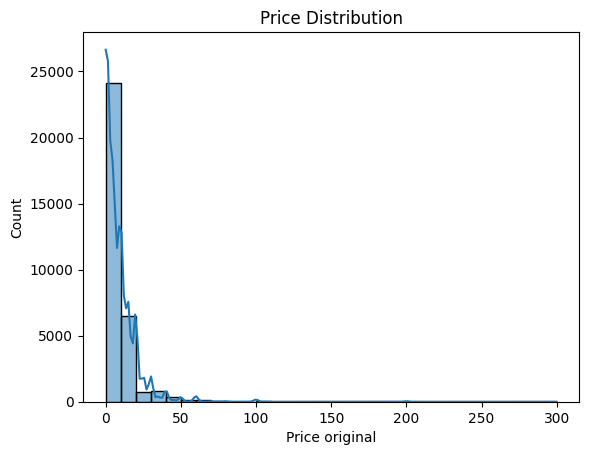

In [94]:
# Distribusi price dengan density plot
sns.histplot(train['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [95]:
print(train['Price original'].describe())

count    32936.000000
mean         8.677280
std         11.524861
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.900000
Name: Price original, dtype: float64


In [96]:
Q1 = train['Price original'].quantile(0.25)
Q3 = train['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train[(train['Price original'] < lower) | (train['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

Release date  Price original  DLC count  Required age  Windows    Mac  \
2078    2013-11-12          299.90          0             0     True  False   
9157    2018-10-10          269.99          0             0     True   True   
38421   2022-11-01          249.00          0             0     True  False   
39031   2022-09-19          199.99          0             0     True  False   
29896   2021-09-17          199.99          0             0     True  False   
40635   2023-02-21          199.99          0             0     True   True   
38589   2022-08-08          199.99          0             0     True  False   
40400   2023-01-27          199.99          0             0     True  False   
41079   2023-05-23          199.99          0             0     True   True   
33727   2021-09-09          199.99          0             0     True  False   
40077   2022-12-17          199.99          0             0     True   True   
40818   2023-03-23          199.99          0             0     True   True   
40812   2023-03-22          199.99          0             0     True   True   
37539   2022-05-21          199.99          0             0     True  False   
39030   2022-09-28          199.99          0             0     True  False   

       Linux  Steam Deck                                Supported languages  \
2078   False        True                                            English   
9157   False        True                                            English   
38421  False        True              English,French,German,Spanish - Spain   
39031  False        True                                            English   
29896  False        True                                    English,Russian   
40635   True        True  English,French,Italian,German,Spanish - Spain,...   
38589  False        True                                            English   
40400  False        True                                            English   
41079   True        True  English,French,Italian,German,Spanish - Spain,...   
33727  False        True              English,French,German,Spanish - Spain   
40077   True        True  English,French,Italian,German,Spanish - Spain,...   
40818   True        True  English,French,Italian,German,Spanish - Spain,...   
40812   True        True  English,French,Italian,German,Spanish - Spain,...   
37539  False        True                                            English   
39030  False        True                                            English   

      Full audio languages                               Developers  \
2078                   NaN                                 Aartform   
9157                   NaN                                   SideFX   
38421                  NaN                      MAGIX Software GmbH   
39031                  NaN         Atomic Fabrik,Cristian Manolachi   
29896      English,Russian  AssetFlipGames,ALFINA GAMERS,rocketship   
40635                  NaN                           Top-Down Games   
38589                  NaN         Atomic Fabrik,Cristian Manolachi   
40400                  NaN                                     Hede   
41079                  NaN                             PUZZLE Games   
33727                  NaN                      MAGIX Software GmbH   
40077                  NaN                           Top-Down Games   
40818                  NaN                           Top-Down Games   
40812                  NaN                                   Aztech   
37539                  NaN         Cristian Manolachi,Atomic Fabrik   
39030                  NaN         Atomic Fabrik,Cristian Manolachi   

                                              Publishers  \
2078                                            Aartform   
9157                                              SideFX   
38421                                MAGIX Software GmbH   
39031                   Atomic Fabrik,Cristian Manolachi   
29896  AssetFlipGames World Game Publis

#### DLC count analysis

In [97]:
# DLC Count
train['DLC count'].describe()

count    32936.000000
mean         0.797547
std         14.742599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2366.000000
Name: DLC count, dtype: float64

In [98]:
df['DLC count'].value_counts()

DLC count
0      32109
1       5687
2       1428
3        567
4        322
       ...  
75         1
153        1
168        1
71         1
90         1
Name: count, Length: 91, dtype: int64

### 4c. Text Feature Exploration

In [99]:
# Parse and store unique tag
def parse_tags(tags):
    if pd.isna(tags):
        return []
    return [tag.strip() for tag in tags.split(',')]

# Print unique tags single
unique_tags = set()
for tags in train['Tags'].dropna():
    parsed_tags = parse_tags(tags)
    unique_tags.update(parsed_tags)

# Convert unique_tags to a sorted list and print in table format
unique_tags_list = sorted(unique_tags)
print("Unique Tags:")
for tag in unique_tags_list:
    print(tag)


Unique Tags:
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
360 Video
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
8-bit Music
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base-Building
Baseball
Based On A Novel
Basketball
Battle Royale
Beat 'em up
Beautiful
Benchmark
Bikes
Blood
Board Game
Boss Rush
Bowling
Boxing
Building
Bullet Hell
Bullet Time
CRPG
Capitalism
Card Battler
Card Game
Cartoon
Cartoony
Casual
Cats
Character Action Game
Character Customization
Chess
Choices Matter
Choose Your Own Adventure
Cinematic
City Builder
Class-Based
Classic
Clicker
Co-op
Co-op Campaign
Coding
Cold War
Collectathon
Colony Sim
Colorful
Combat
Combat Racing
Comedy
Comic Book
Competitiv

In [100]:
# Unique genres
def parse_genres(genres):
    if pd.isna(genres):
        return []
    return [genre.strip() for genre in genres.split(',')]

# Print unique genres single
unique_genres = set()
for genres in train['Genres'].dropna():
    parsed_genres = parse_genres(genres)
    unique_genres.update(parsed_genres)

# Convert unique_genres to a sorted list and print in table format
unique_genres_list = sorted(unique_genres)
print("Unique Genres:")
for genre in unique_genres_list:
    print(genre)

Unique Genres:
Accounting
Action
Adventure
Animation & Modeling
Audio Production
Casual
Design & Illustration
Early Access
Education
Free to Play
Game Development
Gore
Indie
Massively Multiplayer
Nudity
Photo Editing
RPG
Racing
Sexual Content
Simulation
Software Training
Sports
Strategy
Utilities
Video Production
Violent
Web Publishing


In [101]:
# Unique categories
def parse_categories(categories):
    if pd.isna(categories):
        return []
    return [category.strip() for category in categories.split(',')]
# Print unique categories single
unique_categories = set()
for categories in train['Categories'].dropna():
    parsed_categories = parse_categories(categories)
    unique_categories.update(parsed_categories)
# Convert unique_categories to a sorted list and print in table format
unique_categories_list = sorted(unique_categories)
print("Unique Categories:")
for category in unique_categories_list:
    print(category)


Unique Categories:
Captions available
Co-op
Commentary available
Cross-Platform Multiplayer
Full controller support
HDR available
In-App Purchases
Includes Source SDK
Includes level editor
LAN Co-op
LAN PvP
MMO
Mods
Mods (require HL2)
Multi-player
Online Co-op
Online PvP
Partial Controller Support
PvP
Remote Play Together
Remote Play on Phone
Remote Play on TV
Remote Play on Tablet
Shared/Split Screen
Shared/Split Screen Co-op
Shared/Split Screen PvP
Single-player
Stats
Steam Achievements
Steam Cloud
Steam Leaderboards
Steam Trading Cards
Steam Turn Notifications
Steam Workshop
SteamVR Collectibles
Tracked Controller Support
VR Only
VR Support
VR Supported
Valve Anti-Cheat enabled


## 5. PREPROCESSING

### 5a. Missing Value Handling

In [102]:
# Drop rows
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
train.dropna(subset=col_to_clean, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32270 non-null  object 
 1   Price original        32270 non-null  float64
 2   DLC count             32270 non-null  int64  
 3   Required age          32270 non-null  int64  
 4   Windows               32270 non-null  bool   
 5   Mac                   32270 non-null  bool   
 6   Linux                 32270 non-null  bool   
 7   Steam Deck            32270 non-null  bool   
 8   Supported languages   32270 non-null  object 
 9   Full audio languages  15239 non-null  object 
 10  Developers            32270 non-null  object 
 11  Publishers            32270 non-null  object 
 12  Movies                30902 non-null  object 
 13  rating                32270 non-null  object 
 14  Genres                32270 non-null  object 
 15  Tags                

In [103]:
# Convert Full audio languages and Movies into 0 or 1 columns in train
train['Has full audio'] = train['Full audio languages'].notnull().map({True: 1, False: 0})
train.drop(columns=['Full audio languages'], inplace=True)

train['Has movie'] = train['Movies'].notnull().map({True: 1, False: 0})
train.drop(columns=['Movies'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         32270 non-null  object 
 1   Price original       32270 non-null  float64
 2   DLC count            32270 non-null  int64  
 3   Required age         32270 non-null  int64  
 4   Windows              32270 non-null  bool   
 5   Mac                  32270 non-null  bool   
 6   Linux                32270 non-null  bool   
 7   Steam Deck           32270 non-null  bool   
 8   Supported languages  32270 non-null  object 
 9   Developers           32270 non-null  object 
 10  Publishers           32270 non-null  object 
 11  rating               32270 non-null  object 
 12  Genres               32270 non-null  object 
 13  Tags                 29378 non-null  object 
 14  Categories           32270 non-null  object 
 15  Achievements         32270 non-null  

### 5b. Noise Handling

#### Required Age Handling

In [104]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

train['Required age category'] = train['Required age'].apply(age_category)
train.drop(columns=['Required age'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           32270 non-null  object 
 1   Price original         32270 non-null  float64
 2   DLC count              32270 non-null  int64  
 3   Windows                32270 non-null  bool   
 4   Mac                    32270 non-null  bool   
 5   Linux                  32270 non-null  bool   
 6   Steam Deck             32270 non-null  bool   
 7   Supported languages    32270 non-null  object 
 8   Developers             32270 non-null  object 
 9   Publishers             32270 non-null  object 
 10  rating                 32270 non-null  object 
 11  Genres                 32270 non-null  object 
 12  Tags                   29378 non-null  object 
 13  Categories             32270 non-null  object 
 14  Achievements           32270 non-null  int64  
 15  Rec

In [105]:
train['Required age category'].value_counts()

Required age category
Everyone    31425
Teen          725
Adult         120
Name: count, dtype: int64

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           32270 non-null  object 
 1   Price original         32270 non-null  float64
 2   DLC count              32270 non-null  int64  
 3   Windows                32270 non-null  bool   
 4   Mac                    32270 non-null  bool   
 5   Linux                  32270 non-null  bool   
 6   Steam Deck             32270 non-null  bool   
 7   Supported languages    32270 non-null  object 
 8   Developers             32270 non-null  object 
 9   Publishers             32270 non-null  object 
 10  rating                 32270 non-null  object 
 11  Genres                 32270 non-null  object 
 12  Tags                   29378 non-null  object 
 13  Categories             32270 non-null  object 
 14  Achievements           32270 non-null  int64  
 15  Rec

#### Non Games data removal

In [107]:
# Remove rows where Genres or Tags indicate software
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training']
mask = train['Genres'].str.contains('|'.join(software_keywords), na=False) | train['Tags'].str.contains('|'.join(software_keywords), na=False)
train_games_only = train[~mask].copy()
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31799 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           31799 non-null  object 
 1   Price original         31799 non-null  float64
 2   DLC count              31799 non-null  int64  
 3   Windows                31799 non-null  bool   
 4   Mac                    31799 non-null  bool   
 5   Linux                  31799 non-null  bool   
 6   Steam Deck             31799 non-null  bool   
 7   Supported languages    31799 non-null  object 
 8   Developers             31799 non-null  object 
 9   Publishers             31799 non-null  object 
 10  rating                 31799 non-null  object 
 11  Genres                 31799 non-null  object 
 12  Tags                   28916 non-null  object 
 13  Categories             31799 non-null  object 
 14  Achievements           31799 non-null  int64  
 15  Rec

#### Price original Handling

In [108]:
# Remove price original outliers using IQR
Q1 = train_games_only['Price original'].quantile(0.25)
Q3 = train_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_games_only[(train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound)]
print(f"Outliers count: {outliers.shape[0]}")
# Remove outliers from train_games_only
train_games_only = train_games_only[~((train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound))]
train_games_only.info()

Outliers count: 1469
<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           30330 non-null  object 
 1   Price original         30330 non-null  float64
 2   DLC count              30330 non-null  int64  
 3   Windows                30330 non-null  bool   
 4   Mac                    30330 non-null  bool   
 5   Linux                  30330 non-null  bool   
 6   Steam Deck             30330 non-null  bool   
 7   Supported languages    30330 non-null  object 
 8   Developers             30330 non-null  object 
 9   Publishers             30330 non-null  object 
 10  rating                 30330 non-null  object 
 11  Genres                 30330 non-null  object 
 12  Tags                   27562 non-null  object 
 13  Categories             30330 non-null  object 
 14  Achievements           30330 non-n

### 5c. Feature Engineering

#### Make Has DLC column

In [109]:
# Binning DLC count into Has DLC
train_games_only['Has DLC'] = np.where(train_games_only['DLC count'] > 0, 1, 0)
train_games_only.drop(columns=['DLC count'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           30330 non-null  object 
 1   Price original         30330 non-null  float64
 2   Windows                30330 non-null  bool   
 3   Mac                    30330 non-null  bool   
 4   Linux                  30330 non-null  bool   
 5   Steam Deck             30330 non-null  bool   
 6   Supported languages    30330 non-null  object 
 7   Developers             30330 non-null  object 
 8   Publishers             30330 non-null  object 
 9   rating                 30330 non-null  object 
 10  Genres                 30330 non-null  object 
 11  Tags                   27562 non-null  object 
 12  Categories             30330 non-null  object 
 13  Achievements           30330 non-null  int64  
 14  Recommendations        30330 non-null  int64  
 15  Pos

#### Make Release Year and Game Age columns

In [110]:
from datetime import datetime

# Convert to datetime (handle errors gracefully)
train_games_only['Release date'] = pd.to_datetime(train_games_only['Release date'], errors='coerce')

# Drop rows where date conversion failed (optional or handle as missing)
train_games_only = train_games_only.dropna(subset=['Release date'])

# Extract release year and game age
train_games_only['Release Year'] = train_games_only['Release date'].dt.year
train_games_only['Game Age'] = datetime.now().year - train_games_only['Release Year']

# Drop original release date column
train_games_only = train_games_only.drop(columns=['Release date'])


In [111]:
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  bool   
 2   Mac                    30330 non-null  bool   
 3   Linux                  30330 non-null  bool   
 4   Steam Deck             30330 non-null  bool   
 5   Supported languages    30330 non-null  object 
 6   Developers             30330 non-null  object 
 7   Publishers             30330 non-null  object 
 8   rating                 30330 non-null  object 
 9   Genres                 30330 non-null  object 
 10  Tags                   27562 non-null  object 
 11  Categories             30330 non-null  object 
 12  Achievements           30330 non-null  int64  
 13  Recommendations        30330 non-null  int64  
 14  Positive ratio         30330 non-null  int64  
 15  Has

#### Create languages_count from supported languages

In [112]:
# Create a new column languages_count with the count of languages in Supported languages
train_games_only['languages_count'] = train_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# drop Supported languages column
train_games_only.drop(columns=['Supported languages'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  bool   
 2   Mac                    30330 non-null  bool   
 3   Linux                  30330 non-null  bool   
 4   Steam Deck             30330 non-null  bool   
 5   Developers             30330 non-null  object 
 6   Publishers             30330 non-null  object 
 7   rating                 30330 non-null  object 
 8   Genres                 30330 non-null  object 
 9   Tags                   27562 non-null  object 
 10  Categories             30330 non-null  object 
 11  Achievements           30330 non-null  int64  
 12  Recommendations        30330 non-null  int64  
 13  Positive ratio         30330 non-null  int64  
 14  Has full audio         30330 non-null  int64  
 15  Has

### 5d. Encoding

#### Encode Platforms to binary

In [113]:
train_games_only['Mac'] = train_games_only['Mac'].astype(int)
train_games_only['Linux'] = train_games_only['Linux'].astype(int)
train_games_only['Windows'] = train_games_only['Windows'].astype(int)
train_games_only['Steam Deck'] = train_games_only['Steam Deck'].astype(int)

#### Filter 10k Developers and the rest into others

In [114]:
# Get top 10k developers by count, break ties with mean positive_ratio
dev_counts = train_games_only.groupby('Developers').agg(
    count=('Developers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

# Replace developers not in top 10k with 'Others'
train_games_only['Developers'] = train_games_only['Developers'].apply(lambda x: x if x in top_10k_developers else 'Others')

#### Filter 10k Publishers and the rest into others

In [115]:
pub_counts = train_games_only.groupby('Publishers').agg(
    count=('Publishers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()

# Replace publishers not in top 10k with 'Others'
train_games_only['Publishers'] = train_games_only['Publishers'].apply(lambda x: x if x in top_10k_publishers else 'Others')
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  int32  
 2   Mac                    30330 non-null  int32  
 3   Linux                  30330 non-null  int32  
 4   Steam Deck             30330 non-null  int32  
 5   Developers             30330 non-null  object 
 6   Publishers             30330 non-null  object 
 7   rating                 30330 non-null  object 
 8   Genres                 30330 non-null  object 
 9   Tags                   27562 non-null  object 
 10  Categories             30330 non-null  object 
 11  Achievements           30330 non-null  int64  
 12  Recommendations        30330 non-null  int64  
 13  Positive ratio         30330 non-null  int64  
 14  Has full audio         30330 non-null  int64  
 15  Has

#### Encode developer and publishers column

In [116]:
# Encode developer and publisher columns
from sklearn.preprocessing import LabelEncoder

developer_encoder = LabelEncoder()
train_games_only['Developers_code'] = developer_encoder.fit_transform(train_games_only['Developers'])

publisher_encoder = LabelEncoder()
train_games_only['Publishers_code'] = publisher_encoder.fit_transform(train_games_only['Publishers'])

# drop developers and publishers
train_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  int32  
 2   Mac                    30330 non-null  int32  
 3   Linux                  30330 non-null  int32  
 4   Steam Deck             30330 non-null  int32  
 5   rating                 30330 non-null  object 
 6   Genres                 30330 non-null  object 
 7   Tags                   27562 non-null  object 
 8   Categories             30330 non-null  object 
 9   Achievements           30330 non-null  int64  
 10  Recommendations        30330 non-null  int64  
 11  Positive ratio         30330 non-null  int64  
 12  Has full audio         30330 non-null  int64  
 13  Has movie              30330 non-null  int64  
 14  Required age category  30330 non-null  object 
 15  Has

#### Encode required age category

In [117]:
# Encode Required age category
required_age_encoder = LabelEncoder()
train_games_only['Required age category_code'] = required_age_encoder.fit_transform(train_games_only['Required age category'])
# drop Required age category
train_games_only.drop(columns=['Required age category'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              30330 non-null  float64
 1   Windows                     30330 non-null  int32  
 2   Mac                         30330 non-null  int32  
 3   Linux                       30330 non-null  int32  
 4   Steam Deck                  30330 non-null  int32  
 5   rating                      30330 non-null  object 
 6   Genres                      30330 non-null  object 
 7   Tags                        27562 non-null  object 
 8   Categories                  30330 non-null  object 
 9   Achievements                30330 non-null  int64  
 10  Recommendations             30330 non-null  int64  
 11  Positive ratio              30330 non-null  int64  
 12  Has full audio              30330 non-null  int64  
 13  Has movie                   3033

### 5e. Feature Selection

In [118]:
# Choose columns for model training
model_columns = [
    'Price original', 'Mac', 'Linux', 'Positive ratio',
    'Has full audio', 'Has movie', 'Has DLC', 'Release Year', 'Game Age',
    'languages_count', 'Developers_code', 'Publishers_code', 
]

# Select only the model columns
train_new = train_games_only[model_columns]
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price original   30330 non-null  float64
 1   Mac              30330 non-null  int32  
 2   Linux            30330 non-null  int32  
 3   Positive ratio   30330 non-null  int64  
 4   Has full audio   30330 non-null  int64  
 5   Has movie        30330 non-null  int64  
 6   Has DLC          30330 non-null  int32  
 7   Release Year     30330 non-null  int32  
 8   Game Age         30330 non-null  int32  
 9   languages_count  30330 non-null  int64  
 10  Developers_code  30330 non-null  int32  
 11  Publishers_code  30330 non-null  int32  
dtypes: float64(1), int32(7), int64(4)
memory usage: 2.2 MB


## 6. PREPARE TEST DATA

In [119]:
# --- MISSING VALUES HANDLING IN TEST SET ---
# Drop rows with missing values in critical columns (same as train)
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
test.dropna(subset=col_to_clean, inplace=True)

# Convert Full audio languages and Movies into 0 or 1 columns in test
test['Has full audio'] = test['Full audio languages'].notnull().map({True: 1, False: 0})
test.drop(columns=['Full audio languages'], inplace=True)

test['Has movie'] = test['Movies'].notnull().map({True: 1, False: 0})
test.drop(columns=['Movies'], inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8093 entries, 29537 to 3315
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         8093 non-null   object 
 1   Price original       8093 non-null   float64
 2   DLC count            8093 non-null   int64  
 3   Required age         8093 non-null   int64  
 4   Windows              8093 non-null   bool   
 5   Mac                  8093 non-null   bool   
 6   Linux                8093 non-null   bool   
 7   Steam Deck           8093 non-null   bool   
 8   Supported languages  8093 non-null   object 
 9   Developers           8093 non-null   object 
 10  Publishers           8093 non-null   object 
 11  rating               8093 non-null   object 
 12  Genres               8093 non-null   object 
 13  Tags                 7424 non-null   object 
 14  Categories           8093 non-null   object 
 15  Achievements         8093 non-null   in

In [120]:
# --- NOISE HANDLING IN TEST SET ---
# Remove rows where Genres or Tags indicate software (same keywords as train)
software_keywords = [
    'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing',
    'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training'
]
mask = test['Genres'].str.contains('|'.join(software_keywords), na=False) | test['Tags'].str.contains('|'.join(software_keywords), na=False)
test_games_only = test[~mask].copy()

# Remove price_original outliers using IQR (use test's own IQR)
Q1 = test_games_only['Price original'].quantile(0.25)
Q3 = test_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_games_only = test_games_only[(test_games_only['Price original'] >= lower_bound) & (test_games_only['Price original'] <= upper_bound)]

In [121]:
# --- FEATURE ENGINEERING IN TEST SET ---
from datetime import datetime

# Binning DLC count into Has DLC
test_games_only['Has DLC'] = np.where(test_games_only['DLC count'] > 0, 1, 0)
test_games_only.drop(columns=['DLC count'], inplace=True)

# Required age category
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

test_games_only['Required age category'] = test_games_only['Required age'].apply(age_category)
test_games_only.drop(columns=['Required age'], inplace=True)

# Release date to Release Year and Game Age
test_games_only['Release date'] = pd.to_datetime(test_games_only['Release date'], errors='coerce')
test_games_only = test_games_only.dropna(subset=['Release date'])
test_games_only['Release Year'] = test_games_only['Release date'].dt.year
test_games_only['Game Age'] = datetime.now().year - test_games_only['Release Year']
test_games_only = test_games_only.drop(columns=['Release date'])

# Languages count
test_games_only['languages_count'] = test_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
test_games_only.drop(columns=['Supported languages'], inplace=True)

In [122]:
# --- ENCODING IN TEST SET ---
# Convert platform columns to int
test_games_only['Mac'] = test_games_only['Mac'].astype(int)
test_games_only['Linux'] = test_games_only['Linux'].astype(int)
test_games_only['Windows'] = test_games_only['Windows'].astype(int)
test_games_only['Steam Deck'] = test_games_only['Steam Deck'].astype(int)

# Replace developers and publishers not in top 10k with 'Others'
test_games_only['Developers'] = test_games_only['Developers'].apply(lambda x: x if x in top_10k_developers else 'Others')
test_games_only['Publishers'] = test_games_only['Publishers'].apply(lambda x: x if x in top_10k_publishers else 'Others')

# Encode developer and publisher columns using encoders fitted on train
test_games_only['Developers_code'] = developer_encoder.transform(test_games_only['Developers'])
test_games_only['Publishers_code'] = publisher_encoder.transform(test_games_only['Publishers'])
test_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)

# Encode Required age category
test_games_only['Required age category_code'] = required_age_encoder.transform(test_games_only['Required age category'])
test_games_only.drop(columns=['Required age category'], inplace=True)

In [123]:
test_new = test_games_only[model_columns]

## 7. MODELING

In [124]:
# Define X_train as train_new drop positive ratio and y_train as positive ratio
X_train = train_new.drop(columns=['Positive ratio'])
y_train = train_new['Positive ratio']

In [125]:
# Define X_test as train_new drop positive ratio and y_test as positive ratio
X_test = test_new.drop(columns=['Positive ratio'])
y_test = test_new['Positive ratio']

### MODEL: DecisionTreeRegressor

In [126]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model on the training set
train_score = model.score(X_train, y_train)

# Print model R^2 score and rmse
print(f"Model R^2 score: {train_score:.4f}")

# Calculate RMSE
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"RMSE: {rmse:.4f}")

Model R^2 score: 0.8881
RMSE: 6.0510


In [127]:
score_test = model.score(X_test, y_test)

print(f"Test R^2 score: {score_test:.4f}")

# Calculate RMSE on test set
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {rmse_test:.4f}")

Test R^2 score: -0.6260
Test RMSE: 22.8835


In [128]:
def classify_score(score):
	if score >= 80:
		return 'positive'
	elif score >= 70:
		return 'positive'
	elif score >= 40:
		return 'mixed'
	elif score >= 20:
		return 'negative'
	else:
		return 'negative'

In [129]:
from sklearn.metrics import classification_report

y_test_labels = [classify_score(score) for score in y_test]

y_pred_labels = [classify_score(score) for score in y_test_pred]

# target_names = ['positive', 'mostly positive', 'mixed', 'mostly negative', 'negative']
target_names = ['positive', 'mixed', 'negative']
report = classification_report(y_test_labels, y_pred_labels, labels=target_names)

print("--- Classification Report ---")
print(report)

--- Classification Report ---
              precision    recall  f1-score   support

    positive       0.78      0.56      0.65      5565
       mixed       0.29      0.53      0.37      1870
    negative       0.10      0.10      0.10       310

    accuracy                           0.53      7745
   macro avg       0.39      0.40      0.38      7745
weighted avg       0.63      0.53      0.56      7745



# ATTEMPT 3

### DEPENDENCIES

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. READ DATA

In [131]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 2. SELECT COLUMNS

In [132]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements', 'Recommendations'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Steam Deck            41170 non-null  bool   
 8   Supported languages   41157 non-null  object 
 9   Full audio languages  19288 non-null  object 
 10  Developers            41096 non-null  object 
 11  Publishers            40949 non-null  object 
 12  Movies                39366 non-null  object 
 13  rating                41170 non-null  object 
 14  Positive ratio        41170 non-null  int64  
 15  Genres             

## 3. SPLIT DATA

In [133]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df_filtered.drop(columns=['Positive ratio'])
y = df_filtered['Positive ratio']

# Split the data into training and testing sets 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concat X_train and y_train for visualization
train = pd.concat([X_train, y_train], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32936 non-null  object 
 1   Price original        32936 non-null  float64
 2   DLC count             32936 non-null  int64  
 3   Required age          32936 non-null  int64  
 4   Windows               32936 non-null  bool   
 5   Mac                   32936 non-null  bool   
 6   Linux                 32936 non-null  bool   
 7   Steam Deck            32936 non-null  bool   
 8   Supported languages   32925 non-null  object 
 9   Full audio languages  15437 non-null  object 
 10  Developers            32870 non-null  object 
 11  Publishers            32747 non-null  object 
 12  Movies                31502 non-null  object 
 13  rating                32936 non-null  object 
 14  Genres                32901 non-null  object 
 15  Tags                

In [134]:
# Concat X_test and y_test for visualization
test = pd.concat([X_test, y_test], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8234 entries, 34621 to 3315
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          8234 non-null   object 
 1   Price original        8234 non-null   float64
 2   DLC count             8234 non-null   int64  
 3   Required age          8234 non-null   int64  
 4   Windows               8234 non-null   bool   
 5   Mac                   8234 non-null   bool   
 6   Linux                 8234 non-null   bool   
 7   Steam Deck            8234 non-null   bool   
 8   Supported languages   8232 non-null   object 
 9   Full audio languages  3851 non-null   object 
 10  Developers            8226 non-null   object 
 11  Publishers            8202 non-null   object 
 12  Movies                7864 non-null   object 
 13  rating                8234 non-null   object 
 14  Genres                8225 non-null   object 
 15  Tags                  

## 4. EDA

In [135]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / train.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

Missing Values  Percentage
Full audio languages           17499   53.130313
Tags                            3003    9.117683
Movies                          1434    4.353898
Categories                       427    1.296454
Publishers                       189    0.573840
Developers                        66    0.200389
Genres                            35    0.106267
Supported languages               11    0.033398

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32936 non-null  object 
 1   Price original        32936 non-null  float64
 2   DLC count             32936 non-null  int64  
 3   Required age          32936 non-null  int64  
 4   Windows               32936 non-null  bool   
 5   Mac                   32936 non-null  bool   
 6   Linux                 32936 non-null  bool   
 7   Steam Deck            32936 non-null  bool   
 8   Supported languages   32925 non-null  object 
 9   Full audio languages  15437 non-null  object 
 10  Developers            32870 non-null  object 
 11  Publishers            32747 non-null  object 
 12  Movies                31502 non-null  object 
 13  rating                32936 non-null  object 
 14  Genres                32901 non-null  object 
 15  Tags                

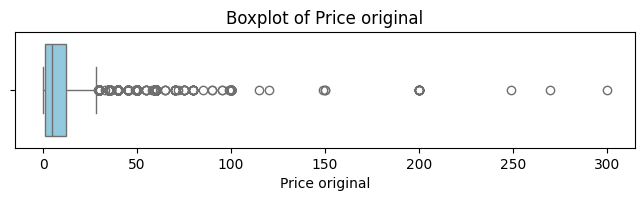

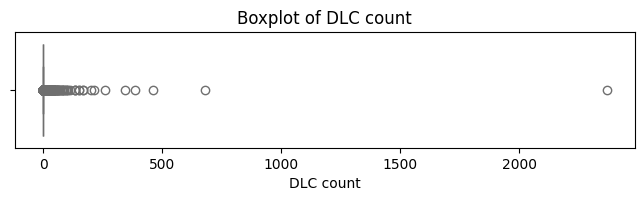

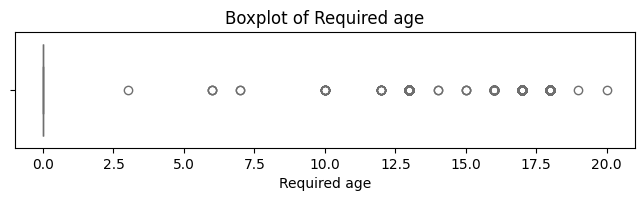

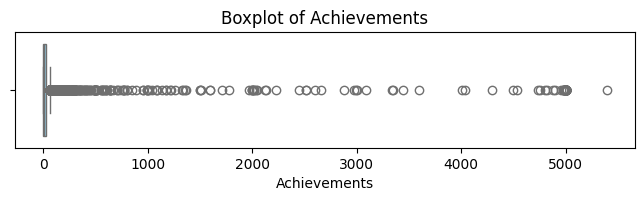

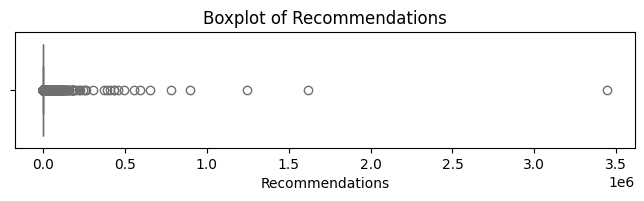

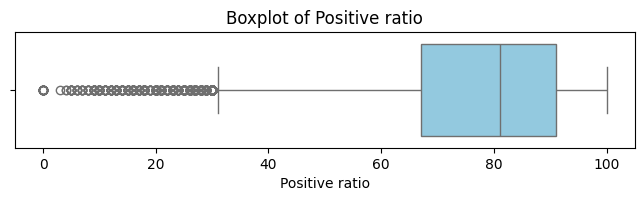

In [137]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=train[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [138]:
# Use IQR
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / train.shape[0]:.2f}%)")

Price original: 1604 outliers (4.87%)
DLC count: 7212 outliers (21.90%)
Required age: 881 outliers (2.67%)
Achievements: 1788 outliers (5.43%)
Recommendations: 5178 outliers (15.72%)
Positive ratio: 761 outliers (2.31%)


#### EXPLORATION/ANALYSIS

In [139]:
train['Required age'].sort_values(ascending=True).unique()

array([ 0,  3,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

In [140]:
train['Required age'].value_counts()

Required age
0     32055
17      570
18      121
13      115
16       42
10       11
12        9
6         3
15        3
14        2
7         2
19        1
20        1
3         1
Name: count, dtype: int64

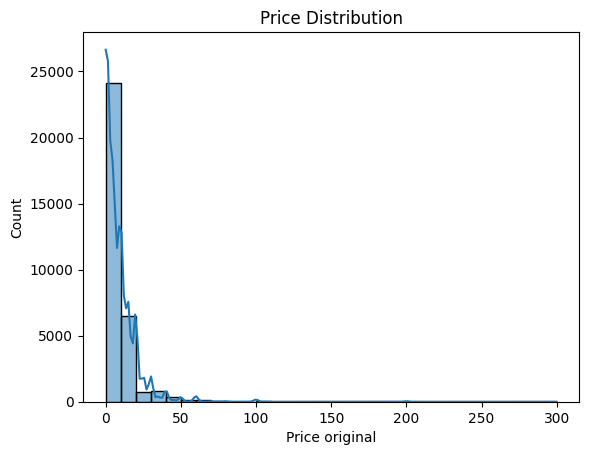

In [141]:
# Distribusi price dengan density plot
sns.histplot(train['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [142]:
print(train['Price original'].describe())

count    32936.000000
mean         8.677280
std         11.524861
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.900000
Name: Price original, dtype: float64


In [143]:
Q1 = train['Price original'].quantile(0.25)
Q3 = train['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train[(train['Price original'] < lower) | (train['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

Release date  Price original  DLC count  Required age  Windows    Mac  \
2078    2013-11-12          299.90          0             0     True  False   
9157    2018-10-10          269.99          0             0     True   True   
38421   2022-11-01          249.00          0             0     True  False   
39031   2022-09-19          199.99          0             0     True  False   
29896   2021-09-17          199.99          0             0     True  False   
40635   2023-02-21          199.99          0             0     True   True   
38589   2022-08-08          199.99          0             0     True  False   
40400   2023-01-27          199.99          0             0     True  False   
41079   2023-05-23          199.99          0             0     True   True   
33727   2021-09-09          199.99          0             0     True  False   
40077   2022-12-17          199.99          0             0     True   True   
40818   2023-03-23          199.99          0             0     True   True   
40812   2023-03-22          199.99          0             0     True   True   
37539   2022-05-21          199.99          0             0     True  False   
39030   2022-09-28          199.99          0             0     True  False   

       Linux  Steam Deck                                Supported languages  \
2078   False        True                                            English   
9157   False        True                                            English   
38421  False        True              English,French,German,Spanish - Spain   
39031  False        True                                            English   
29896  False        True                                    English,Russian   
40635   True        True  English,French,Italian,German,Spanish - Spain,...   
38589  False        True                                            English   
40400  False        True                                            English   
41079   True        True  English,French,Italian,German,Spanish - Spain,...   
33727  False        True              English,French,German,Spanish - Spain   
40077   True        True  English,French,Italian,German,Spanish - Spain,...   
40818   True        True  English,French,Italian,German,Spanish - Spain,...   
40812   True        True  English,French,Italian,German,Spanish - Spain,...   
37539  False        True                                            English   
39030  False        True                                            English   

      Full audio languages                               Developers  \
2078                   NaN                                 Aartform   
9157                   NaN                                   SideFX   
38421                  NaN                      MAGIX Software GmbH   
39031                  NaN         Atomic Fabrik,Cristian Manolachi   
29896      English,Russian  AssetFlipGames,ALFINA GAMERS,rocketship   
40635                  NaN                           Top-Down Games   
38589                  NaN         Atomic Fabrik,Cristian Manolachi   
40400                  NaN                                     Hede   
41079                  NaN                             PUZZLE Games   
33727                  NaN                      MAGIX Software GmbH   
40077                  NaN                           Top-Down Games   
40818                  NaN                           Top-Down Games   
40812                  NaN                                   Aztech   
37539                  NaN         Cristian Manolachi,Atomic Fabrik   
39030                  NaN         Atomic Fabrik,Cristian Manolachi   

                                              Publishers  \
2078                                            Aartform   
9157                                              SideFX   
38421                                MAGIX Software GmbH   
39031                   Atomic Fabrik,Cristian Manolachi   
29896  AssetFlipGames World Game Publis

In [144]:
# Parse and store unique tag
def parse_tags(tags):
    if pd.isna(tags):
        return []
    return [tag.strip() for tag in tags.split(',')]

# Print unique tags single
unique_tags = set()
for tags in train['Tags'].dropna():
    parsed_tags = parse_tags(tags)
    unique_tags.update(parsed_tags)

# Convert unique_tags to a sorted list and print in table format
unique_tags_list = sorted(unique_tags)
print("Unique Tags:")
for tag in unique_tags_list:
    print(tag)


Unique Tags:
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
360 Video
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
8-bit Music
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base-Building
Baseball
Based On A Novel
Basketball
Battle Royale
Beat 'em up
Beautiful
Benchmark
Bikes
Blood
Board Game
Boss Rush
Bowling
Boxing
Building
Bullet Hell
Bullet Time
CRPG
Capitalism
Card Battler
Card Game
Cartoon
Cartoony
Casual
Cats
Character Action Game
Character Customization
Chess
Choices Matter
Choose Your Own Adventure
Cinematic
City Builder
Class-Based
Classic
Clicker
Co-op
Co-op Campaign
Coding
Cold War
Collectathon
Colony Sim
Colorful
Combat
Combat Racing
Comedy
Comic Book
Competitiv

In [145]:
# Unique genres
def parse_genres(genres):
    if pd.isna(genres):
        return []
    return [genre.strip() for genre in genres.split(',')]

# Print unique genres single
unique_genres = set()
for genres in train['Genres'].dropna():
    parsed_genres = parse_genres(genres)
    unique_genres.update(parsed_genres)

# Convert unique_genres to a sorted list and print in table format
unique_genres_list = sorted(unique_genres)
print("Unique Genres:")
for genre in unique_genres_list:
    print(genre)

Unique Genres:
Accounting
Action
Adventure
Animation & Modeling
Audio Production
Casual
Design & Illustration
Early Access
Education
Free to Play
Game Development
Gore
Indie
Massively Multiplayer
Nudity
Photo Editing
RPG
Racing
Sexual Content
Simulation
Software Training
Sports
Strategy
Utilities
Video Production
Violent
Web Publishing


In [146]:
# Unique categories
def parse_categories(categories):
    if pd.isna(categories):
        return []
    return [category.strip() for category in categories.split(',')]
# Print unique categories single
unique_categories = set()
for categories in train['Categories'].dropna():
    parsed_categories = parse_categories(categories)
    unique_categories.update(parsed_categories)
# Convert unique_categories to a sorted list and print in table format
unique_categories_list = sorted(unique_categories)
print("Unique Categories:")
for category in unique_categories_list:
    print(category)


Unique Categories:
Captions available
Co-op
Commentary available
Cross-Platform Multiplayer
Full controller support
HDR available
In-App Purchases
Includes Source SDK
Includes level editor
LAN Co-op
LAN PvP
MMO
Mods
Mods (require HL2)
Multi-player
Online Co-op
Online PvP
Partial Controller Support
PvP
Remote Play Together
Remote Play on Phone
Remote Play on TV
Remote Play on Tablet
Shared/Split Screen
Shared/Split Screen Co-op
Shared/Split Screen PvP
Single-player
Stats
Steam Achievements
Steam Cloud
Steam Leaderboards
Steam Trading Cards
Steam Turn Notifications
Steam Workshop
SteamVR Collectibles
Tracked Controller Support
VR Only
VR Support
VR Supported
Valve Anti-Cheat enabled


In [147]:
# DLC Count
train['DLC count'].describe()

count    32936.000000
mean         0.797547
std         14.742599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2366.000000
Name: DLC count, dtype: float64

In [148]:
df['DLC count'].value_counts()

DLC count
0      32109
1       5687
2       1428
3        567
4        322
       ...  
75         1
153        1
168        1
71         1
90         1
Name: count, Length: 91, dtype: int64

## 5. PREPROCESSING

### 5a. Missing Values Handling

In [149]:
# Drop rows
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
train.dropna(subset=col_to_clean, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32270 non-null  object 
 1   Price original        32270 non-null  float64
 2   DLC count             32270 non-null  int64  
 3   Required age          32270 non-null  int64  
 4   Windows               32270 non-null  bool   
 5   Mac                   32270 non-null  bool   
 6   Linux                 32270 non-null  bool   
 7   Steam Deck            32270 non-null  bool   
 8   Supported languages   32270 non-null  object 
 9   Full audio languages  15239 non-null  object 
 10  Developers            32270 non-null  object 
 11  Publishers            32270 non-null  object 
 12  Movies                30902 non-null  object 
 13  rating                32270 non-null  object 
 14  Genres                32270 non-null  object 
 15  Tags                

In [150]:
# Convert Full audio languages and Movies into 0 or 1 columns in train
train['Has full audio'] = train['Full audio languages'].notnull().map({True: 1, False: 0})
train.drop(columns=['Full audio languages'], inplace=True)

train['Has movie'] = train['Movies'].notnull().map({True: 1, False: 0})
train.drop(columns=['Movies'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         32270 non-null  object 
 1   Price original       32270 non-null  float64
 2   DLC count            32270 non-null  int64  
 3   Required age         32270 non-null  int64  
 4   Windows              32270 non-null  bool   
 5   Mac                  32270 non-null  bool   
 6   Linux                32270 non-null  bool   
 7   Steam Deck           32270 non-null  bool   
 8   Supported languages  32270 non-null  object 
 9   Developers           32270 non-null  object 
 10  Publishers           32270 non-null  object 
 11  rating               32270 non-null  object 
 12  Genres               32270 non-null  object 
 13  Tags                 29378 non-null  object 
 14  Categories           32270 non-null  object 
 15  Achievements         32270 non-null  

### 5b. Noise Handling

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         32270 non-null  object 
 1   Price original       32270 non-null  float64
 2   DLC count            32270 non-null  int64  
 3   Required age         32270 non-null  int64  
 4   Windows              32270 non-null  bool   
 5   Mac                  32270 non-null  bool   
 6   Linux                32270 non-null  bool   
 7   Steam Deck           32270 non-null  bool   
 8   Supported languages  32270 non-null  object 
 9   Developers           32270 non-null  object 
 10  Publishers           32270 non-null  object 
 11  rating               32270 non-null  object 
 12  Genres               32270 non-null  object 
 13  Tags                 29378 non-null  object 
 14  Categories           32270 non-null  object 
 15  Achievements         32270 non-null  

In [152]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

train['Required age category'] = train['Required age'].apply(age_category)
train.drop(columns=['Required age'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           32270 non-null  object 
 1   Price original         32270 non-null  float64
 2   DLC count              32270 non-null  int64  
 3   Windows                32270 non-null  bool   
 4   Mac                    32270 non-null  bool   
 5   Linux                  32270 non-null  bool   
 6   Steam Deck             32270 non-null  bool   
 7   Supported languages    32270 non-null  object 
 8   Developers             32270 non-null  object 
 9   Publishers             32270 non-null  object 
 10  rating                 32270 non-null  object 
 11  Genres                 32270 non-null  object 
 12  Tags                   29378 non-null  object 
 13  Categories             32270 non-null  object 
 14  Achievements           32270 non-null  int64  
 15  Rec

In [153]:
train['Required age category'].value_counts()

Required age category
Everyone    31425
Teen          725
Adult         120
Name: count, dtype: int64

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           32270 non-null  object 
 1   Price original         32270 non-null  float64
 2   DLC count              32270 non-null  int64  
 3   Windows                32270 non-null  bool   
 4   Mac                    32270 non-null  bool   
 5   Linux                  32270 non-null  bool   
 6   Steam Deck             32270 non-null  bool   
 7   Supported languages    32270 non-null  object 
 8   Developers             32270 non-null  object 
 9   Publishers             32270 non-null  object 
 10  rating                 32270 non-null  object 
 11  Genres                 32270 non-null  object 
 12  Tags                   29378 non-null  object 
 13  Categories             32270 non-null  object 
 14  Achievements           32270 non-null  int64  
 15  Rec

In [155]:
# Remove rows where Genres or Tags indicate software
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training']
mask = train['Genres'].str.contains('|'.join(software_keywords), na=False) | train['Tags'].str.contains('|'.join(software_keywords), na=False)
train_games_only = train[~mask].copy()
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31799 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           31799 non-null  object 
 1   Price original         31799 non-null  float64
 2   DLC count              31799 non-null  int64  
 3   Windows                31799 non-null  bool   
 4   Mac                    31799 non-null  bool   
 5   Linux                  31799 non-null  bool   
 6   Steam Deck             31799 non-null  bool   
 7   Supported languages    31799 non-null  object 
 8   Developers             31799 non-null  object 
 9   Publishers             31799 non-null  object 
 10  rating                 31799 non-null  object 
 11  Genres                 31799 non-null  object 
 12  Tags                   28916 non-null  object 
 13  Categories             31799 non-null  object 
 14  Achievements           31799 non-null  int64  
 15  Rec

In [156]:
# Remove price original outliers using IQR
Q1 = train_games_only['Price original'].quantile(0.25)
Q3 = train_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_games_only[(train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound)]
print(f"Outliers count: {outliers.shape[0]}")
# Remove outliers from train_games_only
train_games_only = train_games_only[~((train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound))]
train_games_only.info()

Outliers count: 1469
<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           30330 non-null  object 
 1   Price original         30330 non-null  float64
 2   DLC count              30330 non-null  int64  
 3   Windows                30330 non-null  bool   
 4   Mac                    30330 non-null  bool   
 5   Linux                  30330 non-null  bool   
 6   Steam Deck             30330 non-null  bool   
 7   Supported languages    30330 non-null  object 
 8   Developers             30330 non-null  object 
 9   Publishers             30330 non-null  object 
 10  rating                 30330 non-null  object 
 11  Genres                 30330 non-null  object 
 12  Tags                   27562 non-null  object 
 13  Categories             30330 non-null  object 
 14  Achievements           30330 non-n

In [157]:
# Binning DLC count into Has DLC
train_games_only['Has DLC'] = np.where(train_games_only['DLC count'] > 0, 1, 0)
train_games_only.drop(columns=['DLC count'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           30330 non-null  object 
 1   Price original         30330 non-null  float64
 2   Windows                30330 non-null  bool   
 3   Mac                    30330 non-null  bool   
 4   Linux                  30330 non-null  bool   
 5   Steam Deck             30330 non-null  bool   
 6   Supported languages    30330 non-null  object 
 7   Developers             30330 non-null  object 
 8   Publishers             30330 non-null  object 
 9   rating                 30330 non-null  object 
 10  Genres                 30330 non-null  object 
 11  Tags                   27562 non-null  object 
 12  Categories             30330 non-null  object 
 13  Achievements           30330 non-null  int64  
 14  Recommendations        30330 non-null  int64  
 15  Pos

### 5c. Feature Engineering

In [158]:
from datetime import datetime

# Convert to datetime (handle errors gracefully)
train_games_only['Release date'] = pd.to_datetime(train_games_only['Release date'], errors='coerce')

# Drop rows where date conversion failed (optional or handle as missing)
train_games_only = train_games_only.dropna(subset=['Release date'])

# Extract release year and game age
train_games_only['Release Year'] = train_games_only['Release date'].dt.year
train_games_only['Game Age'] = datetime.now().year - train_games_only['Release Year']

# Drop original release date column
train_games_only = train_games_only.drop(columns=['Release date'])


In [159]:
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  bool   
 2   Mac                    30330 non-null  bool   
 3   Linux                  30330 non-null  bool   
 4   Steam Deck             30330 non-null  bool   
 5   Supported languages    30330 non-null  object 
 6   Developers             30330 non-null  object 
 7   Publishers             30330 non-null  object 
 8   rating                 30330 non-null  object 
 9   Genres                 30330 non-null  object 
 10  Tags                   27562 non-null  object 
 11  Categories             30330 non-null  object 
 12  Achievements           30330 non-null  int64  
 13  Recommendations        30330 non-null  int64  
 14  Positive ratio         30330 non-null  int64  
 15  Has

In [160]:
# Create a new column languages_count with the count of languages in Supported languages
train_games_only['languages_count'] = train_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# drop Supported languages column
train_games_only.drop(columns=['Supported languages'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  bool   
 2   Mac                    30330 non-null  bool   
 3   Linux                  30330 non-null  bool   
 4   Steam Deck             30330 non-null  bool   
 5   Developers             30330 non-null  object 
 6   Publishers             30330 non-null  object 
 7   rating                 30330 non-null  object 
 8   Genres                 30330 non-null  object 
 9   Tags                   27562 non-null  object 
 10  Categories             30330 non-null  object 
 11  Achievements           30330 non-null  int64  
 12  Recommendations        30330 non-null  int64  
 13  Positive ratio         30330 non-null  int64  
 14  Has full audio         30330 non-null  int64  
 15  Has

### 5d. Encoding

In [161]:
train_games_only['Mac'] = train_games_only['Mac'].astype(int)
train_games_only['Linux'] = train_games_only['Linux'].astype(int)
train_games_only['Windows'] = train_games_only['Windows'].astype(int)
train_games_only['Steam Deck'] = train_games_only['Steam Deck'].astype(int)

In [162]:
# Get top 10k developers by count, break ties with mean positive_ratio
dev_counts = train_games_only.groupby('Developers').agg(
    count=('Developers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

# Replace developers not in top 10k with 'Others'
train_games_only['Developers'] = train_games_only['Developers'].apply(lambda x: x if x in top_10k_developers else 'Others')

# Repeat for publishers
pub_counts = train_games_only.groupby('Publishers').agg(
    count=('Publishers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()

# Replace publishers not in top 10k with 'Others'
train_games_only['Publishers'] = train_games_only['Publishers'].apply(lambda x: x if x in top_10k_publishers else 'Others')
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  int32  
 2   Mac                    30330 non-null  int32  
 3   Linux                  30330 non-null  int32  
 4   Steam Deck             30330 non-null  int32  
 5   Developers             30330 non-null  object 
 6   Publishers             30330 non-null  object 
 7   rating                 30330 non-null  object 
 8   Genres                 30330 non-null  object 
 9   Tags                   27562 non-null  object 
 10  Categories             30330 non-null  object 
 11  Achievements           30330 non-null  int64  
 12  Recommendations        30330 non-null  int64  
 13  Positive ratio         30330 non-null  int64  
 14  Has full audio         30330 non-null  int64  
 15  Has

In [163]:
# Encode developer and publisher columns
from sklearn.preprocessing import LabelEncoder

developer_encoder = LabelEncoder()
train_games_only['Developers_code'] = developer_encoder.fit_transform(train_games_only['Developers'])

publisher_encoder = LabelEncoder()
train_games_only['Publishers_code'] = publisher_encoder.fit_transform(train_games_only['Publishers'])

# drop developers and publishers
train_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  int32  
 2   Mac                    30330 non-null  int32  
 3   Linux                  30330 non-null  int32  
 4   Steam Deck             30330 non-null  int32  
 5   rating                 30330 non-null  object 
 6   Genres                 30330 non-null  object 
 7   Tags                   27562 non-null  object 
 8   Categories             30330 non-null  object 
 9   Achievements           30330 non-null  int64  
 10  Recommendations        30330 non-null  int64  
 11  Positive ratio         30330 non-null  int64  
 12  Has full audio         30330 non-null  int64  
 13  Has movie              30330 non-null  int64  
 14  Required age category  30330 non-null  object 
 15  Has

In [164]:
# Encode Required age category
required_age_encoder = LabelEncoder()
train_games_only['Required age category_code'] = required_age_encoder.fit_transform(train_games_only['Required age category'])
# drop Required age category
train_games_only.drop(columns=['Required age category'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              30330 non-null  float64
 1   Windows                     30330 non-null  int32  
 2   Mac                         30330 non-null  int32  
 3   Linux                       30330 non-null  int32  
 4   Steam Deck                  30330 non-null  int32  
 5   rating                      30330 non-null  object 
 6   Genres                      30330 non-null  object 
 7   Tags                        27562 non-null  object 
 8   Categories                  30330 non-null  object 
 9   Achievements                30330 non-null  int64  
 10  Recommendations             30330 non-null  int64  
 11  Positive ratio              30330 non-null  int64  
 12  Has full audio              30330 non-null  int64  
 13  Has movie                   3033

## 6. TEST DATA PREPARATION

In [165]:
# --- MISSING VALUES HANDLING IN TEST SET ---
# Drop rows with missing values in critical columns (same as train)
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
test.dropna(subset=col_to_clean, inplace=True)

# Convert Full audio languages and Movies into 0 or 1 columns in test
test['Has full audio'] = test['Full audio languages'].notnull().map({True: 1, False: 0})
test.drop(columns=['Full audio languages'], inplace=True)

test['Has movie'] = test['Movies'].notnull().map({True: 1, False: 0})
test.drop(columns=['Movies'], inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8093 entries, 29537 to 3315
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         8093 non-null   object 
 1   Price original       8093 non-null   float64
 2   DLC count            8093 non-null   int64  
 3   Required age         8093 non-null   int64  
 4   Windows              8093 non-null   bool   
 5   Mac                  8093 non-null   bool   
 6   Linux                8093 non-null   bool   
 7   Steam Deck           8093 non-null   bool   
 8   Supported languages  8093 non-null   object 
 9   Developers           8093 non-null   object 
 10  Publishers           8093 non-null   object 
 11  rating               8093 non-null   object 
 12  Genres               8093 non-null   object 
 13  Tags                 7424 non-null   object 
 14  Categories           8093 non-null   object 
 15  Achievements         8093 non-null   in

In [166]:
# --- NOISE HANDLING IN TEST SET ---
# Remove rows where Genres or Tags indicate software (same keywords as train)
software_keywords = [
    'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing',
    'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training'
]
mask = test['Genres'].str.contains('|'.join(software_keywords), na=False) | test['Tags'].str.contains('|'.join(software_keywords), na=False)
test_games_only = test[~mask].copy()

# Remove price_original outliers using IQR (use test's own IQR)
Q1 = test_games_only['Price original'].quantile(0.25)
Q3 = test_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_games_only = test_games_only[(test_games_only['Price original'] >= lower_bound) & (test_games_only['Price original'] <= upper_bound)]

In [167]:
# --- FEATURE ENGINEERING IN TEST SET ---
from datetime import datetime

# Binning DLC count into Has DLC
test_games_only['Has DLC'] = np.where(test_games_only['DLC count'] > 0, 1, 0)
test_games_only.drop(columns=['DLC count'], inplace=True)

# Required age category
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

test_games_only['Required age category'] = test_games_only['Required age'].apply(age_category)
test_games_only.drop(columns=['Required age'], inplace=True)

# Release date to Release Year and Game Age
test_games_only['Release date'] = pd.to_datetime(test_games_only['Release date'], errors='coerce')
test_games_only = test_games_only.dropna(subset=['Release date'])
test_games_only['Release Year'] = test_games_only['Release date'].dt.year
test_games_only['Game Age'] = datetime.now().year - test_games_only['Release Year']
test_games_only = test_games_only.drop(columns=['Release date'])

# Languages count
test_games_only['languages_count'] = test_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
test_games_only.drop(columns=['Supported languages'], inplace=True)

In [168]:
# --- ENCODING IN TEST SET ---
# Convert platform columns to int
test_games_only['Mac'] = test_games_only['Mac'].astype(int)
test_games_only['Linux'] = test_games_only['Linux'].astype(int)
test_games_only['Windows'] = test_games_only['Windows'].astype(int)
test_games_only['Steam Deck'] = test_games_only['Steam Deck'].astype(int)

In [169]:
# Replace developers and publishers not in top 10k with 'Others'
test_games_only['Developers'] = test_games_only['Developers'].apply(lambda x: x if x in top_10k_developers else 'Others')
test_games_only['Publishers'] = test_games_only['Publishers'].apply(lambda x: x if x in top_10k_publishers else 'Others')

# Encode developer and publisher columns using encoders fitted on train
test_games_only['Developers_code'] = developer_encoder.transform(test_games_only['Developers'])
test_games_only['Publishers_code'] = publisher_encoder.transform(test_games_only['Publishers'])
test_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)

# Encode Required age category
test_games_only['Required age category_code'] = required_age_encoder.transform(test_games_only['Required age category'])
test_games_only.drop(columns=['Required age category'], inplace=True)

In [170]:
train = train_games_only.copy()
test = test_games_only.copy()

In [171]:
# print value counts rating in train
print(train['rating'].value_counts())

# print value counts rating in test
print(test['rating'].value_counts())

rating
Very Positive              8212
Positive                   7450
Mixed                      7265
Mostly Positive            5305
Mostly Negative            1101
Overwhelmingly Positive     772
Negative                    191
Very Negative                27
Overwhelmingly Negative       7
Name: count, dtype: int64
rating
Very Positive              2136
Positive                   1878
Mixed                      1870
Mostly Positive            1356
Mostly Negative             255
Overwhelmingly Positive     195
Negative                     49
Very Negative                 5
Overwhelmingly Negative       1
Name: count, dtype: int64


## FINAL PREP

In [172]:
def classify_rating(rating):
    if rating in ['Mostly Positive', 'Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 'positive'
    elif rating == 'Mixed':
        return 'mixed'
    else:
        return 'negative'
    
train['rating'] = train['rating'].apply(classify_rating)
test['rating'] = test['rating'].apply(classify_rating)

<Axes: title={'center': 'Train Rating Distribution'}, xlabel='rating'>

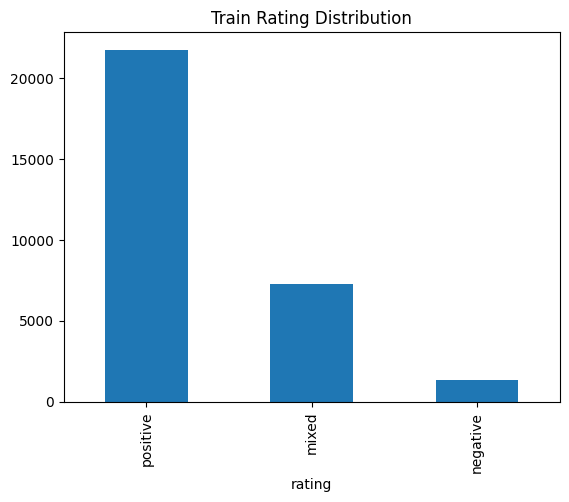

In [173]:
train['rating'].value_counts().plot(kind='bar', title='Train Rating Distribution')

In [174]:
# Select relevant features
features = [
    'Price original', 'Mac', 'Linux',
    'Has full audio', 'Has movie', 'Has DLC', 'Release Year', 'Game Age',
    'languages_count', 'Developers_code', 'Publishers_code'
]

X_train = train[features]
y_train = train['rating']
X_test = test[features]
y_test = test['rating']

### OVER SAMPLING TRAIN

In [175]:
# Use SMOTE for train 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## 7. MODELING

In [176]:
%pip install mord
%pip install catboost

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9967 sha256=bb2f2071a6c5ffb817ac0c04135367f20ac66f0960765ecf9f6cf12731819cb5
  Stored in directory: c:\users\wesley\appdata\local\pip\cache\wheels\77\00\19\3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### ORDINAL LOGREG

In [177]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure ordered mapping for ordinal regression
ordinal_mapping = {'negative': 0, 'mixed': 1, 'positive': 2}
y_train_ord = y_train_resampled.map(ordinal_mapping)
y_test_ord = y_test.map(ordinal_mapping)

----- Ordinal Logistic Regression -----
              precision    recall  f1-score   support

    negative       0.10      0.17      0.12       310
       mixed       0.26      0.66      0.38      1870
    positive       0.80      0.36      0.50      5565

    accuracy                           0.43      7745
   macro avg       0.39      0.40      0.33      7745
weighted avg       0.64      0.43      0.46      7745



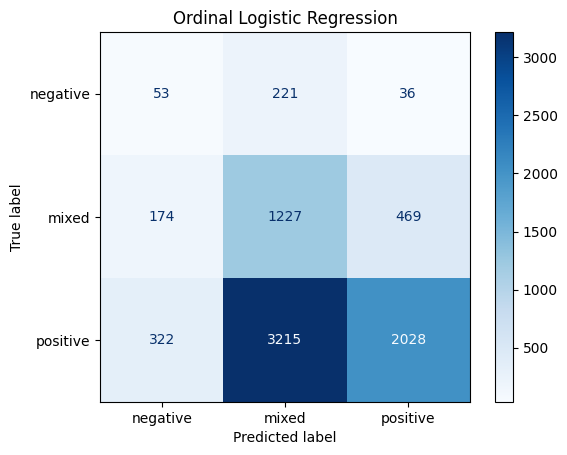

In [178]:
from mord import LogisticAT

model_ordinal = LogisticAT(alpha=1.0)
model_ordinal.fit(X_train_resampled, y_train_ord)

y_pred_ord = model_ordinal.predict(X_test)

print("----- Ordinal Logistic Regression -----")
print(classification_report(y_test_ord, y_pred_ord, target_names=['negative', 'mixed', 'positive']))

cm = confusion_matrix(y_test_ord, y_pred_ord)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'mixed', 'positive'])
disp.plot(cmap="Blues")
plt.title("Ordinal Logistic Regression")
plt.show()


=== Ordinal Logistic Regression - TRAIN ===
              precision    recall  f1-score   support

    negative       0.52      0.18      0.27     21739
       mixed       0.35      0.75      0.48     21739
    positive       0.66      0.36      0.47     21739

    accuracy                           0.43     65217
   macro avg       0.51      0.43      0.41     65217
weighted avg       0.51      0.43      0.41     65217



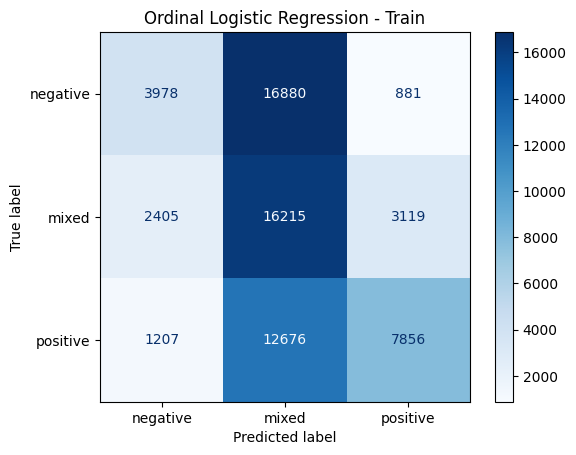

In [179]:
# Predictions
y_pred_train_ord = model_ordinal.predict(X_train_resampled)

# TRAIN
print("=== Ordinal Logistic Regression - TRAIN ===")
print(classification_report(y_train_ord, y_pred_train_ord, target_names=['negative', 'mixed', 'positive']))
cm_train = confusion_matrix(y_train_ord, y_pred_train_ord)
ConfusionMatrixDisplay(cm_train, display_labels=['negative', 'mixed', 'positive']).plot(cmap="Blues")
plt.title("Ordinal Logistic Regression - Train")
plt.show()

### LOGISTIC REGRESSION

d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----- Logistic Regression -----
              precision    recall  f1-score   support

    negative       0.27      0.19      0.23      1870
       mixed       0.07      0.54      0.12       310
    positive       0.79      0.55      0.65      5565

    accuracy                           0.46      7745
   macro avg       0.37      0.43      0.33      7745
weighted avg       0.63      0.46      0.52      7745



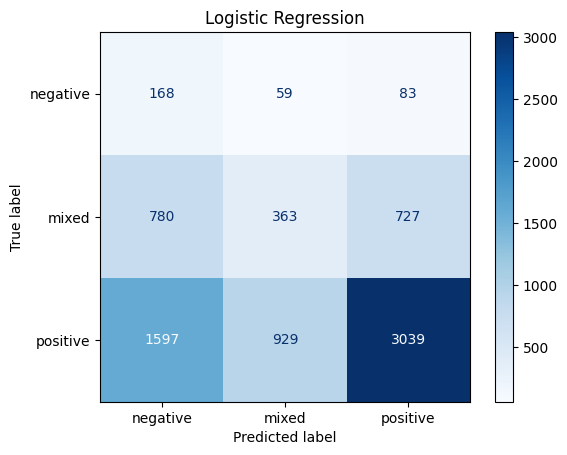

In [180]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_resampled, y_train_resampled)

y_pred_logreg = model_logreg.predict(X_test)

print("----- Logistic Regression -----")
print(classification_report(y_test, y_pred_logreg, target_names=['negative', 'mixed', 'positive']))

cm = confusion_matrix(y_test, y_pred_logreg, labels=['negative', 'mixed', 'positive'])
ConfusionMatrixDisplay(cm, display_labels=['negative', 'mixed', 'positive']).plot(cmap="Blues")
plt.title("Logistic Regression")
plt.show()


=== Logistic Regression - TRAIN ===
              precision    recall  f1-score   support

    negative       0.37      0.22      0.27     21739
       mixed       0.45      0.61      0.51     21739
    positive       0.54      0.57      0.56     21739

    accuracy                           0.47     65217
   macro avg       0.45      0.47      0.45     65217
weighted avg       0.45      0.47      0.45     65217



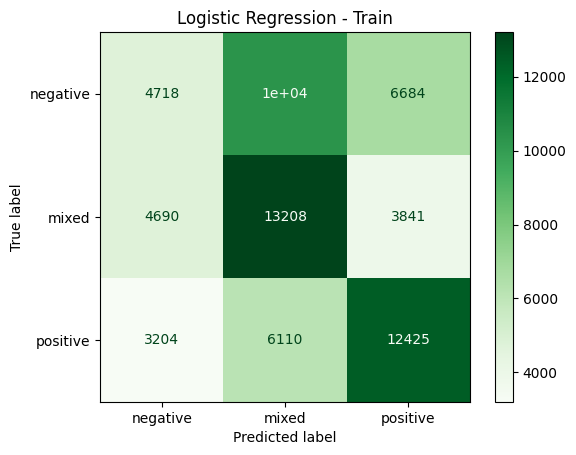

In [181]:
y_pred_train_log = model_logreg.predict(X_train_resampled)

print("=== Logistic Regression - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_log, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_log, display_labels=['negative', 'mixed', 'positive'], cmap="Greens")
plt.title("Logistic Regression - Train")
plt.show()

### RANDOM FOREST

=== Random Forest - TRAIN ===
              precision    recall  f1-score   support

    negative       0.91      0.91      0.91     21739
       mixed       0.90      0.95      0.93     21739
    positive       0.98      0.93      0.96     21739

    accuracy                           0.93     65217
   macro avg       0.93      0.93      0.93     65217
weighted avg       0.93      0.93      0.93     65217



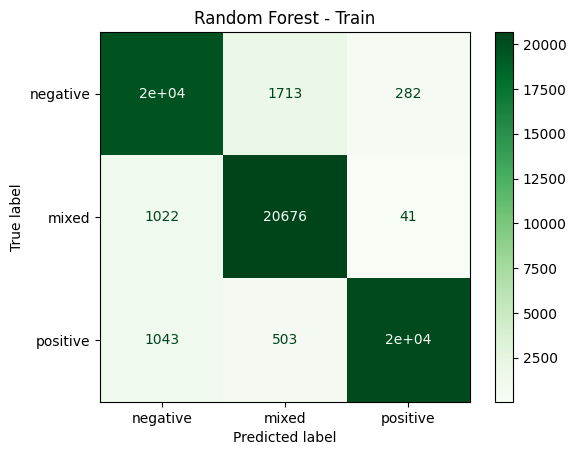

=== Random Forest - TEST ===
              precision    recall  f1-score   support

    negative       0.29      0.42      0.34      1870
       mixed       0.10      0.26      0.14       310
    positive       0.78      0.60      0.68      5565

    accuracy                           0.54      7745
   macro avg       0.39      0.42      0.39      7745
weighted avg       0.64      0.54      0.58      7745



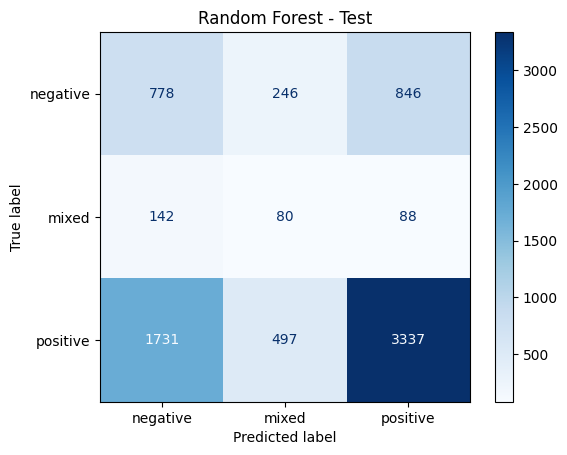

In [182]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test)

print("=== Random Forest - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_rf, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_rf, display_labels=['negative', 'mixed', 'positive'], cmap="Greens")
plt.title("Random Forest - Train")
plt.show()

print("=== Random Forest - TEST ===")
print(classification_report(y_test, y_pred_test_rf, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, display_labels=['negative', 'mixed', 'positive'], cmap="Blues")
plt.title("Random Forest - Test")
plt.show()


### KNN

=== KNN - TRAIN ===
              precision    recall  f1-score   support

    negative       0.68      0.83      0.75     21739
       mixed       0.85      0.73      0.79     21739
    positive       0.78      0.71      0.74     21739

    accuracy                           0.76     65217
   macro avg       0.77      0.76      0.76     65217
weighted avg       0.77      0.76      0.76     65217



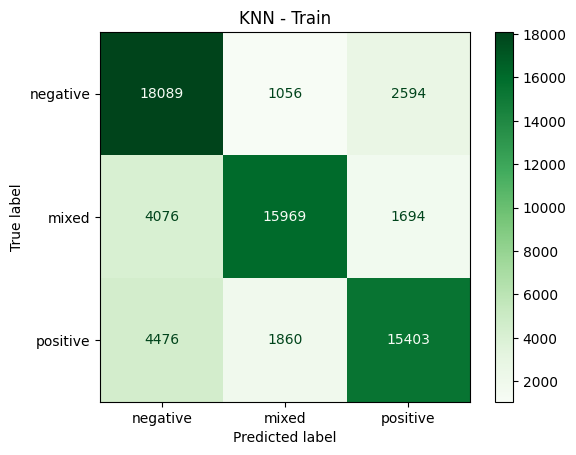

=== KNN - TEST ===
              precision    recall  f1-score   support

    negative       0.29      0.57      0.38      1870
       mixed       0.08      0.22      0.12       310
    positive       0.81      0.45      0.58      5565

    accuracy                           0.47      7745
   macro avg       0.39      0.42      0.36      7745
weighted avg       0.65      0.47      0.51      7745



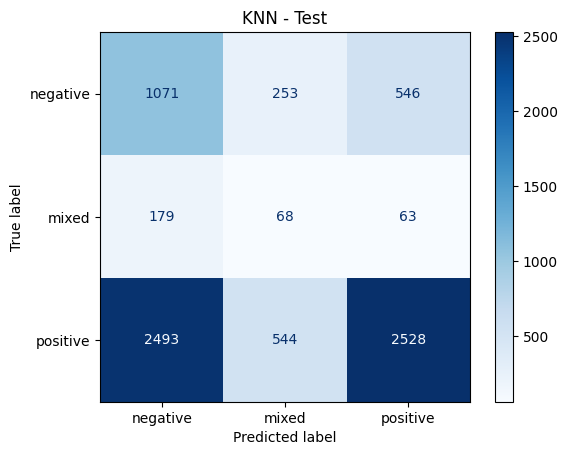

In [183]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

y_pred_train_knn = model_knn.predict(X_train_resampled)
y_pred_test_knn = model_knn.predict(X_test)

print("=== KNN - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_knn, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_knn, display_labels=['negative', 'mixed', 'positive'], cmap="Greens")
plt.title("KNN - Train")
plt.show()

print("=== KNN - TEST ===")
print(classification_report(y_test, y_pred_test_knn, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=['negative', 'mixed', 'positive'], cmap="Blues")
plt.title("KNN - Test")
plt.show()


# ATTEMPT 4

### DEPENDENCIES

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. READ DATA

In [185]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 2. SELECT COLUMNS

In [186]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements', 'Recommendations'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Steam Deck            41170 non-null  bool   
 8   Supported languages   41157 non-null  object 
 9   Full audio languages  19288 non-null  object 
 10  Developers            41096 non-null  object 
 11  Publishers            40949 non-null  object 
 12  Movies                39366 non-null  object 
 13  rating                41170 non-null  object 
 14  Positive ratio        41170 non-null  int64  
 15  Genres             

## 3. SPLIT DATA

### Filter 10k Developers and 10k Publishers

In [187]:
# Get top 10k developers by count, break ties with mean positive_ratio
dev_counts = df_filtered.groupby('Developers').agg(
    count=('Developers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

# Filter df_filtered to only include top 10k developers
df_filtered = df_filtered[df_filtered['Developers'].isin(top_10k_developers)]

# Repeat the same for publishers
pub_counts = df_filtered.groupby('Publishers').agg(
    count=('Publishers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()
# Filter df_filtered to only include top 10k publishers
df_filtered = df_filtered[df_filtered['Publishers'].isin(top_10k_publishers)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25512 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          25512 non-null  object 
 1   Price original        25512 non-null  float64
 2   DLC count             25512 non-null  int64  
 3   Required age          25512 non-null  int64  
 4   Windows               25512 non-null  bool   
 5   Mac                   25512 non-null  bool   
 6   Linux                 25512 non-null  bool   
 7   Steam Deck            25512 non-null  bool   
 8   Supported languages   25511 non-null  object 
 9   Full audio languages  11616 non-null  object 
 10  Developers            25512 non-null  object 
 11  Publishers            25512 non-null  object 
 12  Movies                24251 non-null  object 
 13  rating                25512 non-null  object 
 14  Positive ratio        25512 non-null  int64  
 15  Genres                25

### Split Data

In [188]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df_filtered.drop(columns=['rating'])
y = df_filtered['rating']

# Split the data into training and testing sets 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Concat X_train and y_train for visualization
train = pd.concat([X_train, y_train], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17858 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17858 non-null  object 
 1   Price original        17858 non-null  float64
 2   DLC count             17858 non-null  int64  
 3   Required age          17858 non-null  int64  
 4   Windows               17858 non-null  bool   
 5   Mac                   17858 non-null  bool   
 6   Linux                 17858 non-null  bool   
 7   Steam Deck            17858 non-null  bool   
 8   Supported languages   17857 non-null  object 
 9   Full audio languages  8110 non-null   object 
 10  Developers            17858 non-null  object 
 11  Publishers            17858 non-null  object 
 12  Movies                16961 non-null  object 
 13  Positive ratio        17858 non-null  int64  
 14  Genres                17837 non-null  object 
 15  Tags                

In [189]:
# Concat X_test and y_test for visualization
test = pd.concat([X_test, y_test], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7654 entries, 19978 to 40229
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          7654 non-null   object 
 1   Price original        7654 non-null   float64
 2   DLC count             7654 non-null   int64  
 3   Required age          7654 non-null   int64  
 4   Windows               7654 non-null   bool   
 5   Mac                   7654 non-null   bool   
 6   Linux                 7654 non-null   bool   
 7   Steam Deck            7654 non-null   bool   
 8   Supported languages   7654 non-null   object 
 9   Full audio languages  3506 non-null   object 
 10  Developers            7654 non-null   object 
 11  Publishers            7654 non-null   object 
 12  Movies                7290 non-null   object 
 13  Positive ratio        7654 non-null   int64  
 14  Genres                7650 non-null   object 
 15  Tags                 

## 4. EDA

### 4a. Missing Value Detection

In [190]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / train.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

Missing Values  Percentage
Full audio languages            9748   54.586180
Tags                            1349    7.554037
Movies                           897    5.022959
Categories                       197    1.103147
Genres                            21    0.117594
Supported languages                1    0.005600

### 4b. Noise Detection

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17858 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17858 non-null  object 
 1   Price original        17858 non-null  float64
 2   DLC count             17858 non-null  int64  
 3   Required age          17858 non-null  int64  
 4   Windows               17858 non-null  bool   
 5   Mac                   17858 non-null  bool   
 6   Linux                 17858 non-null  bool   
 7   Steam Deck            17858 non-null  bool   
 8   Supported languages   17857 non-null  object 
 9   Full audio languages  8110 non-null   object 
 10  Developers            17858 non-null  object 
 11  Publishers            17858 non-null  object 
 12  Movies                16961 non-null  object 
 13  Positive ratio        17858 non-null  int64  
 14  Genres                17837 non-null  object 
 15  Tags                

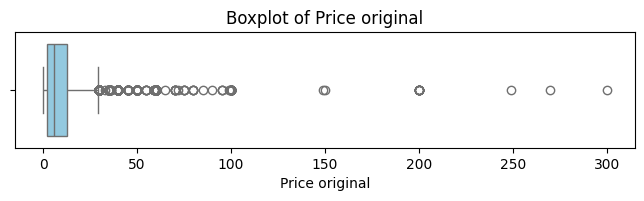

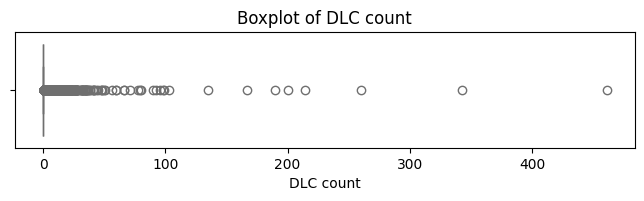

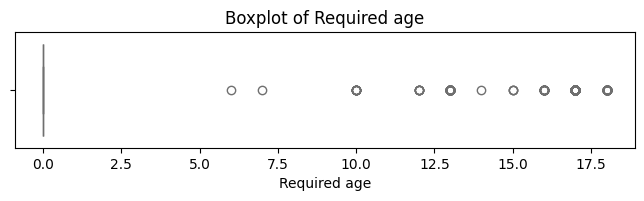

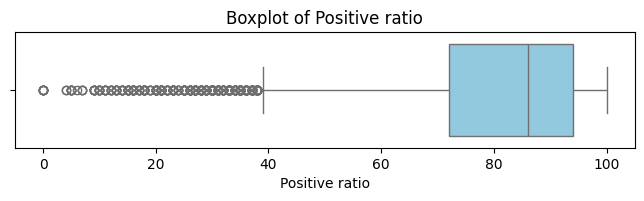

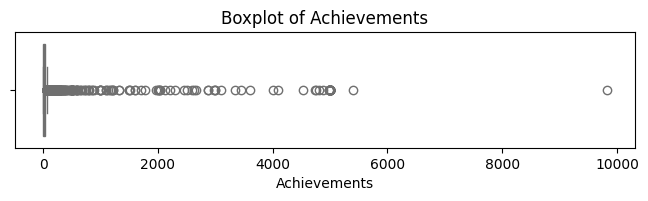

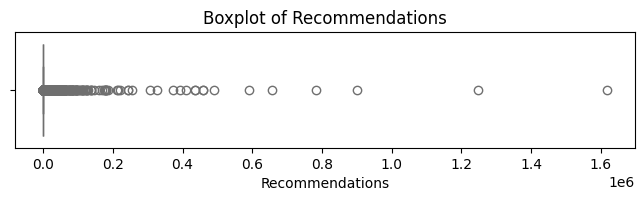

In [192]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=train[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [193]:
# Use IQR
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / train.shape[0]:.2f}%)")

Price original: 1030 outliers (5.77%)
DLC count: 4296 outliers (24.06%)
Required age: 547 outliers (3.06%)
Positive ratio: 525 outliers (2.94%)
Achievements: 978 outliers (5.48%)
Recommendations: 2816 outliers (15.77%)


#### ANALYSIS

In [194]:
train['Required age'].sort_values(ascending=True).unique()

array([ 0,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18], dtype=int64)

In [195]:
train['Required age'].value_counts()

Required age
0     17311
17      363
13       76
18       60
16       26
10       10
12        6
15        3
6         1
14        1
7         1
Name: count, dtype: int64

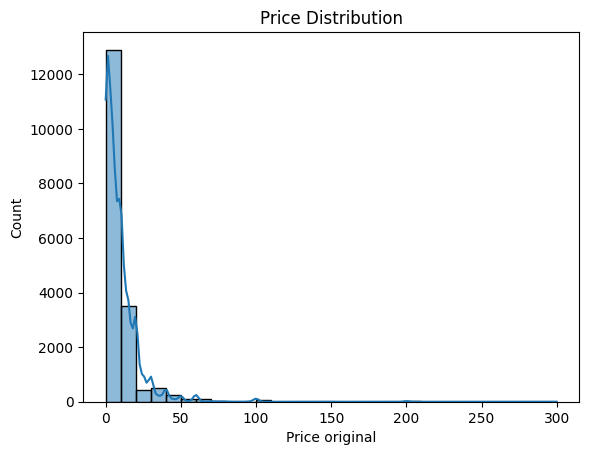

In [196]:
# Distribusi price dengan density plot
sns.histplot(train['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [197]:
print(train['Price original'].describe())

count    17858.000000
mean         9.402193
std         12.654009
min          0.000000
25%          1.990000
50%          5.990000
75%         12.990000
max        299.900000
Name: Price original, dtype: float64


In [198]:
Q1 = train['Price original'].quantile(0.25)
Q3 = train['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train[(train['Price original'] < lower) | (train['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

Release date  Price original  DLC count  Required age  Windows    Mac  \
2078    2013-11-12          299.90          0             0     True  False   
9157    2018-10-10          269.99          0             0     True   True   
38421   2022-11-01          249.00          0             0     True  False   
40635   2023-02-21          199.99          0             0     True   True   
40400   2023-01-27          199.99          0             0     True  False   
36909   2022-03-21          199.99          0             0     True  False   
40077   2022-12-17          199.99          0             0     True   True   
37539   2022-05-21          199.99          0             0     True  False   
7475    2016-02-02          199.99          0             0     True  False   
41078   2023-05-23          199.99          0             0     True   True   
39030   2022-09-28          199.99          0             0     True  False   
33727   2021-09-09          199.99          0             0     True  False   
40818   2023-03-23          199.99          0             0     True   True   
34428   2022-12-15          149.99          0             0     True  False   
27346   2020-09-03          149.00          0             0     True  False   

       Linux  Steam Deck                                Supported languages  \
2078   False        True                                            English   
9157   False        True                                            English   
38421  False        True              English,French,German,Spanish - Spain   
40635   True        True  English,French,Italian,German,Spanish - Spain,...   
40400  False        True                                            English   
36909  False        True                 English,Russian,Simplified Chinese   
40077   True        True  English,French,Italian,German,Spanish - Spain,...   
37539  False        True                                            English   
7475   False        True  English,Italian,Japanese,Simplified Chinese,Ge...   
41078   True        True  English,French,Italian,German,Spanish - Spain,...   
39030  False        True                                            English   
33727  False        True              English,French,German,Spanish - Spain   
40818   True        True  English,French,Italian,German,Spanish - Spain,...   
34428  False        True              English,French,German,Japanese,Korean   
27346  False        True              English,French,German,Spanish - Spain   

      Full audio languages                        Developers  \
2078                   NaN                          Aartform   
9157                   NaN                            SideFX   
38421                  NaN               MAGIX Software GmbH   
40635                  NaN                    Top-Down Games   
40400                  NaN                              Hede   
36909                  NaN  Cristian Manolachi,Atomic Fabrik   
40077                  NaN                    Top-Down Games   
37539                  NaN  Cristian Manolachi,Atomic Fabrik   
7475                   NaN                        3Dflow SRL   
41078                  NaN                      PUZZLE Games   
39030                  NaN  Atomic Fabrik,Cristian Manolachi   
33727                  NaN               MAGIX Software GmbH   
40818                  NaN                    Top-Down Games   
34428                  NaN                             Adobe   
27346                  NaN               MAGIX Software GmbH   

                             Publishers  \
2078                           Aartform   
9157                             SideFX   
38421               MAGIX Software GmbH   
40635                              Hede   
40400                              Hede   
36909  Cristian Manolachi,Atomic Fabrik   
40077                              Hede   
37539  Cristian Manolachi,Atomic Fabrik   
7475                         3Dflow SRL   
41078                

In [199]:
# Parse and store unique tag
def parse_tags(tags):
    if pd.isna(tags):
        return []
    return [tag.strip() for tag in tags.split(',')]

# Print unique tags single
unique_tags = set()
for tags in train['Tags'].dropna():
    parsed_tags = parse_tags(tags)
    unique_tags.update(parsed_tags)

# Convert unique_tags to a sorted list and print in table format
unique_tags_list = sorted(unique_tags)
print("Unique Tags:")
for tag in unique_tags_list:
    print(tag)


Unique Tags:
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
360 Video
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
8-bit Music
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base-Building
Baseball
Based On A Novel
Basketball
Battle Royale
Beat 'em up
Beautiful
Benchmark
Bikes
Blood
Board Game
Boss Rush
Bowling
Boxing
Building
Bullet Hell
Bullet Time
CRPG
Capitalism
Card Battler
Card Game
Cartoon
Cartoony
Casual
Cats
Character Action Game
Character Customization
Chess
Choices Matter
Choose Your Own Adventure
Cinematic
City Builder
Class-Based
Classic
Clicker
Co-op
Co-op Campaign
Cold War
Collectathon
Colony Sim
Colorful
Combat
Combat Racing
Comedy
Comic Book
Competitive
Consp

In [200]:
# Unique genres
def parse_genres(genres):
    if pd.isna(genres):
        return []
    return [genre.strip() for genre in genres.split(',')]

# Print unique genres single
unique_genres = set()
for genres in train['Genres'].dropna():
    parsed_genres = parse_genres(genres)
    unique_genres.update(parsed_genres)

# Convert unique_genres to a sorted list and print in table format
unique_genres_list = sorted(unique_genres)
print("Unique Genres:")
for genre in unique_genres_list:
    print(genre)

Unique Genres:
Action
Adventure
Animation & Modeling
Audio Production
Casual
Design & Illustration
Early Access
Education
Free to Play
Game Development
Gore
Indie
Massively Multiplayer
Movie
Nudity
Photo Editing
RPG
Racing
Sexual Content
Simulation
Software Training
Sports
Strategy
Utilities
Video Production
Violent
Web Publishing


In [201]:
# Unique categories
def parse_categories(categories):
    if pd.isna(categories):
        return []
    return [category.strip() for category in categories.split(',')]
# Print unique categories single
unique_categories = set()
for categories in train['Categories'].dropna():
    parsed_categories = parse_categories(categories)
    unique_categories.update(parsed_categories)
# Convert unique_categories to a sorted list and print in table format
unique_categories_list = sorted(unique_categories)
print("Unique Categories:")
for category in unique_categories_list:
    print(category)


Unique Categories:
Captions available
Co-op
Commentary available
Cross-Platform Multiplayer
Full controller support
HDR available
In-App Purchases
Includes Source SDK
Includes level editor
LAN Co-op
LAN PvP
MMO
Multi-player
Online Co-op
Online PvP
Partial Controller Support
PvP
Remote Play Together
Remote Play on Phone
Remote Play on TV
Remote Play on Tablet
Shared/Split Screen
Shared/Split Screen Co-op
Shared/Split Screen PvP
Single-player
Stats
Steam Achievements
Steam Cloud
Steam Leaderboards
Steam Trading Cards
Steam Turn Notifications
Steam Workshop
SteamVR Collectibles
Tracked Controller Support
VR Only
VR Support
VR Supported
Valve Anti-Cheat enabled


## 5. PREPROCESSING

### 5a. Missing Value Handling

In [202]:
# Drop rows
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
train.dropna(subset=col_to_clean, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17642 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17642 non-null  object 
 1   Price original        17642 non-null  float64
 2   DLC count             17642 non-null  int64  
 3   Required age          17642 non-null  int64  
 4   Windows               17642 non-null  bool   
 5   Mac                   17642 non-null  bool   
 6   Linux                 17642 non-null  bool   
 7   Steam Deck            17642 non-null  bool   
 8   Supported languages   17642 non-null  object 
 9   Full audio languages  8060 non-null   object 
 10  Developers            17642 non-null  object 
 11  Publishers            17642 non-null  object 
 12  Movies                16765 non-null  object 
 13  Positive ratio        17642 non-null  int64  
 14  Genres                17642 non-null  object 
 15  Tags                

In [203]:
# Convert Full audio languages and Movies into 0 or 1 columns in train
train['Has full audio'] = train['Full audio languages'].notnull().map({True: 1, False: 0})
train.drop(columns=['Full audio languages'], inplace=True)

train['Has movie'] = train['Movies'].notnull().map({True: 1, False: 0})
train.drop(columns=['Movies'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17642 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         17642 non-null  object 
 1   Price original       17642 non-null  float64
 2   DLC count            17642 non-null  int64  
 3   Required age         17642 non-null  int64  
 4   Windows              17642 non-null  bool   
 5   Mac                  17642 non-null  bool   
 6   Linux                17642 non-null  bool   
 7   Steam Deck           17642 non-null  bool   
 8   Supported languages  17642 non-null  object 
 9   Developers           17642 non-null  object 
 10  Publishers           17642 non-null  object 
 11  Positive ratio       17642 non-null  int64  
 12  Genres               17642 non-null  object 
 13  Tags                 16314 non-null  object 
 14  Categories           17642 non-null  object 
 15  Achievements         17642 non-null  

### 5b. Noise Handling

In [204]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

train['Required age category'] = train['Required age'].apply(age_category)
train.drop(columns=['Required age'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17642 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17642 non-null  object 
 1   Price original         17642 non-null  float64
 2   DLC count              17642 non-null  int64  
 3   Windows                17642 non-null  bool   
 4   Mac                    17642 non-null  bool   
 5   Linux                  17642 non-null  bool   
 6   Steam Deck             17642 non-null  bool   
 7   Supported languages    17642 non-null  object 
 8   Developers             17642 non-null  object 
 9   Publishers             17642 non-null  object 
 10  Positive ratio         17642 non-null  int64  
 11  Genres                 17642 non-null  object 
 12  Tags                   16314 non-null  object 
 13  Categories             17642 non-null  object 
 14  Achievements           17642 non-null  int64  
 15  Rec

In [205]:
train['Required age category'].value_counts()

Required age category
Everyone    17113
Teen          469
Adult          60
Name: count, dtype: int64

In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17642 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17642 non-null  object 
 1   Price original         17642 non-null  float64
 2   DLC count              17642 non-null  int64  
 3   Windows                17642 non-null  bool   
 4   Mac                    17642 non-null  bool   
 5   Linux                  17642 non-null  bool   
 6   Steam Deck             17642 non-null  bool   
 7   Supported languages    17642 non-null  object 
 8   Developers             17642 non-null  object 
 9   Publishers             17642 non-null  object 
 10  Positive ratio         17642 non-null  int64  
 11  Genres                 17642 non-null  object 
 12  Tags                   16314 non-null  object 
 13  Categories             17642 non-null  object 
 14  Achievements           17642 non-null  int64  
 15  Rec

In [207]:
# Remove rows where Genres or Tags indicate software
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training']
mask = train['Genres'].str.contains('|'.join(software_keywords), na=False) | train['Tags'].str.contains('|'.join(software_keywords), na=False)
train_games_only = train[~mask].copy()
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17401 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17401 non-null  object 
 1   Price original         17401 non-null  float64
 2   DLC count              17401 non-null  int64  
 3   Windows                17401 non-null  bool   
 4   Mac                    17401 non-null  bool   
 5   Linux                  17401 non-null  bool   
 6   Steam Deck             17401 non-null  bool   
 7   Supported languages    17401 non-null  object 
 8   Developers             17401 non-null  object 
 9   Publishers             17401 non-null  object 
 10  Positive ratio         17401 non-null  int64  
 11  Genres                 17401 non-null  object 
 12  Tags                   16077 non-null  object 
 13  Categories             17401 non-null  object 
 14  Achievements           17401 non-null  int64  
 15  Rec

In [208]:
# Remove price original outliers using IQR
Q1 = train_games_only['Price original'].quantile(0.25)
Q3 = train_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_games_only[(train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound)]
print(f"Outliers count: {outliers.shape[0]}")
# Remove outliers from train_games_only
train_games_only = train_games_only[~((train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound))]
train_games_only.info()

Outliers count: 959
<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           16442 non-null  object 
 1   Price original         16442 non-null  float64
 2   DLC count              16442 non-null  int64  
 3   Windows                16442 non-null  bool   
 4   Mac                    16442 non-null  bool   
 5   Linux                  16442 non-null  bool   
 6   Steam Deck             16442 non-null  bool   
 7   Supported languages    16442 non-null  object 
 8   Developers             16442 non-null  object 
 9   Publishers             16442 non-null  object 
 10  Positive ratio         16442 non-null  int64  
 11  Genres                 16442 non-null  object 
 12  Tags                   15198 non-null  object 
 13  Categories             16442 non-null  object 
 14  Achievements           16442 non-nu

### 5c. Feature Engineering

In [209]:
# Binning DLC count into Has DLC
train_games_only['Has DLC'] = np.where(train_games_only['DLC count'] > 0, 1, 0)
train_games_only.drop(columns=['DLC count'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           16442 non-null  object 
 1   Price original         16442 non-null  float64
 2   Windows                16442 non-null  bool   
 3   Mac                    16442 non-null  bool   
 4   Linux                  16442 non-null  bool   
 5   Steam Deck             16442 non-null  bool   
 6   Supported languages    16442 non-null  object 
 7   Developers             16442 non-null  object 
 8   Publishers             16442 non-null  object 
 9   Positive ratio         16442 non-null  int64  
 10  Genres                 16442 non-null  object 
 11  Tags                   15198 non-null  object 
 12  Categories             16442 non-null  object 
 13  Achievements           16442 non-null  int64  
 14  Recommendations        16442 non-null  int64  
 15  rat

In [210]:
from datetime import datetime

# Convert to datetime (handle errors gracefully)
train_games_only['Release date'] = pd.to_datetime(train_games_only['Release date'], errors='coerce')

# Drop rows where date conversion failed (optional or handle as missing)
train_games_only = train_games_only.dropna(subset=['Release date'])

# Extract release year and game age
train_games_only['Release Year'] = train_games_only['Release date'].dt.year
train_games_only['Game Age'] = datetime.now().year - train_games_only['Release Year']

# Drop original release date column
train_games_only = train_games_only.drop(columns=['Release date'])


In [211]:
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16442 non-null  float64
 1   Windows                16442 non-null  bool   
 2   Mac                    16442 non-null  bool   
 3   Linux                  16442 non-null  bool   
 4   Steam Deck             16442 non-null  bool   
 5   Supported languages    16442 non-null  object 
 6   Developers             16442 non-null  object 
 7   Publishers             16442 non-null  object 
 8   Positive ratio         16442 non-null  int64  
 9   Genres                 16442 non-null  object 
 10  Tags                   15198 non-null  object 
 11  Categories             16442 non-null  object 
 12  Achievements           16442 non-null  int64  
 13  Recommendations        16442 non-null  int64  
 14  rating                 16442 non-null  object 
 15  Has

In [212]:
# Create a new column languages_count with the count of languages in Supported languages
train_games_only['languages_count'] = train_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16442 non-null  float64
 1   Windows                16442 non-null  bool   
 2   Mac                    16442 non-null  bool   
 3   Linux                  16442 non-null  bool   
 4   Steam Deck             16442 non-null  bool   
 5   Supported languages    16442 non-null  object 
 6   Developers             16442 non-null  object 
 7   Publishers             16442 non-null  object 
 8   Positive ratio         16442 non-null  int64  
 9   Genres                 16442 non-null  object 
 10  Tags                   15198 non-null  object 
 11  Categories             16442 non-null  object 
 12  Achievements           16442 non-null  int64  
 13  Recommendations        16442 non-null  int64  
 14  rating                 16442 non-null  object 
 15  Has

In [213]:
# make a new column 'Language_english' that is 1 if 'english' is in Supported languages, else 0
train_games_only['Language_english'] = train_games_only['Supported languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)
train_games_only['Language_english'].value_counts()

Language_english
1    15903
0      539
Name: count, dtype: int64

In [214]:
# drop Supported languages column
train_games_only.drop(columns=['Supported languages'], inplace=True)

In [215]:
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16442 non-null  float64
 1   Windows                16442 non-null  bool   
 2   Mac                    16442 non-null  bool   
 3   Linux                  16442 non-null  bool   
 4   Steam Deck             16442 non-null  bool   
 5   Developers             16442 non-null  object 
 6   Publishers             16442 non-null  object 
 7   Positive ratio         16442 non-null  int64  
 8   Genres                 16442 non-null  object 
 9   Tags                   15198 non-null  object 
 10  Categories             16442 non-null  object 
 11  Achievements           16442 non-null  int64  
 12  Recommendations        16442 non-null  int64  
 13  rating                 16442 non-null  object 
 14  Has full audio         16442 non-null  int64  
 15  Has

In [216]:
# Make a new column 'Platform_count' that is the sum of Windows, Mac, and Linux
train_games_only['Platform_count'] = train_games_only[['Windows', 'Mac', 'Linux']].sum(axis=1)
train_games_only['Platform_count'].value_counts()

Platform_count
1    11357
3     2647
2     2438
Name: count, dtype: int64

### 5d. Encoding

In [217]:
train_games_only['Mac'] = train_games_only['Mac'].astype(int)
train_games_only['Linux'] = train_games_only['Linux'].astype(int)
train_games_only['Windows'] = train_games_only['Windows'].astype(int)
train_games_only['Steam Deck'] = train_games_only['Steam Deck'].astype(int)

In [218]:
# Encode developer and publisher columns
from sklearn.preprocessing import LabelEncoder

developer_encoder = LabelEncoder()
train_games_only['Developers_code'] = developer_encoder.fit_transform(train_games_only['Developers'])

publisher_encoder = LabelEncoder()
train_games_only['Publishers_code'] = publisher_encoder.fit_transform(train_games_only['Publishers'])

# drop developers and publishers
train_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16442 non-null  float64
 1   Windows                16442 non-null  int32  
 2   Mac                    16442 non-null  int32  
 3   Linux                  16442 non-null  int32  
 4   Steam Deck             16442 non-null  int32  
 5   Positive ratio         16442 non-null  int64  
 6   Genres                 16442 non-null  object 
 7   Tags                   15198 non-null  object 
 8   Categories             16442 non-null  object 
 9   Achievements           16442 non-null  int64  
 10  Recommendations        16442 non-null  int64  
 11  rating                 16442 non-null  object 
 12  Has full audio         16442 non-null  int64  
 13  Has movie              16442 non-null  int64  
 14  Required age category  16442 non-null  object 
 15  Has

In [219]:
# Encode Required age category
required_age_encoder = LabelEncoder()
train_games_only['Required age category_code'] = required_age_encoder.fit_transform(train_games_only['Required age category'])
# drop Required age category
train_games_only.drop(columns=['Required age category'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              16442 non-null  float64
 1   Windows                     16442 non-null  int32  
 2   Mac                         16442 non-null  int32  
 3   Linux                       16442 non-null  int32  
 4   Steam Deck                  16442 non-null  int32  
 5   Positive ratio              16442 non-null  int64  
 6   Genres                      16442 non-null  object 
 7   Tags                        15198 non-null  object 
 8   Categories                  16442 non-null  object 
 9   Achievements                16442 non-null  int64  
 10  Recommendations             16442 non-null  int64  
 11  rating                      16442 non-null  object 
 12  Has full audio              16442 non-null  int64  
 13  Has movie                   1644

In [220]:
# Get top5 genres by value counts and then one-hot encode them
top5_genres = train_games_only['Genres'].str.split(',').explode().value_counts()
top5_genres = top5_genres.head(5).index.tolist()
# One-hot encode top5 genres
for genre in top5_genres:
    train_games_only[f'Genre_{genre}'] = train_games_only['Genres'].str.contains(genre, case=False, na=False).astype(int)
# Drop Genres column
train_games_only.drop(columns=['Genres'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              16442 non-null  float64
 1   Windows                     16442 non-null  int32  
 2   Mac                         16442 non-null  int32  
 3   Linux                       16442 non-null  int32  
 4   Steam Deck                  16442 non-null  int32  
 5   Positive ratio              16442 non-null  int64  
 6   Tags                        15198 non-null  object 
 7   Categories                  16442 non-null  object 
 8   Achievements                16442 non-null  int64  
 9   Recommendations             16442 non-null  int64  
 10  rating                      16442 non-null  object 
 11  Has full audio              16442 non-null  int64  
 12  Has movie                   16442 non-null  int64  
 13  Has DLC                     1644

In [221]:
# Get top 5 tags by value counts and print them
top5_tags = train_games_only['Tags'].str.split(',').explode().value_counts()
top5_tags = top5_tags.head(5).index.tolist()

# Print top5_tags
print(f"Top 5 Tags: {top5_tags}")

Top 5 Tags: ['Indie', 'Singleplayer', 'Adventure', 'Casual', 'Action']


In [222]:
# Get top5 categories by value counts
top5_categories = train_games_only['Categories'].str.split(',').explode().value_counts()
top5_categories = top5_categories.head(5).index.tolist()

# print top5_categories
print(f"Top 5 Categories: {top5_categories}")

# Encode top5 categories
for category in top5_categories:
    train_games_only[f'Category_{category}'] = train_games_only['Categories'].str.contains(category, case=False, na=False).astype(int)

train_games_only.info()

Top 5 Categories: ['Single-player', 'Steam Achievements', 'Steam Cloud', 'Full controller support', 'Steam Trading Cards']
<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16442 non-null  float64
 1   Windows                           16442 non-null  int32  
 2   Mac                               16442 non-null  int32  
 3   Linux                             16442 non-null  int32  
 4   Steam Deck                        16442 non-null  int32  
 5   Positive ratio                    16442 non-null  int64  
 6   Tags                              15198 non-null  object 
 7   Categories                        16442 non-null  object 
 8   Achievements                      16442 non-null  int64  
 9   Recommendations                   16442 non-null  int64  
 10  rating  

## 6. TEST DATA PREPARATION

In [223]:
# --- MISSING VALUES HANDLING IN TEST SET ---
# Drop rows with missing values in critical columns (same as train)
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
test.dropna(subset=col_to_clean, inplace=True)

# Convert Full audio languages and Movies into 0 or 1 columns in test
test['Has full audio'] = test['Full audio languages'].notnull().map({True: 1, False: 0})
test.drop(columns=['Full audio languages'], inplace=True)

test['Has movie'] = test['Movies'].notnull().map({True: 1, False: 0})
test.drop(columns=['Movies'], inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7572 entries, 19978 to 40229
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         7572 non-null   object 
 1   Price original       7572 non-null   float64
 2   DLC count            7572 non-null   int64  
 3   Required age         7572 non-null   int64  
 4   Windows              7572 non-null   bool   
 5   Mac                  7572 non-null   bool   
 6   Linux                7572 non-null   bool   
 7   Steam Deck           7572 non-null   bool   
 8   Supported languages  7572 non-null   object 
 9   Developers           7572 non-null   object 
 10  Publishers           7572 non-null   object 
 11  Positive ratio       7572 non-null   int64  
 12  Genres               7572 non-null   object 
 13  Tags                 7009 non-null   object 
 14  Categories           7572 non-null   object 
 15  Achievements         7572 non-null   i

In [224]:
# --- NOISE HANDLING IN TEST SET ---
# Remove rows where Genres or Tags indicate software (same keywords as train)
software_keywords = [
    'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing',
    'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training'
]
mask = test['Genres'].str.contains('|'.join(software_keywords), na=False) | test['Tags'].str.contains('|'.join(software_keywords), na=False)
test_games_only = test[~mask].copy()

# Remove Price original outliers using IQR (use test's own IQR)
Q1 = test_games_only['Price original'].quantile(0.25)
Q3 = test_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_games_only = test_games_only[(test_games_only['Price original'] >= lower_bound) & (test_games_only['Price original'] <= upper_bound)]

In [225]:
# --- FEATURE ENGINEERING IN TEST SET ---
from datetime import datetime

# Binning DLC count into Has DLC
test_games_only['Has DLC'] = np.where(test_games_only['DLC count'] > 0, 1, 0)
test_games_only.drop(columns=['DLC count'], inplace=True)

# Required age category
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

test_games_only['Required age category'] = test_games_only['Required age'].apply(age_category)
test_games_only.drop(columns=['Required age'], inplace=True)

# Release date to Release Year and Game Age
test_games_only['Release date'] = pd.to_datetime(test_games_only['Release date'], errors='coerce')
test_games_only = test_games_only.dropna(subset=['Release date'])
test_games_only['Release Year'] = test_games_only['Release date'].dt.year
test_games_only['Game Age'] = datetime.now().year - test_games_only['Release Year']
test_games_only = test_games_only.drop(columns=['Release date'])

# Languages count
test_games_only['languages_count'] = test_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Language English
test_games_only['Language_english'] = test_games_only['Supported languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)
test_games_only['Language_english'].value_counts()

test_games_only.drop(columns=['Supported languages'], inplace=True)

In [226]:
# --- ENCODING IN TEST SET ---
# Convert platform columns to int
test_games_only['Mac'] = test_games_only['Mac'].astype(int)
test_games_only['Linux'] = test_games_only['Linux'].astype(int)
test_games_only['Windows'] = test_games_only['Windows'].astype(int)
test_games_only['Steam Deck'] = test_games_only['Steam Deck'].astype(int)

# Platform count
test_games_only['Platform_count'] = test_games_only[['Windows', 'Mac', 'Linux']].sum(axis=1)
test_games_only['Platform_count'].value_counts()

Platform_count
1    4866
3    1128
2    1048
Name: count, dtype: int64

In [227]:
# Ensure 'Others' is in the encoder's classes
if 'Others' not in developer_encoder.classes_:
    developer_encoder.classes_ = np.append(developer_encoder.classes_, 'Others')
if 'Others' not in publisher_encoder.classes_:
    publisher_encoder.classes_ = np.append(publisher_encoder.classes_, 'Others')

# Map unseen to 'Others'
test_games_only['Developers'] = test_games_only['Developers'].apply(lambda x: x if x in developer_encoder.classes_ else 'Others')
test_games_only['Publishers'] = test_games_only['Publishers'].apply(lambda x: x if x in publisher_encoder.classes_ else 'Others')

# Now transform safely
test_games_only['Developers_code'] = developer_encoder.transform(test_games_only['Developers'])
test_games_only['Publishers_code'] = publisher_encoder.transform(test_games_only['Publishers'])

In [228]:
# Drop developers and publishers
test_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 19978 to 40229
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         7042 non-null   float64
 1   Windows                7042 non-null   int32  
 2   Mac                    7042 non-null   int32  
 3   Linux                  7042 non-null   int32  
 4   Steam Deck             7042 non-null   int32  
 5   Positive ratio         7042 non-null   int64  
 6   Genres                 7042 non-null   object 
 7   Tags                   6521 non-null   object 
 8   Categories             7042 non-null   object 
 9   Achievements           7042 non-null   int64  
 10  Recommendations        7042 non-null   int64  
 11  rating                 7042 non-null   object 
 12  Has full audio         7042 non-null   int64  
 13  Has movie              7042 non-null   int64  
 14  Has DLC                7042 non-null   int32  
 15  Requ

In [229]:
# Encode Required age category using the same encoder as train
test_games_only['Required age category_code'] = required_age_encoder.transform(test_games_only['Required age category'])
# Drop Required age category
test_games_only.drop(columns=['Required age category'], inplace=True)
test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 19978 to 40229
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              7042 non-null   float64
 1   Windows                     7042 non-null   int32  
 2   Mac                         7042 non-null   int32  
 3   Linux                       7042 non-null   int32  
 4   Steam Deck                  7042 non-null   int32  
 5   Positive ratio              7042 non-null   int64  
 6   Genres                      7042 non-null   object 
 7   Tags                        6521 non-null   object 
 8   Categories                  7042 non-null   object 
 9   Achievements                7042 non-null   int64  
 10  Recommendations             7042 non-null   int64  
 11  rating                      7042 non-null   object 
 12  Has full audio              7042 non-null   int64  
 13  Has movie                   7042 

In [230]:
# Using top 5 genres from train, one-hot encode them in test
for genre in top5_genres:
    test_games_only[f'Genre_{genre}'] = test_games_only['Genres'].str.contains(genre, case=False, na=False).astype(int)

# Drop Genres column
test_games_only.drop(columns=['Genres'], inplace=True)

# Using top 5 categories from train, one-hot encode them in test
for category in top5_categories:
    test_games_only[f'Category_{category}'] = test_games_only['Categories'].str.contains(category, case=False, na=False).astype(int)

test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 19978 to 40229
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    7042 non-null   float64
 1   Windows                           7042 non-null   int32  
 2   Mac                               7042 non-null   int32  
 3   Linux                             7042 non-null   int32  
 4   Steam Deck                        7042 non-null   int32  
 5   Positive ratio                    7042 non-null   int64  
 6   Tags                              6521 non-null   object 
 7   Categories                        7042 non-null   object 
 8   Achievements                      7042 non-null   int64  
 9   Recommendations                   7042 non-null   int64  
 10  rating                            7042 non-null   object 
 11  Has full audio                    7042 non-null   int64  
 12  Has mo

## FINAL PREP

In [231]:
train = train_games_only.copy()
test = test_games_only.copy() 

In [232]:
# print value counts rating in train
print(train['rating'].value_counts())

rating
Very Positive              5124
Positive                   4635
Mixed                      3098
Mostly Positive            2408
Overwhelmingly Positive     674
Mostly Negative             410
Negative                     76
Very Negative                12
Overwhelmingly Negative       5
Name: count, dtype: int64


In [233]:
# print value counts rating in test
print(test['rating'].value_counts())

rating
Very Positive              2142
Positive                   1949
Mixed                      1396
Mostly Positive            1052
Overwhelmingly Positive     285
Mostly Negative             186
Negative                     26
Very Negative                 6
Name: count, dtype: int64


### Grouping rating

In [234]:
def classify_rating(rating):
    if rating in ['Mostly Positive', 'Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 'positive'
    elif rating == 'Mixed':
        return 'negative'
    else:
        return 'negative'
    
train['rating'] = train['rating'].apply(classify_rating)
test['rating'] = test['rating'].apply(classify_rating)

<Axes: title={'center': 'Train Rating Distribution'}, xlabel='rating'>

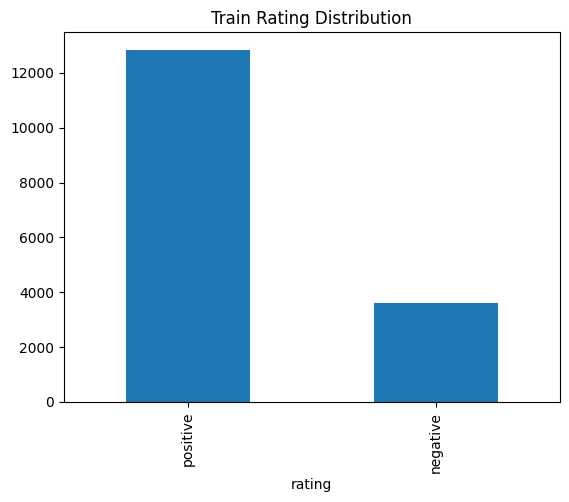

In [235]:
train['rating'].value_counts().plot(kind='bar', title='Train Rating Distribution')

<Axes: title={'center': 'Test Rating Distribution'}, xlabel='rating'>

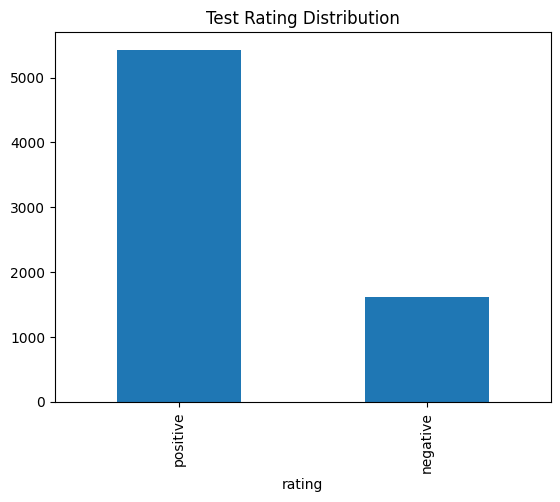

In [236]:
test['rating'].value_counts().plot(kind='bar', title='Test Rating Distribution')

### Feature Selection

In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16442 non-null  float64
 1   Windows                           16442 non-null  int32  
 2   Mac                               16442 non-null  int32  
 3   Linux                             16442 non-null  int32  
 4   Steam Deck                        16442 non-null  int32  
 5   Positive ratio                    16442 non-null  int64  
 6   Tags                              15198 non-null  object 
 7   Categories                        16442 non-null  object 
 8   Achievements                      16442 non-null  int64  
 9   Recommendations                   16442 non-null  int64  
 10  rating                            16442 non-null  object 
 11  Has full audio                    16442 non-null  int64  
 12  Has m

In [238]:
# Select relevant features
features = [
    'Price original', 
    'Has full audio', 'Has movie', 'Has DLC', 'Release Year',
    'languages_count', 'Developers_code', 'Publishers_code',
    'Language_english', 'Platform_count', 'Required age category_code',
    'Genre_Adventure', 'Genre_Casual', 'Genre_Indie', 
    'Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud'
]

X_train = train[features]
y_train = train['rating']
X_test = test[features]
y_test = test['rating']

In [239]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price original               16442 non-null  float64
 1   Has full audio               16442 non-null  int64  
 2   Has movie                    16442 non-null  int64  
 3   Has DLC                      16442 non-null  int32  
 4   Release Year                 16442 non-null  int32  
 5   languages_count              16442 non-null  int64  
 6   Developers_code              16442 non-null  int32  
 7   Publishers_code              16442 non-null  int32  
 8   Language_english             16442 non-null  int64  
 9   Platform_count               16442 non-null  int64  
 10  Required age category_code   16442 non-null  int32  
 11  Genre_Adventure              16442 non-null  int32  
 12  Genre_Casual                 16442 non-null  int32  
 13  Genre_Indie      

### SMOTE

In [240]:
# Use SMOTE for train 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<Axes: title={'center': 'Resampled Train Rating Distribution'}, xlabel='rating'>

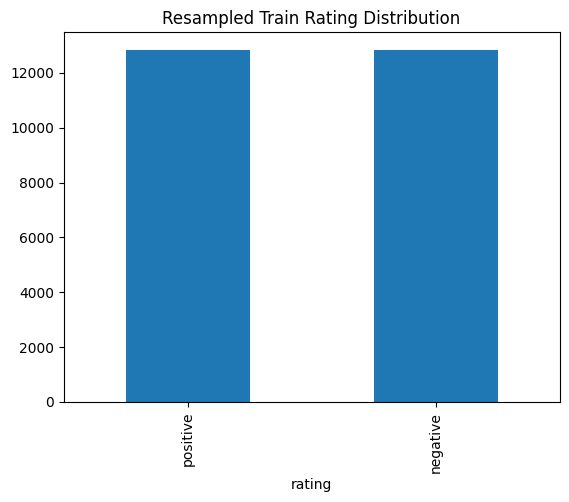

In [241]:
y_train_resampled.value_counts().plot(kind='bar', title='Resampled Train Rating Distribution')

## 7. MODELING

In [242]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### LOGISTIC REGRESSION

----- Logistic Regression -----
              precision    recall  f1-score   support

    negative       0.28      0.42      0.34      1614
    positive       0.80      0.69      0.74      5428

    accuracy                           0.62      7042
   macro avg       0.54      0.55      0.54      7042
weighted avg       0.68      0.62      0.65      7042



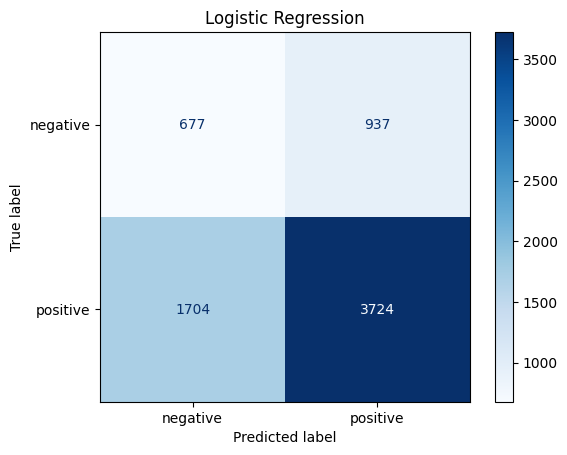

In [243]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_resampled, y_train_resampled)

y_pred_logreg = model_logreg.predict(X_test)

print("----- Logistic Regression -----")
print(classification_report(y_test, y_pred_logreg, target_names=['negative', 'positive']))

cm = confusion_matrix(y_test, y_pred_logreg, labels=['negative', 'positive'])
ConfusionMatrixDisplay(cm, display_labels=['negative', 'positive']).plot(cmap="Blues")
plt.title("Logistic Regression")
plt.show()


=== Logistic Regression - TRAIN ===
              precision    recall  f1-score   support

    negative       0.68      0.70      0.69     12841
    positive       0.69      0.68      0.68     12841

    accuracy                           0.69     25682
   macro avg       0.69      0.69      0.69     25682
weighted avg       0.69      0.69      0.69     25682



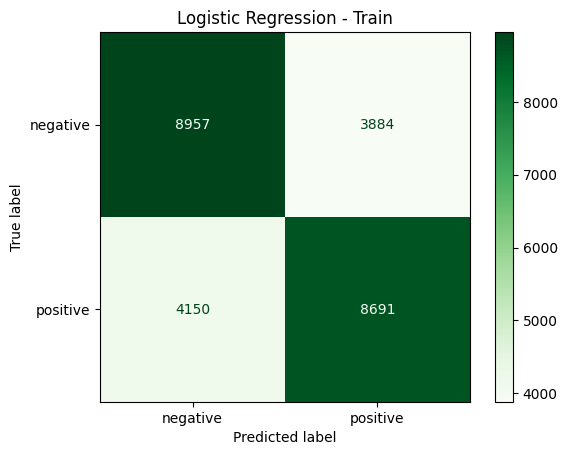

In [244]:
y_pred_train_log = model_logreg.predict(X_train_resampled)

print("=== Logistic Regression - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_log, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_log, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Logistic Regression - Train")
plt.show()

### DECISION TREE

=== Decision Tree - TRAIN ===
              precision    recall  f1-score   support

    negative       0.99      1.00      0.99     12841
    positive       1.00      0.99      0.99     12841

    accuracy                           0.99     25682
   macro avg       0.99      0.99      0.99     25682
weighted avg       0.99      0.99      0.99     25682



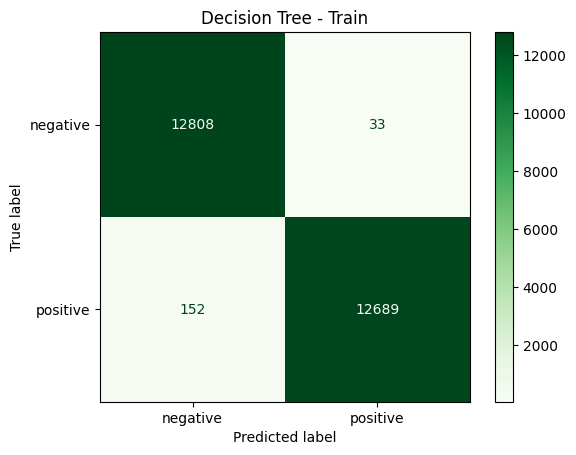

=== Decision Tree - TEST ===
              precision    recall  f1-score   support

    negative       0.35      0.43      0.39      1614
    positive       0.82      0.76      0.79      5428

    accuracy                           0.68      7042
   macro avg       0.58      0.60      0.59      7042
weighted avg       0.71      0.68      0.69      7042



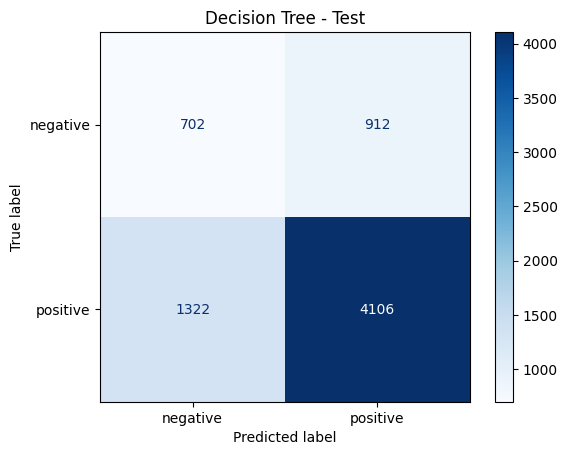

In [245]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_resampled, y_train_resampled)

y_pred_train_tree = model_tree.predict(X_train_resampled)
y_pred_test_tree = model_tree.predict(X_test)

print("=== Decision Tree - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_tree, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Decision Tree - Train")
plt.show()

print("=== Decision Tree - TEST ===")
print(classification_report(y_test, y_pred_test_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_tree, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Decision Tree - Test")
plt.show()

### RANDOM FOREST

=== Random Forest - TRAIN ===
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99     12841
    positive       0.99      0.99      0.99     12841

    accuracy                           0.99     25682
   macro avg       0.99      0.99      0.99     25682
weighted avg       0.99      0.99      0.99     25682



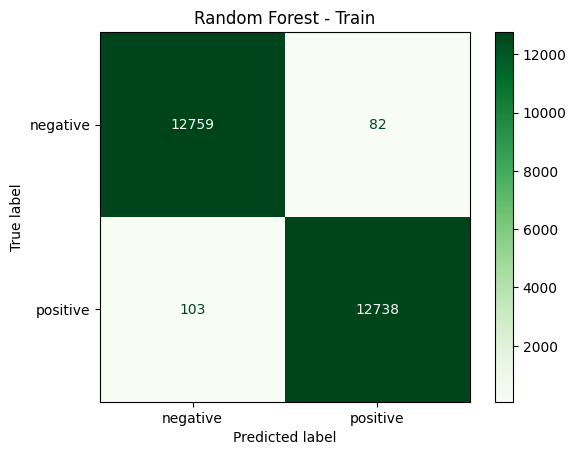

=== Random Forest - TEST ===
              precision    recall  f1-score   support

    negative       0.46      0.39      0.42      1614
    positive       0.83      0.86      0.85      5428

    accuracy                           0.76      7042
   macro avg       0.64      0.63      0.64      7042
weighted avg       0.74      0.76      0.75      7042



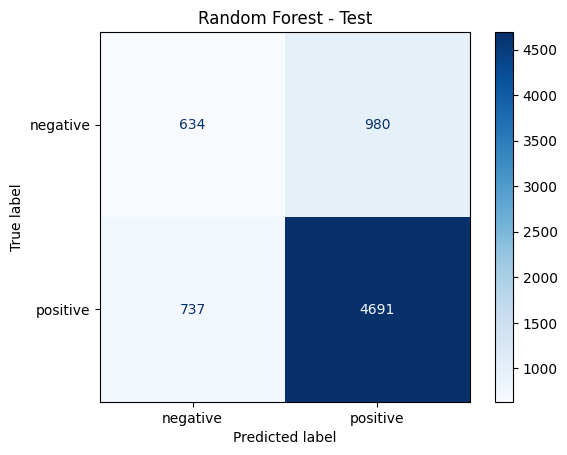

In [246]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test)

print("=== Random Forest - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_rf, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Random Forest - Train")
plt.show()

print("=== Random Forest - TEST ===")
print(classification_report(y_test, y_pred_test_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Random Forest - Test")
plt.show()


### KNN

=== KNN - TRAIN ===
              precision    recall  f1-score   support

    negative       0.81      0.92      0.86     12841
    positive       0.90      0.78      0.84     12841

    accuracy                           0.85     25682
   macro avg       0.85      0.85      0.85     25682
weighted avg       0.85      0.85      0.85     25682



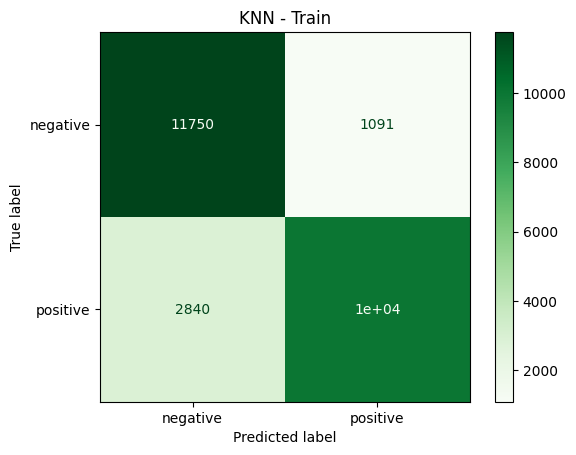

=== KNN - TEST ===
              precision    recall  f1-score   support

    negative       0.39      0.50      0.44      1614
    positive       0.84      0.77      0.80      5428

    accuracy                           0.71      7042
   macro avg       0.62      0.64      0.62      7042
weighted avg       0.74      0.71      0.72      7042



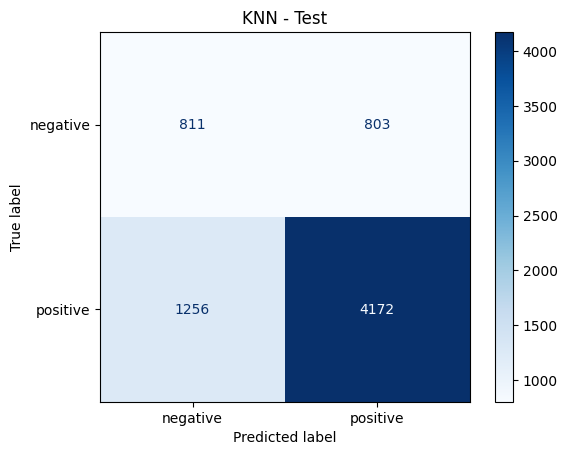

In [247]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

y_pred_train_knn = model_knn.predict(X_train_resampled)
y_pred_test_knn = model_knn.predict(X_test)

print("=== KNN - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_knn, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("KNN - Train")
plt.show()

print("=== KNN - TEST ===")
print(classification_report(y_test, y_pred_test_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("KNN - Test")
plt.show()


### ADA BOOST

=== AdaBoost - TRAIN ===
              precision    recall  f1-score   support

    negative       0.75      0.77      0.76     12841
    positive       0.77      0.75      0.76     12841

    accuracy                           0.76     25682
   macro avg       0.76      0.76      0.76     25682
weighted avg       0.76      0.76      0.76     25682



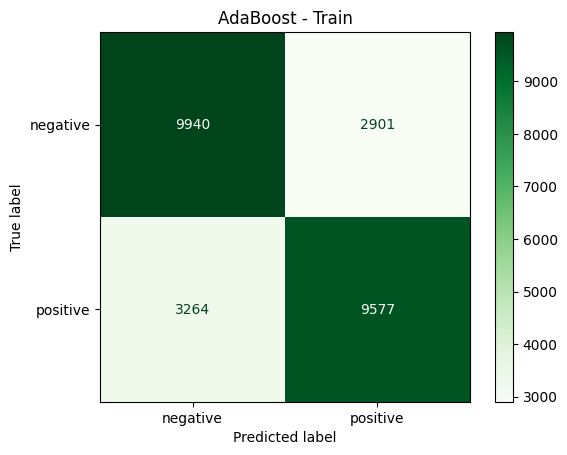

=== AdaBoost - TEST ===
              precision    recall  f1-score   support

    negative       0.37      0.49      0.42      1614
    positive       0.83      0.75      0.79      5428

    accuracy                           0.69      7042
   macro avg       0.60      0.62      0.60      7042
weighted avg       0.72      0.69      0.70      7042



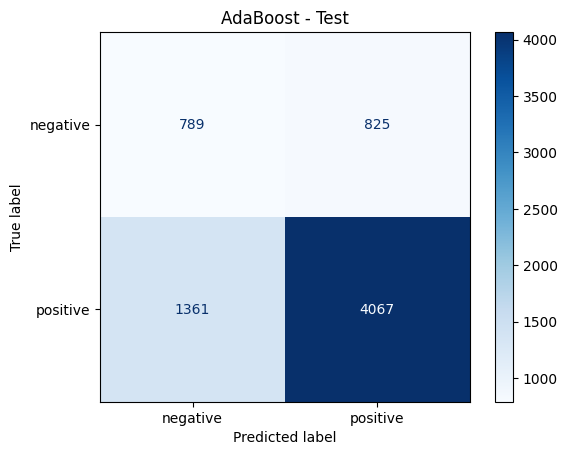

In [248]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train_resampled, y_train_resampled)

y_pred_train_ada = model_ada.predict(X_train_resampled)
y_pred_test_ada = model_ada.predict(X_test)

print("=== AdaBoost - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_ada, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("AdaBoost - Train")
plt.show()

print("=== AdaBoost - TEST ===")
print(classification_report(y_test, y_pred_test_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_ada, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("AdaBoost - Test")
plt.show()


### CATBOOST

=== CatBoost - TRAIN ===
              precision    recall  f1-score   support

    negative       0.91      0.83      0.87     12841
    positive       0.84      0.92      0.88     12841

    accuracy                           0.88     25682
   macro avg       0.88      0.88      0.87     25682
weighted avg       0.88      0.88      0.87     25682



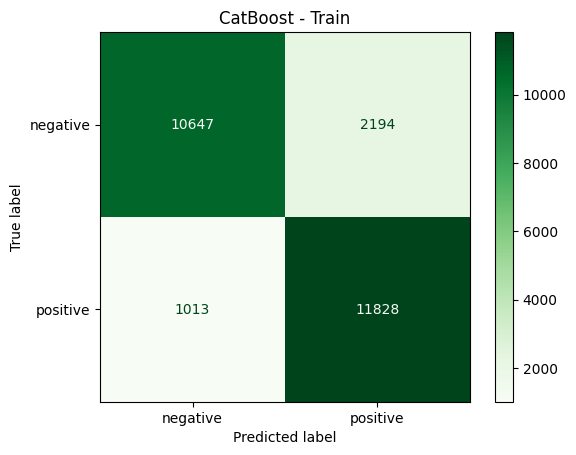

=== CatBoost - TEST ===
              precision    recall  f1-score   support

    negative       0.52      0.32      0.40      1614
    positive       0.82      0.91      0.86      5428

    accuracy                           0.78      7042
   macro avg       0.67      0.62      0.63      7042
weighted avg       0.75      0.78      0.76      7042



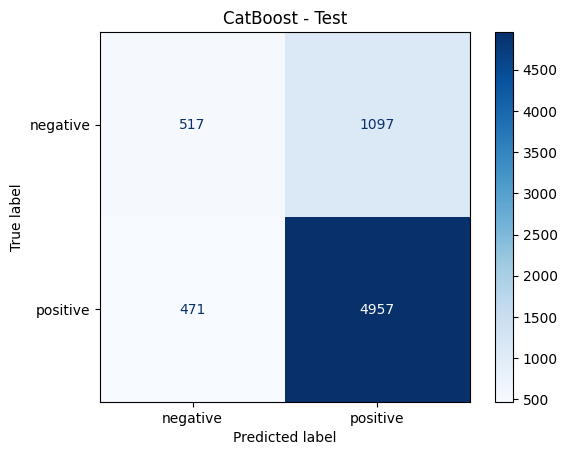

In [249]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(verbose=0, random_state=42)
model_cat.fit(X_train_resampled, y_train_resampled)

y_pred_train_cat = model_cat.predict(X_train_resampled)
y_pred_test_cat = model_cat.predict(X_test)

print("=== CatBoost - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_cat, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("CatBoost - Train")
plt.show()

print("=== CatBoost - TEST ===")
print(classification_report(y_test, y_pred_test_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("CatBoost - Test")
plt.show()


# ATTEMPT 5

## MANAGE DEPENDENCIES

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install sklearn
%pip install scikit-learn
%pip install seaborn
%pip install imblearn
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## PRE-PROCESSING

### Missing Value & Noise Handling

In [ ]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [ ]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'user_reviews'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Supported languages   41157 non-null  object 
 8   Full audio languages  19288 non-null  object 
 9   Developers            41096 non-null  object 
 10  Publishers            40962 non-null  object 
 11  Movies                39366 non-null  object 
 12  rating                41170 non-null  object 
 13  Positive ratio        41170 non-null  int64  
 14  Genres                41126 non-null  object 
 15  Tags               

In [ ]:
missing_values = df_filtered.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df_filtered.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

Missing Values  Percentage
Full audio languages           21882   53.150352
Tags                            3690    8.962837
Movies                          1804    4.381831
Categories                       527    1.280058
Publishers                       208    0.505222
Developers                        74    0.179743
Genres                            44    0.106874
Supported languages               13    0.031576

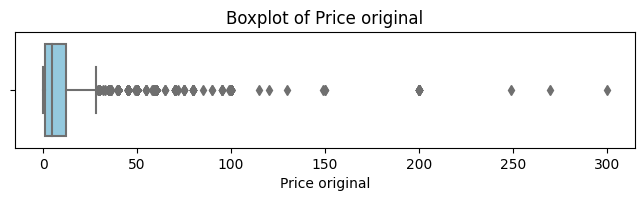

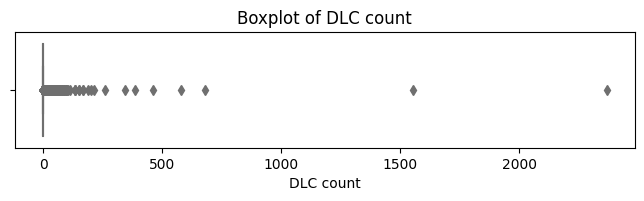

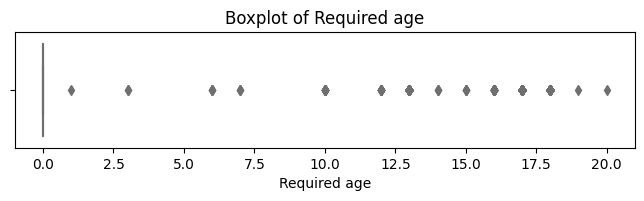

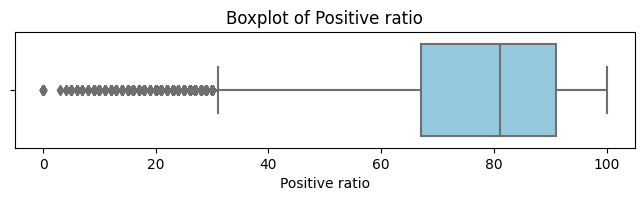

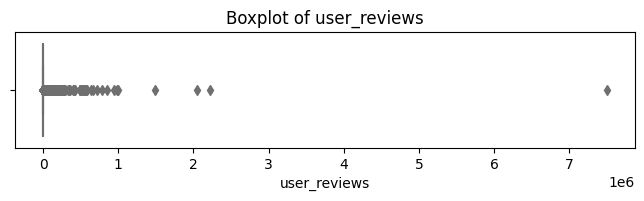

In [ ]:
num_cols = df_filtered.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df_filtered[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
for col in num_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / df_filtered.shape[0]:.2f}%)")

Price original: 2046 outliers (4.97%)
DLC count: 9061 outliers (22.01%)
Required age: 1145 outliers (2.78%)
Positive ratio: 932 outliers (2.26%)
user_reviews: 6533 outliers (15.87%)


In [ ]:
df_filtered['Required age'].value_counts().sort_values(ascending=False)

0     40025
17      732
18      155
13      153
16       54
10       17
12       14
15        5
6         4
14        3
7         3
3         2
20        1
1         1
19        1
Name: Required age, dtype: int64

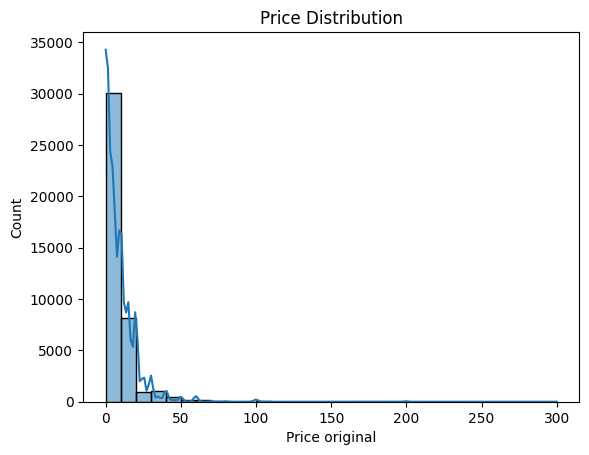

In [ ]:
sns.histplot(df_filtered['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [ ]:
print(df_filtered['Price original'].describe())

count    41170.000000
mean         8.722289
std         11.496071
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.900000
Name: Price original, dtype: float64


In [ ]:
Q1 = df_filtered['Price original'].quantile(0.25)
Q3 = df_filtered['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_filtered[(df_filtered['Price original'] < lower) | (df_filtered['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

Release date  Price original  DLC count  Required age  Windows    Mac  \
33552   2013-11-12          299.90          0             0     True  False   
18732   2018-10-10          269.99          0             0     True   True   
37546   2022-11-01          249.00          0             0     True  False   
39674   2023-03-22          199.99          0             0     True   True   
40504   2023-05-23          199.99          0             0     True   True   
38827   2023-01-27          199.99          0             0     True  False   
40478   2023-05-23          199.99          0             0     True   True   
8118    2022-03-21          199.99          0             0     True  False   
33133   2016-02-02          199.99          0             0     True  False   
7116    2021-09-09          199.99          0             0     True  False   
38224   2022-12-17          199.99          0             0     True   True   
9175    2018-12-03          199.99          0             0     True   True   
36855   2022-09-28          199.99          0             0     True  False   
39277   2023-02-21          199.99          0             0     True   True   
36736   2022-09-19          199.99          0             0     True  False   

       Linux                                Supported languages  \
33552  False                                            English   
18732  False                                            English   
37546  False              English,French,German,Spanish - Spain   
39674   True  English,French,Italian,German,Spanish - Spain,...   
40504   True  English,French,Italian,German,Spanish - Spain,...   
38827  False                                            English   
40478   True  English,French,Italian,German,Spanish - Spain,...   
8118   False                 English,Russian,Simplified Chinese   
33133  False  English,Italian,Japanese,Simplified Chinese,Ge...   
7116   False              English,French,German,Spanish - Spain   
38224   True  English,French,Italian,German,Spanish - Spain,...   
9175   False                                            English   
36855  False                                            English   
39277   True  English,French,Italian,German,Spanish - Spain,...   
36736  False                                            English   

      Full audio languages                        Developers  \
33552                  NaN                          Aartform   
18732                  NaN                            SideFX   
37546                  NaN               MAGIX Software GmbH   
39674                  NaN                            Aztech   
40504                  NaN                      PUZZLE Games   
38827                  NaN                              Hede   
40478                  NaN                      PUZZLE Games   
8118                   NaN  Cristian Manolachi,Atomic Fabrik   
33133                  NaN                        3Dflow SRL   
7116                   NaN               MAGIX Software GmbH   
38224                  NaN                    Top-Down Games   
9175               English                          JEPR DEV   
36855                  NaN  Atomic Fabrik,Cristian Manolachi   
39277                  NaN                    Top-Down Games   
36736                  NaN  Atomic Fabrik,Cristian Manolachi   

                             Publishers  \
33552                          Aartform   
18732                            SideFX   
37546               MAGIX Software GmbH   
39674      Azerbaijan Technology,Aztech   
40504                              Hede   
38827                              Hede   
40478                              Hede   
8118   Cristian Manolachi,Atomic Fabrik   
33133                        3Dflow SRL   
7116                MAGIX Software GmbH   
38224                              Hede   
9175                           JEPR DEV   
36855  Atomic Fabrik,Cristian Manolachi   
39277                              Hede  

In [ ]:
tags_series = df_filtered['Tags'].dropna().str.split(',').explode().str.strip()

tag_counts = tags_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique Tags: {len(tag_counts)}\n")

print("Tag Value Counts:")
print(tag_counts)

Total Unique Tags: 444

Tag Value Counts:
Indie                                23737
Singleplayer                         19671
Adventure                            16660
Action                               16529
Casual                               15117
2D                                    9935
Simulation                            8926
Strategy                              8452
RPG                                   7763
Atmospheric                           7615
Puzzle                                6875
Story Rich                            6360
Multiplayer                           5698
Pixel Graphics                        5305
Early Access                          5201
3D                                    4883
Exploration                           4865
Cute                                  4859
First-Person                          4847
Colorful                              4736
Fantasy                               4497
Funny                                 4450
Anime       

In [ ]:
genres_series = df_filtered['Genres'].dropna().str.split(',').explode().str.strip()

genre_counts = genres_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique Genres: {len(genre_counts)}\n")

print("genre Value Counts:")
print(genre_counts)

Total Unique Genres: 28

genre Value Counts:
Indie                    28898
Action                   17082
Adventure                16830
Casual                   15143
Simulation                9062
Strategy                  8469
RPG                       7940
Free to Play              4779
Early Access              4680
Sports                    1920
Racing                    1559
Massively Multiplayer     1374
Utilities                  452
Violent                    294
Design & Illustration      292
Animation & Modeling       242
Gore                       187
Education                  166
Video Production           143
Game Development           113
Software Training          106
Audio Production           106
Nudity                      89
Sexual Content              70
Web Publishing              67
Photo Editing               66
Accounting                   7
Movie                        1
Name: Genres, dtype: int64


In [ ]:
categories_series = df_filtered['Categories'].dropna().str.split(',').explode().str.strip()

categories_counts = categories_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique Categories: {len(categories_counts)}\n")

print("categorie Value Counts:")
print(tag_counts)

Total Unique Categories: 40

categorie Value Counts:
Indie                                23737
Singleplayer                         19671
Adventure                            16660
Action                               16529
Casual                               15117
2D                                    9935
Simulation                            8926
Strategy                              8452
RPG                                   7763
Atmospheric                           7615
Puzzle                                6875
Story Rich                            6360
Multiplayer                           5698
Pixel Graphics                        5305
Early Access                          5201
3D                                    4883
Exploration                           4865
Cute                                  4859
First-Person                          4847
Colorful                              4736
Fantasy                               4497
Funny                                 4450
A

In [ ]:
# Cleaning
col_to_clean = ['Supported languages', 'Genres', 'Categories', 'Developers', 'Publishers']
df_filtered.dropna(subset=col_to_clean, inplace=True)

df_filtered['Has full audio'] = df_filtered['Full audio languages'].notnull().map({True: 1, False: 0})
df_filtered['Has movie'] = df_filtered['Movies'].notnull().map({True: 1, False: 0})
df_filtered.drop(columns=['Full audio languages', 'Movies'], inplace=True)

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\WilliamVlr\AppData\Local\Temp\ipykernel_6204\1372623064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Has full audio'] = df_filtered['Full audio languages'].notnull().map({True: 1, False: 0})
C:\Users\WilliamVlr\AppData\Local\Temp\ipykernel_6204\1372623064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40376 entries, 0 to 41169
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         40376 non-null  object 
 1   Price original       40376 non-null  float64
 2   DLC count            40376 non-null  int64  
 3   Required age         40376 non-null  int64  
 4   Windows              40376 non-null  bool   
 5   Mac                  40376 non-null  bool   
 6   Linux                40376 non-null  bool   
 7   Supported languages  40376 non-null  object 
 8   Developers           40376 non-null  object 
 9   Publishers           40376 non-null  object 
 10  rating               40376 non-null  object 
 11  Positive ratio       40376 non-null  int64  
 12  Genres               40376 non-null  object 
 13  Tags                 36814 non-null  object 
 14  Categories           40376 non-null  object 
 15  user_reviews         40376 non-null 

In [ ]:
# Remove noise
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training', 'Early Access']
mask = df_filtered['Genres'].str.contains('|'.join(software_keywords), na=False) | df_filtered['Tags'].str.contains('|'.join(software_keywords), na=False)
df_filtered_games_only = df_filtered[~mask].copy()
df_filtered_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34225 entries, 0 to 41168
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         34225 non-null  object 
 1   Price original       34225 non-null  float64
 2   DLC count            34225 non-null  int64  
 3   Required age         34225 non-null  int64  
 4   Windows              34225 non-null  bool   
 5   Mac                  34225 non-null  bool   
 6   Linux                34225 non-null  bool   
 7   Supported languages  34225 non-null  object 
 8   Developers           34225 non-null  object 
 9   Publishers           34225 non-null  object 
 10  rating               34225 non-null  object 
 11  Positive ratio       34225 non-null  int64  
 12  Genres               34225 non-null  object 
 13  Tags                 31271 non-null  object 
 14  Categories           34225 non-null  object 
 15  user_reviews         34225 non-null 

In [ ]:
# Binarize rating
def classify_rating(rating):
    if rating in ['Mostly Positive', 'Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 1
    else:
        return 0
    
df_filtered_games_only['Rating'] = df_filtered_games_only['rating'].apply(classify_rating)
df_filtered_games_only.drop(columns=['rating'], inplace=True)

In [ ]:
df_filtered_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34225 entries, 0 to 41168
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         34225 non-null  object 
 1   Price original       34225 non-null  float64
 2   DLC count            34225 non-null  int64  
 3   Required age         34225 non-null  int64  
 4   Windows              34225 non-null  bool   
 5   Mac                  34225 non-null  bool   
 6   Linux                34225 non-null  bool   
 7   Supported languages  34225 non-null  object 
 8   Developers           34225 non-null  object 
 9   Publishers           34225 non-null  object 
 10  Positive ratio       34225 non-null  int64  
 11  Genres               34225 non-null  object 
 12  Tags                 31271 non-null  object 
 13  Categories           34225 non-null  object 
 14  user_reviews         34225 non-null  int64  
 15  Has full audio       34225 non-null 

In [ ]:
top_developers = df_filtered_games_only['Developers'].value_counts().head(10000).index
top_publishers = df_filtered_games_only['Publishers'].value_counts().head(10000).index

df_filtered_games_only  = df_filtered_games_only[
    df_filtered_games_only['Developers'].isin(top_developers) &
    df_filtered_games_only['Publishers'].isin(top_publishers)
]

### Split Data

In [ ]:
# split into train and test data
from sklearn.model_selection import train_test_split

X = df_filtered_games_only.drop(columns=['Rating'])
y = df_filtered_games_only['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Concat train and test data
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

### Outlier Handling

In [ ]:
# DLC → Has DLC
df_train['Has DLC'] = np.where(df_train['DLC count'] > 0, 1, 0)
df_train.drop(columns=['DLC count'], inplace=True)

# DLC → Has DLC for df_test
df_test['Has DLC'] = np.where(df_test['DLC count'] > 0, 1, 0)
df_test.drop(columns=['DLC count'], inplace=True)

In [ ]:
# Price-based features
df_train['is_free'] = (df_train['Price original'] == 0).astype(int)
df_train['price_log'] = np.log1p(df_train['Price original'])
df_train.drop(columns=['Price original'], inplace=True)

df_test['is_free'] = (df_test['Price original'] == 0).astype(int)
df_test['price_log'] = np.log1p(df_test['Price original'])
df_test.drop(columns=['Price original'], inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         16105 non-null  object 
 1   Required age         16105 non-null  int64  
 2   Windows              16105 non-null  bool   
 3   Mac                  16105 non-null  bool   
 4   Linux                16105 non-null  bool   
 5   Supported languages  16105 non-null  object 
 6   Developers           16105 non-null  object 
 7   Publishers           16105 non-null  object 
 8   Positive ratio       16105 non-null  int64  
 9   Genres               16105 non-null  object 
 10  Tags                 14744 non-null  object 
 11  Categories           16105 non-null  object 
 12  user_reviews         16105 non-null  int64  
 13  Has full audio       16105 non-null  int64  
 14  Has movie            16105 non-null  int64  
 15  Rating               16105 non-n

### Feature Extraction & Engineering

In [ ]:
# make platform count in train by summing Win, Mac, Linux
df_train['platform_count'] = df_train[['Windows', 'Mac', 'Linux']].sum(axis=1)
df_train.drop(columns=['Windows', 'Mac', 'Linux'], inplace=True)

# make platform count in test by summing Win, Mac, Linux
df_test['platform_count'] = df_test[['Windows', 'Mac', 'Linux']].sum(axis=1)
df_test.drop(columns=['Windows', 'Mac', 'Linux'], inplace=True)

In [ ]:
from datetime import datetime

# Convert Release Date to datetime
df_train['Release date'] = pd.to_datetime(df_train['Release date'], errors='coerce')

# Extract release year and quarter
df_train['release_year'] = df_train['Release date'].dt.year
df_train['release_quarter'] = df_train['Release date'].dt.quarter

# Form Release Quartile (e.g., "Q4 2022")
df_train['Release Quartile'] = 'Q' + df_train['release_quarter'].astype(str) + ' ' + df_train['release_year'].astype(str)

# Calculate release age
current_year = datetime.now().year
df_train['release_age'] = current_year - df_train['release_year']

# Extract Q1/Q2/... for one-hot encoding
df_train['release_q'] = df_train['Release Quartile'].str.extract(r'(Q\d)')

# One-hot encode quarters
quarter_dummies = pd.get_dummies(df_train['release_q'], prefix='quarter')
df_train = pd.concat([df_train, quarter_dummies], axis=1)

# Drop intermediate columns
df_train.drop(columns=[
    'Release date', 'release_year', 'release_quarter', 'release_q', 'Release Quartile'
], inplace=True)

In [ ]:
from datetime import datetime

# Convert Release Date to datetime
df_test['Release date'] = pd.to_datetime(df_test['Release date'], errors='coerce')

# Extract release year and quarter
df_test['release_year'] = df_test['Release date'].dt.year
df_test['release_quarter'] = df_test['Release date'].dt.quarter

# Form Release Quartile (e.g., "Q4 2022")
df_test['Release Quartile'] = 'Q' + df_test['release_quarter'].astype(str) + ' ' + df_test['release_year'].astype(str)

# Calculate release age
current_year = datetime.now().year
df_test['release_age'] = current_year - df_test['release_year']

# Extract Q1/Q2/... for one-hot encoding
df_test['release_q'] = df_test['Release Quartile'].str.extract(r'(Q\d)')

# One-hot encode quarters
quarter_dummies_test = pd.get_dummies(df_test['release_q'], prefix='quarter')

# Ensure same columns as training set (in case a quarter is missing in test)
expected_quarters = ['quarter_Q1', 'quarter_Q2', 'quarter_Q3', 'quarter_Q4']
for col in expected_quarters:
    if col not in quarter_dummies_test.columns:
        quarter_dummies_test[col] = 0
quarter_dummies_test = quarter_dummies_test[expected_quarters]  # ensure correct order

# Concatenate to df_test
df_test = pd.concat([df_test, quarter_dummies_test], axis=1)

# Drop intermediate columns
df_test.drop(columns=[
    'Release date', 'release_year', 'release_quarter', 'release_q', 'Release Quartile'
], inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Required age         16105 non-null  int64  
 1   Supported languages  16105 non-null  object 
 2   Developers           16105 non-null  object 
 3   Publishers           16105 non-null  object 
 4   Positive ratio       16105 non-null  int64  
 5   Genres               16105 non-null  object 
 6   Tags                 14744 non-null  object 
 7   Categories           16105 non-null  object 
 8   user_reviews         16105 non-null  int64  
 9   Has full audio       16105 non-null  int64  
 10  Has movie            16105 non-null  int64  
 11  Rating               16105 non-null  int64  
 12  Has DLC              16105 non-null  int32  
 13  is_free              16105 non-null  int32  
 14  price_log            16105 non-null  float64
 15  platform_count       16105 non-n

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Required age         6903 non-null   int64  
 1   Supported languages  6903 non-null   object 
 2   Developers           6903 non-null   object 
 3   Publishers           6903 non-null   object 
 4   Positive ratio       6903 non-null   int64  
 5   Genres               6903 non-null   object 
 6   Tags                 6361 non-null   object 
 7   Categories           6903 non-null   object 
 8   user_reviews         6903 non-null   int64  
 9   Has full audio       6903 non-null   int64  
 10  Has movie            6903 non-null   int64  
 11  Rating               6903 non-null   int64  
 12  Has DLC              6903 non-null   int32  
 13  is_free              6903 non-null   int32  
 14  price_log            6903 non-null   float64
 15  platform_count       6903 non-nul

In [ ]:
languages_series = df_filtered['Supported languages'].dropna().str.split(',').explode().str.strip()

languages_counts = languages_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique languages: {len(languages_counts)}\n")

print("categorie Value Counts:")
print(languages_counts)

Total Unique languages: 123

categorie Value Counts:
English                                                                 38794
German                                                                  12219
French                                                                  11782
Simplified Chinese                                                      11532
Russian                                                                 11147
Spanish - Spain                                                         10827
Japanese                                                                 9207
Italian                                                                  8274
Portuguese - Brazil                                                      6161
Korean                                                                   6068
Traditional Chinese                                                      5801
Polish                                                                   4942
Turkish    

In [ ]:
# Step 1: Count how many languages are supported
df_train['languages_count'] = df_train['Supported languages'].apply(
    lambda x: len(x.split(',')) if pd.notnull(x) else 0
)

# Step 2: Define regional language sets
asian_languages = {
    "Simplified Chinese", "Traditional Chinese", "Japanese", "Korean",
    "Thai", "Vietnamese", "Indonesian", "Hindi", "Telugu", "Tamil", "Malay", "Urdu", "Bengali", "Filipino"
}

european_languages = {
    "English", "French", "German", "Italian", "Spanish - Spain", "Dutch", "Russian", "Portuguese",
    "Portuguese - Brazil", "Polish", "Czech", "Hungarian", "Swedish", "Norwegian", "Finnish", "Greek", "Danish"
}

# Step 3: Helper function to flag regional support
def check_region(supported_langs, region_set):
    if pd.isna(supported_langs):
        return 0
    langs = [lang.strip() for lang in supported_langs.split(',')]
    return int(any(lang in region_set for lang in langs))

# Step 4: Apply grouped region flags
df_train['supports_asian_language'] = df_train['Supported languages'].apply(
    lambda x: check_region(x, asian_languages)
)

df_train['supports_european_language'] = df_train['Supported languages'].apply(
    lambda x: check_region(x, european_languages)
)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Required age                16105 non-null  int64  
 1   Supported languages         16105 non-null  object 
 2   Developers                  16105 non-null  object 
 3   Publishers                  16105 non-null  object 
 4   Positive ratio              16105 non-null  int64  
 5   Genres                      16105 non-null  object 
 6   Tags                        14744 non-null  object 
 7   Categories                  16105 non-null  object 
 8   user_reviews                16105 non-null  int64  
 9   Has full audio              16105 non-null  int64  
 10  Has movie                   16105 non-null  int64  
 11  Rating                      16105 non-null  int64  
 12  Has DLC                     16105 non-null  int32  
 13  is_free                    

In [ ]:
# Apply to df_test
df_test['languages_count'] = df_test['Supported languages'].apply(
    lambda x: len(x.split(',')) if pd.notnull(x) else 0
)

df_test['supports_asian_language'] = df_test['Supported languages'].apply(
    lambda x: check_region(x, asian_languages)
)

df_test['supports_european_language'] = df_test['Supported languages'].apply(
    lambda x: check_region(x, european_languages)
)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Required age                6903 non-null   int64  
 1   Supported languages         6903 non-null   object 
 2   Developers                  6903 non-null   object 
 3   Publishers                  6903 non-null   object 
 4   Positive ratio              6903 non-null   int64  
 5   Genres                      6903 non-null   object 
 6   Tags                        6361 non-null   object 
 7   Categories                  6903 non-null   object 
 8   user_reviews                6903 non-null   int64  
 9   Has full audio              6903 non-null   int64  
 10  Has movie                   6903 non-null   int64  
 11  Rating                      6903 non-null   int64  
 12  Has DLC                     6903 non-null   int32  
 13  is_free                     

In [ ]:
# Step 1: Count how many games each developer has made in df_train only
dev_counts = df_train['Developers'].value_counts()

# Step 2: Map developer game count to both df_train and df_test
df_train['developers_game_count'] = df_train['Developers'].map(dev_counts)
df_test['developers_game_count'] = df_test['Developers'].map(dev_counts).fillna(0).astype(int)  # unseen devs get 0

# Step 3: Define tiering function
def developer_tier(count):
    if count >= 50:
        return 'top_dev'
    elif count >= 10:
        return 'experienced_dev'
    elif count >= 2:
        return 'mid_dev'
    else:
        return 'new_dev'

# Step 4: Apply the tiering to both datasets
df_train['developer_tier'] = df_train['developers_game_count'].apply(developer_tier)
df_test['developer_tier'] = df_test['developers_game_count'].apply(developer_tier)

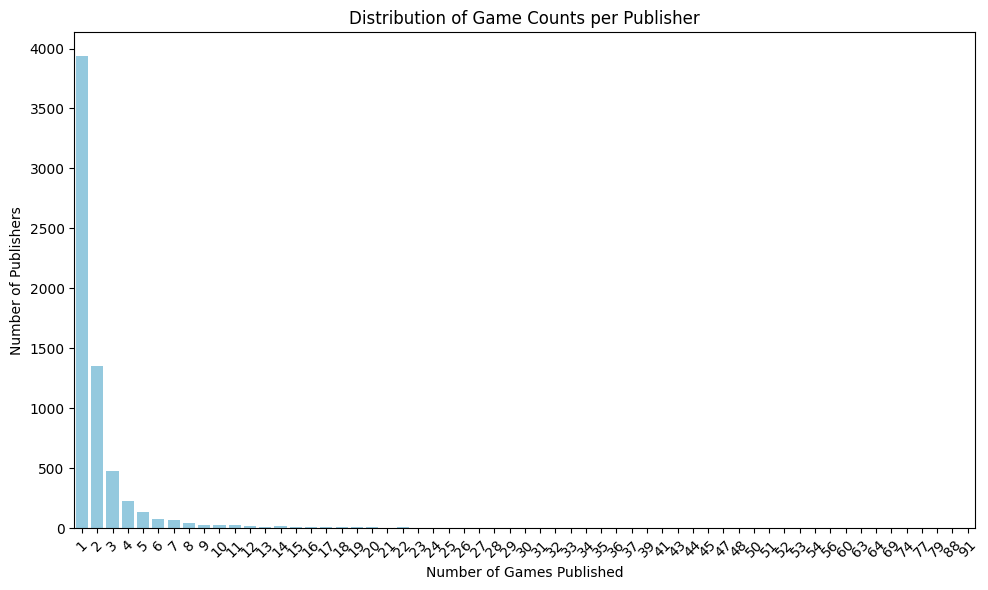

In [ ]:
# Step 1: Count how many games each publisher has made
publisher_game_counts = df_train['Publishers'].value_counts()

# Step 2: Count how many publishers have each of those game counts
publisher_frequency_distribution = publisher_game_counts.value_counts().sort_index()

# Step 3: Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_frequency_distribution.index, y=publisher_frequency_distribution.values, color='skyblue')

plt.xlabel('Number of Games Published')
plt.ylabel('Number of Publishers')
plt.title('Distribution of Game Counts per Publisher')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Count how many games each publisher has made using only df_train
pub_counts = df_train['Publishers'].value_counts()

# Step 2: Map publisher game count to both df_train and df_test
df_train['publishers_game_count'] = df_train['Publishers'].map(pub_counts)
df_test['publishers_game_count'] = df_test['Publishers'].map(pub_counts).fillna(0).astype(int)  # unseen = 0

# Step 3: Define publisher tier function
def publisher_tier(count):
    if count >= 45:
        return 'top_pub'
    elif count >= 10:
        return 'experienced_pub'
    elif count >= 2:
        return 'mid_pub'
    else:
        return 'new_pub'

# Step 4: Apply tiering function
df_train['publisher_tier'] = df_train['publishers_game_count'].apply(publisher_tier)
df_test['publisher_tier'] = df_test['publishers_game_count'].apply(publisher_tier)


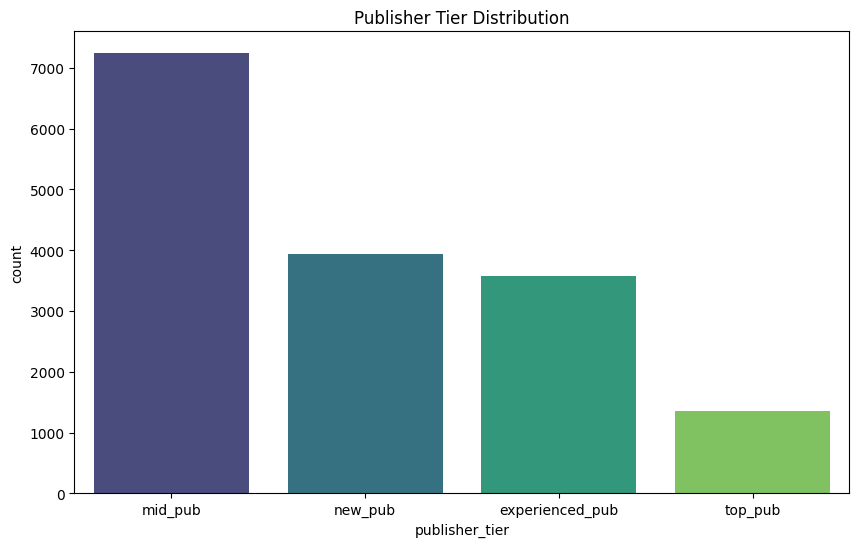

In [ ]:
# bar plot publisher tier count
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='publisher_tier', order=df_train['publisher_tier'].value_counts().index, palette='viridis')
plt.title('Publisher Tier Distribution')
plt.show()


### ENCODING

In [ ]:
from collections import Counter

# Step 1: Clean & normalize Genres in train
df_train['Genres'] = df_train['Genres'].fillna('').apply(
    lambda x: ','.join(sorted(set(i.strip() for i in x.split(','))) if x else [])
)

# Step 2: Get genre frequency from train only
genre_series_train = df_train['Genres'].str.split(',').explode().str.strip()
genre_counts = Counter(genre_series_train)
total_genre_mentions = sum(genre_counts.values())

# Step 3: Preserve genres contributing to 95% of train data
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

cumulative = 0
top_genres = []
for genre, count in sorted_genres:
    cumulative += count
    top_genres.append(genre)
    if cumulative / total_genre_mentions >= 0.95:
        break

print(f"🎯 Top Genres Used for Encoding (95% coverage):\n{top_genres}\n")

🎯 Top Genres Used for Encoding (95% coverage):
['Indie', 'Adventure', 'Casual', 'Action', 'Simulation', 'Strategy', 'RPG', 'Free to Play']



In [ ]:
for genre in top_genres:
    col_name = f'genre_{genre.lower().replace(" ", "_")}'
    df_train[col_name] = df_train['Genres'].apply(lambda x: int(genre in x.split(',')) if pd.notnull(x) else 0)
    df_test[col_name] = df_test['Genres'].apply(lambda x: int(genre in x.split(',')) if pd.notnull(x) else 0)

# Step 6: Add genre count column to both
df_train['genre_count'] = df_train['Genres'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
df_test['genre_count'] = df_test['Genres'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Step 7: Drop original Genres column
df_train.drop(columns=['Genres'], inplace=True)
df_test.drop(columns=['Genres'], inplace=True)

In [ ]:
category_series = df_train['Categories'].dropna().str.split(',').explode().str.strip()
category_counts = Counter(category_series)

# Step 3: Get top categories preserving 95% distribution
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
total_mentions = sum(category_counts.values())

cumulative = 0
top_categories = []
for category, count in sorted_categories:
    cumulative += count
    top_categories.append(category)
    if cumulative / total_mentions >= 0.95:
        break

# Step 4: Add domain-knowledge-based important categories
important_manual_categories = ['In-App Purchases']
top_categories = list(set(top_categories) | set(important_manual_categories))

print(f"🎯 Final Categories for Encoding (95% + manual):\n{top_categories}")

🎯 Final Categories for Encoding (95% + manual):
['Remote Play Together', 'Steam Achievements', 'Remote Play on TV', 'Single-player', 'Steam Trading Cards', 'Shared/Split Screen Co-op', 'Online Co-op', 'Shared/Split Screen PvP', 'In-App Purchases', 'Full controller support', 'Steam Leaderboards', 'Online PvP', 'PvP', 'Multi-player', 'Partial Controller Support', 'Cross-Platform Multiplayer', 'Shared/Split Screen', 'Co-op', 'Steam Cloud', 'Stats']


In [ ]:
# Step 1: One-hot encode categories using top_categories list
for category in top_categories:
    col_name = f'cat_{category.lower().replace(" ", "_").replace("-", "_")}'
    df_train[col_name] = df_train['Categories'].apply(lambda x: int(category in x.split(',')))
    df_test[col_name] = df_test['Categories'].apply(lambda x: int(category in x.split(',')))

# Step 2: Check created category columns
cat_cols = [col for col in df_train.columns if col.startswith('cat_')]
print(f"Created category columns ({len(cat_cols)}):\n{cat_cols}")

Created category columns (20):
['cat_remote_play_together', 'cat_steam_achievements', 'cat_remote_play_on_tv', 'cat_single_player', 'cat_steam_trading_cards', 'cat_shared/split_screen_co_op', 'cat_online_co_op', 'cat_shared/split_screen_pvp', 'cat_in_app_purchases', 'cat_full_controller_support', 'cat_steam_leaderboards', 'cat_online_pvp', 'cat_pvp', 'cat_multi_player', 'cat_partial_controller_support', 'cat_cross_platform_multiplayer', 'cat_shared/split_screen', 'cat_co_op', 'cat_steam_cloud', 'cat_stats']


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Required age                    16105 non-null  int64  
 1   Supported languages             16105 non-null  object 
 2   Developers                      16105 non-null  object 
 3   Publishers                      16105 non-null  object 
 4   Positive ratio                  16105 non-null  int64  
 5   Tags                            14744 non-null  object 
 6   Categories                      16105 non-null  object 
 7   user_reviews                    16105 non-null  int64  
 8   Has full audio                  16105 non-null  int64  
 9   Has movie                       16105 non-null  int64  
 10  Rating                          16105 non-null  int64  
 11  Has DLC                         16105 non-null  int32  
 12  is_free                     

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Required age                    6903 non-null   int64  
 1   Supported languages             6903 non-null   object 
 2   Developers                      6903 non-null   object 
 3   Publishers                      6903 non-null   object 
 4   Positive ratio                  6903 non-null   int64  
 5   Tags                            6361 non-null   object 
 6   Categories                      6903 non-null   object 
 7   user_reviews                    6903 non-null   int64  
 8   Has full audio                  6903 non-null   int64  
 9   Has movie                       6903 non-null   int64  
 10  Rating                          6903 non-null   int64  
 11  Has DLC                         6903 non-null   int32  
 12  is_free                      

In [ ]:
# STEP 1: Compute developer stats from TRAIN ONLY
dev_stats = df_train.groupby('Developers').agg({
    'user_reviews': 'sum',
    'Positive ratio': 'mean',
    'Developers': 'count'  # counts number of games per developer
}).rename(columns={'Developers': 'game_count'}).reset_index()

# STEP 2: Define "great developers" based on thresholds
great_devs = dev_stats[
    (dev_stats['user_reviews'] >= 10000) &          # Popularity
    (dev_stats['Positive ratio'] >= 70) &       # Quality
    (dev_stats['game_count'] >= 30)             # Consistency
]['Developers'].tolist()

print(f"🎯 Selected Great Developers:\n{great_devs}")


🎯 Selected Great Developers:
['KOEI TECMO GAMES CO., LTD.', 'Sokpop Collective', 'Winged Cloud']


In [ ]:
# STEP 3: One-hot encode each great developer in TRAIN and TEST
for dev in great_devs:
    col_name = f"dev_{dev.lower().replace(' ', '_').replace('-', '_')}"
    df_train[col_name] = (df_train['Developers'] == dev).astype(int)
    df_test[col_name] = (df_test['Developers'] == dev).astype(int)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Required age                    16105 non-null  int64  
 1   Supported languages             16105 non-null  object 
 2   Developers                      16105 non-null  object 
 3   Publishers                      16105 non-null  object 
 4   Positive ratio                  16105 non-null  int64  
 5   Tags                            14744 non-null  object 
 6   Categories                      16105 non-null  object 
 7   user_reviews                    16105 non-null  int64  
 8   Has full audio                  16105 non-null  int64  
 9   Has movie                       16105 non-null  int64  
 10  Rating                          16105 non-null  int64  
 11  Has DLC                         16105 non-null  int32  
 12  is_free                     

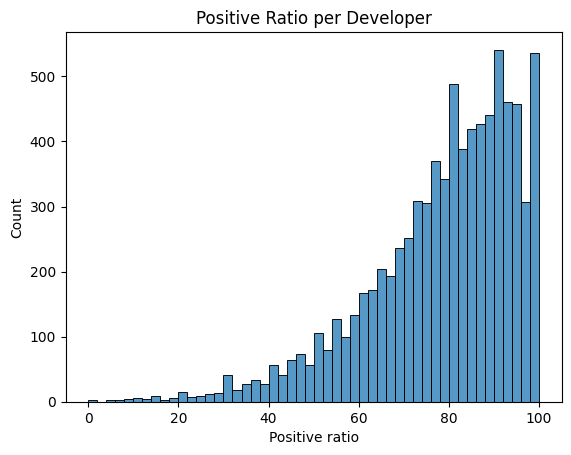

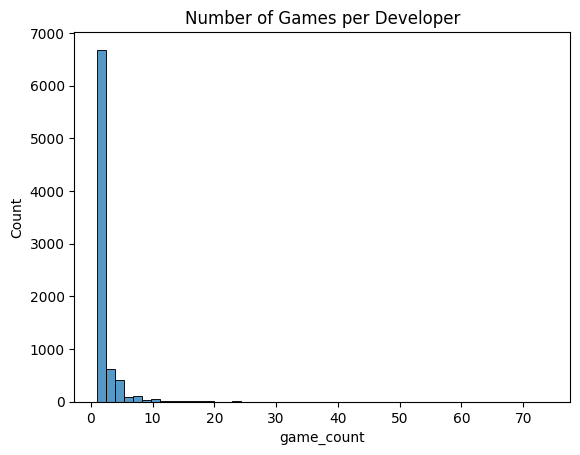

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot positive ratio
sns.histplot(dev_stats['Positive ratio'], bins=50)
plt.title("Positive Ratio per Developer")
plt.show()

# Plot game count
sns.histplot(dev_stats['game_count'], bins=50)
plt.title("Number of Games per Developer")
plt.show()


In [ ]:
# STEP 1: Compute developer stats from TRAIN ONLY
pub_stats = df_train.groupby('Publishers').agg({
    'Positive ratio': 'mean',
    'Publishers': 'count'  # counts number of games per developer
}).rename(columns={'Publishers': 'game_count'}).reset_index()


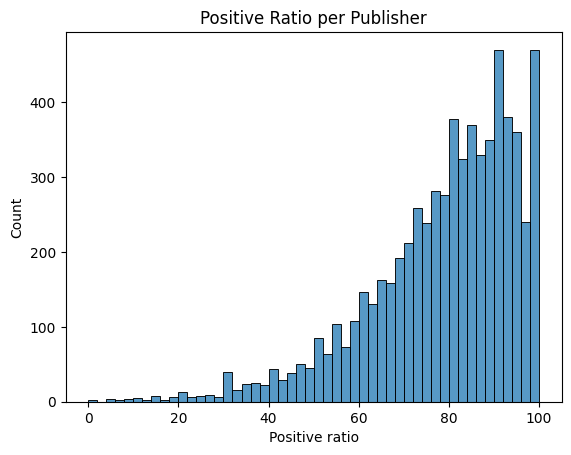

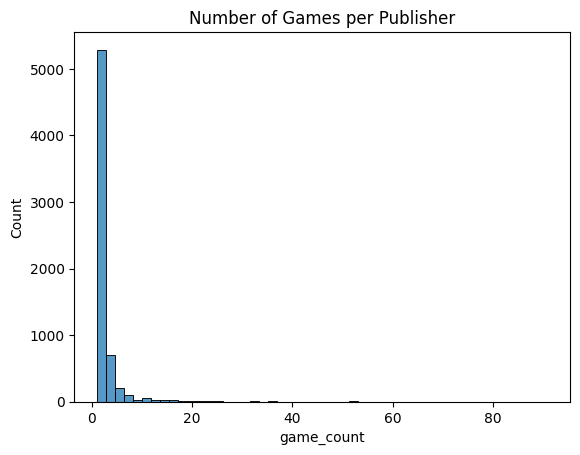

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot positive ratio
sns.histplot(pub_stats['Positive ratio'], bins=50)
plt.title("Positive Ratio per Publisher")
plt.show()

# Plot game count
sns.histplot(pub_stats['game_count'], bins=50)
plt.title("Number of Games per Publisher")
plt.show()

In [ ]:
# STEP 2: Define "great Publishers" based on thresholds
great_pubs = pub_stats[
    (pub_stats['Positive ratio'] >= 80) &       # Quality
    (pub_stats['game_count'] >= 50)             # Consistency
]['Publishers'].tolist()

print(f"🎯 Selected Great Publishers:\n{great_pubs}")

🎯 Selected Great Publishers:
['Atomic Fabrik,Cristian Manolachi', 'Big Fish Games', 'Devolver Digital', 'Komodo', 'Laush Studio', 'SEGA', 'Sekai Project']


In [ ]:
# STEP 3: One-hot encode each great developer in TRAIN and TEST
for pub in great_pubs:
    col_name = f"pub_{pub.lower().replace(' ', '_').replace('-', '_')}"
    df_train[col_name] = (df_train['Publishers'] == pub).astype(int)
    df_test[col_name] = (df_test['Publishers'] == pub).astype(int)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          16105 non-null  int64  
 1   Supported languages                   16105 non-null  object 
 2   Developers                            16105 non-null  object 
 3   Publishers                            16105 non-null  object 
 4   Positive ratio                        16105 non-null  int64  
 5   Tags                                  14744 non-null  object 
 6   Categories                            16105 non-null  object 
 7   user_reviews                          16105 non-null  int64  
 8   Has full audio                        16105 non-null  int64  
 9   Has movie                             16105 non-null  int64  
 10  Rating                                16105 non-null  int64  
 11  Has DLC    

In [ ]:
# Ordinal maps
dev_tier_map = {
    'new_dev': 0,
    'mid_dev': 1,
    'experienced_dev': 2,
    'top_dev': 3
}

pub_tier_map = {
    'new_pub': 0,
    'mid_pub': 1,
    'experienced_pub': 2,
    'top_pub': 3
}

In [ ]:
# Apply to train
df_train['developer_tier'] = df_train['developer_tier'].map(dev_tier_map)
df_train['publisher_tier'] = df_train['publisher_tier'].map(pub_tier_map)

# Apply to test
df_test['developer_tier'] = df_test['developer_tier'].map(dev_tier_map)
df_test['publisher_tier'] = df_test['publisher_tier'].map(pub_tier_map)


In [ ]:
df_train_final = df_train.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio'])
df_test_final = df_test.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio'])

In [ ]:
df_train_final = df_train.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio', 'user_reviews'])
df_test_final = df_test.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio', 'user_reviews'])

Correlation with rating:
Rating                                  1.000000
cat_steam_cloud                         0.123731
cat_steam_achievements                  0.111528
cat_full_controller_support             0.096543
Has DLC                                 0.086680
supports_asian_language                 0.076017
cat_single_player                       0.067996
platform_count                          0.065440
cat_remote_play_on_tv                   0.050402
price_log                               0.043878
languages_count                         0.040763
cat_steam_leaderboards                  0.039720
genre_indie                             0.039352
pub_sekai_project                       0.028560
cat_remote_play_together                0.027051
pub_devolver_digital                    0.026752
genre_casual                            0.026029
cat_shared/split_screen_co_op           0.023764
genre_adventure                         0.022836
pub_laush_studio                        0.02

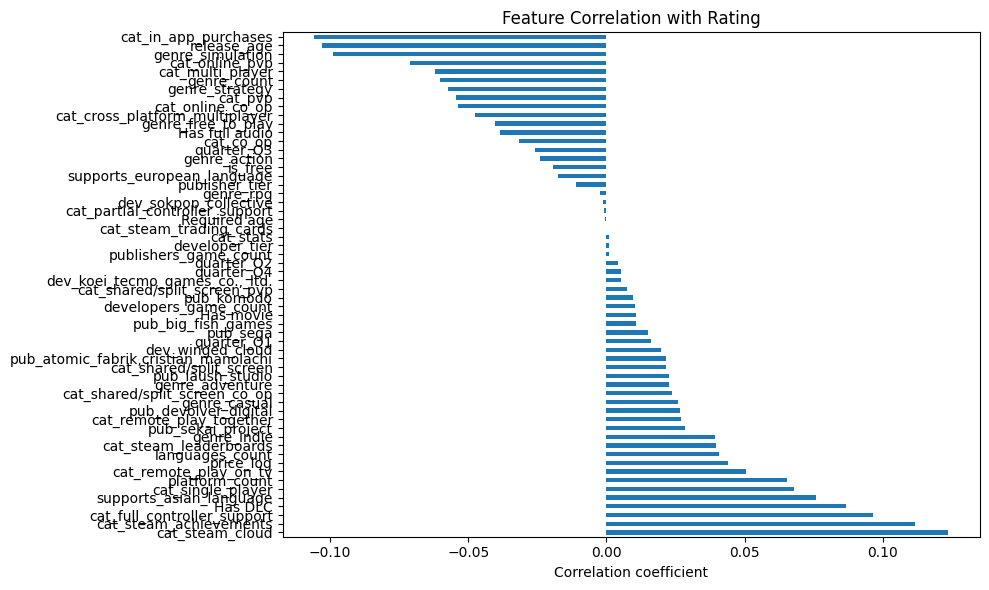

In [ ]:
# Select only numeric columns for correlation
numeric_cols = df_train_final.select_dtypes(include=['number']).columns
corr_with_rating = df_train_final[numeric_cols].corr()['Rating'].sort_values(ascending=False)
print("Correlation with rating:")
print(corr_with_rating)

# Optional: Barplot for visualization
plt.figure(figsize=(10, 6))
corr_with_rating.drop('Rating').plot(kind='barh')
plt.title("Feature Correlation with Rating")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

## MODELING

### PREPARATION

In [ ]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          16105 non-null  int64  
 1   Has full audio                        16105 non-null  int64  
 2   Has movie                             16105 non-null  int64  
 3   Rating                                16105 non-null  int64  
 4   Has DLC                               16105 non-null  int32  
 5   is_free                               16105 non-null  int32  
 6   price_log                             16105 non-null  float64
 7   platform_count                        16105 non-null  int64  
 8   release_age                           16105 non-null  int64  
 9   quarter_Q1                            16105 non-null  uint8  
 10  quarter_Q2                            16105 non-null  uint8  
 11  quarter_Q3 

In [ ]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          6903 non-null   int64  
 1   Has full audio                        6903 non-null   int64  
 2   Has movie                             6903 non-null   int64  
 3   Rating                                6903 non-null   int64  
 4   Has DLC                               6903 non-null   int32  
 5   is_free                               6903 non-null   int32  
 6   price_log                             6903 non-null   float64
 7   platform_count                        6903 non-null   int64  
 8   release_age                           6903 non-null   int64  
 9   quarter_Q1                            6903 non-null   uint8  
 10  quarter_Q2                            6903 non-null   uint8  
 11  quarter_Q3  

In [ ]:
# split back train data into x and y
X_train = df_train_final.drop(columns=['Rating'])
y_train = df_train_final['Rating']

# split back test data into x and y
X_test = df_test.drop(columns=['Rating'])
y_test = df_test['Rating']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=1000, solver='lbfgs')
cv = StratifiedKFold(n_splits=5)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='precision', verbose=1)
rfecv.fit(X_train, y_train)

selected_features = X_train.columns[rfecv.support_]
print(f"\n Optimal number of features: {rfecv.n_features_}")
print(f"Selected features:\n{selected_features.tolist()}")

X_train_selected_rfecv = X_train[selected_features]


Fitting estimator with 58 features.


c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

Optimal number of features: 54
Selected features:
['Has full audio', 'Has movie', 'Has DLC', 'is_free', 'price_log', 'platform_count', 'release_age', 'quarter_Q1', 'quarter_Q3', 'quarter_Q4', 'supports_asian_language', 'supports_european_language', 'developers_game_count', 'developer_tier', 'publisher_tier', 'genre_indie', 'genre_adventure', 'genre_casual', 'genre_action', 'genre_simulation', 'genre_strategy', 'genre_rpg', 'genre_free_to_play', 'genre_count', 'cat_remote_play_together', 'cat_steam_achievements', 'cat_remote_play_on_tv', 'cat_single_player', 'cat_steam_trading_cards', 'cat_shared/split_screen_co_op', 'cat_online_co_op', 'cat_shared/split_screen_pvp', 'cat_in_app_purchases', 'cat_full_controller_support', 'cat_steam_leaderboards', 'cat_online_pvp', 'cat_pvp', 'cat_multi_player', 'cat_partial_controller_support', 'cat_cross_platform_multiplayer', 'cat_shared/split_screen', 'cat_co_op', 'cat_steam_cloud', 'cat_stats', 'dev_koei_tecmo_games_co.,_ltd.', 'dev_sokpop_collectiv

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


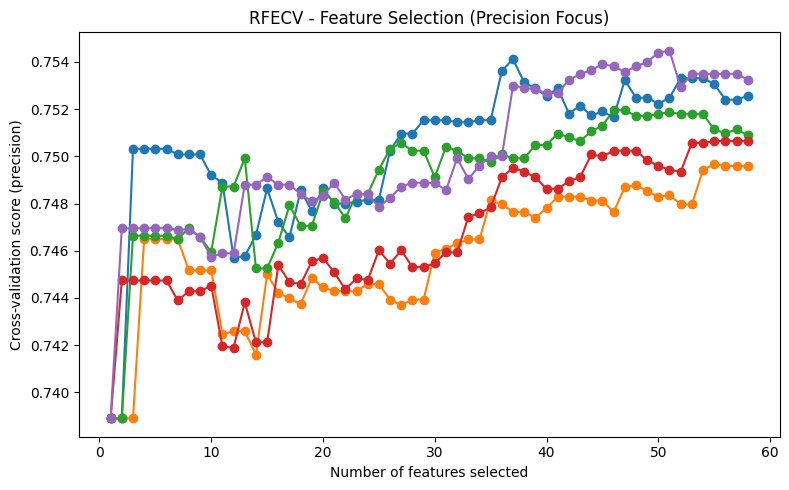

In [ ]:
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features:")
selected_features = X_train.columns[rfecv.support_]
print(selected_features.tolist())

plt.figure(figsize=(8, 5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (precision)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, marker='o')
plt.title("RFECV - Feature Selection (Precision Focus)")
plt.tight_layout()
plt.show()

In [ ]:
X_train_selected_rfecv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Has full audio                        16105 non-null  int64  
 1   Has movie                             16105 non-null  int64  
 2   Has DLC                               16105 non-null  int32  
 3   is_free                               16105 non-null  int32  
 4   price_log                             16105 non-null  float64
 5   platform_count                        16105 non-null  int64  
 6   release_age                           16105 non-null  int64  
 7   quarter_Q1                            16105 non-null  uint8  
 8   quarter_Q3                            16105 non-null  uint8  
 9   quarter_Q4                            16105 non-null  uint8  
 10  supports_asian_language               16105 non-null  int64  
 11  supports_eu

<AxesSubplot:title={'center':'Resampled Train Rating Distribution'}>

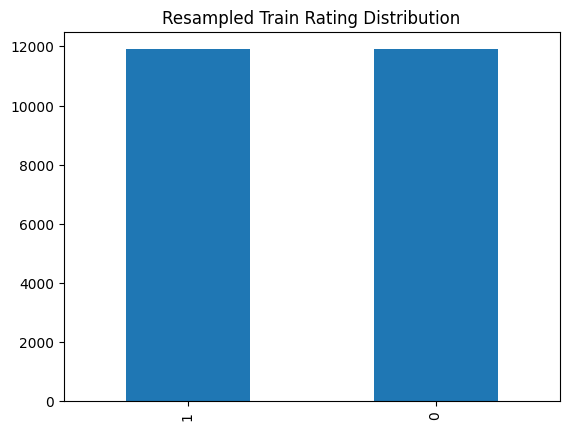

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected_rfecv, y_train)

y_train_resampled.value_counts().plot(kind='bar', title='Resampled Train Rating Distribution')

In [ ]:
X_test_selected = X_test[X_train_selected_rfecv.columns]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Top 20 Important Features:
                        feature  importance
4                     price_log    0.115423
6                   release_age    0.113258
12        developers_game_count    0.075699
23                  genre_count    0.059608
14               publisher_tier    0.040753
42              cat_steam_cloud    0.034424
5                platform_count    0.029709
25       cat_steam_achievements    0.029204
2                       Has DLC    0.027620
0                Has full audio    0.027370
13               developer_tier    0.027145
10      supports_asian_language    0.026022
16              genre_adventure    0.024446
17                 genre_casual    0.024272
33  cat_full_controller_support    0.023810
18                 genre_action    0.023792
9                    quarter_Q4    0.022509
15                  genre_indie    0.021561
8                    quarter_Q3    0.021156
7                    quarter_Q1    0.020156


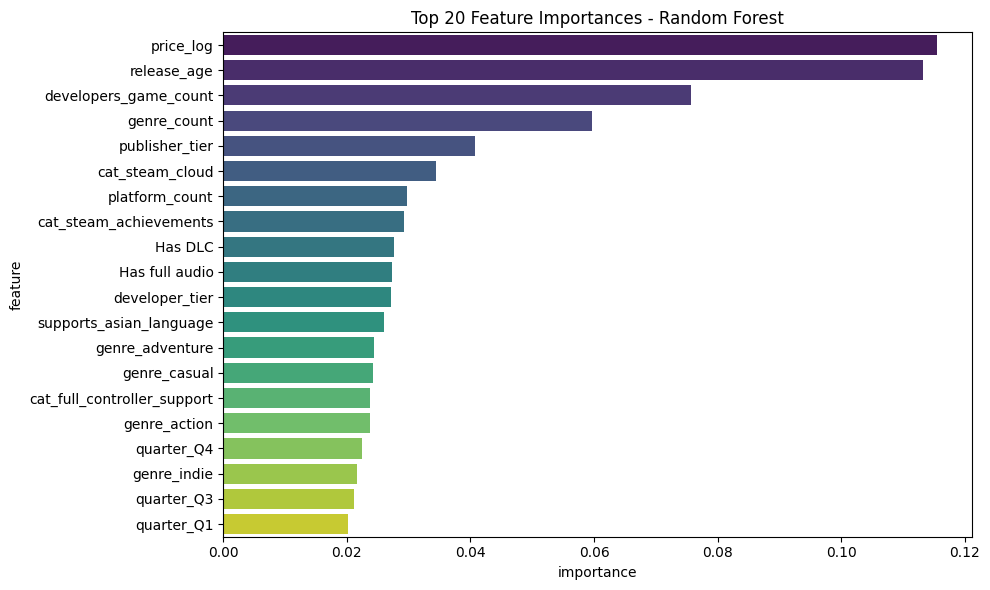

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test_selected)

# Get feature importances
importances = model_rf.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'feature': X_train_resampled.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display top 20 important features
print("Top 20 Important Features:")
print(feature_importance_df.head(20))

# Plot top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance_df.head(20),
    y='feature',
    x='importance',
    palette='viridis'
)
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
top_20_features = feature_importance_df.head(20)['feature'].tolist()
X_train_resampled = X_train_resampled[top_20_features]
X_test_selected = X_test_selected[top_20_features]

### MODEL 1 - LOGISTIC REGRESSION

=============== LOGISTIC REGRESSION - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.69      0.70      0.69     11900
    positive       0.69      0.68      0.69     11900

    accuracy                           0.69     23800
   macro avg       0.69      0.69      0.69     23800
weighted avg       0.69      0.69      0.69     23800



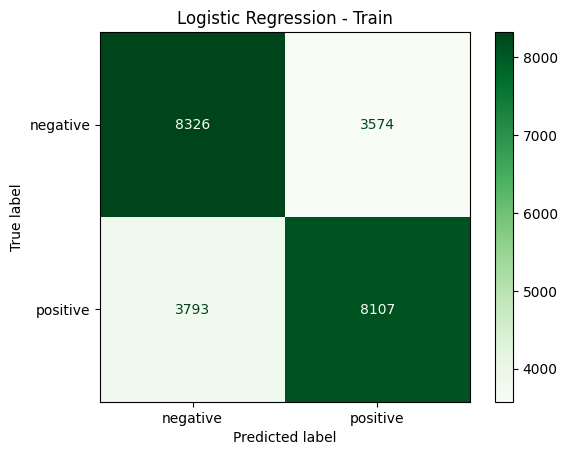

=============== LOGISTIC REGRESSION - TEST ===============
              precision    recall  f1-score   support

    negative       0.36      0.52      0.42      1741
    positive       0.81      0.69      0.75      5162

    accuracy                           0.65      6903
   macro avg       0.58      0.60      0.58      6903
weighted avg       0.70      0.65      0.66      6903



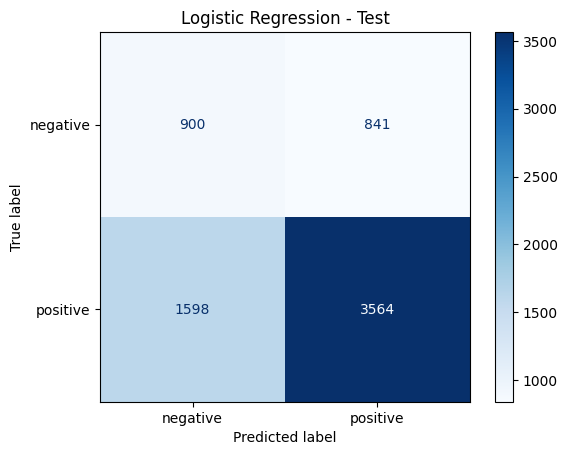

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_resampled, y_train_resampled)

y_pred_train_logreg = model_logreg.predict(X_train_resampled)
y_pred_test_logreg = model_logreg.predict(X_test_selected)

print("=============== LOGISTIC REGRESSION - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_logreg, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Logistic Regression - Train")
plt.show()

print("=============== LOGISTIC REGRESSION - TEST ===============")
print(classification_report(y_test, y_pred_test_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_logreg, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Logistic Regression - Test")
plt.show()


In [ ]:
print("Highest iteration:", model_logreg.n_iter_)

Highest iteration: [82]


### MODEL 2 - DECISION TREE

=============== DECISION TREE - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.99      1.00      0.99     11900
    positive       1.00      0.99      0.99     11900

    accuracy                           0.99     23800
   macro avg       0.99      0.99      0.99     23800
weighted avg       0.99      0.99      0.99     23800



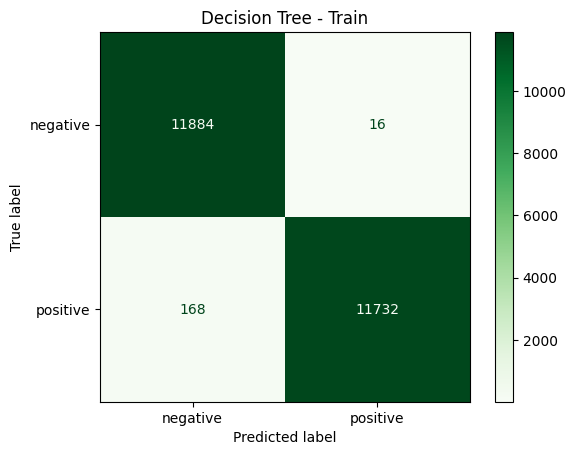

=============== DECISION TREE - TEST ===============
              precision    recall  f1-score   support

    negative       0.35      0.47      0.40      1741
    positive       0.80      0.71      0.75      5162

    accuracy                           0.65      6903
   macro avg       0.57      0.59      0.57      6903
weighted avg       0.68      0.65      0.66      6903



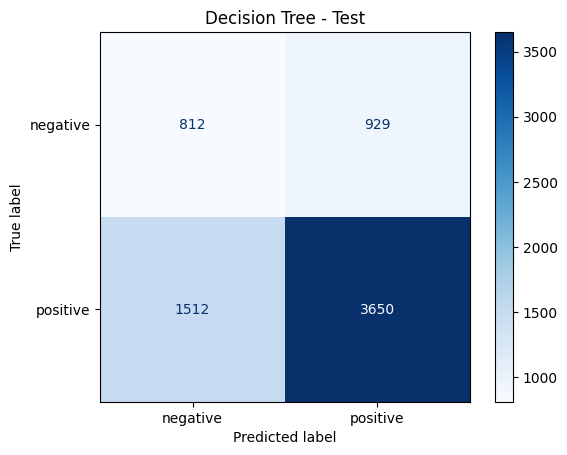

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_resampled, y_train_resampled)

y_pred_train_tree = model_tree.predict(X_train_resampled)
y_pred_test_tree = model_tree.predict(X_test_selected)

print("=============== DECISION TREE - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_tree, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Decision Tree - Train")
plt.show()

print("=============== DECISION TREE - TEST ===============")
print(classification_report(y_test, y_pred_test_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_tree, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Decision Tree - Test")
plt.show()

### MODEL 3 - RANDOM FOREST

=============== RANDOM FOREST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99     11900
    positive       0.99      0.99      0.99     11900

    accuracy                           0.99     23800
   macro avg       0.99      0.99      0.99     23800
weighted avg       0.99      0.99      0.99     23800



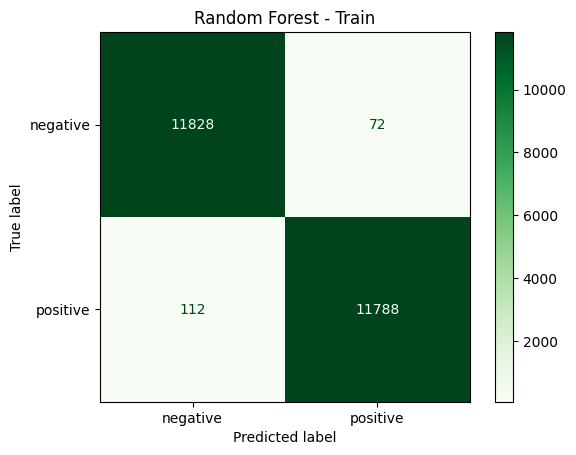

=============== RANDOM FOREST - TEST ===============
              precision    recall  f1-score   support

    negative       0.45      0.45      0.45      1741
    positive       0.81      0.81      0.81      5162

    accuracy                           0.72      6903
   macro avg       0.63      0.63      0.63      6903
weighted avg       0.72      0.72      0.72      6903



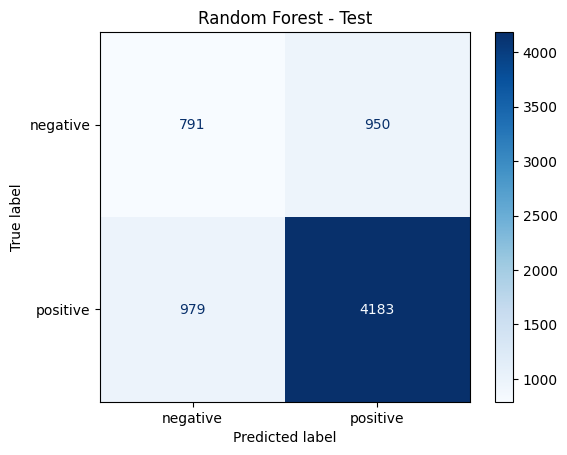

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test_selected)

print("=============== RANDOM FOREST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_rf, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Random Forest - Train")
plt.show()

print("=============== RANDOM FOREST - TEST ===============")
print(classification_report(y_test, y_pred_test_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Random Forest - Test")
plt.show()


### MODEL 4 - KNN

=============== KNN - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.79      0.95      0.86     11900
    positive       0.94      0.75      0.83     11900

    accuracy                           0.85     23800
   macro avg       0.86      0.85      0.85     23800
weighted avg       0.86      0.85      0.85     23800



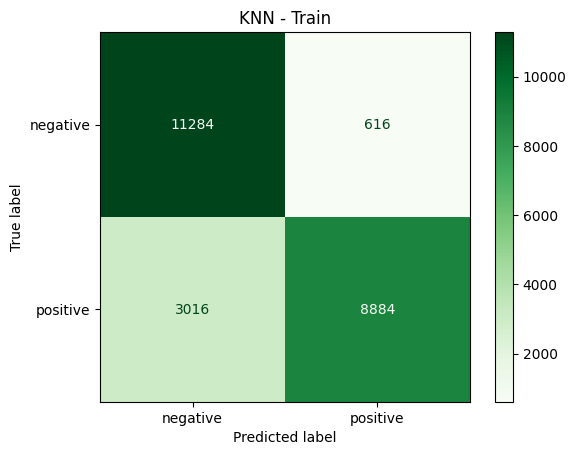

=============== KNN - TEST ===============
              precision    recall  f1-score   support

    negative       0.37      0.61      0.46      1741
    positive       0.83      0.64      0.72      5162

    accuracy                           0.64      6903
   macro avg       0.60      0.63      0.59      6903
weighted avg       0.71      0.64      0.66      6903



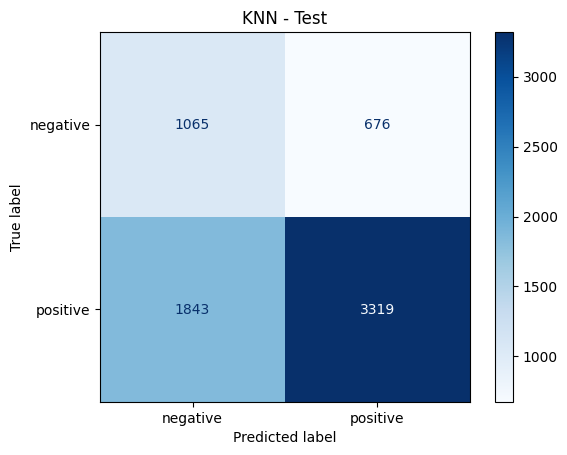

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

y_pred_train_knn = model_knn.predict(X_train_resampled)
y_pred_test_knn = model_knn.predict(X_test_selected)

print("=============== KNN - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_knn, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("KNN - Train")
plt.show()

print("=============== KNN - TEST ===============")
print(classification_report(y_test, y_pred_test_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("KNN - Test")
plt.show()


### MODEL 5 - ADA BOOST

=============== ADA BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.70      0.73      0.71     11900
    positive       0.72      0.69      0.70     11900

    accuracy                           0.71     23800
   macro avg       0.71      0.71      0.71     23800
weighted avg       0.71      0.71      0.71     23800



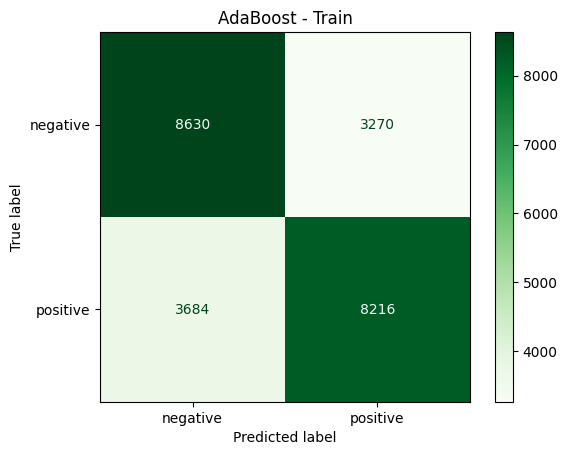

=============== ADA BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.39      0.56      0.46      1741
    positive       0.83      0.70      0.76      5162

    accuracy                           0.67      6903
   macro avg       0.61      0.63      0.61      6903
weighted avg       0.72      0.67      0.68      6903



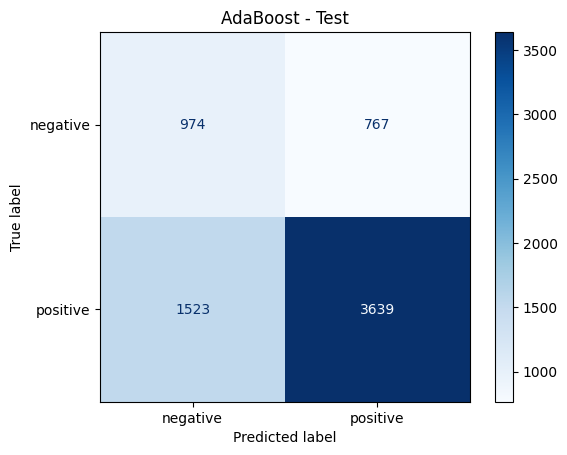

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train_resampled, y_train_resampled)

y_pred_train_ada = model_ada.predict(X_train_resampled)
y_pred_test_ada = model_ada.predict(X_test_selected)

print("=============== ADA BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_ada, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("AdaBoost - Train")
plt.show()

print("=============== ADA BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_ada, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("AdaBoost - Test")
plt.show()


### MODEL 6 - CAT BOOST

=============== CAT BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.86      0.80      0.83     11900
    positive       0.81      0.87      0.84     11900

    accuracy                           0.84     23800
   macro avg       0.84      0.84      0.83     23800
weighted avg       0.84      0.84      0.83     23800



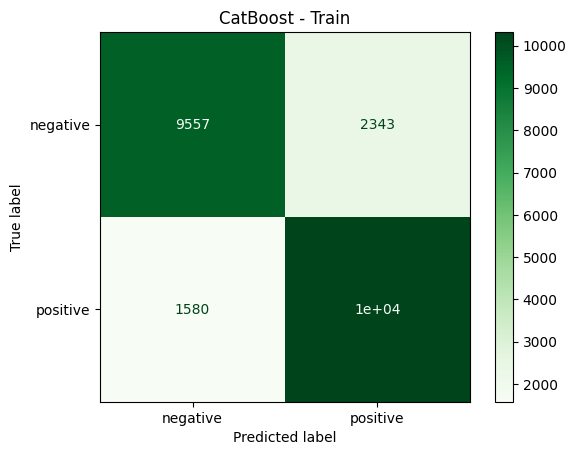

=============== CAT BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.47      0.44      0.45      1741
    positive       0.82      0.83      0.82      5162

    accuracy                           0.73      6903
   macro avg       0.64      0.64      0.64      6903
weighted avg       0.73      0.73      0.73      6903



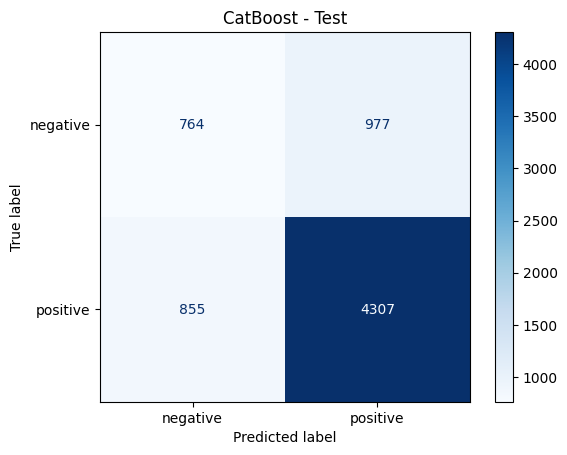

In [ ]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(verbose=0, random_state=42)
model_cat.fit(X_train_resampled, y_train_resampled)

y_pred_train_cat = model_cat.predict(X_train_resampled)
y_pred_test_cat = model_cat.predict(X_test_selected)

print("=============== CAT BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_cat, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("CatBoost - Train")
plt.show()

print("=============== CAT BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("CatBoost - Test")
plt.show()

# FINAL CLEANED CODE

## MANAGE DEPENDENCIES

In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install sklearn
%pip install scikit-learn
%pip install seaborn
%pip install imblearn
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA ON STEAM_1 AND STEAM_2

### EDA STEAM_1

In [24]:
# read converted big
df = pd.read_csv("data/raw_data/converted_big.csv")
df.head(2)

app_id              Name  Release date  Required age  Price  DLC count  \
0   20200  Galactic Bowling  Oct 21, 2008             0  19.99          0   
1  655370      Train Bandit  Oct 12, 2017             0   0.99          0   

                                Detailed description  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   

                                   Short description Reviews  ... Positive  \
0  Galactic Bowling is an exaggerated and stylize...     NaN  ...        6   
1  THE LAW!! Looks to be a showdown atop a train....     NaN  ...       53   

  Negative Estimated owners Average playtime forever  \
0       11        0 - 20000                        0   
1        5        0 - 20000                        0   

   Average playtime two weeks  Median playtime forever  \
0                           0                        0   
1                           0                        0   

   Median playtime two weeks  Peak CCU  \
0                          0         0   
1                          0         0   

                                                Tags  discount  
0                        Indie,Casual,Sports,Bowling       NaN  
1  Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...       NaN  

[2 rows x 43 columns]

#### BASIC

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   app_id                      111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Required age                111452 non-null  int64  
 4   Price                       111452 non-null  float64
 5   DLC count                   111452 non-null  int64  
 6   Detailed description        104995 non-null  object 
 7   About the game              104969 non-null  object 
 8   Short description           105076 non-null  object 
 9   Reviews                     10624 non-null   object 
 10  Header image                111452 non-null  object 
 11  Website                     46458 non-null   object 
 12  Support url                 50759 non-null   object 
 13  Support email 

In [26]:
df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

In [27]:
df.shape

(111452, 43)

#### MISSING VALUE IDENTIFICATION

In [28]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

Missing Values  Percentage
Score rank                    111408   99.960521
Metacritic url                107447   96.406525
Reviews                       100828   90.467645
discount                       97410   87.400854
Notes                          93003   83.446686
Full audio languages           65823   59.059505
Website                        64994   58.315687
Support url                    60693   54.456627
Tags                           37423   33.577684
Support email                  19025   17.070129
Movies                          9620    8.631519
Categories                      7566    6.788573
Publishers                      6778    6.081542
About the game                  6483    5.816854
Developers                      6475    5.809676
Detailed description            6457    5.793525
Genres                          6440    5.778272
Supported languages             6434    5.772889
Short description               6376    5.720848
Screenshots                     4192    3.761260
Name                               6    0.005383

In [29]:
df['Website']

0              http://www.galacticbowling.net
1                      http://trainbandit.com
2                                         NaN
3                    https://henosisgame.com/
4         https://www.unusual-games.com/home/
                         ...                 
111447                                    NaN
111448         https://www.hentaipanda.games/
111449                                    NaN
111450                   https://accubow.com/
111451               https://www.ledxfun.com/
Name: Website, Length: 111452, dtype: object

In [30]:
df['Header image']

0         https://cdn.akamai.steamstatic.com/steam/apps/...
1         https://cdn.akamai.steamstatic.com/steam/apps/...
2         https://cdn.akamai.steamstatic.com/steam/apps/...
3         https://cdn.akamai.steamstatic.com/steam/apps/...
4         https://cdn.akamai.steamstatic.com/steam/apps/...
                                ...                        
111447    https://shared.akamai.steamstatic.com/store_it...
111448    https://shared.akamai.steamstatic.com/store_it...
111449    https://shared.akamai.steamstatic.com/store_it...
111450    https://shared.akamai.steamstatic.com/store_it...
111451    https://shared.akamai.steamstatic.com/store_it...
Name: Header image, Length: 111452, dtype: object

In [31]:
df.drop(columns=['Header image', 'Website', 'Support url', 'Support email', 'Metacritic url'], inplace=True)

df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

In [32]:
steam1 = df.copy()

### EDA STEAM_2

In [33]:
steam2 = pd.read_csv('data/raw_data/games_small.csv')
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [34]:
steam2.head()

app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0       0.0        True  
1       0.0        True  
2       0.0        True  
3       0.0        True  
4       0.0        True

In [35]:
steam1[steam1['app_id'] == 13500]

app_id                               Name  Release date  Required age  \
31285   13500  Prince of Persia: Warrior Within™  Nov 21, 2008            17   

       Price  DLC count                               Detailed description  \
31285   9.99          0  Enter the dark underworld of Prince of Persia ...   

                                          About the game  \
31285  Enter the dark underworld of Prince of Persia ...   

                                       Short description Reviews  ...  \
31285  Enter the dark underworld of Prince of Persia ...     NaN  ...   

       Positive  Negative  Estimated owners  Average playtime forever  \
31285      1807       307   200000 - 500000                        61   

       Average playtime two weeks  Median playtime forever  \
31285                          10                       77   

      Median playtime two weeks Peak CCU  \
31285                        10       18   

                                                    Tags discount  
31285  Action,Adventure,Parkour,Third Person,Great So...      NaN  

[1 rows x 38 columns]

In [36]:
steam2[steam2['app_id'] == 13500]

app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   

   discount  steam_deck  
0       0.0        True

## MERGE STEAM_1 AND STEAM_2

In [37]:
steam1.drop(columns=['Release date', 'Price', 'discount'], inplace=True)
steam1.columns

Index(['app_id', 'Name', 'Required age', 'DLC count', 'Detailed description',
       'About the game', 'Short description', 'Reviews', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'Achievements', 'Recommendations', 'Notes',
       'Supported languages', 'Full audio languages', 'Packages', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Screenshots', 'Movies',
       'User score', 'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags'],
      dtype='object')

In [38]:
steam2.drop(columns=['title', 'win', 'mac', 'linux'], inplace=True)
steam2.columns

Index(['app_id', 'date_release', 'rating', 'positive_ratio', 'user_reviews',
       'price_final', 'price_original', 'discount', 'steam_deck'],
      dtype='object')

In [39]:
merged_df = pd.merge(steam1, steam2, on='app_id', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_id                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [40]:
# Rename columns so it in same name format
merged_df.rename(columns={
    'app_id': 'App ID',
    'date_release': 'Release date',
    'positive_ratio': 'Positive ratio',
    'price_final': 'Price final',
    'price_original': 'Price original',
    'discount': 'Discount',
    'steam_deck': 'Steam Deck',
}, inplace=True)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [41]:
merged_df.to_csv("data/merged_steam_data.csv", index=False)

## EDA MERGED DATA

In [42]:
df = pd.read_csv("data/merged_steam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [43]:
print(df.duplicated().sum())

0


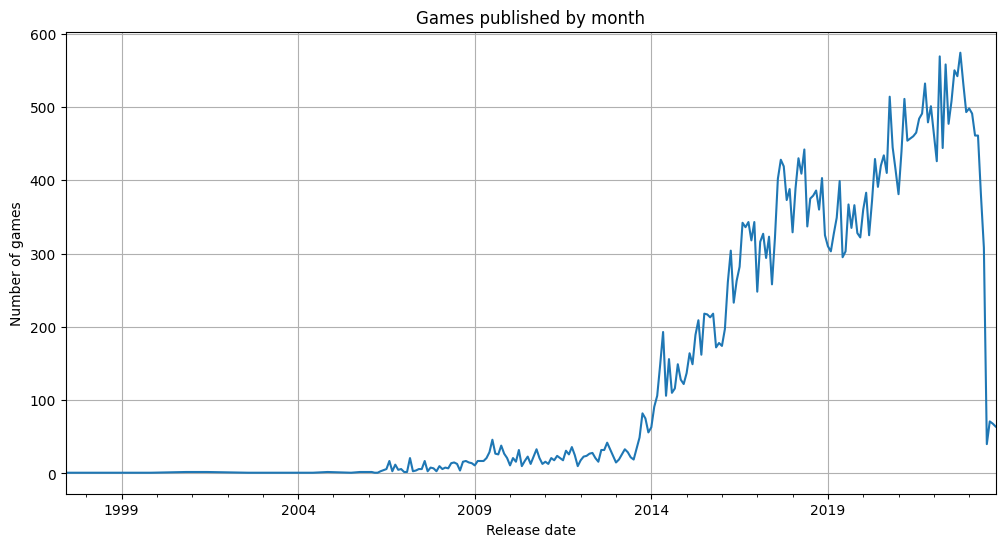

In [44]:
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

plt.figure(figsize=(12, 6))
df.groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Games published by month')
plt.ylabel('Number of games')
plt.grid(True)
plt.show()

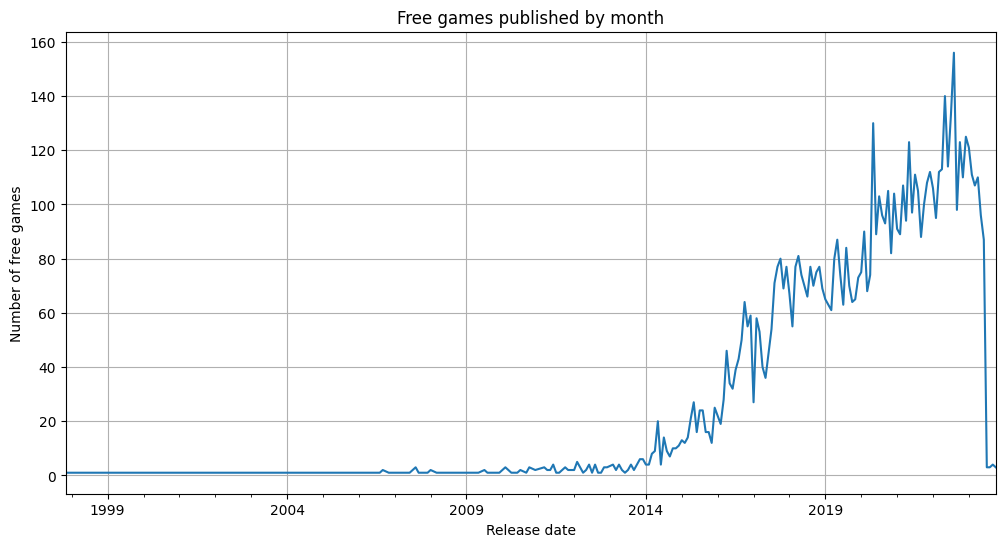

In [45]:
plt.figure(figsize=(12, 6))
df[df['Price final'] == 0].groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Free games published by month')
plt.ylabel('Number of free games')
plt.grid(True)
plt.show()

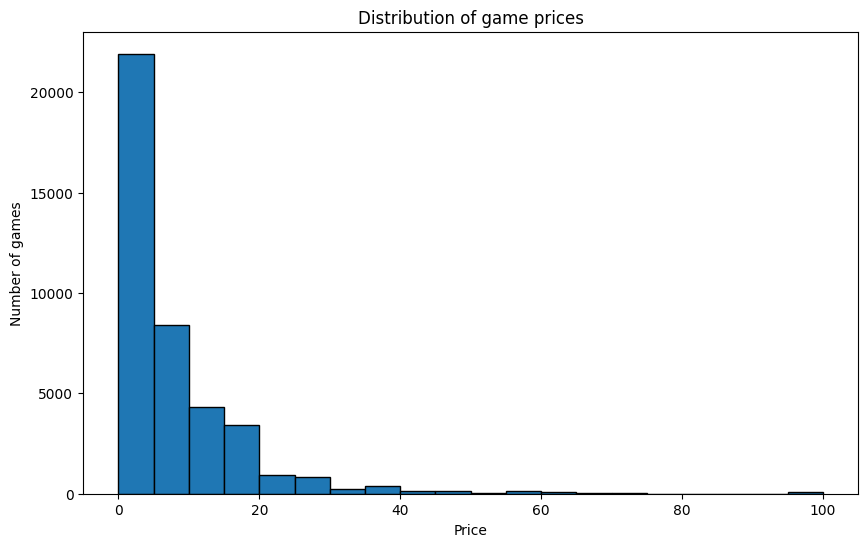

In [46]:
bins = range(0, 105, 5)
plt.figure(figsize=(10, 6))
plt.hist(df['Price final'], bins=bins, edgecolor='black')
plt.title('Distribution of game prices')
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

In [47]:
print("Free games: ", df[df['Price final'] == 0].shape[0])
print("Paid games: ", df[df['Price final'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price final'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price final'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  7748
Paid games:  33422
Percentage of free games:  19.0
Percentage of paid games:  81.0


In [48]:
print("Free games: ", df[df['Price original'] == 0].shape[0])
print("Paid games: ", df[df['Price original'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price original'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price original'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  8554
Paid games:  32616
Percentage of free games:  21.0
Percentage of paid games:  79.0


In [49]:
print(df['Price original'].max())
df[df['Price original'] == df['Price original'].max()]

299.9


App ID                   Name  Required age  DLC count  \
33552  253670  Aartform Curvy 3D 3.0             0          0   

                                    Detailed description  \
33552  Curvy 3D 4 Curvy 3D 4 is out now! \\\ Aartform...   

                                          About the game  \
33552  Curvy 3D 3.0 is an innovative sculpting progra...   

                                       Short description Reviews  Windows  \
33552  Curvy 3D 3.0 is an innovative sculpting progra...     NaN     True   

         Mac  ...  Peak CCU                  Tags  Release date  rating  \
33552  False  ...         0  Animation & Modeling    2013-11-12   Mixed   

      Positive ratio user_reviews Price final Price original Discount  \
33552             69           39       299.9          299.9      0.0   

      Steam Deck  
33552       True  

[1 rows x 43 columns]

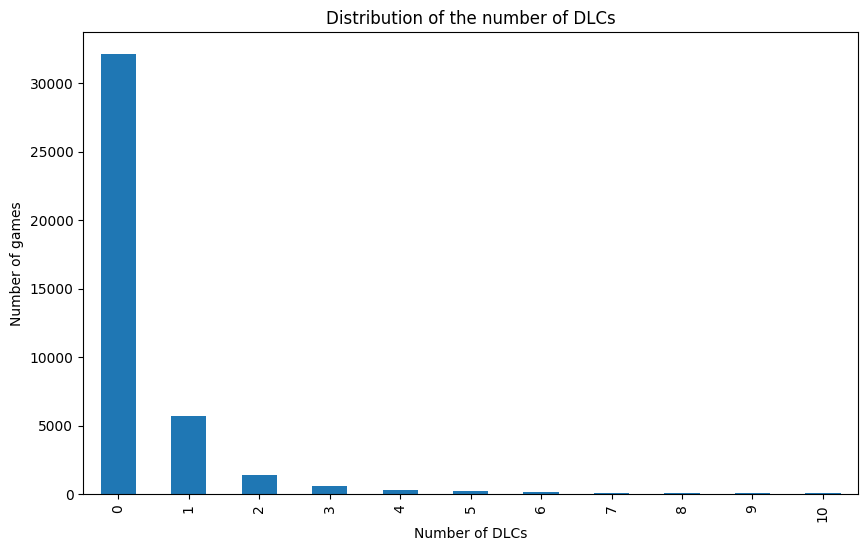

In [50]:
dlc_counts = df['DLC count'].value_counts().sort_index()
dlc_counts = dlc_counts[dlc_counts.index <= 10]
plt.figure(figsize=(10, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

In [51]:
df[df['DLC count'] == df['DLC count'].max()].head()

App ID                   Name  Required age  DLC count  \
19198  1196310  Fantasy Grounds Unity             0       2366   

                                    Detailed description  \
19198  Featured DLC / D&amp;D Essentials D&amp;D Adve...   

                                          About the game  \
19198  Prep Less. Play Better. Fantasy Grounds is kno...   

                                       Short description Reviews  Windows  \
19198  Prep Less. Play Better. Exciting upgrades awai...     NaN     True   

        Mac  ...  Peak CCU                                               Tags  \
19198  True  ...       145  RPG,Dungeons & Dragons,Strategy,Indie,Software...   

       Release date         rating Positive ratio user_reviews Price final  \
19198    2020-11-05  Very Positive             83          527        30.0   

      Price original Discount Steam Deck  
19198            0.0      0.0       True  

[1 rows x 43 columns]

In [52]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Score rank                    41168
Notes                         36118
Reviews                       33250
Full audio languages          21882
Tags                           3690
Movies                         1804
Categories                      527
Publishers                      221
Developers                       74
About the game                   57
Detailed description             47
Genres                           44
Screenshots                      16
Short description                14
Supported languages              13
Release date                      0
rating                            0
Estimated owners                  0
Positive ratio                    0
Peak CCU                          0
user_reviews                      0
Price final                       0
Median playtime two weeks         0
Price original                    0
Median playtime forever           0
Discount                          0
Average playtime two weeks        0
Average playtime forever    

In [53]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements'
]

df = df[selected_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Release date          41170 non-null  datetime64[ns]
 1   Price original        41170 non-null  float64       
 2   DLC count             41170 non-null  int64         
 3   Required age          41170 non-null  int64         
 4   Windows               41170 non-null  bool          
 5   Mac                   41170 non-null  bool          
 6   Linux                 41170 non-null  bool          
 7   Steam Deck            41170 non-null  bool          
 8   Supported languages   41157 non-null  object        
 9   Full audio languages  19288 non-null  object        
 10  Developers            41096 non-null  object        
 11  Publishers            40949 non-null  object        
 12  Movies                39366 non-null  object        
 13  rating          

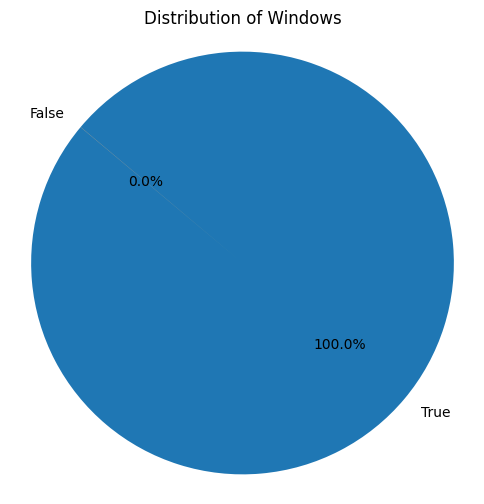

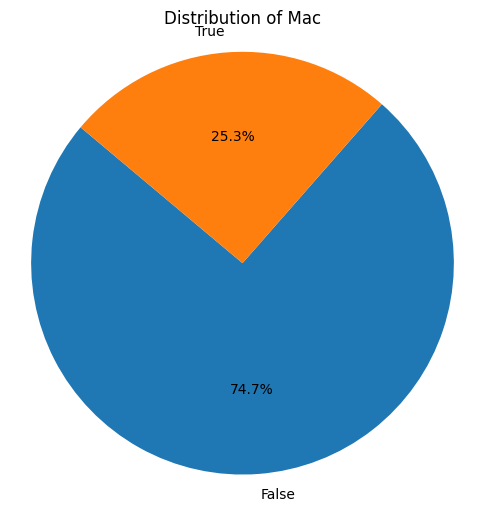

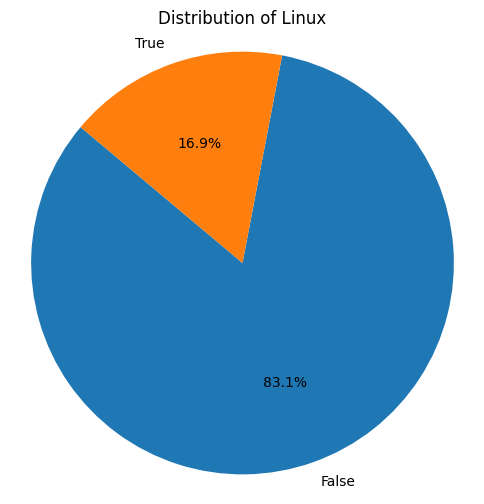

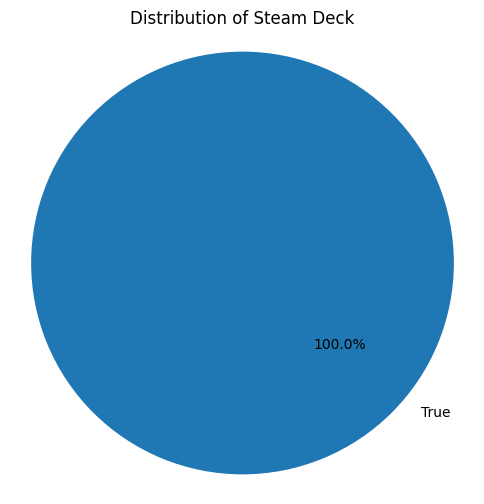

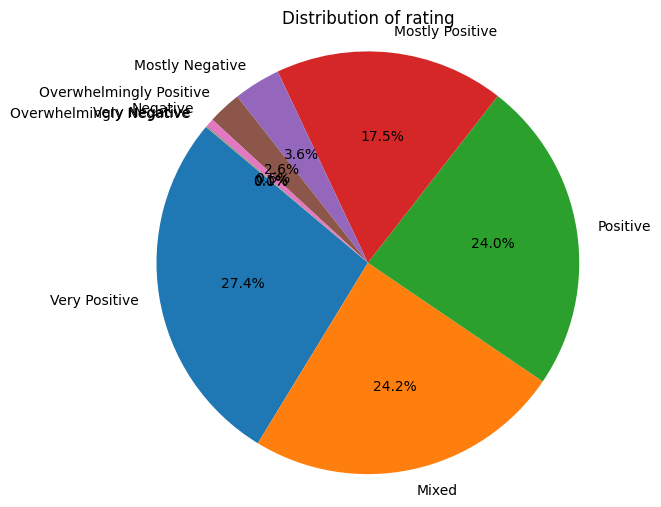

In [54]:
for col in df.columns:
    if df[col].nunique() <= 10:
        value_counts = df[col].value_counts().head(10)
        plt.figure(figsize=(6, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Distribution of {col}")
        plt.axis('equal')
        plt.show()

Correlation Matrix:
                Price original  DLC count  Required age       Mac     Linux  \
Price original        1.000000   0.032879      0.084851  0.007602  0.013049   
DLC count             0.032879   1.000000      0.018977  0.016092  0.010677   
Required age          0.084851   0.018977      1.000000 -0.031069 -0.019101   
Mac                   0.007602   0.016092     -0.031069  1.000000  0.601494   
Linux                 0.013049   0.010677     -0.019101  0.601494  1.000000   
Positive ratio        0.017958   0.007654     -0.012899  0.085269  0.077515   
Achievements         -0.005196   0.017734      0.000099 -0.005712  0.004868   

                Positive ratio  Achievements  
Price original        0.017958     -0.005196  
DLC count             0.007654      0.017734  
Required age         -0.012899      0.000099  
Mac                   0.085269     -0.005712  
Linux                 0.077515      0.004868  
Positive ratio        1.000000     -0.007673  
Achievements      

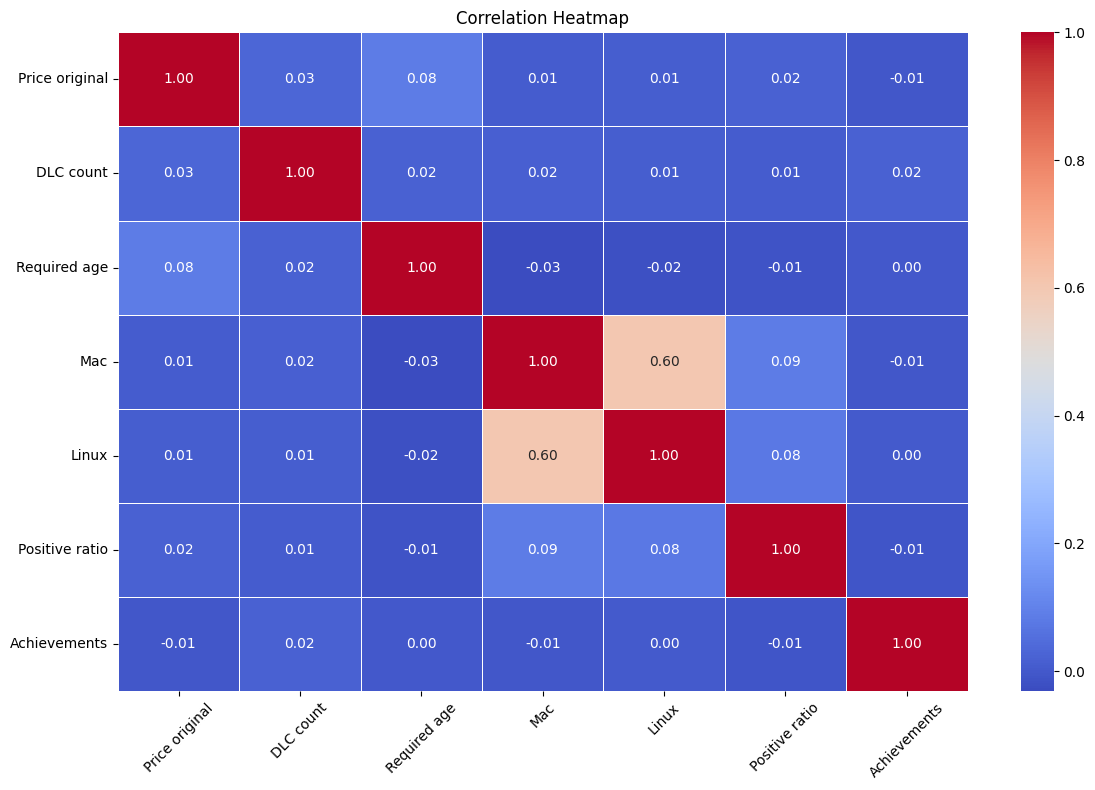

In [55]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number', 'bool'])
correlation = numeric_df.corr().drop(index=['Windows', 'Steam Deck'], columns=['Windows', 'Steam Deck'], errors='ignore')

print("Correlation Matrix:")
print(correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


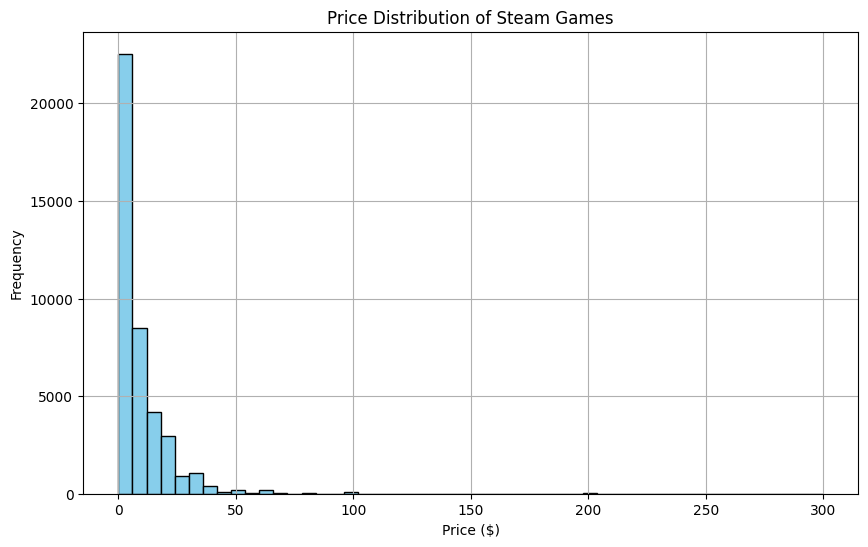

In [56]:
plt.figure(figsize=(10,6))
plt.hist(df['Price original'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Steam Games')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\Wesley\AppData\Local\Temp\ipykernel_21056\2133605267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_counts, x='Price Type', y='Count', palette='Set2')


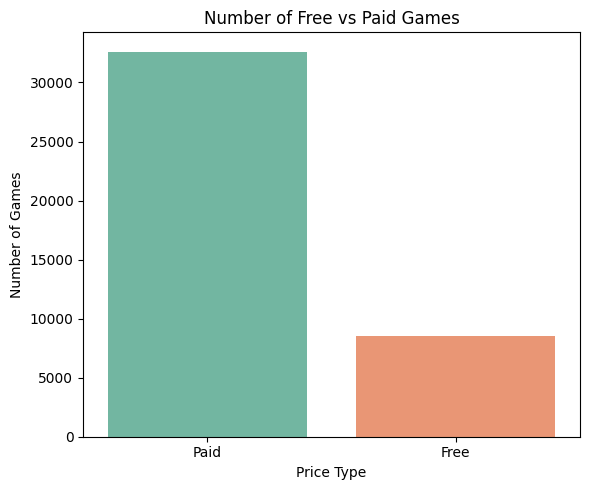

In [57]:
df['Price Type'] = df['Price original'].apply(lambda x: 'Free' if x == 0.0 else 'Paid')

price_counts = df['Price Type'].value_counts().reset_index()
price_counts.columns = ['Price Type', 'Count']

# plot
plt.figure(figsize=(6, 5))
sns.barplot(data=price_counts, x='Price Type', y='Count', palette='Set2')
plt.title('Number of Free vs Paid Games')
plt.ylabel('Number of Games')
plt.xlabel('Price Type')
plt.tight_layout()
plt.show()


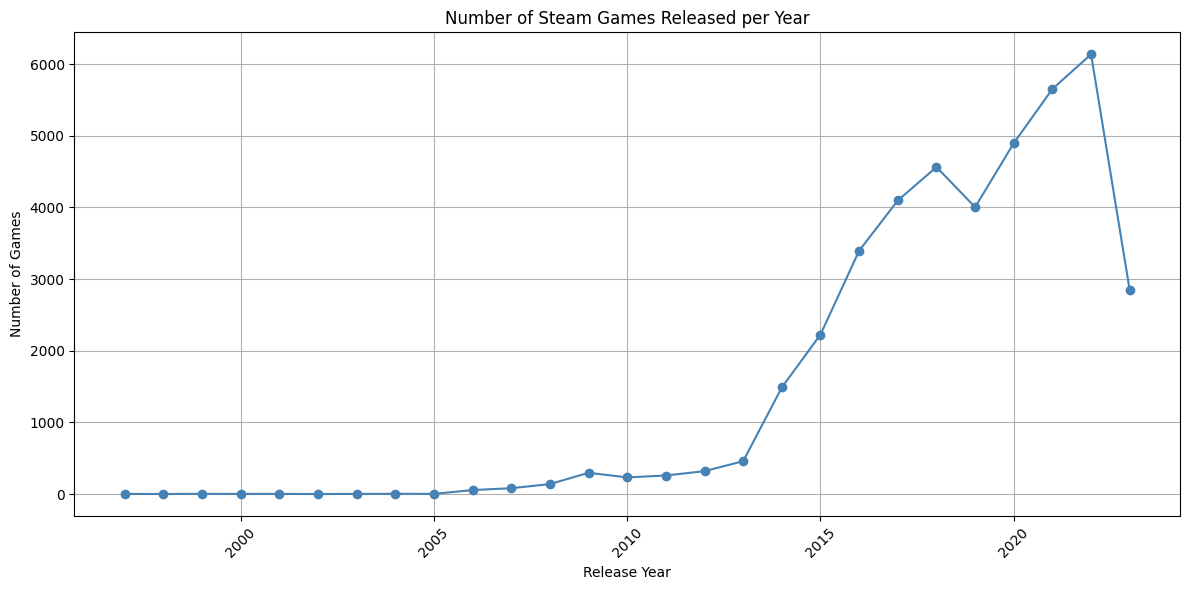

In [58]:
df['Release Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

release_counts = df['Release Year'].value_counts().sort_index(ascending=True)

# LINEPLOT
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o', color='steelblue')
plt.title("Number of Steam Games Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Wesley\AppData\Local\Temp\ipykernel_21056\1683197613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_games['Release Month'] = free_games['Release date'].dt.to_period('M')


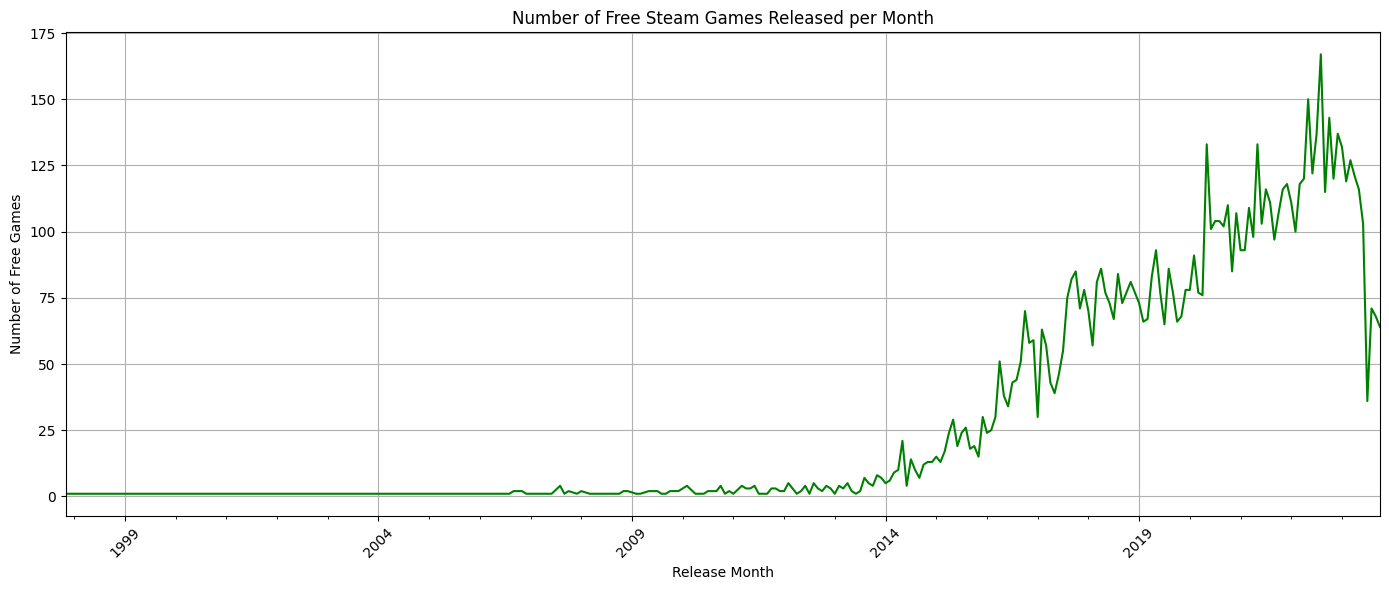

In [59]:
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

free_games = df[df['Price original'] == 0]

free_games['Release Month'] = free_games['Release date'].dt.to_period('M')

monthly_free_counts = free_games['Release Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
monthly_free_counts.plot(kind='line', color='green')
plt.title("Number of Free Steam Games Released per Month")
plt.xlabel("Release Month")
plt.ylabel("Number of Free Games")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Wesley\AppData\Local\Temp\ipykernel_21056\504554771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')


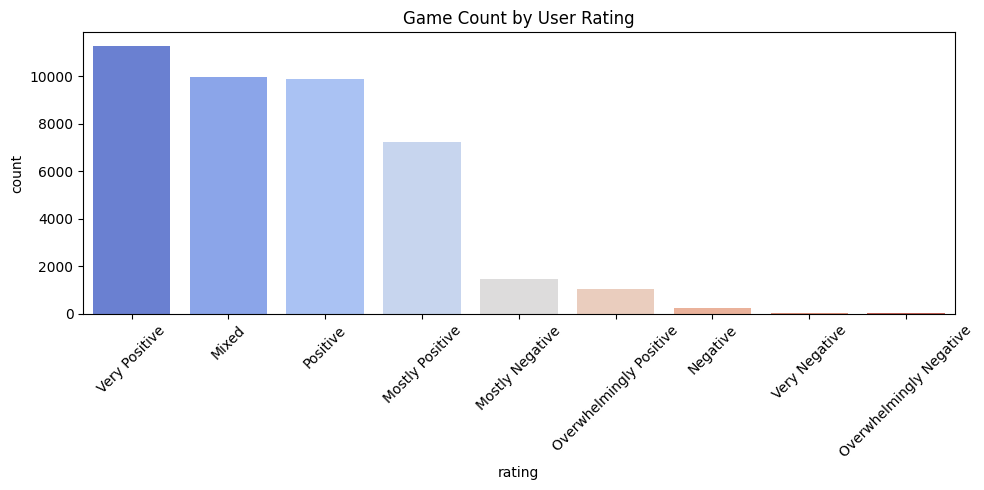

In [60]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Game Count by User Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Top 10 Developers'}, xlabel='Games Count', ylabel='Developer'>

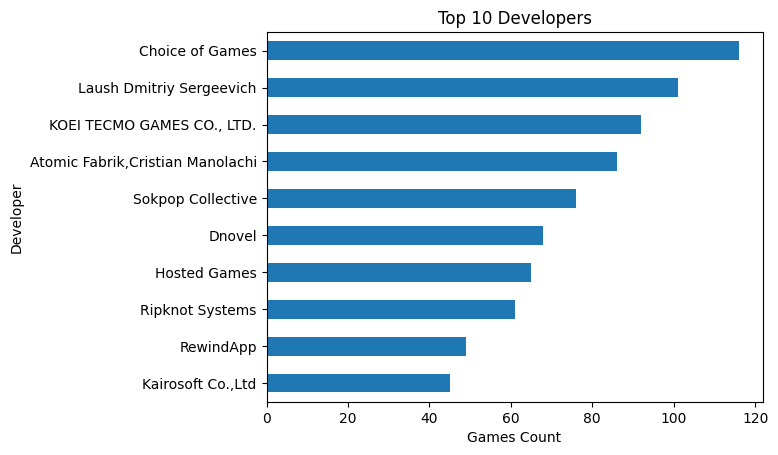

In [61]:
df['Developers'].value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh', 
    title='Top 10 Developers', 
    xlabel='Games Count', 
    ylabel='Developer'
)

<Axes: title={'center': 'Top 10 Publishers'}, xlabel='Games Count', ylabel='Publisher'>

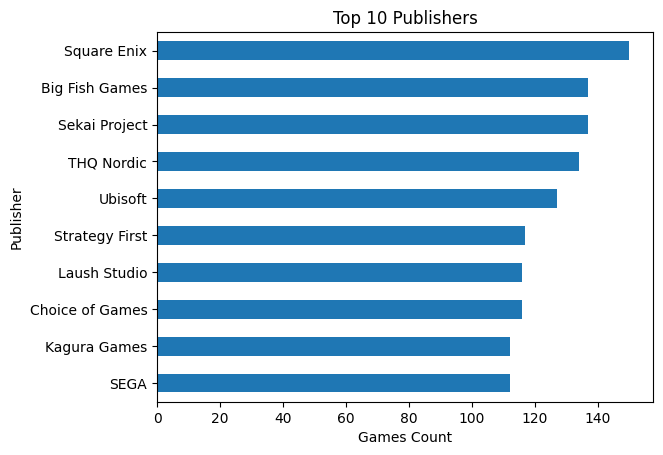

In [62]:
df['Publishers'].value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh', 
    title='Top 10 Publishers', 
    xlabel='Games Count', 
    ylabel='Publisher'
)

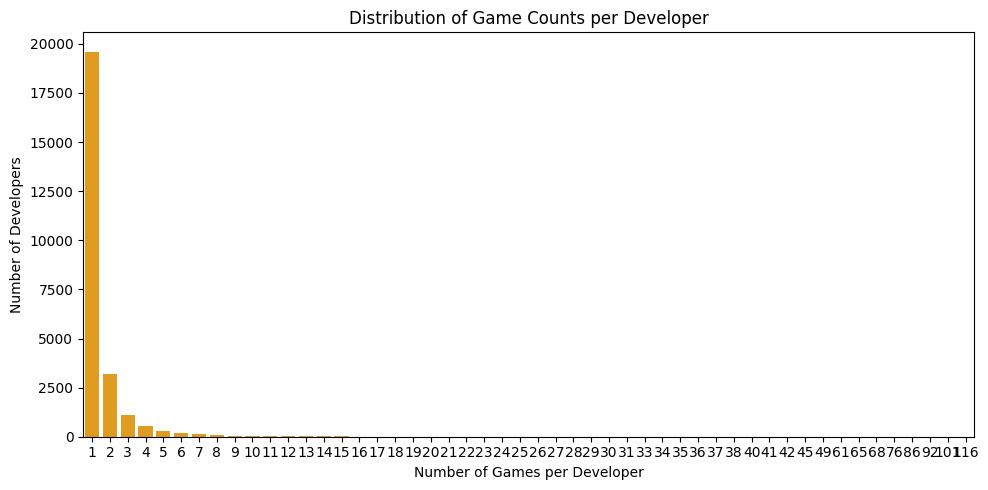

In [63]:
dev_counts = df['Developers'].value_counts()

game_count_distribution = dev_counts.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=game_count_distribution.index, y=game_count_distribution.values, color='orange')
plt.xlabel('Number of Games per Developer')
plt.ylabel('Number of Developers')
plt.title('Distribution of Game Counts per Developer')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


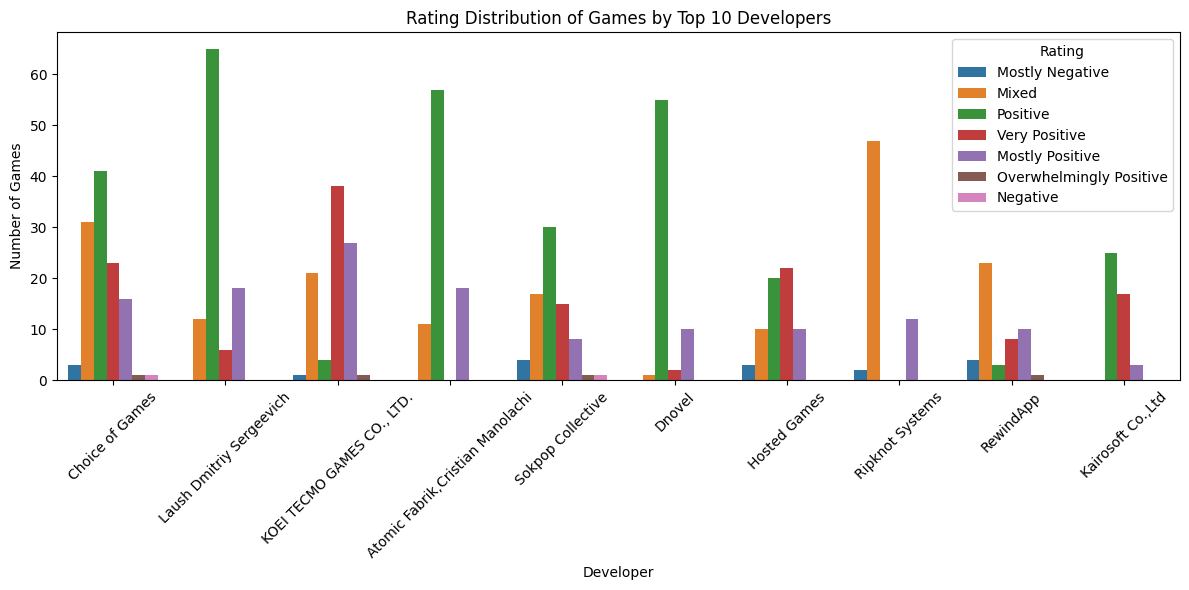

In [64]:
df_rating = df[df['rating'].notnull()]


top_developers = df_rating['Developers'].value_counts().head(10).index

top_devs_df = df_rating[df_rating['Developers'].isin(top_developers)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_devs_df, x='Developers', hue='rating', order=top_developers)
plt.xticks(rotation=45)
plt.title('Rating Distribution of Games by Top 10 Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


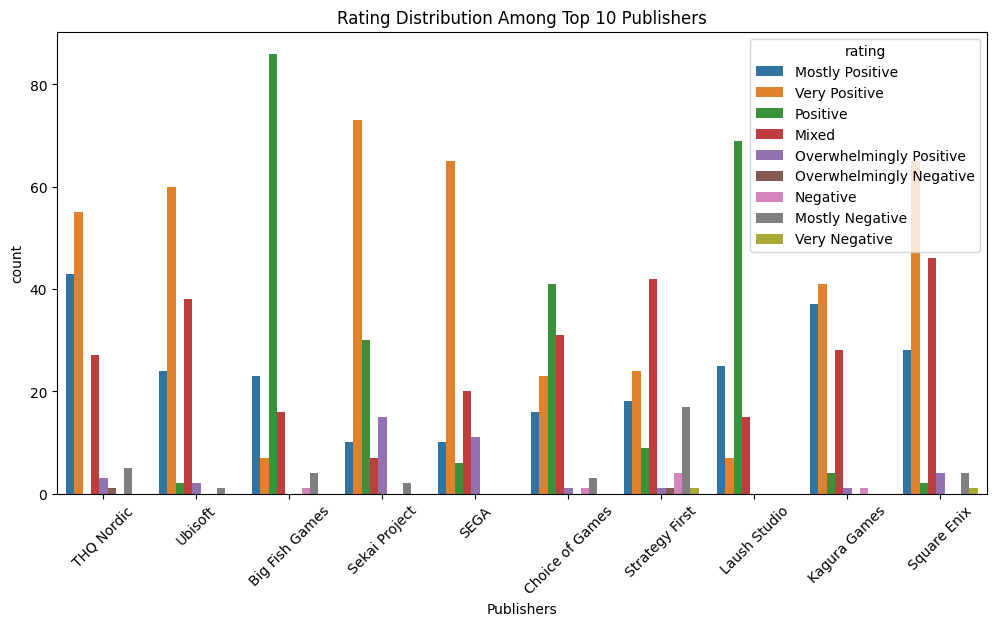

In [65]:
top_publishers = df['Publishers'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Publishers'].isin(top_publishers)], x='Publishers', hue='rating')
plt.title('Rating Distribution Among Top 10 Publishers')
plt.xticks(rotation=45)
plt.show()


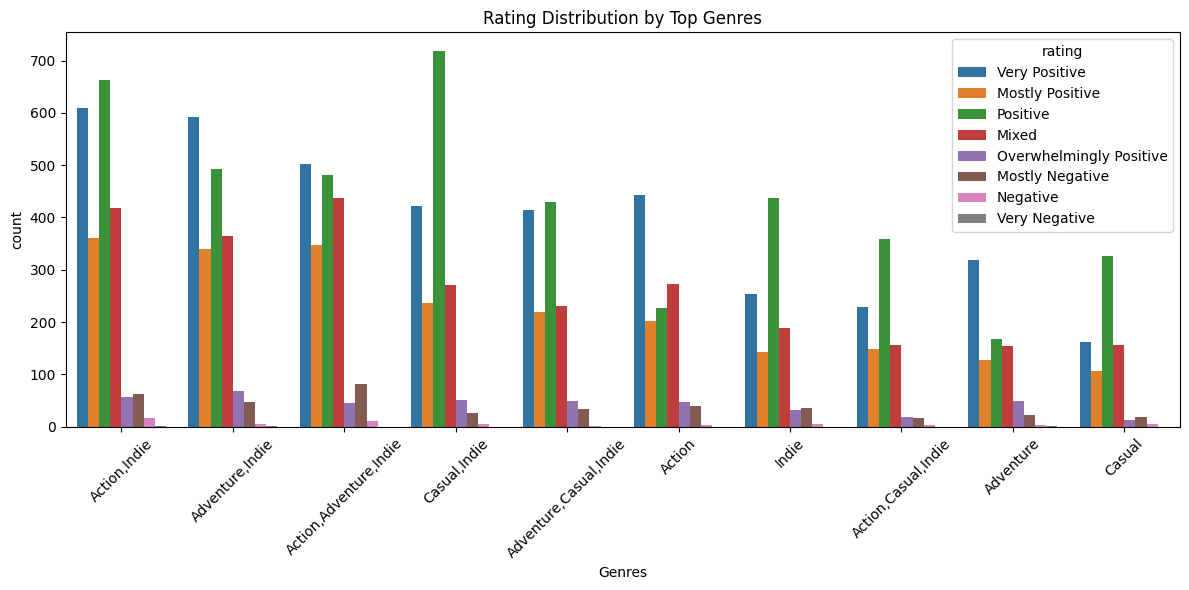

In [66]:
top_genres = df['Genres'].value_counts().head(10).index.tolist()
filtered_df = df[df['Genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Genres', hue='rating', order=top_genres)
plt.title('Rating Distribution by Top Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


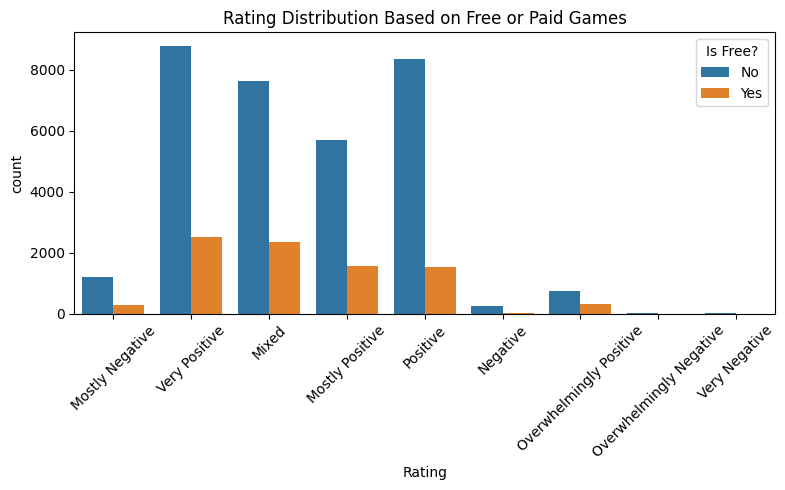

In [67]:
# Add a column indicating if the game is free
df['Is Free'] = df['Price original'].apply(lambda x: 'Yes' if x == 0 else 'No')

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', hue='Is Free')
plt.title('Rating Distribution Based on Free or Paid Games')
plt.xlabel('Rating')
plt.legend(title='Is Free?')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
# Get top 10k developers by count, break ties with mean positive_ratio
dev_counts = df.groupby('Developers').agg(
    count=('Developers', 'count')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count'], ascending=[False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

# Filter df to only include top 10k developers
df = df[df['Developers'].isin(top_10k_developers)]

# Repeat the same for publishers
pub_counts = df.groupby('Publishers').agg(
    count=('Publishers', 'count')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count'], ascending=[False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()

# Filter df to only include top 10k publishers
df = df[df['Publishers'].isin(top_10k_publishers)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25506 entries, 0 to 41169
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Release date          25506 non-null  datetime64[ns]
 1   Price original        25506 non-null  float64       
 2   DLC count             25506 non-null  int64         
 3   Required age          25506 non-null  int64         
 4   Windows               25506 non-null  bool          
 5   Mac                   25506 non-null  bool          
 6   Linux                 25506 non-null  bool          
 7   Steam Deck            25506 non-null  bool          
 8   Supported languages   25506 non-null  object        
 9   Full audio languages  11948 non-null  object        
 10  Developers            25506 non-null  object        
 11  Publishers            25506 non-null  object        
 12  Movies                24176 non-null  object        
 13  rating               

In [69]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Full audio languages    13558
Tags                     1807
Movies                   1330
Categories                282
Genres                     23
Release date                0
Release Year                0
Price Type                  0
Achievements                0
Positive ratio              0
rating                      0
Publishers                  0
Price original              0
Developers                  0
Supported languages         0
Steam Deck                  0
Linux                       0
Mac                         0
Windows                     0
Required age                0
DLC count                   0
Is Free                     0
dtype: int64


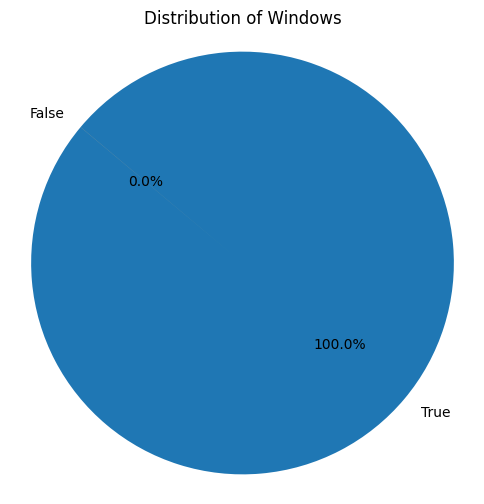

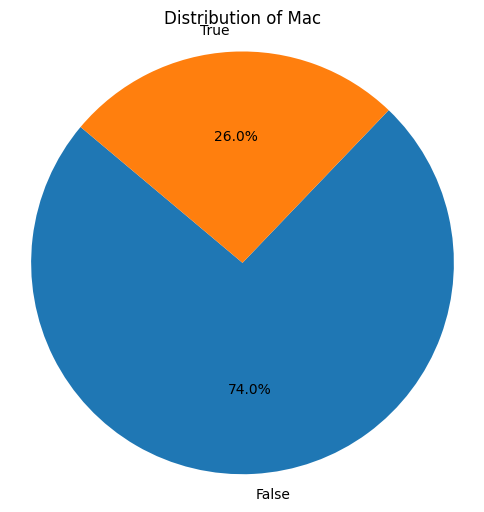

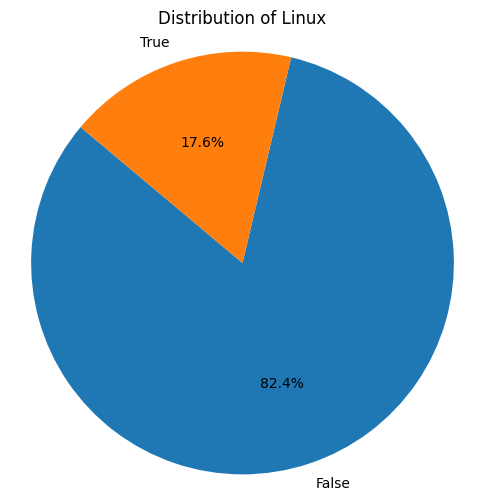

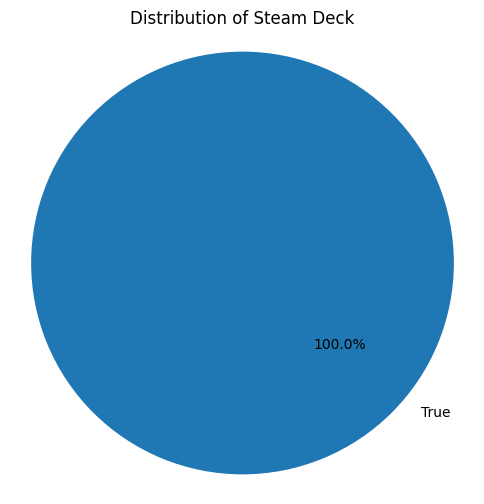

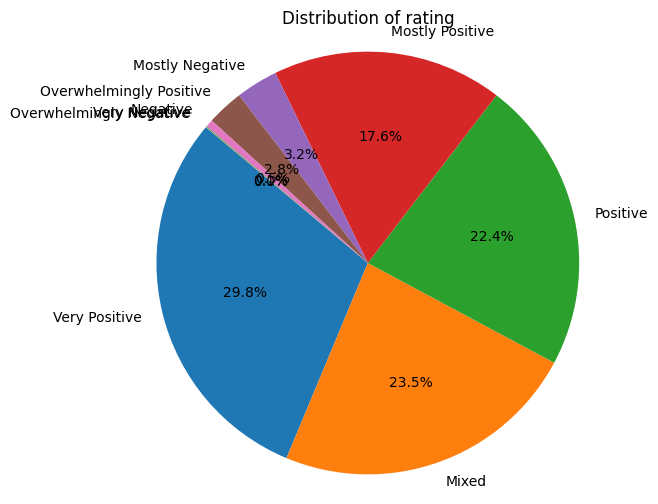

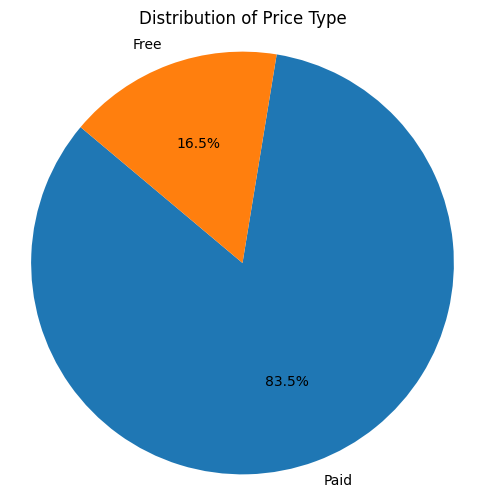

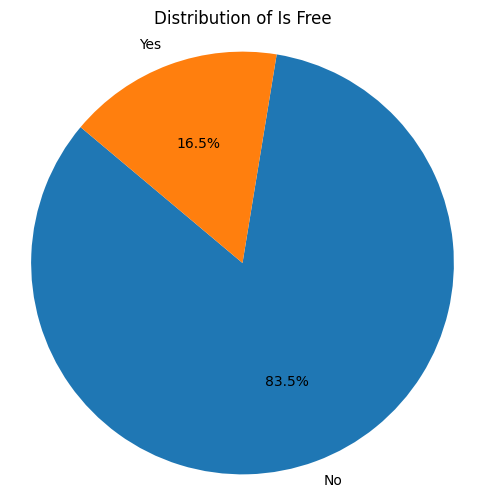

In [70]:
for col in df.columns:
    if df[col].nunique() <= 10:
        value_counts = df[col].value_counts().head(10)
        plt.figure(figsize=(6, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Distribution of {col}")
        plt.axis('equal')
        plt.show()

Correlation Matrix:
                Price original  DLC count  Required age       Mac     Linux  \
Price original        1.000000   0.031624      0.086301  0.005113  0.016392   
DLC count             0.031624   1.000000      0.016538  0.016975  0.010213   
Required age          0.086301   0.016538      1.000000 -0.037133 -0.019528   
Mac                   0.005113   0.016975     -0.037133  1.000000  0.625707   
Linux                 0.016392   0.010213     -0.019528  0.625707  1.000000   
Positive ratio        0.004046   0.007620     -0.006228  0.082832  0.070694   
Achievements         -0.014960   0.012246     -0.004328 -0.013609 -0.000502   
Release Year          0.043842  -0.005342     -0.129936 -0.174016 -0.147297   

                Positive ratio  Achievements  Release Year  
Price original        0.004046     -0.014960      0.043842  
DLC count             0.007620      0.012246     -0.005342  
Required age         -0.006228     -0.004328     -0.129936  
Mac                   0.

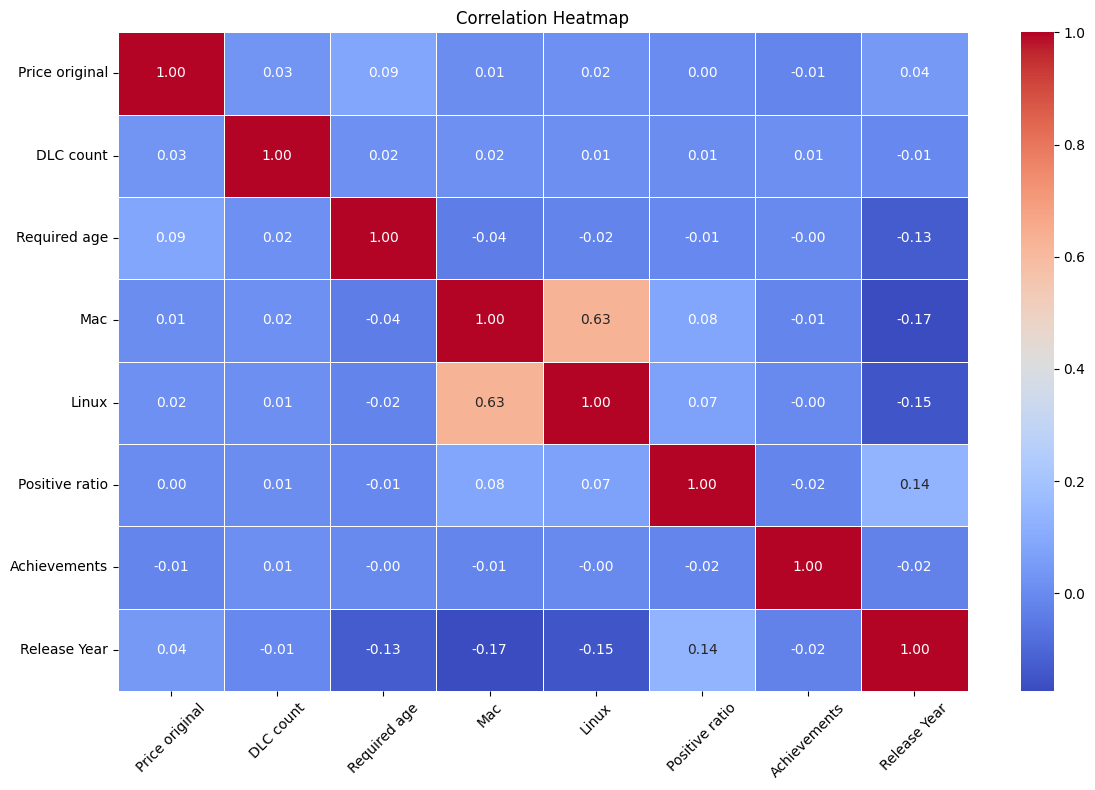

In [71]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number', 'bool'])
correlation = numeric_df.corr().drop(index=['Windows', 'Steam Deck'], columns=['Windows', 'Steam Deck'], errors='ignore')

print("Correlation Matrix:")
print(correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


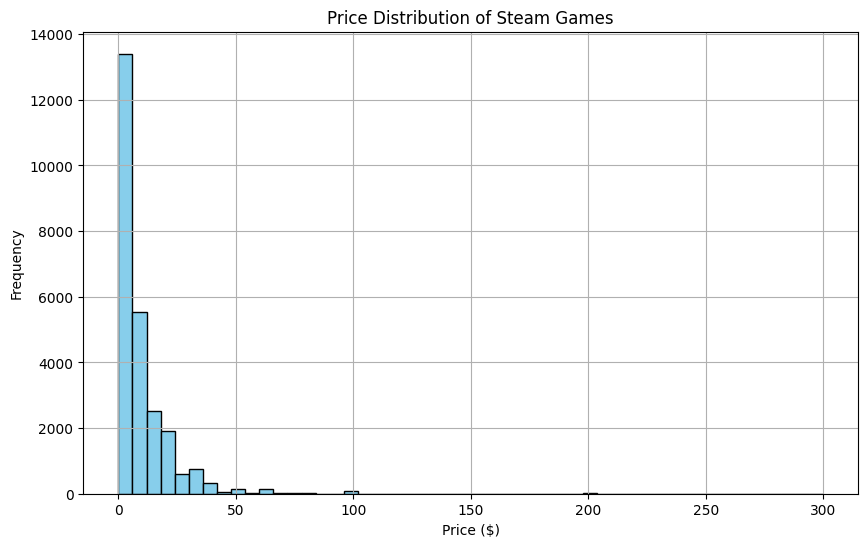

In [72]:
plt.figure(figsize=(10,6))
plt.hist(df['Price original'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Steam Games')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\Wesley\AppData\Local\Temp\ipykernel_21056\2133605267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_counts, x='Price Type', y='Count', palette='Set2')


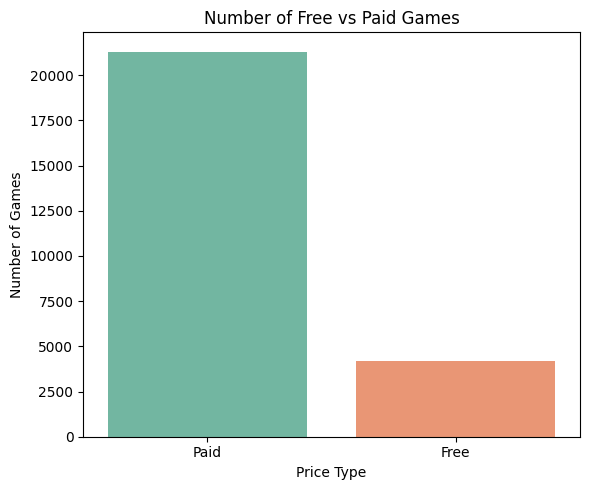

In [73]:
df['Price Type'] = df['Price original'].apply(lambda x: 'Free' if x == 0.0 else 'Paid')

price_counts = df['Price Type'].value_counts().reset_index()
price_counts.columns = ['Price Type', 'Count']

# plot
plt.figure(figsize=(6, 5))
sns.barplot(data=price_counts, x='Price Type', y='Count', palette='Set2')
plt.title('Number of Free vs Paid Games')
plt.ylabel('Number of Games')
plt.xlabel('Price Type')
plt.tight_layout()
plt.show()


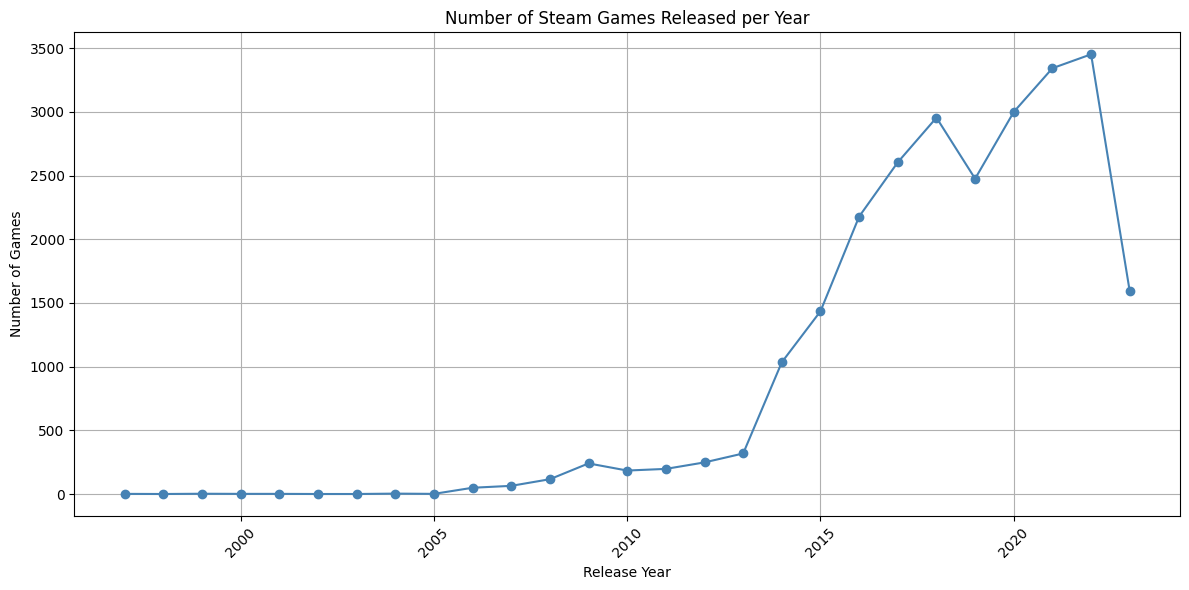

In [74]:
df['Release Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

release_counts = df['Release Year'].value_counts().sort_index(ascending=True)

plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o', color='steelblue')
plt.title("Number of Steam Games Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Wesley\AppData\Local\Temp\ipykernel_21056\1683197613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_games['Release Month'] = free_games['Release date'].dt.to_period('M')


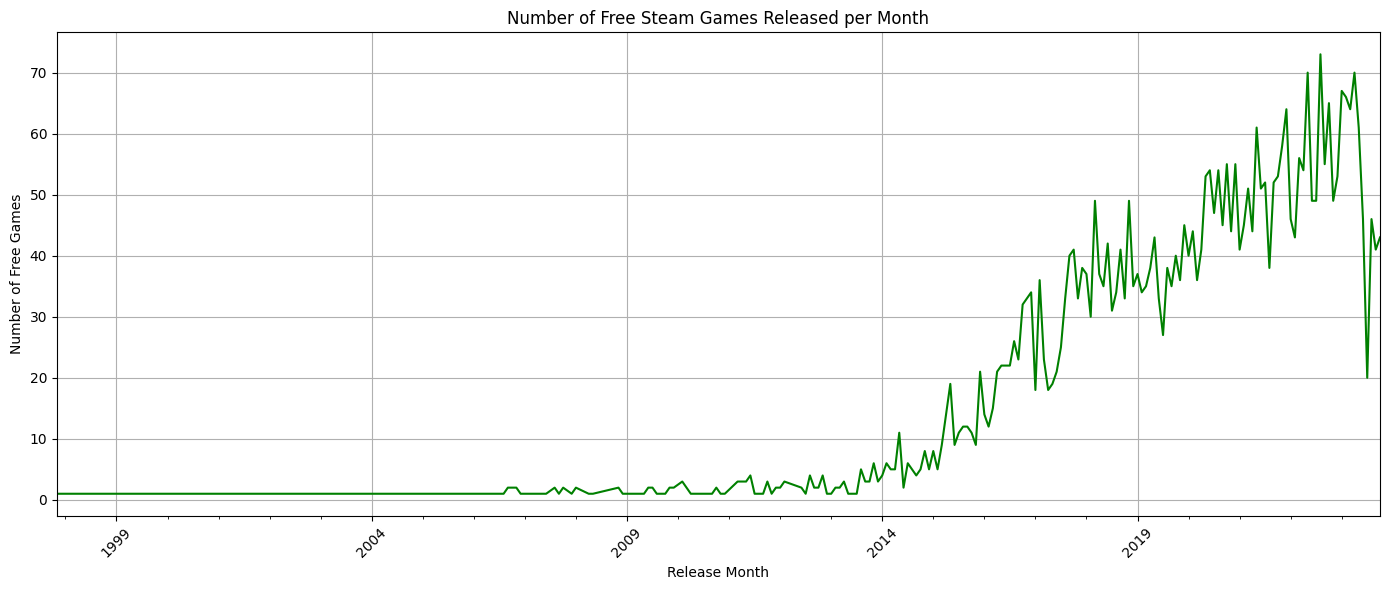

In [75]:
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

free_games = df[df['Price original'] == 0]

free_games['Release Month'] = free_games['Release date'].dt.to_period('M')

monthly_free_counts = free_games['Release Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
monthly_free_counts.plot(kind='line', color='green')
plt.title("Number of Free Steam Games Released per Month")
plt.xlabel("Release Month")
plt.ylabel("Number of Free Games")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Wesley\AppData\Local\Temp\ipykernel_21056\504554771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')


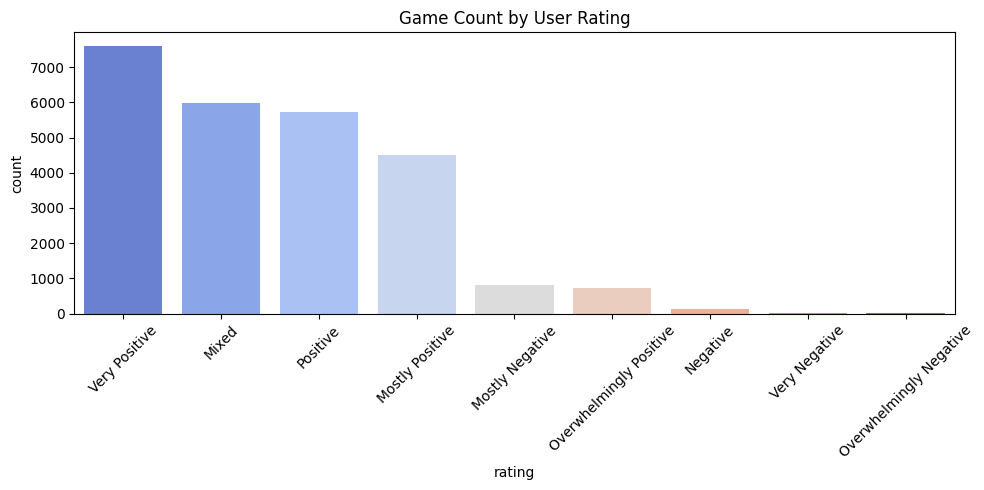

In [76]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Game Count by User Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Top 10 Developers'}, xlabel='Games Count', ylabel='Developer'>

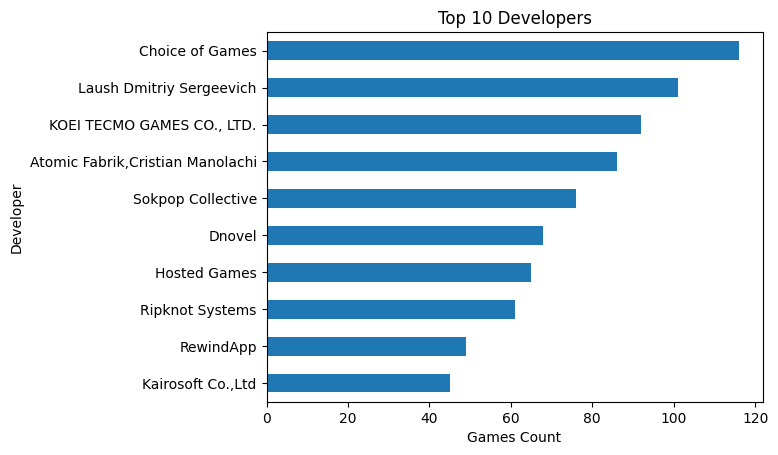

In [77]:
df['Developers'].value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh', 
    title='Top 10 Developers', 
    xlabel='Games Count', 
    ylabel='Developer'
)

<Axes: title={'center': 'Top 10 Publishers'}, xlabel='Games Count', ylabel='Publisher'>

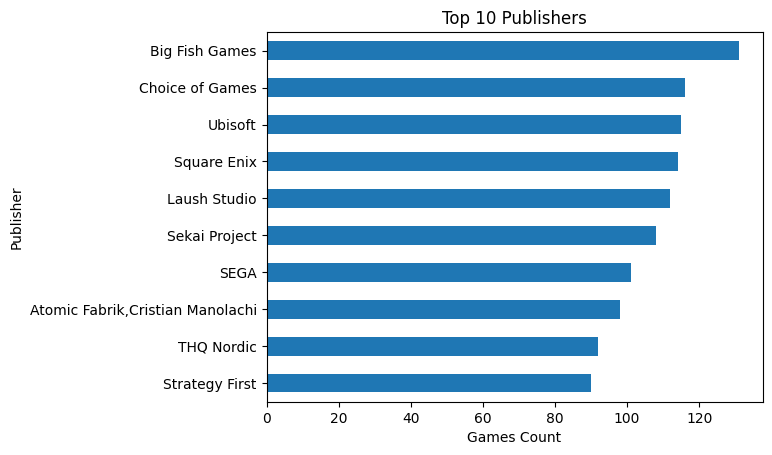

In [78]:
df['Publishers'].value_counts().head(10).sort_values(ascending=True).plot(
    kind='barh', 
    title='Top 10 Publishers', 
    xlabel='Games Count', 
    ylabel='Publisher'
)

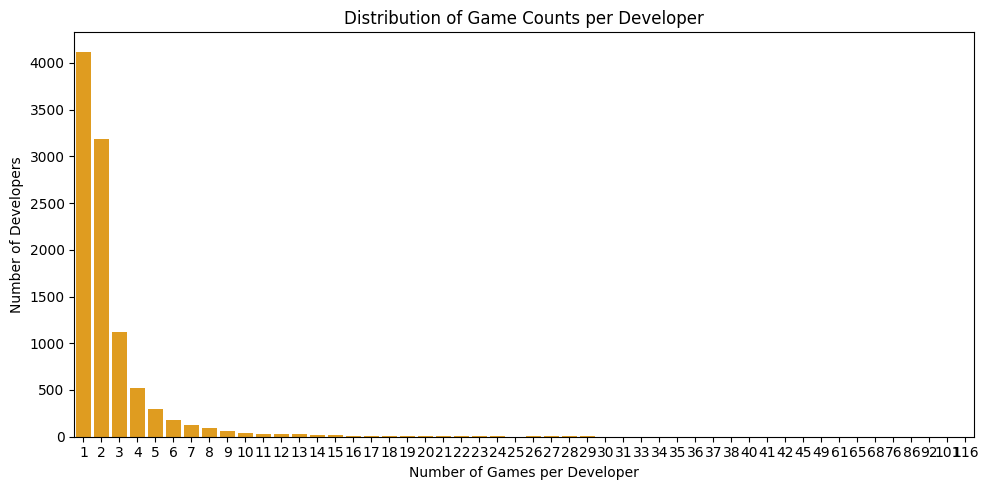

In [79]:
dev_counts = df['Developers'].value_counts()

game_count_distribution = dev_counts.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=game_count_distribution.index, y=game_count_distribution.values, color='orange')
plt.xlabel('Number of Games per Developer')
plt.ylabel('Number of Developers')
plt.title('Distribution of Game Counts per Developer')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


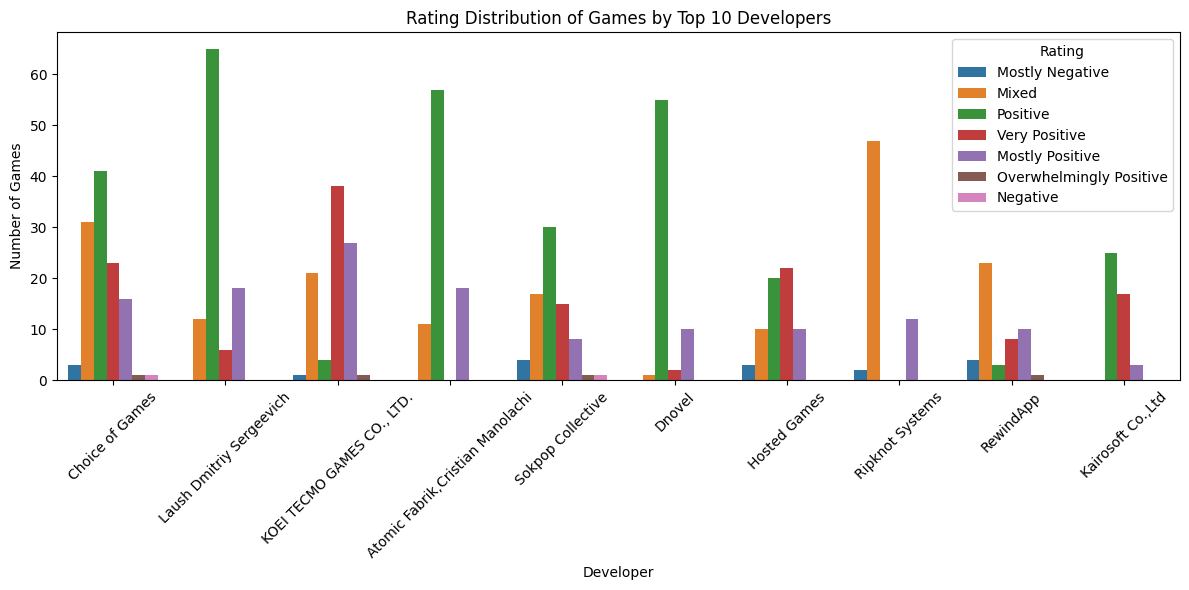

In [80]:
df_rating = df[df['rating'].notnull()]


top_developers = df_rating['Developers'].value_counts().head(10).index

top_devs_df = df_rating[df_rating['Developers'].isin(top_developers)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_devs_df, x='Developers', hue='rating', order=top_developers)
plt.xticks(rotation=45)
plt.title('Rating Distribution of Games by Top 10 Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


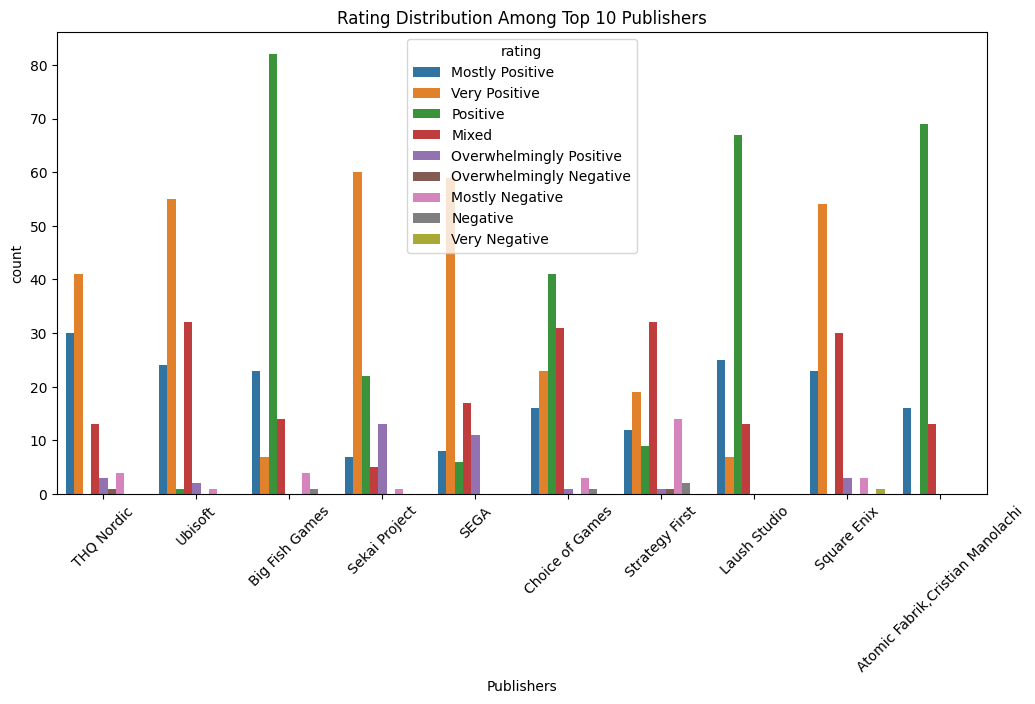

In [81]:
top_publishers = df['Publishers'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Publishers'].isin(top_publishers)], x='Publishers', hue='rating')
plt.title('Rating Distribution Among Top 10 Publishers')
plt.xticks(rotation=45)
plt.show()


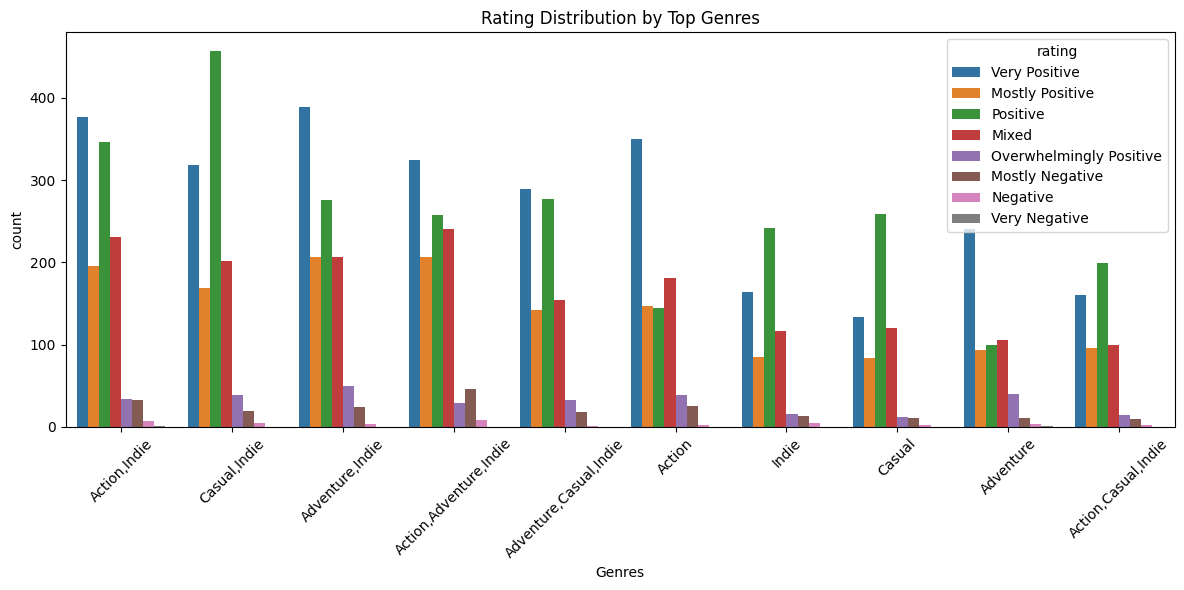

In [82]:
top_genres = df['Genres'].value_counts().head(10).index.tolist()
filtered_df = df[df['Genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Genres', hue='rating', order=top_genres)
plt.title('Rating Distribution by Top Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


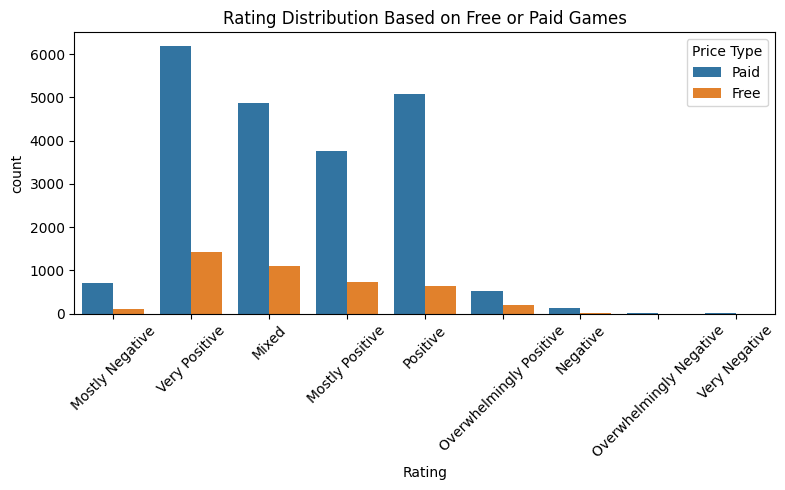

In [83]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', hue='Price Type')
plt.title('Rating Distribution Based on Free or Paid Games')
plt.xlabel('Rating')
plt.legend(title='Price Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PRE-PROCESSING

In [226]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

### Missing Value & Noise Handling

In [227]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'user_reviews'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Supported languages   41157 non-null  object 
 8   Full audio languages  19288 non-null  object 
 9   Developers            41096 non-null  object 
 10  Publishers            40962 non-null  object 
 11  Movies                39366 non-null  object 
 12  rating                41170 non-null  object 
 13  Positive ratio        41170 non-null  int64  
 14  Genres                41126 non-null  object 
 15  Tags               

In [228]:
missing_values = df_filtered.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df_filtered.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

Missing Values  Percentage
Full audio languages           21882   53.150352
Tags                            3690    8.962837
Movies                          1804    4.381831
Categories                       527    1.280058
Publishers                       208    0.505222
Developers                        74    0.179743
Genres                            44    0.106874
Supported languages               13    0.031576

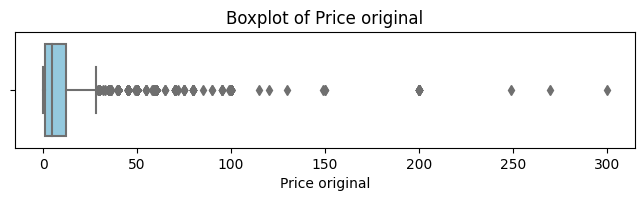

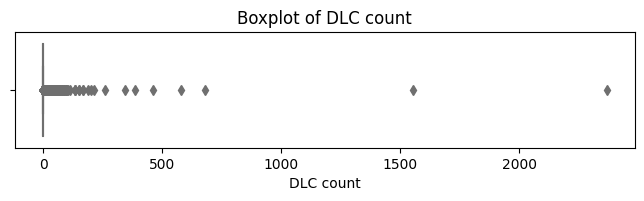

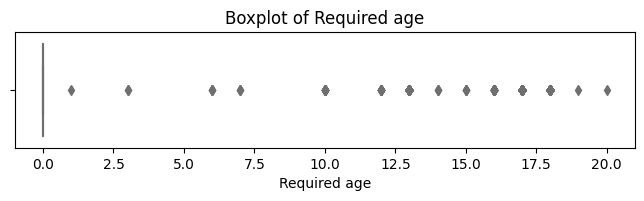

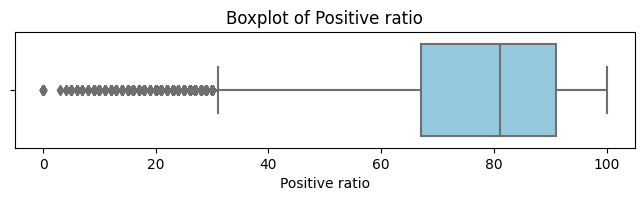

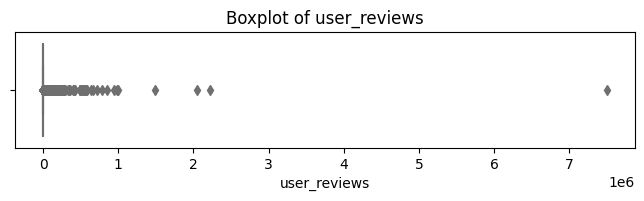

In [229]:
num_cols = df_filtered.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df_filtered[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [230]:
for col in num_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / df_filtered.shape[0]:.2f}%)")

Price original: 2046 outliers (4.97%)
DLC count: 9061 outliers (22.01%)
Required age: 1145 outliers (2.78%)
Positive ratio: 932 outliers (2.26%)
user_reviews: 6533 outliers (15.87%)


In [231]:
df_filtered['Required age'].value_counts().sort_values(ascending=False)

0     40025
17      732
18      155
13      153
16       54
10       17
12       14
15        5
6         4
14        3
7         3
3         2
20        1
1         1
19        1
Name: Required age, dtype: int64

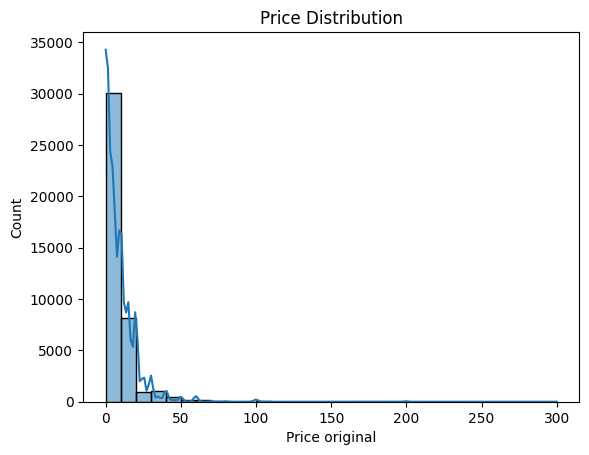

In [232]:
sns.histplot(df_filtered['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [233]:
print(df_filtered['Price original'].describe())

count    41170.000000
mean         8.722289
std         11.496071
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.900000
Name: Price original, dtype: float64


In [234]:
Q1 = df_filtered['Price original'].quantile(0.25)
Q3 = df_filtered['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_filtered[(df_filtered['Price original'] < lower) | (df_filtered['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

Release date  Price original  DLC count  Required age  Windows    Mac  \
33552   2013-11-12          299.90          0             0     True  False   
18732   2018-10-10          269.99          0             0     True   True   
37546   2022-11-01          249.00          0             0     True  False   
39674   2023-03-22          199.99          0             0     True   True   
40504   2023-05-23          199.99          0             0     True   True   
38827   2023-01-27          199.99          0             0     True  False   
40478   2023-05-23          199.99          0             0     True   True   
8118    2022-03-21          199.99          0             0     True  False   
33133   2016-02-02          199.99          0             0     True  False   
7116    2021-09-09          199.99          0             0     True  False   
38224   2022-12-17          199.99          0             0     True   True   
9175    2018-12-03          199.99          0             0     True   True   
36855   2022-09-28          199.99          0             0     True  False   
39277   2023-02-21          199.99          0             0     True   True   
36736   2022-09-19          199.99          0             0     True  False   

       Linux                                Supported languages  \
33552  False                                            English   
18732  False                                            English   
37546  False              English,French,German,Spanish - Spain   
39674   True  English,French,Italian,German,Spanish - Spain,...   
40504   True  English,French,Italian,German,Spanish - Spain,...   
38827  False                                            English   
40478   True  English,French,Italian,German,Spanish - Spain,...   
8118   False                 English,Russian,Simplified Chinese   
33133  False  English,Italian,Japanese,Simplified Chinese,Ge...   
7116   False              English,French,German,Spanish - Spain   
38224   True  English,French,Italian,German,Spanish - Spain,...   
9175   False                                            English   
36855  False                                            English   
39277   True  English,French,Italian,German,Spanish - Spain,...   
36736  False                                            English   

      Full audio languages                        Developers  \
33552                  NaN                          Aartform   
18732                  NaN                            SideFX   
37546                  NaN               MAGIX Software GmbH   
39674                  NaN                            Aztech   
40504                  NaN                      PUZZLE Games   
38827                  NaN                              Hede   
40478                  NaN                      PUZZLE Games   
8118                   NaN  Cristian Manolachi,Atomic Fabrik   
33133                  NaN                        3Dflow SRL   
7116                   NaN               MAGIX Software GmbH   
38224                  NaN                    Top-Down Games   
9175               English                          JEPR DEV   
36855                  NaN  Atomic Fabrik,Cristian Manolachi   
39277                  NaN                    Top-Down Games   
36736                  NaN  Atomic Fabrik,Cristian Manolachi   

                             Publishers  \
33552                          Aartform   
18732                            SideFX   
37546               MAGIX Software GmbH   
39674      Azerbaijan Technology,Aztech   
40504                              Hede   
38827                              Hede   
40478                              Hede   
8118   Cristian Manolachi,Atomic Fabrik   
33133                        3Dflow SRL   
7116                MAGIX Software GmbH   
38224                              Hede   
9175                           JEPR DEV   
36855  Atomic Fabrik,Cristian Manolachi   
39277                              Hede  

In [235]:
tags_series = df_filtered['Tags'].dropna().str.split(',').explode().str.strip()

tag_counts = tags_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique Tags: {len(tag_counts)}\n")

print("Tag Value Counts:")
print(tag_counts)

Total Unique Tags: 444

Tag Value Counts:
Indie                                23737
Singleplayer                         19671
Adventure                            16660
Action                               16529
Casual                               15117
2D                                    9935
Simulation                            8926
Strategy                              8452
RPG                                   7763
Atmospheric                           7615
Puzzle                                6875
Story Rich                            6360
Multiplayer                           5698
Pixel Graphics                        5305
Early Access                          5201
3D                                    4883
Exploration                           4865
Cute                                  4859
First-Person                          4847
Colorful                              4736
Fantasy                               4497
Funny                                 4450
Anime       

In [236]:
genres_series = df_filtered['Genres'].dropna().str.split(',').explode().str.strip()

genre_counts = genres_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique Genres: {len(genre_counts)}\n")

print("genre Value Counts:")
print(genre_counts)

Total Unique Genres: 28

genre Value Counts:
Indie                    28898
Action                   17082
Adventure                16830
Casual                   15143
Simulation                9062
Strategy                  8469
RPG                       7940
Free to Play              4779
Early Access              4680
Sports                    1920
Racing                    1559
Massively Multiplayer     1374
Utilities                  452
Violent                    294
Design & Illustration      292
Animation & Modeling       242
Gore                       187
Education                  166
Video Production           143
Game Development           113
Software Training          106
Audio Production           106
Nudity                      89
Sexual Content              70
Web Publishing              67
Photo Editing               66
Accounting                   7
Movie                        1
Name: Genres, dtype: int64


In [237]:
categories_series = df_filtered['Categories'].dropna().str.split(',').explode().str.strip()

categories_counts = categories_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique Categories: {len(categories_counts)}\n")

print("categorie Value Counts:")
print(tag_counts)

Total Unique Categories: 40

categorie Value Counts:
Indie                                23737
Singleplayer                         19671
Adventure                            16660
Action                               16529
Casual                               15117
2D                                    9935
Simulation                            8926
Strategy                              8452
RPG                                   7763
Atmospheric                           7615
Puzzle                                6875
Story Rich                            6360
Multiplayer                           5698
Pixel Graphics                        5305
Early Access                          5201
3D                                    4883
Exploration                           4865
Cute                                  4859
First-Person                          4847
Colorful                              4736
Fantasy                               4497
Funny                                 4450
A

In [238]:
col_to_clean = ['Supported languages', 'Genres', 'Categories', 'Developers', 'Publishers']
df_filtered.dropna(subset=col_to_clean, inplace=True)

df_filtered['Has full audio'] = df_filtered['Full audio languages'].notnull().map({True: 1, False: 0})
df_filtered['Has movie'] = df_filtered['Movies'].notnull().map({True: 1, False: 0})
df_filtered.drop(columns=['Full audio languages', 'Movies'], inplace=True)

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\WilliamVlr\AppData\Local\Temp\ipykernel_29012\2613044373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Has full audio'] = df_filtered['Full audio languages'].notnull().map({True: 1, False: 0})
C:\Users\WilliamVlr\AppData\Local\Temp\ipykernel_29012\2613044373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [239]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40376 entries, 0 to 41169
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         40376 non-null  object 
 1   Price original       40376 non-null  float64
 2   DLC count            40376 non-null  int64  
 3   Required age         40376 non-null  int64  
 4   Windows              40376 non-null  bool   
 5   Mac                  40376 non-null  bool   
 6   Linux                40376 non-null  bool   
 7   Supported languages  40376 non-null  object 
 8   Developers           40376 non-null  object 
 9   Publishers           40376 non-null  object 
 10  rating               40376 non-null  object 
 11  Positive ratio       40376 non-null  int64  
 12  Genres               40376 non-null  object 
 13  Tags                 36814 non-null  object 
 14  Categories           40376 non-null  object 
 15  user_reviews         40376 non-null 

In [240]:
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training', 'Early Access']
mask = df_filtered['Genres'].str.contains('|'.join(software_keywords), na=False) | df_filtered['Tags'].str.contains('|'.join(software_keywords), na=False)
df_filtered_games_only = df_filtered[~mask].copy()
df_filtered_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34225 entries, 0 to 41168
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         34225 non-null  object 
 1   Price original       34225 non-null  float64
 2   DLC count            34225 non-null  int64  
 3   Required age         34225 non-null  int64  
 4   Windows              34225 non-null  bool   
 5   Mac                  34225 non-null  bool   
 6   Linux                34225 non-null  bool   
 7   Supported languages  34225 non-null  object 
 8   Developers           34225 non-null  object 
 9   Publishers           34225 non-null  object 
 10  rating               34225 non-null  object 
 11  Positive ratio       34225 non-null  int64  
 12  Genres               34225 non-null  object 
 13  Tags                 31271 non-null  object 
 14  Categories           34225 non-null  object 
 15  user_reviews         34225 non-null 

In [241]:
def classify_rating(rating):
    if rating in ['Mostly Positive', 'Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 1
    else:
        return 0
    
df_filtered_games_only['Rating'] = df_filtered_games_only['rating'].apply(classify_rating)
df_filtered_games_only.drop(columns=['rating'], inplace=True)

In [242]:
df_filtered_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34225 entries, 0 to 41168
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         34225 non-null  object 
 1   Price original       34225 non-null  float64
 2   DLC count            34225 non-null  int64  
 3   Required age         34225 non-null  int64  
 4   Windows              34225 non-null  bool   
 5   Mac                  34225 non-null  bool   
 6   Linux                34225 non-null  bool   
 7   Supported languages  34225 non-null  object 
 8   Developers           34225 non-null  object 
 9   Publishers           34225 non-null  object 
 10  Positive ratio       34225 non-null  int64  
 11  Genres               34225 non-null  object 
 12  Tags                 31271 non-null  object 
 13  Categories           34225 non-null  object 
 14  user_reviews         34225 non-null  int64  
 15  Has full audio       34225 non-null 

In [243]:
top_developers = df_filtered_games_only['Developers'].value_counts().head(10000).index
top_publishers = df_filtered_games_only['Publishers'].value_counts().head(10000).index

df_filtered_games_only  = df_filtered_games_only[
    df_filtered_games_only['Developers'].isin(top_developers) &
    df_filtered_games_only['Publishers'].isin(top_publishers)
]

### Split Data

In [244]:
from sklearn.model_selection import train_test_split

X = df_filtered_games_only.drop(columns=['Rating'])
y = df_filtered_games_only['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [245]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

### Outlier Handling

In [246]:
df_train['Has DLC'] = np.where(df_train['DLC count'] > 0, 1, 0)
df_train.drop(columns=['DLC count'], inplace=True)

df_test['Has DLC'] = np.where(df_test['DLC count'] > 0, 1, 0)
df_test.drop(columns=['DLC count'], inplace=True)

In [247]:
df_train['price_log'] = np.log1p(df_train['Price original'])
df_train.drop(columns=['Price original'], inplace=True)

df_test['price_log'] = np.log1p(df_test['Price original'])
df_test.drop(columns=['Price original'], inplace=True)

In [248]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         16105 non-null  object 
 1   Required age         16105 non-null  int64  
 2   Windows              16105 non-null  bool   
 3   Mac                  16105 non-null  bool   
 4   Linux                16105 non-null  bool   
 5   Supported languages  16105 non-null  object 
 6   Developers           16105 non-null  object 
 7   Publishers           16105 non-null  object 
 8   Positive ratio       16105 non-null  int64  
 9   Genres               16105 non-null  object 
 10  Tags                 14744 non-null  object 
 11  Categories           16105 non-null  object 
 12  user_reviews         16105 non-null  int64  
 13  Has full audio       16105 non-null  int64  
 14  Has movie            16105 non-null  int64  
 15  Rating               16105 non-n

### Feature Extraction & Engineering

In [ ]:
df_train['platform_count'] = df_train[['Windows', 'Mac', 'Linux']].sum(axis=1)
df_train.drop(columns=['Windows', 'Mac', 'Linux'], inplace=True)

df_test['platform_count'] = df_test[['Windows', 'Mac', 'Linux']].sum(axis=1)
df_test.drop(columns=['Windows', 'Mac', 'Linux'], inplace=True)

In [ ]:
from datetime import datetime

df_train['Release date'] = pd.to_datetime(df_train['Release date'], errors='coerce')

df_train['release_year'] = df_train['Release date'].dt.year
df_train['release_quarter'] = df_train['Release date'].dt.quarter

df_train['Release Quartile'] = 'Q' + df_train['release_quarter'].astype(str) + ' ' + df_train['release_year'].astype(str)

current_year = datetime.now().year
df_train['release_age'] = current_year - df_train['release_year']

df_train['release_q'] = df_train['Release Quartile'].str.extract(r'(Q\d)')

quarter_dummies = pd.get_dummies(df_train['release_q'], prefix='quarter')
df_train = pd.concat([df_train, quarter_dummies], axis=1)

df_train.drop(columns=[
    'Release date', 'release_year', 'release_quarter', 'release_q', 'Release Quartile'
], inplace=True)

In [ ]:
from datetime import datetime

df_test['Release date'] = pd.to_datetime(df_test['Release date'], errors='coerce')

df_test['release_year'] = df_test['Release date'].dt.year
df_test['release_quarter'] = df_test['Release date'].dt.quarter

df_test['Release Quartile'] = 'Q' + df_test['release_quarter'].astype(str) + ' ' + df_test['release_year'].astype(str)

current_year = datetime.now().year
df_test['release_age'] = current_year - df_test['release_year']

df_test['release_q'] = df_test['Release Quartile'].str.extract(r'(Q\d)')

quarter_dummies_test = pd.get_dummies(df_test['release_q'], prefix='quarter')

expected_quarters = ['quarter_Q1', 'quarter_Q2', 'quarter_Q3', 'quarter_Q4']
for col in expected_quarters:
    if col not in quarter_dummies_test.columns:
        quarter_dummies_test[col] = 0
quarter_dummies_test = quarter_dummies_test[expected_quarters]

df_test = pd.concat([df_test, quarter_dummies_test], axis=1)

df_test.drop(columns=[
    'Release date', 'release_year', 'release_quarter', 'release_q', 'Release Quartile'
], inplace=True)

In [252]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Required age         16105 non-null  int64  
 1   Supported languages  16105 non-null  object 
 2   Developers           16105 non-null  object 
 3   Publishers           16105 non-null  object 
 4   Positive ratio       16105 non-null  int64  
 5   Genres               16105 non-null  object 
 6   Tags                 14744 non-null  object 
 7   Categories           16105 non-null  object 
 8   user_reviews         16105 non-null  int64  
 9   Has full audio       16105 non-null  int64  
 10  Has movie            16105 non-null  int64  
 11  Rating               16105 non-null  int64  
 12  Has DLC              16105 non-null  int32  
 13  price_log            16105 non-null  float64
 14  platform_count       16105 non-null  int64  
 15  release_age          16105 non-n

In [253]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Required age         6903 non-null   int64  
 1   Supported languages  6903 non-null   object 
 2   Developers           6903 non-null   object 
 3   Publishers           6903 non-null   object 
 4   Positive ratio       6903 non-null   int64  
 5   Genres               6903 non-null   object 
 6   Tags                 6361 non-null   object 
 7   Categories           6903 non-null   object 
 8   user_reviews         6903 non-null   int64  
 9   Has full audio       6903 non-null   int64  
 10  Has movie            6903 non-null   int64  
 11  Rating               6903 non-null   int64  
 12  Has DLC              6903 non-null   int32  
 13  price_log            6903 non-null   float64
 14  platform_count       6903 non-null   int64  
 15  release_age          6903 non-nul

In [254]:
languages_series = df_filtered['Supported languages'].dropna().str.split(',').explode().str.strip()

languages_counts = languages_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique languages: {len(languages_counts)}\n")

print("categorie Value Counts:")
print(languages_counts)

Total Unique languages: 123

categorie Value Counts:
English                                                                 38794
German                                                                  12219
French                                                                  11782
Simplified Chinese                                                      11532
Russian                                                                 11147
Spanish - Spain                                                         10827
Japanese                                                                 9207
Italian                                                                  8274
Portuguese - Brazil                                                      6161
Korean                                                                   6068
Traditional Chinese                                                      5801
Polish                                                                   4942
Turkish    

In [ ]:
df_train['languages_count'] = df_train['Supported languages'].apply(
    lambda x: len(x.split(',')) if pd.notnull(x) else 0
)

asian_languages = {
    "Simplified Chinese", "Traditional Chinese", "Japanese", "Korean",
    "Thai", "Vietnamese", "Indonesian", "Hindi", "Telugu", "Tamil", "Malay", "Urdu", "Bengali", "Filipino"
}

european_languages = {
    "English", "French", "German", "Italian", "Spanish - Spain", "Dutch", "Russian", "Portuguese",
    "Portuguese - Brazil", "Polish", "Czech", "Hungarian", "Swedish", "Norwegian", "Finnish", "Greek", "Danish"
}

def check_region(supported_langs, region_set):
    if pd.isna(supported_langs):
        return 0
    langs = [lang.strip() for lang in supported_langs.split(',')]
    return int(any(lang in region_set for lang in langs))

df_train['supports_asian_language'] = df_train['Supported languages'].apply(
    lambda x: check_region(x, asian_languages)
)

df_train['supports_european_language'] = df_train['Supported languages'].apply(
    lambda x: check_region(x, european_languages)
)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Required age                16105 non-null  int64  
 1   Supported languages         16105 non-null  object 
 2   Developers                  16105 non-null  object 
 3   Publishers                  16105 non-null  object 
 4   Positive ratio              16105 non-null  int64  
 5   Genres                      16105 non-null  object 
 6   Tags                        14744 non-null  object 
 7   Categories                  16105 non-null  object 
 8   user_reviews                16105 non-null  int64  
 9   Has full audio              16105 non-null  int64  
 10  Has movie                   16105 non-null  int64  
 11  Rating                      16105 non-null  int64  
 12  Has DLC                     16105 non-null  int32  
 13  price_log                  

In [ ]:
df_test['languages_count'] = df_test['Supported languages'].apply(
    lambda x: len(x.split(',')) if pd.notnull(x) else 0
)

df_test['supports_asian_language'] = df_test['Supported languages'].apply(
    lambda x: check_region(x, asian_languages)
)

df_test['supports_european_language'] = df_test['Supported languages'].apply(
    lambda x: check_region(x, european_languages)
)

In [257]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Required age                6903 non-null   int64  
 1   Supported languages         6903 non-null   object 
 2   Developers                  6903 non-null   object 
 3   Publishers                  6903 non-null   object 
 4   Positive ratio              6903 non-null   int64  
 5   Genres                      6903 non-null   object 
 6   Tags                        6361 non-null   object 
 7   Categories                  6903 non-null   object 
 8   user_reviews                6903 non-null   int64  
 9   Has full audio              6903 non-null   int64  
 10  Has movie                   6903 non-null   int64  
 11  Rating                      6903 non-null   int64  
 12  Has DLC                     6903 non-null   int32  
 13  price_log                   

In [ ]:
dev_counts = df_train['Developers'].value_counts()

df_train['developers_game_count'] = df_train['Developers'].map(dev_counts)
df_test['developers_game_count'] = df_test['Developers'].map(dev_counts).fillna(0).astype(int)  # unseen devs get 0

def developer_tier(count):
    if count >= 50:
        return 'top_dev'
    elif count >= 10:
        return 'experienced_dev'
    elif count >= 2:
        return 'mid_dev'
    else:
        return 'new_dev'

df_train['developer_tier'] = df_train['developers_game_count'].apply(developer_tier)
df_test['developer_tier'] = df_test['developers_game_count'].apply(developer_tier)

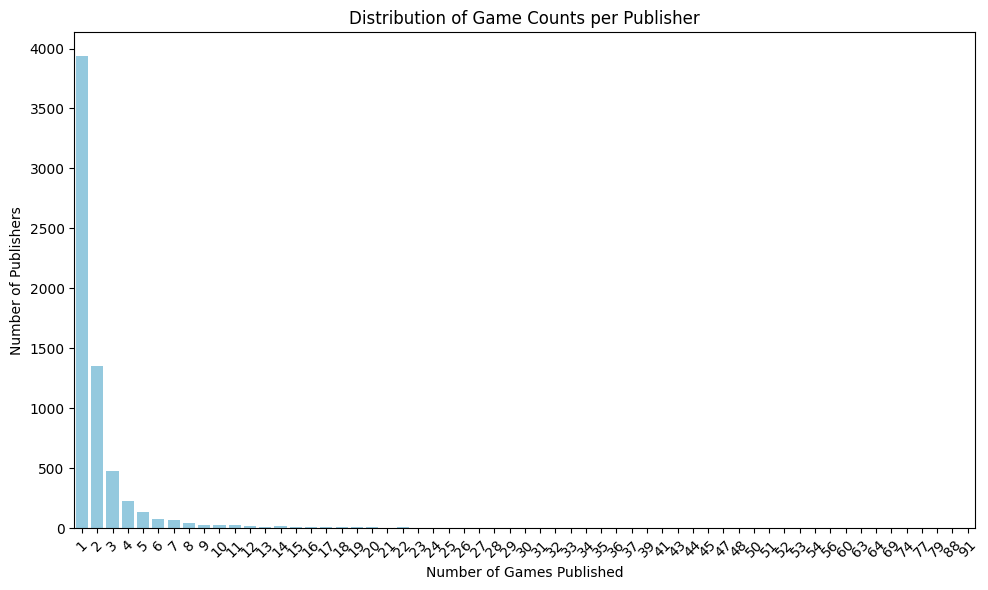

In [ ]:
publisher_game_counts = df_train['Publishers'].value_counts()

publisher_frequency_distribution = publisher_game_counts.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_frequency_distribution.index, y=publisher_frequency_distribution.values, color='skyblue')

plt.xlabel('Number of Games Published')
plt.ylabel('Number of Publishers')
plt.title('Distribution of Game Counts per Publisher')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
pub_counts = df_train['Publishers'].value_counts()

df_train['publishers_game_count'] = df_train['Publishers'].map(pub_counts)
df_test['publishers_game_count'] = df_test['Publishers'].map(pub_counts).fillna(0).astype(int)  # unseen = 0

def publisher_tier(count):
    if count >= 45:
        return 'top_pub'
    elif count >= 10:
        return 'experienced_pub'
    elif count >= 2:
        return 'mid_pub'
    else:
        return 'new_pub'

df_train['publisher_tier'] = df_train['publishers_game_count'].apply(publisher_tier)
df_test['publisher_tier'] = df_test['publishers_game_count'].apply(publisher_tier)


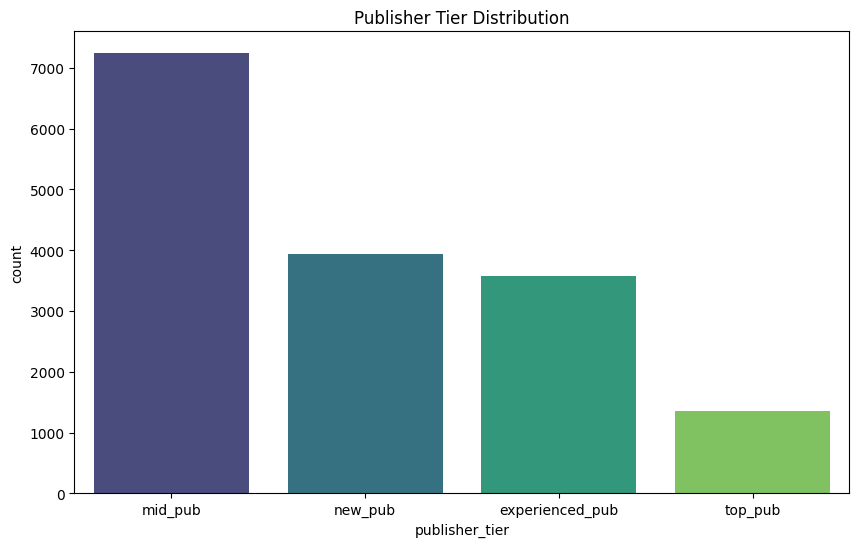

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='publisher_tier', order=df_train['publisher_tier'].value_counts().index, palette='viridis')
plt.title('Publisher Tier Distribution')
plt.show()


### ENCODING

In [ ]:
from collections import Counter

df_train['Genres'] = df_train['Genres'].fillna('').apply(
    lambda x: ','.join(sorted(set(i.strip() for i in x.split(','))) if x else [])
)

genre_series_train = df_train['Genres'].str.split(',').explode().str.strip()
genre_counts = Counter(genre_series_train)
total_genre_mentions = sum(genre_counts.values())

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

cumulative = 0
top_genres = []
for genre, count in sorted_genres:
    cumulative += count
    top_genres.append(genre)
    if cumulative / total_genre_mentions >= 0.95:
        break

print(f"Top Genres Used for Encoding (95% coverage):\n{top_genres}\n")

🎯 Top Genres Used for Encoding (95% coverage):
['Indie', 'Adventure', 'Casual', 'Action', 'Simulation', 'Strategy', 'RPG', 'Free to Play']



In [ ]:
for genre in top_genres:
    col_name = f'genre_{genre.lower().replace(" ", "_")}'
    df_train[col_name] = df_train['Genres'].apply(lambda x: int(genre in x.split(',')) if pd.notnull(x) else 0)
    df_test[col_name] = df_test['Genres'].apply(lambda x: int(genre in x.split(',')) if pd.notnull(x) else 0)

df_train['genre_count'] = df_train['Genres'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
df_test['genre_count'] = df_test['Genres'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

df_train.drop(columns=['Genres'], inplace=True)
df_test.drop(columns=['Genres'], inplace=True)

In [ ]:
category_series = df_train['Categories'].dropna().str.split(',').explode().str.strip()
category_counts = Counter(category_series)

sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
total_mentions = sum(category_counts.values())

cumulative = 0
top_categories = []
for category, count in sorted_categories:
    cumulative += count
    top_categories.append(category)
    if cumulative / total_mentions >= 0.95:
        break

important_manual_categories = ['In-App Purchases']
top_categories = list(set(top_categories) | set(important_manual_categories))

print(f"Final Categories for Encoding (95% + manual):\n{top_categories}")

🎯 Final Categories for Encoding (95% + manual):
['Shared/Split Screen PvP', 'Remote Play Together', 'In-App Purchases', 'Single-player', 'Online PvP', 'Remote Play on TV', 'Cross-Platform Multiplayer', 'PvP', 'Steam Trading Cards', 'Online Co-op', 'Stats', 'Shared/Split Screen', 'Full controller support', 'Co-op', 'Partial Controller Support', 'Shared/Split Screen Co-op', 'Steam Cloud', 'Multi-player', 'Steam Leaderboards', 'Steam Achievements']


In [ ]:
for category in top_categories:
    col_name = f'cat_{category.lower().replace(" ", "_").replace("-", "_")}'
    df_train[col_name] = df_train['Categories'].apply(lambda x: int(category in x.split(',')))
    df_test[col_name] = df_test['Categories'].apply(lambda x: int(category in x.split(',')))

cat_cols = [col for col in df_train.columns if col.startswith('cat_')]
print(f"Created category columns ({len(cat_cols)}):\n{cat_cols}")

Created category columns (20):
['cat_shared/split_screen_pvp', 'cat_remote_play_together', 'cat_in_app_purchases', 'cat_single_player', 'cat_online_pvp', 'cat_remote_play_on_tv', 'cat_cross_platform_multiplayer', 'cat_pvp', 'cat_steam_trading_cards', 'cat_online_co_op', 'cat_stats', 'cat_shared/split_screen', 'cat_full_controller_support', 'cat_co_op', 'cat_partial_controller_support', 'cat_shared/split_screen_co_op', 'cat_steam_cloud', 'cat_multi_player', 'cat_steam_leaderboards', 'cat_steam_achievements']


In [266]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Required age                    16105 non-null  int64  
 1   Supported languages             16105 non-null  object 
 2   Developers                      16105 non-null  object 
 3   Publishers                      16105 non-null  object 
 4   Positive ratio                  16105 non-null  int64  
 5   Tags                            14744 non-null  object 
 6   Categories                      16105 non-null  object 
 7   user_reviews                    16105 non-null  int64  
 8   Has full audio                  16105 non-null  int64  
 9   Has movie                       16105 non-null  int64  
 10  Rating                          16105 non-null  int64  
 11  Has DLC                         16105 non-null  int32  
 12  price_log                   

In [267]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Required age                    6903 non-null   int64  
 1   Supported languages             6903 non-null   object 
 2   Developers                      6903 non-null   object 
 3   Publishers                      6903 non-null   object 
 4   Positive ratio                  6903 non-null   int64  
 5   Tags                            6361 non-null   object 
 6   Categories                      6903 non-null   object 
 7   user_reviews                    6903 non-null   int64  
 8   Has full audio                  6903 non-null   int64  
 9   Has movie                       6903 non-null   int64  
 10  Rating                          6903 non-null   int64  
 11  Has DLC                         6903 non-null   int32  
 12  price_log                    

In [ ]:
dev_stats = df_train.groupby('Developers').agg({
    'user_reviews': 'sum',
    'Positive ratio': 'mean',
    'Developers': 'count'
}).rename(columns={'Developers': 'game_count'}).reset_index()

great_devs = dev_stats[
    (dev_stats['user_reviews'] >= 10000) &          
    (dev_stats['Positive ratio'] >= 70) &     
    (dev_stats['game_count'] >= 30)             
]['Developers'].tolist()

print(f"Selected Great Developers:\n{great_devs}")


🎯 Selected Great Developers:
['KOEI TECMO GAMES CO., LTD.', 'Sokpop Collective', 'Winged Cloud']


In [ ]:
for dev in great_devs:
    col_name = f"dev_{dev.lower().replace(' ', '_').replace('-', '_')}"
    df_train[col_name] = (df_train['Developers'] == dev).astype(int)
    df_test[col_name] = (df_test['Developers'] == dev).astype(int)

In [270]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Required age                    16105 non-null  int64  
 1   Supported languages             16105 non-null  object 
 2   Developers                      16105 non-null  object 
 3   Publishers                      16105 non-null  object 
 4   Positive ratio                  16105 non-null  int64  
 5   Tags                            14744 non-null  object 
 6   Categories                      16105 non-null  object 
 7   user_reviews                    16105 non-null  int64  
 8   Has full audio                  16105 non-null  int64  
 9   Has movie                       16105 non-null  int64  
 10  Rating                          16105 non-null  int64  
 11  Has DLC                         16105 non-null  int32  
 12  price_log                   

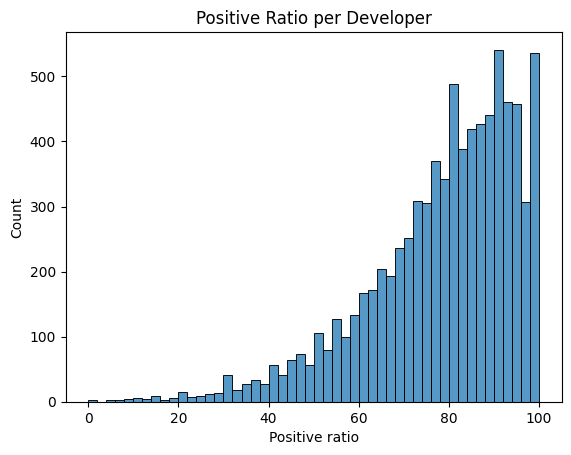

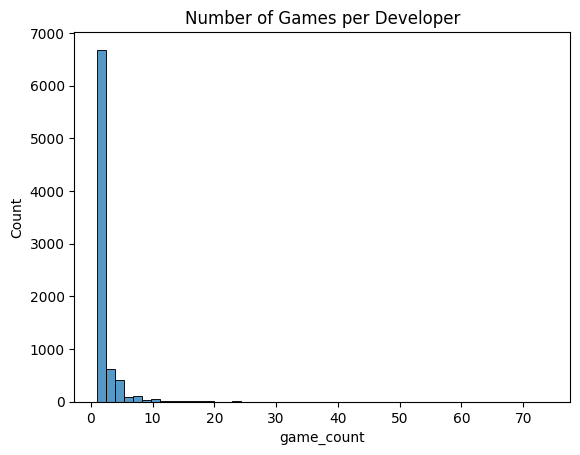

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dev_stats['Positive ratio'], bins=50)
plt.title("Positive Ratio per Developer")
plt.show()

sns.histplot(dev_stats['game_count'], bins=50)
plt.title("Number of Games per Developer")
plt.show()


In [ ]:
pub_stats = df_train.groupby('Publishers').agg({
    'Positive ratio': 'mean',
    'Publishers': 'count'  # counts number of games per developer
}).rename(columns={'Publishers': 'game_count'}).reset_index()


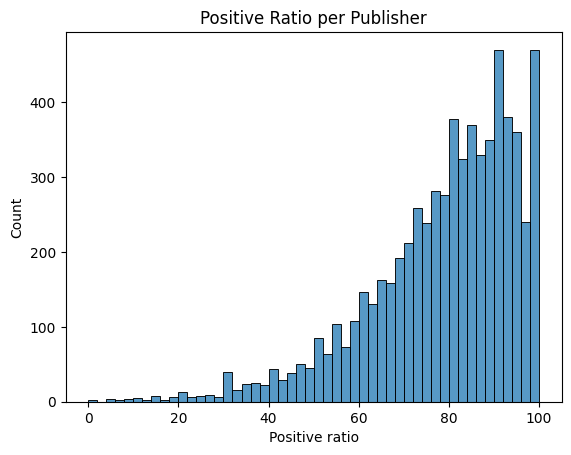

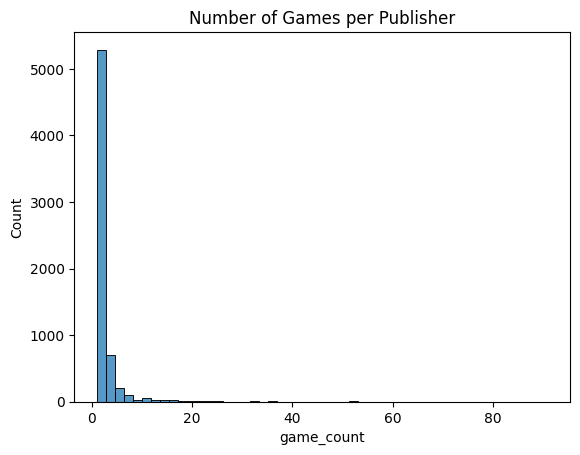

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(pub_stats['Positive ratio'], bins=50)
plt.title("Positive Ratio per Publisher")
plt.show()

sns.histplot(pub_stats['game_count'], bins=50)
plt.title("Number of Games per Publisher")
plt.show()

In [ ]:
great_pubs = pub_stats[
    (pub_stats['Positive ratio'] >= 80) &      
    (pub_stats['game_count'] >= 50)             
]['Publishers'].tolist()

print(f"Selected Great Publishers:\n{great_pubs}")

🎯 Selected Great Publishers:
['Atomic Fabrik,Cristian Manolachi', 'Big Fish Games', 'Devolver Digital', 'Komodo', 'Laush Studio', 'SEGA', 'Sekai Project']


In [ ]:
for pub in great_pubs:
    col_name = f"pub_{pub.lower().replace(' ', '_').replace('-', '_')}"
    df_train[col_name] = (df_train['Publishers'] == pub).astype(int)
    df_test[col_name] = (df_test['Publishers'] == pub).astype(int)

In [276]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          16105 non-null  int64  
 1   Supported languages                   16105 non-null  object 
 2   Developers                            16105 non-null  object 
 3   Publishers                            16105 non-null  object 
 4   Positive ratio                        16105 non-null  int64  
 5   Tags                                  14744 non-null  object 
 6   Categories                            16105 non-null  object 
 7   user_reviews                          16105 non-null  int64  
 8   Has full audio                        16105 non-null  int64  
 9   Has movie                             16105 non-null  int64  
 10  Rating                                16105 non-null  int64  
 11  Has DLC    

In [ ]:
dev_tier_map = {
    'new_dev': 0,
    'mid_dev': 1,
    'experienced_dev': 2,
    'top_dev': 3
}

pub_tier_map = {
    'new_pub': 0,
    'mid_pub': 1,
    'experienced_pub': 2,
    'top_pub': 3
}

In [ ]:
df_train['developer_tier'] = df_train['developer_tier'].map(dev_tier_map)
df_train['publisher_tier'] = df_train['publisher_tier'].map(pub_tier_map)

df_test['developer_tier'] = df_test['developer_tier'].map(dev_tier_map)
df_test['publisher_tier'] = df_test['publisher_tier'].map(pub_tier_map)


In [279]:
df_train_final = df_train.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio'])
df_test_final = df_test.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio'])

In [280]:
df_train_final = df_train.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio', 'user_reviews'])
df_test_final = df_test.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio', 'user_reviews'])

Correlation with rating:
Rating                                  1.000000
cat_steam_cloud                         0.123731
cat_steam_achievements                  0.111528
cat_full_controller_support             0.096543
Has DLC                                 0.086680
supports_asian_language                 0.076017
cat_single_player                       0.067996
platform_count                          0.065440
cat_remote_play_on_tv                   0.050402
price_log                               0.043878
languages_count                         0.040763
cat_steam_leaderboards                  0.039720
genre_indie                             0.039352
pub_sekai_project                       0.028560
cat_remote_play_together                0.027051
pub_devolver_digital                    0.026752
genre_casual                            0.026029
cat_shared/split_screen_co_op           0.023764
genre_adventure                         0.022836
pub_laush_studio                        0.02

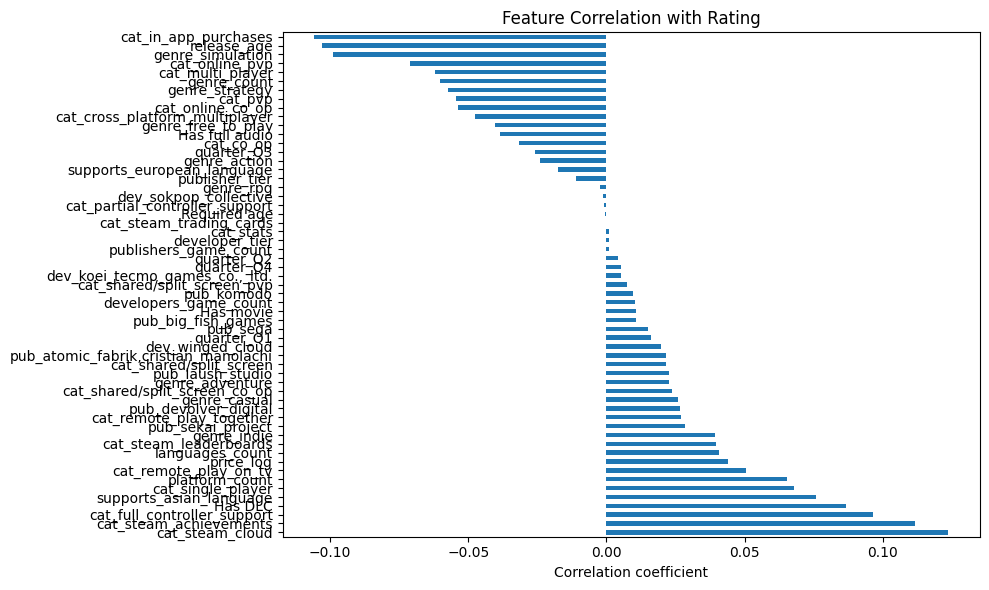

In [ ]:
numeric_cols = df_train_final.select_dtypes(include=['number']).columns
corr_with_rating = df_train_final[numeric_cols].corr()['Rating'].sort_values(ascending=False)
print("Correlation with rating:")
print(corr_with_rating)

plt.figure(figsize=(10, 6))
corr_with_rating.drop('Rating').plot(kind='barh')
plt.title("Feature Correlation with Rating")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

In [282]:
df_train_final.to_csv('data/modelling/train_processed.csv', index=False)
df_test_final.to_csv('data/modelling/test_processed.csv', index=False)

## MODELLING

### PREPARATION

In [283]:
train = pd.read_csv("data/modelling/train_processed.csv")
test = pd.read_csv("data/modelling/test_processed.csv")

In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16105 entries, 0 to 16104
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          16105 non-null  int64  
 1   Has full audio                        16105 non-null  int64  
 2   Has movie                             16105 non-null  int64  
 3   Rating                                16105 non-null  int64  
 4   Has DLC                               16105 non-null  int64  
 5   price_log                             16105 non-null  float64
 6   platform_count                        16105 non-null  int64  
 7   release_age                           16105 non-null  int64  
 8   quarter_Q1                            16105 non-null  int64  
 9   quarter_Q2                            16105 non-null  int64  
 10  quarter_Q3                            16105 non-null  int64  
 11  quarter_Q4     

In [285]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          6903 non-null   int64  
 1   Has full audio                        6903 non-null   int64  
 2   Has movie                             6903 non-null   int64  
 3   Rating                                6903 non-null   int64  
 4   Has DLC                               6903 non-null   int64  
 5   price_log                             6903 non-null   float64
 6   platform_count                        6903 non-null   int64  
 7   release_age                           6903 non-null   int64  
 8   quarter_Q1                            6903 non-null   int64  
 9   quarter_Q2                            6903 non-null   int64  
 10  quarter_Q3                            6903 non-null   int64  
 11  quarter_Q4       

In [ ]:
X_train = train.drop(columns=['Rating'])
y_train = train['Rating']

X_test = test.drop(columns=['Rating'])
y_test = test['Rating']

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=1000, solver='lbfgs')
cv = StratifiedKFold(n_splits=5)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='precision', verbose=1)
rfecv.fit(X_train, y_train)

selected_features = X_train.columns[rfecv.support_]
print(f"\n Optimal number of features: {rfecv.n_features_}")
print(f"Selected features:\n{selected_features.tolist()}")

X_train_selected_rfecv = X_train[selected_features]


Fitting estimator with 57 features.


c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 56 features.


c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 fe

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 fe

Optimal number of features: 50
Selected features:
['Has full audio', 'Has movie', 'Has DLC', 'platform_count', 'release_age', 'quarter_Q3', 'quarter_Q4', 'supports_asian_language', 'supports_european_language', 'developer_tier', 'publisher_tier', 'genre_indie', 'genre_adventure', 'genre_casual', 'genre_action', 'genre_simulation', 'genre_strategy', 'genre_rpg', 'genre_free_to_play', 'genre_count', 'cat_shared/split_screen_pvp', 'cat_remote_play_together', 'cat_in_app_purchases', 'cat_single_player', 'cat_online_pvp', 'cat_remote_play_on_tv', 'cat_cross_platform_multiplayer', 'cat_pvp', 'cat_steam_trading_cards', 'cat_online_co_op', 'cat_stats', 'cat_shared/split_screen', 'cat_full_controller_support', 'cat_co_op', 'cat_partial_controller_support', 'cat_shared/split_screen_co_op', 'cat_steam_cloud', 'cat_multi_player', 'cat_steam_leaderboards', 'cat_steam_achievements', 'dev_koei_tecmo_games_co.,_ltd.', 'dev_sokpop_collective', 'dev_winged_cloud', 'pub_atomic_fabrik,cristian_manolachi',

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


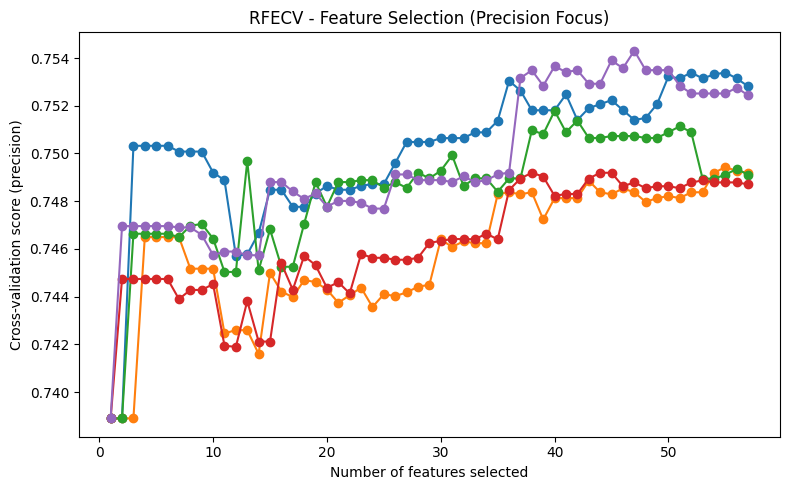

In [288]:
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features:")
selected_features = X_train.columns[rfecv.support_]
print(selected_features.tolist())

plt.figure(figsize=(8, 5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (precision)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, marker='o')
plt.title("RFECV - Feature Selection (Precision Focus)")
plt.tight_layout()
plt.show()

In [289]:
X_test= X_test[X_train_selected_rfecv.columns]

<AxesSubplot:title={'center':'Resampled Train Rating Distribution'}>

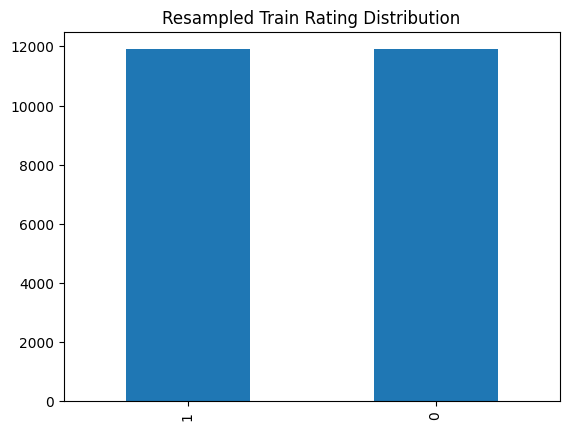

In [290]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected_rfecv, y_train)

y_train_resampled.value_counts().plot(kind='bar', title='Resampled Train Rating Distribution')

In [291]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16105 entries, 0 to 16104
Data columns (total 57 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          16105 non-null  int64  
 1   Has full audio                        16105 non-null  int64  
 2   Has movie                             16105 non-null  int64  
 3   Has DLC                               16105 non-null  int64  
 4   price_log                             16105 non-null  float64
 5   platform_count                        16105 non-null  int64  
 6   release_age                           16105 non-null  int64  
 7   quarter_Q1                            16105 non-null  int64  
 8   quarter_Q2                            16105 non-null  int64  
 9   quarter_Q3                            16105 non-null  int64  
 10  quarter_Q4                            16105 non-null  int64  
 11  languages_count

In [292]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Top 20 Important Features:
                        feature  importance
4                   release_age    0.160573
19                  genre_count    0.079630
10               publisher_tier    0.059253
9                developer_tier    0.047707
0                Has full audio    0.039320
3                platform_count    0.036224
36              cat_steam_cloud    0.035751
7       supports_asian_language    0.030941
39       cat_steam_achievements    0.030800
14                 genre_action    0.030731
12              genre_adventure    0.030354
2                       Has DLC    0.030119
5                    quarter_Q3    0.029586
13                 genre_casual    0.028654
11                  genre_indie    0.027169
32  cat_full_controller_support    0.025661
6                    quarter_Q4    0.025346
15             genre_simulation    0.024707
16               genre_strategy    0.023940
28      cat_steam_trading_cards    0.021376


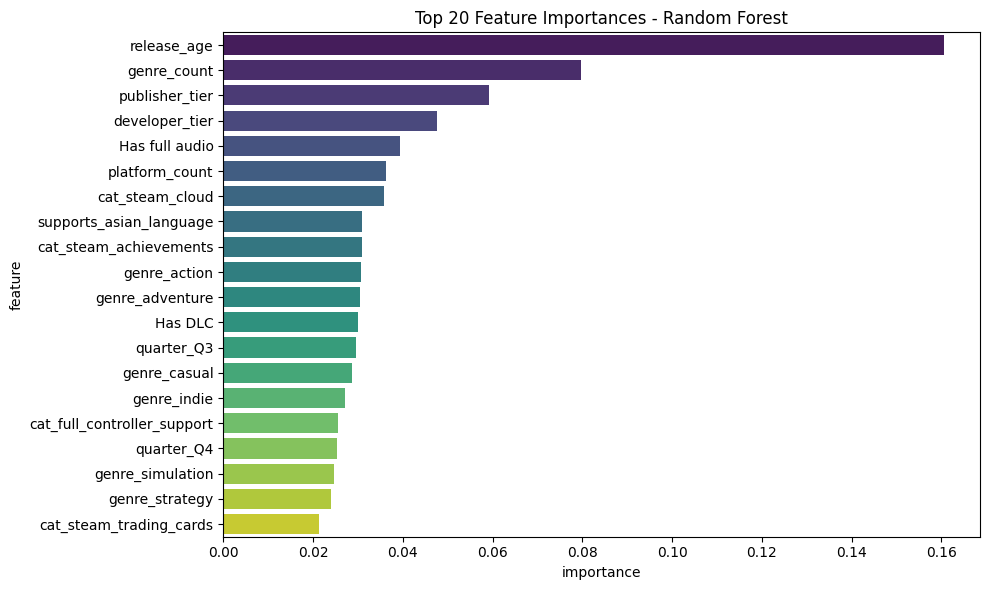

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test)

importances = model_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X_train_resampled.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Top 20 Important Features:")
print(feature_importance_df.head(20))

plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance_df.head(20),
    y='feature',
    x='importance',
    palette='viridis'
)
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [294]:
top_20_features = feature_importance_df.head(20)['feature'].tolist()
X_train_resampled = X_train_resampled[top_20_features]
X_test = X_test[top_20_features]

### MODEL 1 - LOGISTIC REGRESSION

=============== LOGISTIC REGRESSION - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.66      0.69      0.68     11900
    positive       0.68      0.64      0.66     11900

    accuracy                           0.67     23800
   macro avg       0.67      0.67      0.67     23800
weighted avg       0.67      0.67      0.67     23800



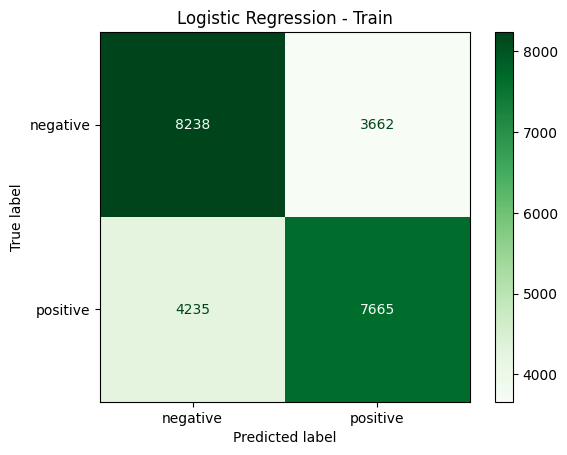

=============== LOGISTIC REGRESSION - TEST ===============
              precision    recall  f1-score   support

    negative       0.36      0.57      0.44      1741
    positive       0.82      0.65      0.72      5162

    accuracy                           0.63      6903
   macro avg       0.59      0.61      0.58      6903
weighted avg       0.70      0.63      0.65      6903



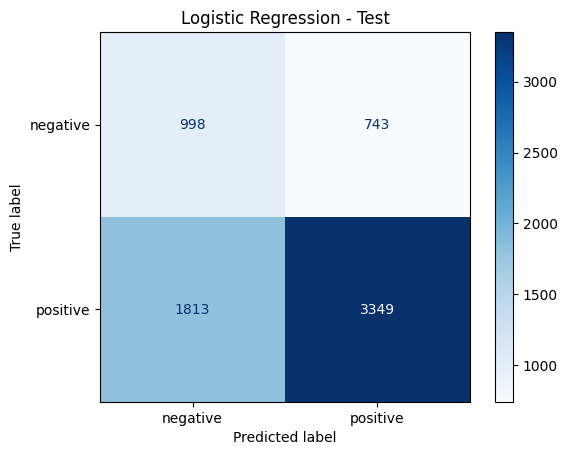

In [295]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_resampled, y_train_resampled)

y_pred_train_logreg = model_logreg.predict(X_train_resampled)
y_pred_test_logreg = model_logreg.predict(X_test)

print("=============== LOGISTIC REGRESSION - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_logreg, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Logistic Regression - Train")
plt.show()

print("=============== LOGISTIC REGRESSION - TEST ===============")
print(classification_report(y_test, y_pred_test_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_logreg, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Logistic Regression - Test")
plt.show()


In [296]:
print("Highest iteration:", model_logreg.n_iter_)

Highest iteration: [62]


### MODEL 2 - DECISION TREE

=============== DECISION TREE - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.95      0.99      0.97     11900
    positive       0.99      0.95      0.97     11900

    accuracy                           0.97     23800
   macro avg       0.97      0.97      0.97     23800
weighted avg       0.97      0.97      0.97     23800



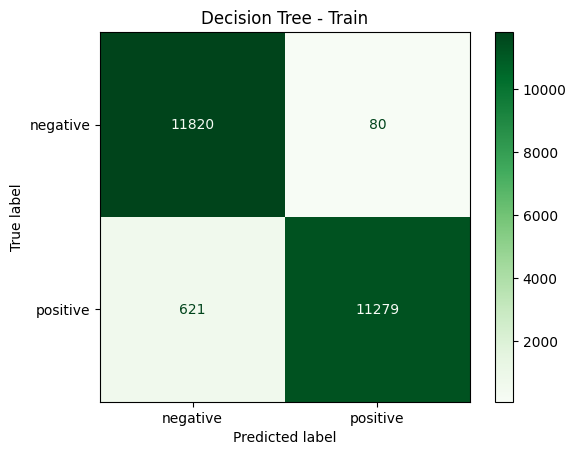

=============== DECISION TREE - TEST ===============
              precision    recall  f1-score   support

    negative       0.34      0.48      0.40      1741
    positive       0.80      0.69      0.74      5162

    accuracy                           0.64      6903
   macro avg       0.57      0.59      0.57      6903
weighted avg       0.68      0.64      0.65      6903



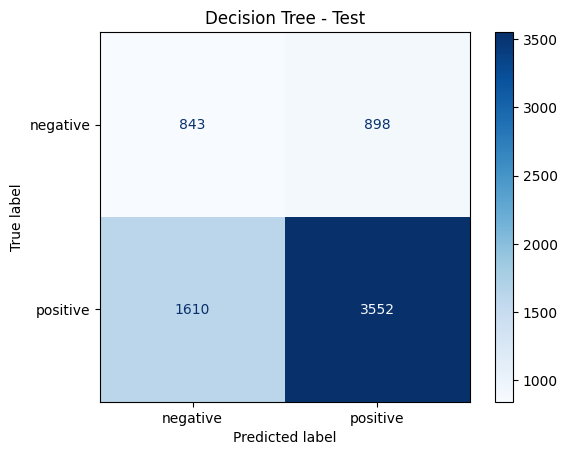

In [297]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_resampled, y_train_resampled)

y_pred_train_tree = model_tree.predict(X_train_resampled)
y_pred_test_tree = model_tree.predict(X_test)

print("=============== DECISION TREE - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_tree, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Decision Tree - Train")
plt.show()

print("=============== DECISION TREE - TEST ===============")
print(classification_report(y_test, y_pred_test_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_tree, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Decision Tree - Test")
plt.show()

### MODEL 3 - RANDOM FOREST

=============== RANDOM FOREST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.96      0.98      0.97     11900
    positive       0.98      0.96      0.97     11900

    accuracy                           0.97     23800
   macro avg       0.97      0.97      0.97     23800
weighted avg       0.97      0.97      0.97     23800



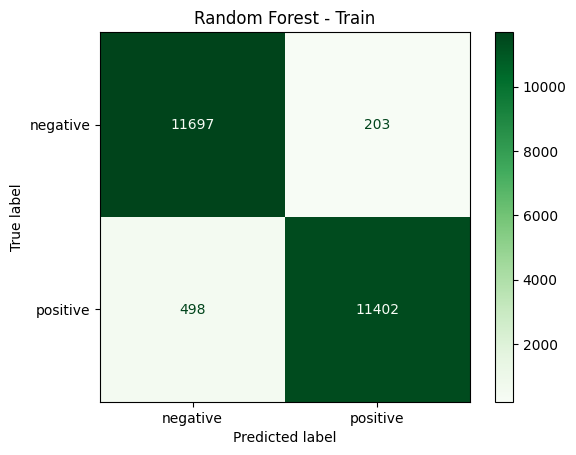

=============== RANDOM FOREST - TEST ===============
              precision    recall  f1-score   support

    negative       0.43      0.47      0.45      1741
    positive       0.82      0.79      0.80      5162

    accuracy                           0.71      6903
   macro avg       0.62      0.63      0.63      6903
weighted avg       0.72      0.71      0.71      6903



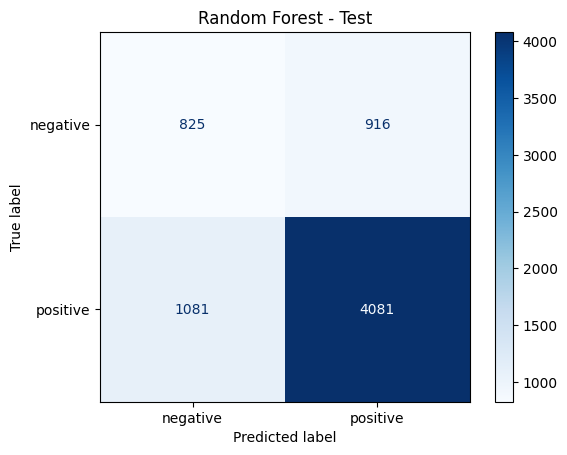

In [298]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test)

print("=============== RANDOM FOREST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_rf, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Random Forest - Train")
plt.show()

print("=============== RANDOM FOREST - TEST ===============")
print(classification_report(y_test, y_pred_test_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Random Forest - Test")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

=============== RANDOM FOREST (TUNED) - TEST ===============
              precision    recall  f1-score   support

    negative       0.40      0.50      0.45      1556
    positive       0.85      0.79      0.82      5498

    accuracy                           0.73      7054
   macro avg       0.63      0.64      0.63      7054
weighted avg       0.75      0.73      0.74      7054



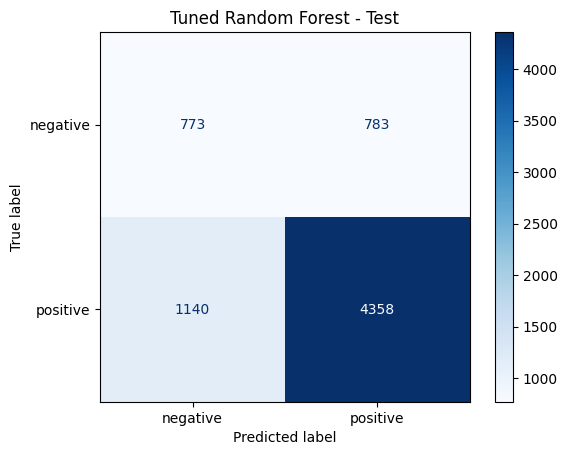

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='precision'
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_test_best_rf = best_rf_model.predict(X_test)

print("\n=============== RANDOM FOREST (TUNED) - TEST ===============")
print(classification_report(y_test, y_pred_test_best_rf, target_names=['negative', 'positive']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Tuned Random Forest - Test")
plt.show()

### MODEL 4 - KNN

=============== KNN - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.78      0.93      0.85     11900
    positive       0.91      0.74      0.82     11900

    accuracy                           0.83     23800
   macro avg       0.84      0.83      0.83     23800
weighted avg       0.84      0.83      0.83     23800



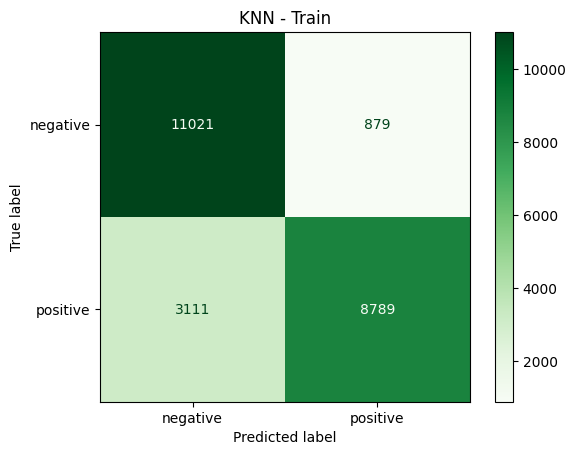

=============== KNN - TEST ===============
              precision    recall  f1-score   support

    negative       0.36      0.62      0.46      1741
    positive       0.83      0.63      0.72      5162

    accuracy                           0.63      6903
   macro avg       0.60      0.62      0.59      6903
weighted avg       0.71      0.63      0.65      6903



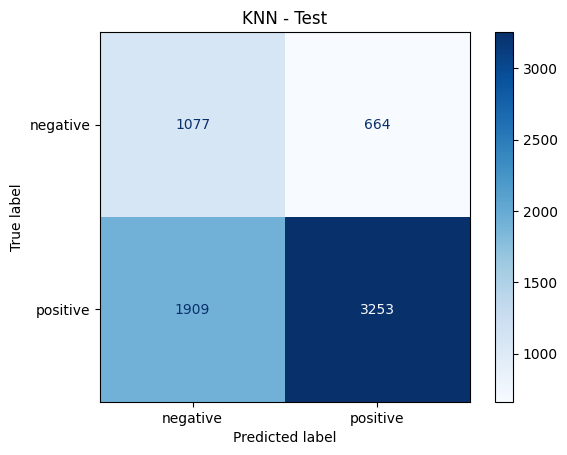

In [299]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

y_pred_train_knn = model_knn.predict(X_train_resampled)
y_pred_test_knn = model_knn.predict(X_test)

print("=============== KNN - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_knn, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("KNN - Train")
plt.show()

print("=============== KNN - TEST ===============")
print(classification_report(y_test, y_pred_test_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("KNN - Test")
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

=============== KNN (GRID SEARCH TUNED) - TEST ===============
              precision    recall  f1-score   support

    negative       0.42      0.45      0.43      1556
    positive       0.84      0.82      0.83      5498

    accuracy                           0.74      7054
   macro avg       0.63      0.63      0.63      7054
weighted avg       0.75      0.74      0.74      7054



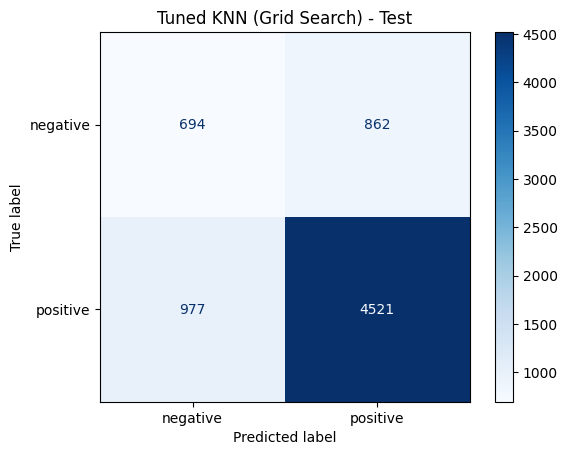

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': list(range(1, 21, 2)), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='precision'
)

grid_search_knn.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_knn.best_params_)

best_knn_model = grid_search_knn.best_estimator_

y_pred_test_best_knn = best_knn_model.predict(X_test)

print("\n=============== KNN (GRID SEARCH TUNED) - TEST ===============")
print(classification_report(y_test, y_pred_test_best_knn, target_names=['negative', 'positive']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Tuned KNN (Grid Search) - Test")
plt.show()

### MODEL 5 - ADA BOOST

=============== ADA BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.68      0.71      0.69     11900
    positive       0.69      0.66      0.68     11900

    accuracy                           0.68     23800
   macro avg       0.68      0.68      0.68     23800
weighted avg       0.68      0.68      0.68     23800



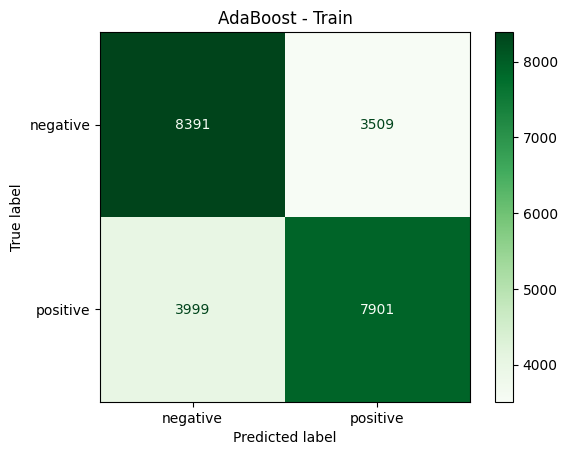

=============== ADA BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.38      0.60      0.47      1741
    positive       0.83      0.67      0.75      5162

    accuracy                           0.66      6903
   macro avg       0.61      0.64      0.61      6903
weighted avg       0.72      0.66      0.68      6903



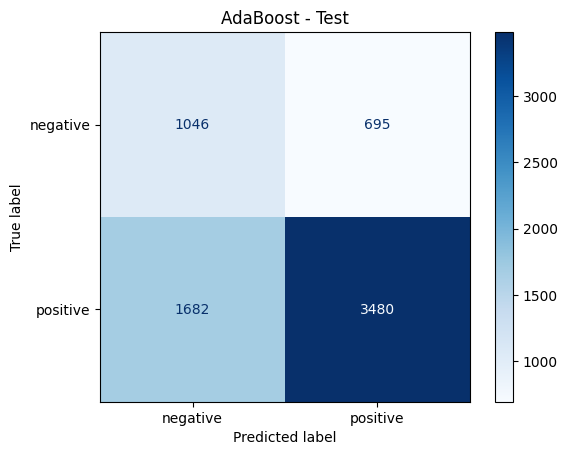

In [300]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train_resampled, y_train_resampled)

y_pred_train_ada = model_ada.predict(X_train_resampled)
y_pred_test_ada = model_ada.predict(X_test)

print("=============== ADA BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_ada, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("AdaBoost - Train")
plt.show()

print("=============== ADA BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_ada, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("AdaBoost - Test")
plt.show()


### MODEL 6 - CAT BOOST

=============== CAT BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.79      0.82      0.80     11900
    positive       0.82      0.78      0.80     11900

    accuracy                           0.80     23800
   macro avg       0.80      0.80      0.80     23800
weighted avg       0.80      0.80      0.80     23800



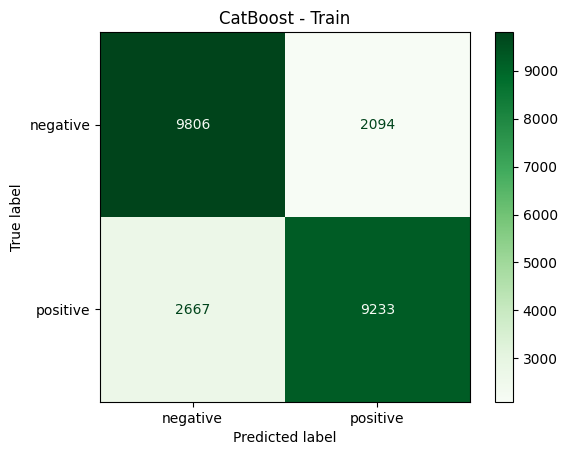

=============== CAT BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.42      0.56      0.48      1741
    positive       0.83      0.73      0.78      5162

    accuracy                           0.69      6903
   macro avg       0.62      0.65      0.63      6903
weighted avg       0.73      0.69      0.70      6903



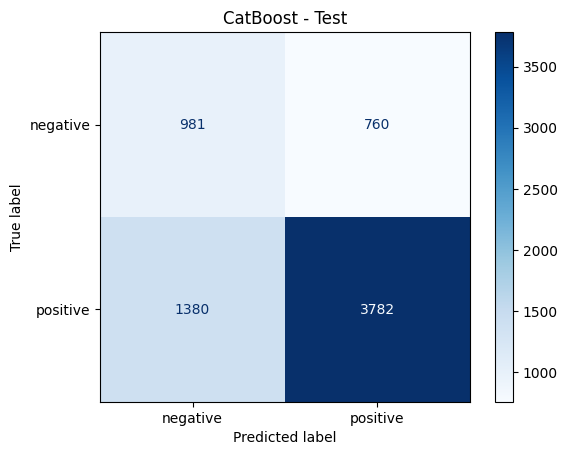

In [301]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(verbose=0, random_state=42)
model_cat.fit(X_train_resampled, y_train_resampled)

y_pred_train_cat = model_cat.predict(X_train_resampled)
y_pred_test_cat = model_cat.predict(X_test)

print("=============== CAT BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_cat, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("CatBoost - Train")
plt.show()

print("=============== CAT BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("CatBoost - Test")
plt.show()

Fitting 3 folds for each of 81 candidates, totalling 243 fits


d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.05}

=============== CATBOOST (GRID SEARCH TUNED) - TEST ===============
              precision    recall  f1-score   support

    negative       0.39      0.46      0.42      1556
    positive       0.84      0.80      0.82      5498

    accuracy                           0.73      7054
   macro avg       0.62      0.63      0.62      7054
weighted avg       0.74      0.73      0.73      7054



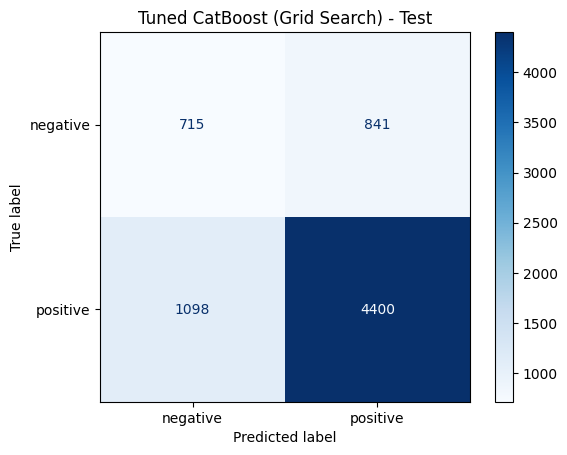

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

param_grid_cat = {
    'iterations': [200, 300, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

cat = CatBoostClassifier(verbose=0, random_state=42)

grid_search_cat = GridSearchCV(
    estimator=cat,
    param_grid=param_grid_cat,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='precision'
)

grid_search_cat.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_cat.best_params_)

best_cat_model = grid_search_cat.best_estimator_

y_pred_test_best_cat = best_cat_model.predict(X_test)

print("\n=============== CATBOOST (GRID SEARCH TUNED) - TEST ===============")
print(classification_report(y_test, y_pred_test_best_cat, target_names=['negative', 'positive']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Tuned CatBoost (Grid Search) - Test")
plt.show()

### SAVE WINNER

In [ ]:
import joblib

joblib.dump(best_cat_model, 'models/precise_catboost.pkl')
joblib.dump(model_cat, 'models/aggressive_catboost.pkl')

['models/aggressive_catboost.pkl']

## INTERPRETATION

In [ ]:
model_precise = joblib.load('models/precise_catboost.pkl')
model_aggressive = joblib.load('models/aggressive_catboost.pkl')

### FEATURE IMPORTANCE

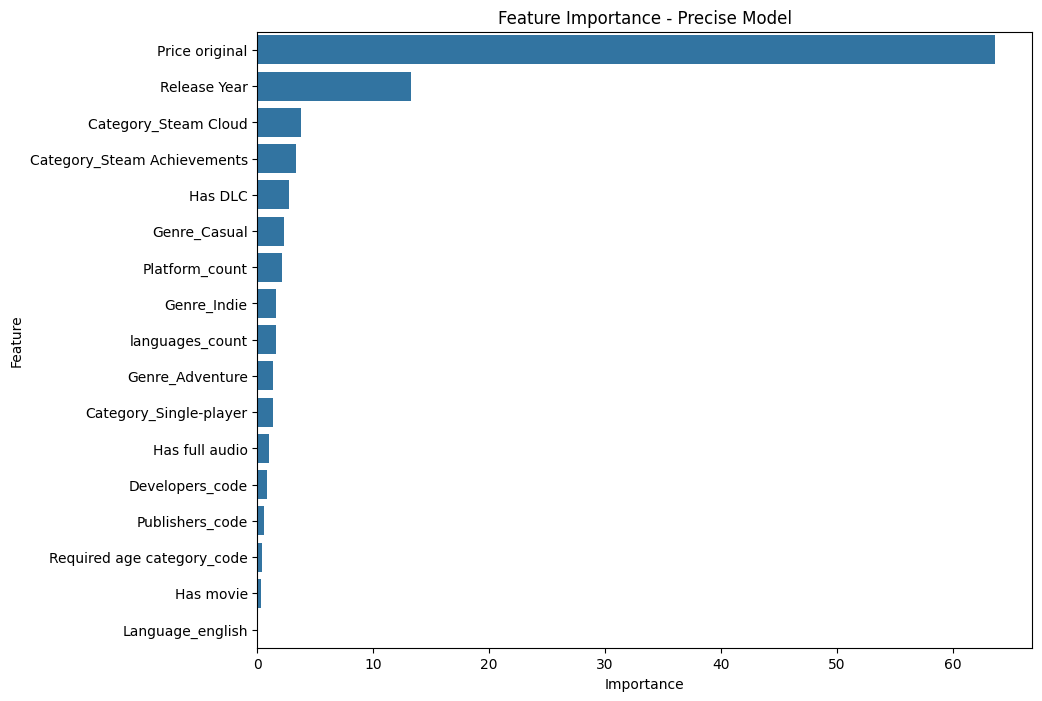

                        Feature  Importance
0                Price original   63.704801
4                  Release Year   13.224625
16         Category_Steam Cloud    3.773884
15  Category_Steam Achievements    3.322360
3                       Has DLC    2.733467
12                 Genre_Casual    2.298745
9                Platform_count    2.093842
13                  Genre_Indie    1.579585
5               languages_count    1.562748
11              Genre_Adventure    1.330169
14       Category_Single-player    1.303926
1                Has full audio    1.009292
6               Developers_code    0.827542
7               Publishers_code    0.532977
10   Required age category_code    0.398714
2                     Has movie    0.303323
8              Language_english    0.000000


In [ ]:
feature_importances = model_precise.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Precise Model')
plt.show()

print(importance_df)

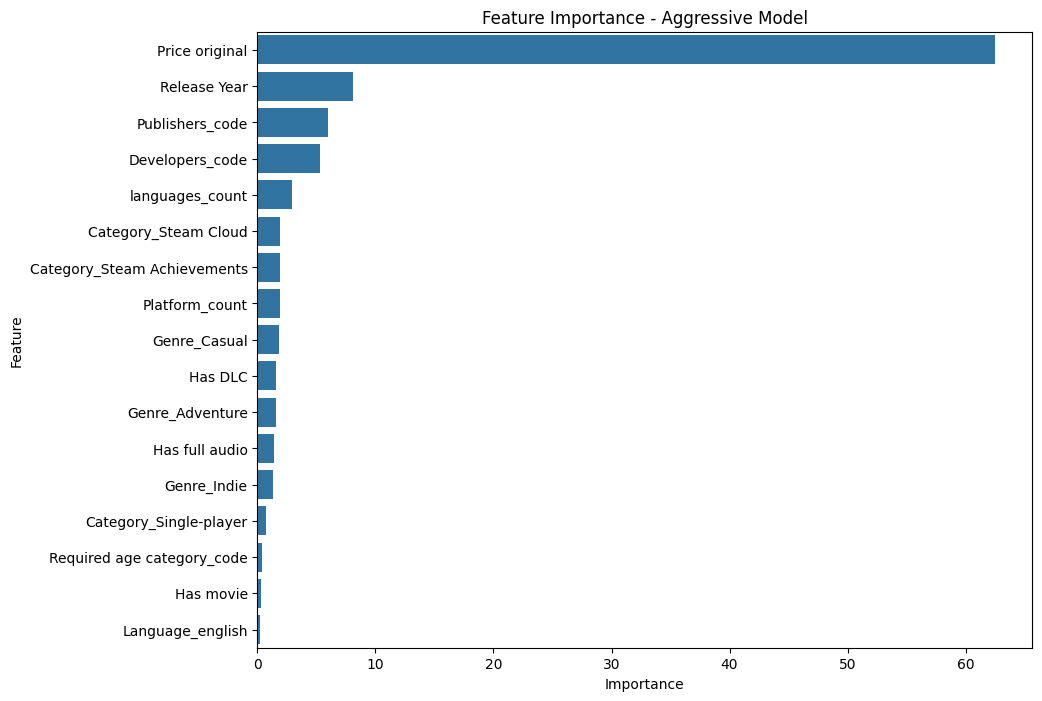

                        Feature  Importance
0                Price original   62.531421
4                  Release Year    8.099913
7               Publishers_code    5.939453
6               Developers_code    5.334811
5               languages_count    2.963065
16         Category_Steam Cloud    1.930907
15  Category_Steam Achievements    1.904457
9                Platform_count    1.885950
12                 Genre_Casual    1.848187
3                       Has DLC    1.585800
11              Genre_Adventure    1.562428
1                Has full audio    1.393851
13                  Genre_Indie    1.325013
14       Category_Single-player    0.769372
10   Required age category_code    0.382045
2                     Has movie    0.326255
8              Language_english    0.217071


In [ ]:
feature_importances = model_aggressive.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Aggressive Model')
plt.show()

print(importance_df)

### PARTIAL DEPENDENCE

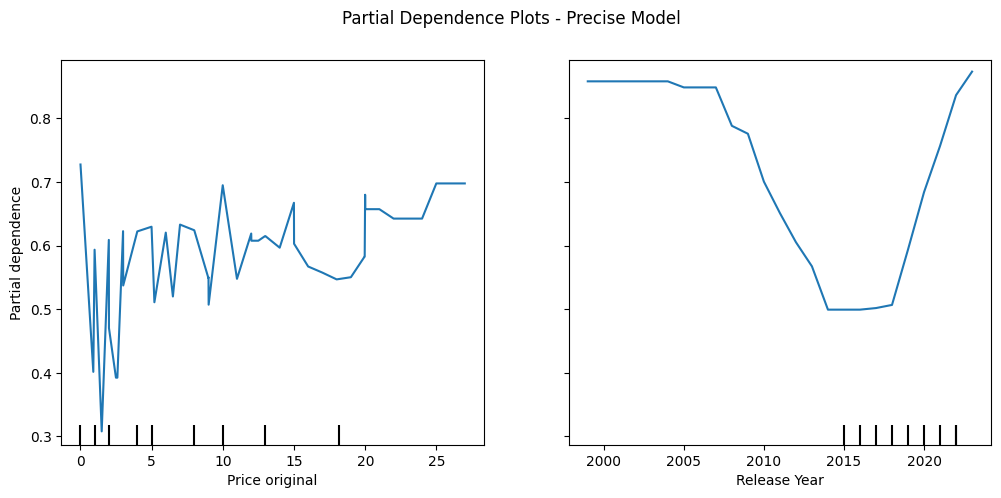

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

top_features = importance_df['Feature'].head(2).tolist()

fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(
    model_precise,
    X_test,
    features=top_features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots - Precise Model')
plt.show()

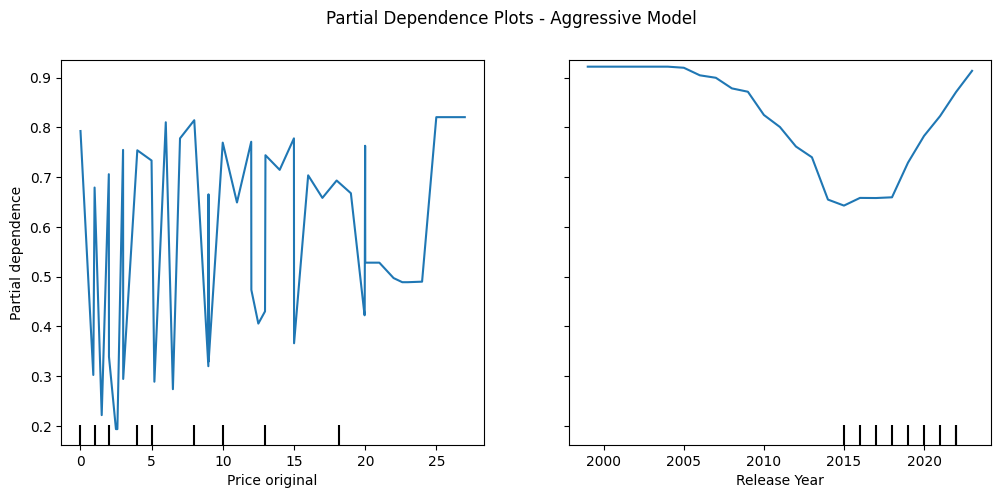

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

top_features = importance_df['Feature'].head(2).tolist()

fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(
    model_aggressive,
    X_test,
    features=top_features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots - Aggressive Model')
plt.show()

### ANALYZE DEVS AND PUBS - MODEL_PRECISE

In [ ]:
print(X_test.columns)

Index(['Price original', 'Has full audio', 'Has movie', 'Has DLC',
       'Release Year', 'languages_count', 'Developers_code', 'Publishers_code',
       'Language_english', 'Platform_count', 'Required age category_code',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
       'Category_Single-player', 'Category_Steam Achievements',
       'Category_Steam Cloud'],
      dtype='object')


In [ ]:
predictions = model_precise.predict(X_test)

results_df = X_test.copy()
results_df['predicted_success'] = predictions

successful_predictions_df = results_df[results_df['predicted_success'] == 'positive']

In [ ]:
successful_devs = successful_predictions_df['Developers_code'].value_counts().reset_index()
successful_devs.columns = ['Developers_code', 'Predicted Success Count']

successful_pubs = successful_predictions_df['Publishers_code'].value_counts().reset_index()
successful_pubs.columns = ['Publishers_code', 'Predicted Success Count']

successful_devs['Developer_Name'] = developer_encoder.inverse_transform(successful_devs['Developers_code'])
successful_pubs['Publisher_Name'] = publisher_encoder.inverse_transform(successful_pubs['Publishers_code'])

In [ ]:
print("--- Developers Predicted to be Successful Most Often ---")
successful_devs[['Developers_code', 'Developer_Name', 'Predicted Success Count']]

--- Developers Predicted to be Successful Most Often ---


Developers_code                    Developer_Name  \
0                8083                            Others   
1                1239                   Choice of Games   
2                6059                 Sokpop Collective   
3                3023                      Hosted Games   
4                 556  Atomic Fabrik,Cristian Manolachi   
...               ...                               ...   
2377             7968                              多极网络   
2378              740                         Ben Lapid   
2379             2786                  Greenolor Studio   
2380             4481                            NORSKA   
2381             4630                      Nilo Studios   

      Predicted Success Count  
0                        1577  
1                          39  
2                          22  
3                          19  
4                          19  
...                       ...  
2377                        1  
2378                        1  
2379                        1  
2380                        1  
2381                        1  

[2382 rows x 3 columns]

In [ ]:
print("\n--- Publishers Predicted to be Successful Most Often ---")
successful_pubs[['Publishers_code', 'Publisher_Name', 'Predicted Success Count']]


--- Publishers Predicted to be Successful Most Often ---


Publishers_code     Publisher_Name  Predicted Success Count
0                7125             Others                     1500
1                1073    Choice of Games                       39
2                5369  Sokpop Collective                       22
3                4456     Piece Of Voxel                       22
4                 686     Big Fish Games                       21
...               ...                ...                      ...
1983              894              Bunso                        1
1984             2458   Greenolor Studio                        1
1985             3962             NORSKA                        1
1986             3664      Matthew Kania                        1
1987             4091       Nilo Studios                        1

[1988 rows x 3 columns]

### ANALYZE "Choice of Games"

In [ ]:
DEV_CODE = 1239
PUB_CODE = 1073

success_probs = model_precise.predict_proba(X_test)[:, 1]

results_df = X_test.copy()
results_df['predicted_success'] = predictions
results_df['success_probability'] = success_probs

company_games_df = results_df[
    (results_df['Developers_code'] == DEV_CODE) |
    (results_df['Publishers_code'] == PUB_CODE)
]

print(f"Found {len(company_games_df)} games associated with this company.")
company_games_df.head()

Found 43 games associated with this company.


Price original  Has full audio  Has movie  Has DLC  Release Year  \
140            6.99               0          1        0          2018   
372            4.99               0          1        0          2018   
396            6.99               0          1        0          2017   
408            5.99               0          1        0          2019   
588            5.99               0          1        1          2016   

     languages_count  Developers_code  Publishers_code  Language_english  \
140                1             1239             1073                 1   
372                1             1239             1073                 1   
396                1             1239             1073                 1   
408                1             1239             1073                 1   
588                1             1239             1073                 1   

     Platform_count  Required age category_code  Genre_Adventure  \
140               3                           1                1   
372               3                           1                1   
396               3                           1                1   
408               3                           1                1   
588               3                           1                1   

     Genre_Casual  Genre_Indie  Category_Single-player  \
140             0            1                       1   
372             0            1                       1   
396             0            1                       1   
408             1            1                       1   
588             0            1                       1   

     Category_Steam Achievements  Category_Steam Cloud predicted_success  \
140                            1                     1          positive   
372                            1                     1          positive   
396                            1                     1          positive   
408                            1                     1          positive   
588                            1                     1          positive   

     success_probability  
140             0.601317  
372             0.597528  
396             0.592809  
408             0.739285  
588             0.733345

In [ ]:
prediction_counts = company_games_df['predicted_success'].value_counts()

print("\nPrediction counts for the company's games:")
print(prediction_counts)


Prediction counts for the company's games:
predicted_success
positive    39
negative     4
Name: count, dtype: int64


In [ ]:
tmp = test_games_only[
	(test_games_only['Developers_code'] == DEV_CODE) |
	(test_games_only['Publishers_code'] == PUB_CODE)
]

actual_success_counts = tmp['rating'].value_counts()

print("\nActual success counts of the company's games:")
print(actual_success_counts)


Actual success counts of the company's games:
rating
Positive           13
Very Positive      11
Mixed              11
Mostly Positive     7
Negative            1
Name: count, dtype: int64



Their most successful 'Release Year' based on the model is: 2015


C:\Users\Wesley\AppData\Local\Temp\ipykernel_21056\1182529290.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Success Probability', loc='upper right')


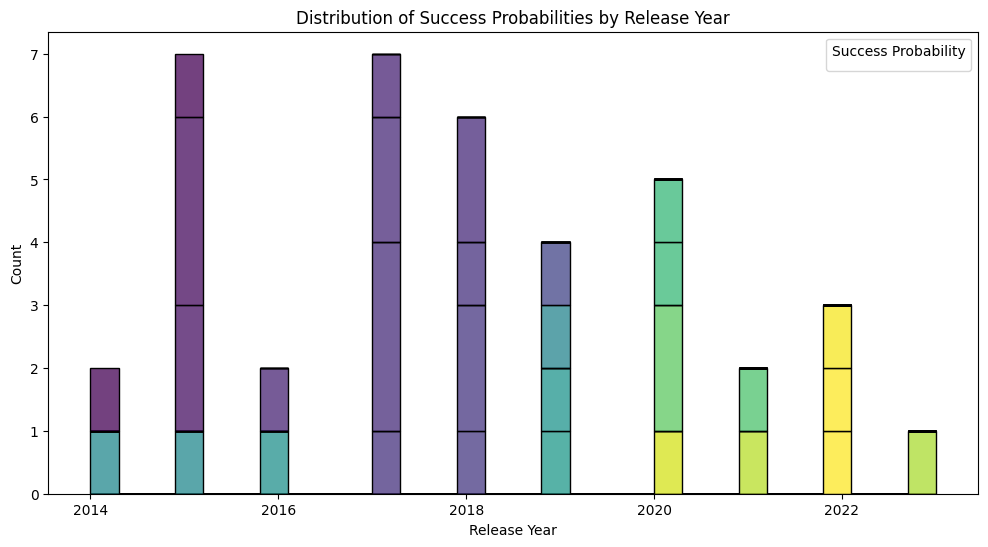

In [ ]:
successful_company_games = company_games_df[company_games_df['predicted_success'] == 'positive']

most_successful_year = successful_company_games['Release Year'].mode()[0]

print(f"\nTheir most successful 'Release Year' based on the model is: {most_successful_year}")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=successful_company_games,
	x='Release Year',
	hue='success_probability',
	multiple='stack',
	bins=30,
	palette='viridis'
)
plt.title('Distribution of Success Probabilities by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Success Probability', loc='upper right')
plt.show()

In [ ]:
feature_columns = [
    'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
    'Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud'
]

print("\n--- Impact Analysis ---")
for column in feature_columns:
    mean_probs = results_df.groupby(column)['success_probability'].mean()
    print(f"\n--- {column} ---")
    print(mean_probs)

    if 1 in mean_probs.index and 0 in mean_probs.index:
        lift = (mean_probs[1] - mean_probs[0]) * 100
        print(f"Impact: Having this feature increases success probability by {lift:.2f} percentage points on average.")


--- Impact Analysis ---

--- Genre_Adventure ---
Genre_Adventure
0    0.619503
1    0.693705
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 7.42 percentage points on average.

--- Genre_Casual ---
Genre_Casual
0    0.621987
1    0.691296
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 6.93 percentage points on average.

--- Genre_Indie ---
Genre_Indie
0    0.576979
1    0.679582
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 10.26 percentage points on average.

--- Category_Single-player ---
Category_Single-player
0    0.465640
1    0.656877
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 19.12 percentage points on average.

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.540591
1    0.724914
Name: success_probability, dtype: float64
Impact: Ha

In [ ]:
import itertools

genre_cols = ['Genre_Adventure', 'Genre_Casual', 'Genre_Indie']
category_cols = ['Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud']

print("\n--- Synergy Analysis ---")
for genre, category in itertools.product(genre_cols, category_cols):
    print(f"\n--- {genre} + {category} ---")
    
    interaction_effect = results_df.groupby([genre, category])['success_probability'].mean().unstack()
    print(interaction_effect)


--- Synergy Analysis ---

--- Genre_Adventure + Category_Single-player ---
Category_Single-player         0         1
Genre_Adventure                           
0                       0.438555  0.628368
1                       0.637175  0.694278

--- Genre_Adventure + Category_Steam Achievements ---
Category_Steam Achievements         0         1
Genre_Adventure                                
0                            0.505768  0.697272
1                            0.589344  0.761892

--- Genre_Adventure + Category_Steam Cloud ---
Category_Steam Cloud         0         1
Genre_Adventure                         
0                     0.549588  0.760421
1                     0.631762  0.805434

--- Genre_Casual + Category_Single-player ---
Category_Single-player         0         1
Genre_Casual                              
0                       0.404036  0.630185
1                       0.594921  0.693677

--- Genre_Casual + Category_Steam Achievements ---
Category_Steam Achieve

In [ ]:
print("\n--- Key Factors FOR THIS COMPANY ---")
for column in feature_columns:
    mean_probs_company = company_games_df.groupby(column)['success_probability'].mean()
    
    if len(mean_probs_company) > 1:
        print(f"\n--- {column} ---")
        print(mean_probs_company)	


--- Key Factors FOR THIS COMPANY ---

--- Genre_Adventure ---
Genre_Adventure
0    0.644883
1    0.662858
Name: success_probability, dtype: float64

--- Genre_Casual ---
Genre_Casual
0    0.614182
1    0.842112
Name: success_probability, dtype: float64

--- Genre_Indie ---
Genre_Indie
0    0.817203
1    0.652764
Name: success_probability, dtype: float64

--- Category_Single-player ---
Category_Single-player
0    0.432482
1    0.661924
Name: success_probability, dtype: float64

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.617518
1    0.658494
Name: success_probability, dtype: float64
